In [ ]:
%load_ext autoreload
%autoreload 2
import logging
import os
import sys
from pathlib import Path
from typing import List, Tuple

import IPython
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from lasso.dyna import ArrayType, D3plot
from matplotlib.figure import Figure

notebook_path = Path(IPython.extract_module_locals()[1]["__vsc_ipynb_file__"])
project_dir = notebook_path.parent.parent
sys.path.append(str(project_dir))
import src.utils.custom_log as custom_log
from src.utils.local_displacement import get_displ_along_axis
                                
from src.utils.set_rcparams import set_rcparams

os.chdir(project_dir)
LOG = logging.getLogger(__name__)
custom_log.init_logger(log_lvl=logging.INFO)
set_rcparams()

2024-12-03 10:54:27,536     INFO  MainProcess  MainThread Setting rcparams for matplotlib
2024-12-03 10:54:27,567     INFO  MainProcess  MainThread Using style src/visualization/dissertation.mplstyle


In [2]:
sim_dir = Path("/mnt") / "q" / "Val_Chain_Sims" / "AB_Testing" / "000_Base_Model" / "Assemblies_1"
cases = [
    "Moderate_Overlap_Left",
    "Moderate_Overlap_Right",
    "Full_Frontal",
]
print(sim_dir.is_dir())

True


In [3]:
def get_data(d3_dir:Path) -> Tuple[np.ndarray, np.ndarray]:
    """_summary_

    Args:
        d3_dir (Path): directory with d3plot file

    Returns:
        Tuple[np.ndarray, np.ndarray]: node ids with shape (n_nodes, 1) and node displacements with shape (n_nodes, m_timestamps, o_dimensions)
    """
    LOG.info("Reading d3plot from %s", d3_dir)
    d3plot = D3plot(
        filepath=str(d3_dir / "d3plot"),
        state_array_filter=[ArrayType.node_displacement],
        buffered_reading=True,
    )

    nids = d3plot.arrays[ArrayType.node_ids]
    ds = d3plot.arrays[ArrayType.node_displacement].transpose(1, 0, 2)

    LOG.info("Got node ids shape %s and node coordinates shape %s", nids.shape, ds.shape)

    return nids, ds

In [4]:
ds_data = {case: get_data(sim_dir / case) for case in cases}

2024-12-03 10:54:27,841     INFO  MainProcess  MainThread Reading d3plot from /mnt/q/Val_Chain_Sims/AB_Testing/000_Base_Model/Assemblies_1/Moderate_Overlap_Left


2024-12-03 10:57:48,860     INFO  MainProcess  MainThread Got node ids shape (3339032,) and node coordinates shape (3339032, 72, 3)
2024-12-03 10:57:48,862     INFO  MainProcess  MainThread Reading d3plot from /mnt/q/Val_Chain_Sims/AB_Testing/000_Base_Model/Assemblies_1/Moderate_Overlap_Right
2024-12-03 11:00:48,461     INFO  MainProcess  MainThread Got node ids shape (3339032,) and node coordinates shape (3339032, 72, 3)
2024-12-03 11:00:48,464     INFO  MainProcess  MainThread Reading d3plot from /mnt/q/Val_Chain_Sims/AB_Testing/000_Base_Model/Assemblies_1/Full_Frontal
2024-12-03 11:03:50,317     INFO  MainProcess  MainThread Got node ids shape (3179603,) and node coordinates shape (3179603, 72, 3)


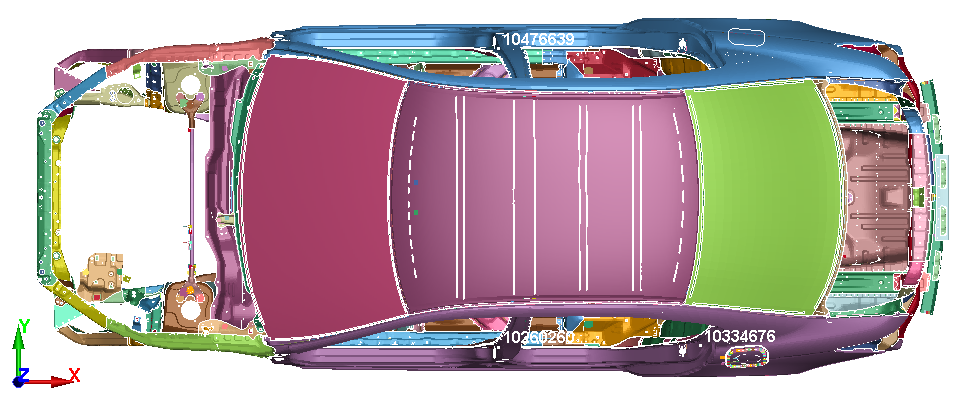

In [5]:
ds_x_displ = {
    case: get_displ_along_axis(
        nodes_coord=ds_data[case][1],
        root_coord=ds_data[case][1][np.nonzero(ds_data[case][0] == 10260260)[0][0], :, :],
        direction_coord=ds_data[case][1][np.nonzero(ds_data[case][0] == 10334676)[0][0], :, :],
    )
    for case in cases
}

In [8]:
intru_nodes = """  16071466  16071482  16071485  16071488  16071490  16071491  16071493  16071495
  16071498  16071501  16071502  16071503  16071504  16071506  16071507  16071508
  16071509  16071511  16071512  16071517  16071544  16071552  16071572  16071573
  16071581  16071598  16071600  16071601  16071602  16071604  16071605  16071606
  16071608  16071609  16071610  16071613  16071614  16071616  16071617  16071618
  16071620  16071623  16071627  16071631  16071632  16071634  16071636  16071638
  16071642  16071643  16071644  16071646  16071647  16071651  16071658  16071659
  16071661  16071676  16071782  16071924  16072015  16072017  16072038  16072044
  16072045  16072048  16072053  16072058  16072124  16072125  16072145  16072152
  16072161  16072270  16072396  16072469  16072476  16072480  16072485  16072492
  16072557  16072628  16072630  16072646  16072676  16072748  16072760  16072787
  16072803  16072804  16072805  16072806  16072809  16072811  16072812  16072814
  16072838  16073038  16073045  16073049  16073065  16073068  16073082  16073092
  16073093  16073094  16073095  16073097  16073098  16073100  16073102  16073103
  16073104  16073106  16073107  16073109  16073110  16073111  16073116  16073117
  16073118  16073120  16073121  16073122  16073124  16073141  16073147  16073148
  16073149  16073165  16073166  16073167  16073174  16073177  16073181  16073186
  16073187  16073194  16073196  16073197  16073198  16073199  16073200  16073202
  16073205  16073209  16073211  16073216  16073222  16073236  16073242  16073251
  16073253  16073293  16073299  16073301  16073302  16073303  16073304  16073305
  16073311  16073314  16073315  16073317  16073318  16073319  16073320  16073321
  16073322  16073323  16073324  16073325  16073326  16073327  16073328  16073329
  16073330  16073331  16073332  16073333  16073334  16073335  16073336  16073337
  16073338  16073340  16073341  16073343  16073345  16073347  16073349  16073350
  16073352  16073353  16073357  16073358  16073360  16073367  16073372  16073375
  16073377  16073381  16073382  16073384  16073391  16073392  16073393  16073396
  16073398  16073400  16073402  16073403  16073404  16073405  16073406  16073409
  16073413  16073414  16073415  16073416  16073420  16073421  16073422  16073424
  16073427  16073432  16073433  16073435  16073439  16073440  16073442  16073444
  16073445  16073447  16073448  16073452  16073454  16073458  16073460  16073461
  16073462  16073464  16073469  16073470  16073471  16073472  16073474  16073475
  16073477  16073479  16073481  16073482  16073483  16073484  16073485  16073486
  16073487  16073488  16073489  16073490  16073491  16073492  16073493  16073494
  16073496  16073497  16073498  16073499  16073500  16073501  16073502  16073504
  16073505  16073506  16073507  16073508  16073509  16073511  16073512  16073513
  16073514  16073515  16073516  16073517  16073518  16073519  16073520  16073521
  16073522  16073523  16073525  16073526  16073527  16073528  16073529  16073530
  16073531  16073532  16073534  16073535  16073536  16073537  16073539  16073540
  16073541  16073542  16073543  16073544  16073545  16073546  16073547  16073548
  16073550  16073551  16073552  16073553  16073554  16073555  16073556  16073557
  16073558  16073559  16073560  16073561  16073563  16073564  16073568  16073570
  16073572  16073573  16073574  16073575  16073576  16073577  16073578  16073580
  16073581  16073583  16073584  16073587  16073588  16073590  16073591  16073592
  16073594  16073596  16073597  16073598  16073599  16073600  16073603  16073604
  16073605  16073612  16073613  16073614  16073615  16073616  16073618  16073622
  16073623  16073624  16073626  16073628  16073638  16073642  16073643  16073644
  16073645  16073647  16073649  16073652  16073654  16073657  16073658  16073668
  16073669  16073670  16073671  16073672  16073673  16073674  16073675  16073677
  16073678  16073682  16073687  16073688  16073689  16073690  16073691  16073693
  16073695  16073696  16073698  16073699  16073700  16073701  16073707  16073711
  16073713  16073714  16073715  16073716  16073717  16073718  16073719  16073720
  16073721  16073725  16073726  16073727  16073728  16073729  16073730  16073731
  16073733  16073734  16073735  16073736  16073739  16073740  16073741  16073742
  16073745  16073747  16073749  16073753  16073757  16073758  16073759  16073763
  16073765  16073766  16073767  16073768  16073769  16073770  16073771  16073772
  16073773  16073774  16073775  16073776  16073777  16073778  16073779  16073780
  16073782  16073783  16073784  16073785  16073790  16073791  16073792  16073793
  16073794  16073797  16073798  16073799  16073801  16073802  16073803  16073804
  16073806  16073807  16073808  16073809  16073810  16073811  16073814  16073816
  16073817  16073818  16073821  16073822  16073824  16073833  16073834  16073837
  16073841  16073843  16073853  16073854  16073858  16073859  16073860  16073861
  16073862  16073863  16073865  16073869  16073870  16073871  16073872  16073873
  16073874  16073875  16073876  16073878  16073879  16073880  16073881  16073882
  16073883  16073884  16073885  16073886  16073887  16073888  16073889  16073890
  16073891  16073892  16073898  16073901  16073902  16073903  16073904  16073905
  16073906  16073909  16073911  16073912  16073913  16073914  16073920  16073921
  16073922  16073923  16073924  16073925  16073927  16073928  16073929  16073930
  16073933  16073934  16073939  16073948  16073954  16073955  16073956  16073957
  16073959  16073962  16073965  16073966  16073967  16073968  16073969  16073970
  16073971  16073972  16073982  16073983  16073985  16073986  16073987  16073988
  16073990  16073994  16073995  16073996  16073997  16073998  16073999  16074000
  16074001  16074002  16074005  16074009  16074012  16074016  16074018  16074019
  16074020  16074022  16074024  16074027  16074028  16074032  16074033  16074036
  16074037  16074041  16074042  16074044  16074045  16074048  16074050  16074051
  16074052  16074053  16074056  16074063  16074064  16074065  16074076  16074079
  16074087  16074114  16074116  16074117  16074120  16074123  16074136  16074140
  16074145  16074147  16074150  16074151  16074153  16074154  16074155  16074158
  16074159  16074160  16074161  16074165  16074170  16074181  16074185  16074194
  16074195  16074200  16074223  16074229  16074230  16074231  16074232  16074234
  16074235  16074238  16074239  16074240  16074242  16074244  16074246  16074247
  16074248  16074249  16074250  16074251  16074252  16074253  16074254  16074255
  16074256  16074257  16074258  16074259  16074260  16074261  16074263  16074267
  16074268  16074269  16074272  16074273  16074274  16074275  16074276  16074277
  16074278  16074281  16074282  16074284  16074285  16074286  16074287  16074288
  16074291  16074292  16074294  16074295  16074296  16074298  16074299  16074300
  16074322  16074323  16074347  16074348  16074362  16074363  16074372  16074392
  16074397  16074405  16074431  16074443  16074445  16074453  16074455  16074458
  16074460  16074461  16074466  16074468  16074473  16074487  16074488  16074490
  16074503  16074504  16074506  16074508  16074512  16074513  16074514  16074518
  16074519  16074521  16074522  16074524  16074525  16074526  16074527  16074528
  16074529  16074530  16074531  16074532  16074533  16074534  16074535  16074536
  16074537  16074538  16074539  16074540  16074542  16074543  16074544  16074545
  16074546  16074547  16074548  16074549  16074550  16074551  16074552  16074553
  16074555  16074556  16074558  16074559  16074567  16074582  16074585  16074586
  16074587  16074589  16074593  16074597  16074598  16074599  16074602  16074603
  16074604  16074605  16074608  16074609  16074612  16074613  16074614  16074615
  16074616  16074617  16074618  16074619  16074620  16074621  16074622  16074623
  16074625  16074626  16074627  16074629  16074630  16074631  16074632  16074633
  16074634  16074635  16074636  16074637  16074639  16074640  16074641  16074644
  16074645  16074646  16074648  16074649  16074652  16074653  16074654  16074655
  16074656  16074658  16074659  16074660  16074662  16074663  16074664  16074666
  16074667  16074668  16074669  16074670  16074671  16074672  16074673  16074674
  16074675  16074680  16074681  16074687  16074688  16074696  16074697  16074698
  16074699  16074701  16074702  16074703  16074704  16074707  16074708  16074709
  16074710  16074712  16074713  16074714  16074715  16074716  16074718  16074720
  16074721  16074723  16074724  16074725  16074729  16074730  16074733  16074734
  16074736  16074737  16074738  16074741  16074742  16074743  16074744  16074745
  16074746  16074748  16074749  16074751  16074752  16074753  16074754  16074755
  16074756  16074757  16074760  16074761  16074762  16074763  16074764  16074765
  16074766  16074768  16074769  16074770  16074771  16074772  16074773  16074774
  16074776  16074777  16074778  16074780  16074781  16074782  16074783  16074784
  16074785  16074786  16074787  16074789  16074790  16074791  16074792  16074793
  16074794  16074796  16074797  16074799  16074800  16074801  16074802  16074803
  16074805  16074807  16074808  16074809  16074810  16074811  16074814  16074816
  16074817  16074818  16074819  16074821  16074822  16074823  16074824  16074825
  16074826  16074827  16074829  16074830  16074831  16074832  16074833  16074834
  16074836  16074837  16074839  16074840  16074841  16074843  16074845  16074846
  16074847  16074848  16074849  16074850  16074851  16074852  16074853  16074854
  16074855  16074856  16074857  16074858  16074859  16074860  16074861  16074862
  16074866  16074869  16074873  16074874  16074876  16074881  16074884  16074888
  16074892  16074895  16074896  16074897  16074900  16074904  16074905  16074912
  16074914  16074917  16074918  16074920  16074922  16074923  16074924  16074925
  16074926  16074927  16074928  16074930  16074931  16074932  16074933  16074934
  16074936  16074937  16074940  16074942  16074947  16074948  16074952  16074953
  16074954  16074957  16074958  16074961  16074962  16074963  16074966  16074967
  16074968  16074969  16074973  16074976  16074977  16074979  16074980  16074981
  16074982  16074983  16074986  16074987  16074989  16074990  16074991  16074992
  16074995  16074996  16075009  16075013  16075014  16075016  16075018  16075019
  16075021  16075023  16075024  16075025  16075026  16075027  16075028  16075030
  16075032  16075034  16075036  16075037  16075038  16075041  16075043  16075044
  16075045  16075046  16075047  16075048  16075049  16075050  16075051  16075052
  16075053  16075055  16075057  16075060  16075064  16075065  16075066  16075067
  16075068  16075069  16075070  16075071  16075072  16075073  16075074  16075075
  16075076  16075077  16075078  16075079  16075080  16075081  16075082  16075083
  16075084  16075085  16075086  16075087  16075088  16075089  16075091  16075092
  16075093  16075098  16075099  16075100  16075103  16075104  16075105  16075106
  16075107  16075109  16075112  16075113  16075115  16075116  16075117  16075118
  16075122  16075129  16075130  16075131  16075132  16075133  16075134  16075136
  16075137  16075138  16075139  16075141  16075143  16075146  16075147  16075149
  16075153  16075154  16075156  16075158  16075159  16075160  16075161  16075162
  16075165  16075166  16075167  16075169  16075170  16075171  16075172  16075173
  16075174  16075175  16075176  16075177  16075178  16075179  16075180  16075181
  16075183  16075185  16075204  16075205  16075206  16075207  16075208  16075209
  16075210  16075213  16075215  16075216  16075218  16075219  16075220  16075221
  16075222  16075223  16075224  16075225  16075226  16075227  16075228  16075229
  16075230  16075231  16075232  16075233  16075234  16075235  16075236  16075237
  16075238  16075239  16075240  16075241  16075242  16075243  16075244  16075245
  16075246  16075247  16075248  16075249  16075250  16075251  16075252  16075253
  16075254  16075255  16075256  16075257  16075258  16075259  16075260  16075261
  16075262  16075263  16075264  16075265  16075266  16075267  16075268  16075269
  16075270  16075271  16075272  16075273  16075274  16075275  16075276  16075277
  16075278  16075279  16075280  16075281  16075282  16075283  16075284  16075285
  16075286  16075287  16075288  16075289  16075290  16075291  16075292  16075293
  16075294  16075295  16075296  16075297  16075298  16075299  16075300  16075301
  16075302  16075303  16075304  16075305  16075306  16075307  16075308  16075309
  16075310  16075311  16075312  16075313  16075314  16075315  16075316  16075317
  16075318  16075319  16075320  16075321  16075322  16075323  16075324  16075325
  16075326  16075327  16075328  16075329  16075330  16075331  16075332  16075333
  16075334  16075335  16075336  16075337  16075338  16075339  16075340  16075341
  16075342  16075343  16075344  16075345  16075346  16075347  16075348  16075349
  16075350  16075351  16075352  16075353  16075354  16075355  16075356  16075357
  16075358  16075359  16075360  16075361  16075362  16075363  16075364  16075365
  16075366  16075367  16075368  16075369  16075370  16075371  16075372  16075373
  16075374  16075375  16075376  16075377  16075378  16075379  16075380  16075381
  16075382  16075383  16075384  16075385  16075386  16075387  16075388  16075389
  16075390  16075391  16075392  16075393  16075394  16075395  16075396  16075397
  16075398  16075399  16075400  16075401  16075402  16075403  16075404  16075405
  16075406  16075407  16075408  16075409  16075410  16075411  16075412  16075413
  16075414  16075415  16075416  16075417  16075418  16075419  16075420  16075421
  16075422  16075423  16075424  16075425  16075426  16075427  16075428  16075429
  16075430  16075431  16075432  16075433  16075434  16075435  16075436  16075437
  16075438  16075439  16075440  16075441  16075442  16075443  16075444  16075445
  16075446  16075447  16075448  16075449  16075450  16075451  16075452  16075453
  16075454  16075455  16075456  16075457  16075458  16075459  16075460  16075461
  16075462  16075463  16075464  16075465  16075466  16075467  16075468  16075469
  16075470  16075471  16075472  16075473  16075474  16075475  16075476  16075477
  16075478  16075479  16075480  16075481  16075482  16075483  16075484  16075485
  16075486  16075487  16075488  16075489  16075490  16075491  16075492  16075493
  16075494  16075495  16075496  16075497  16075498  16075499  16075500  16075501
  16075502  16075503  16075504  16075505  16075506  16075507  16075508  16075509
  16075510  16075511  16075512  16075513  16075514  16075515  16075516  16075517
  16075518  16075519  16075520  16075521  16075522  16075523  16075524  16075525
  16075526  16075527  16075528  16075529  16075530  16075531  16075532  16075533
  16075534  16075535  16075536  16075537  16075538  16075539  16075540  16075541
  16075542  16075543  16075544  16075545  16075546  16075547  16075548  16075549
  16075550  16075551  16075552  16075553  16075554  16075555  16075556  16075557
  16075558  16075559  16075560  16075561  16075562  16075563  16075564  16075565
  16075566  16075567  16075568  16075569  16075570  16075571  16075572  16075573
  16075574  16075575  16075576  16075577  16075578  16075579  16075580  16075581
  16075582  16075583  16075584  16075585  16075586  16075587  16075588  16075589
  16075590  16075591  16075592  16075593  16075594  16075595  16075596  16075597
  16075598  16075599  16075600  16075601  16075602  16075603  16075604  16075605
  16075606  16075607  16075608  16075609  16075610  16075611  16075612  16075613
  16075614  16075615  16075616  16075617  16075618  16075619  16075620  16075621
  16075622  16075623  16075624  16075625  16075626  16075627  16075628  16075629
  16075630  16075631  16075632  16075633  16075634  16075635  16075636  16075637
  16075638  16075639  16075640  16075641  16075642  16075643  16075644  16075645
  16075646  16075647  16075648  16075649  16075650  16075651  16075652  16075653
  16075654  16075655  16075656  16075657  16075658  16075659  16075660  16075661
  16075662  16075663  16075664  16075665  16075666  16075667  16075668  16075669
  16075670  16075671  16075672  16075673  16075674  16075675  16075676  16075677
  16075678  16075679  16075680  16075681  16075682  16075683  16075684  16075685
  16075686  16075687  16075688  16075689  16075690  16075691  16075692  16075693
  16075694  16075695  16075696  16075697  16075698  16075699  16075700  16075701
  16075702  16075703  16075704  16075705  16075706  16075707  16075708  16075709
  16075710  16075711  16075712  16075713  16075714  16075715  16075716  16075717
  16075718  16075719  16075720  16075721  16075722  16075723  16075724  16075725
  16075726  16075727  16075728  16075729  16075730  16075731  16075732  16075733
  16075734  16075735  16075736  16075737  16075738  16075739  16075740  16075741
  16075742  16075743  16075744  16075745  16075746  16075747  16075748  16075749
  16075750  16075751  16075752  16075753  16075754  16075755  16075756  16075757
  16075758  16075759  16075760  16075761  16075762  16075763  16075764  16075765
  16075766  16075767  16075768  16075769  16075770  16075771  16075772  16075773
  16075774  16075775  16075776  16075777  16075778  16075779  16075780  16075781
  16075782  16075783  16075784  16075785  16075786  16075787  16075788  16075789
  16075790  16075791  16075792  16075793  16075794  16075795  16075796  16075797
  16075798  16075799  16075800  16075801  16075802  16075803  16075804  16075805
  16075806  16075807  16075808  16075809  16075810  16075811  16075812  16075813
  16075814  16075815  16075816  16075817  16075818  16075819  16075820  16075821
  16075822  16075823  16075824  16075825  16075826  16075827  16075828  16075829
  16075830  16075831  16075832  16075833  16075834  16075835  16075836  16075837
  16075838  16075839  16075840  16075841  16075842  16075843  16075844  16075845
  16075846  16075847  16075848  16075849  16075850  16075851  16075852  16075853
  16075854  16075855  16075856  16075857  16075858  16075859  16075860  16075861
  16075862  16075863  16075864  16075865  16075866  16075867  16075868  16075869
  16075870  16075871  16075872  16075873  16075874  16075875  16075876  16075877
  16075878  16075879  16075880  16075881  16075882  16075883  16075884  16075885
  16075886  16075887  16075888  16075889  16075890  16075891  16075892  16075893
  16075894  16075895  16075896  16075897  16075898  16075899  16075900  16075901
  16075902  16075903  16075904  16075905  16075906  16075907  16075908  16075909
  16075910  16075911  16075912  16075913  16075914  16075915  16075916  16075917
  16075918  16075919  16075920  16075921  16075922  16075923  16075924  16075925
  16075926  16075927  16075928  16075929  16075930  16075931  16075932  16075933
  16075934  16075935  16075936  16075937  16075938  16075939  16075940  16075941
  16075942  16075943  16075944  16075945  16075946  16075947  16075948  16075949
  16075950  16075951  16075952  16075953  16075954  16075955  16075956  16075957
  16075958  16075959  16075960  16075961  16075962  16075963  16075964  16075965
  16075966  16075967  16075968  16075969  16075970  16075971  16075972  16075973
  16075974  16075975  16075976  16075977  16075978  16075979  16075980  16075981
  16075982  16075983  16075984  16075985  16075986  16075987  16075988  16075989
  16075990  16075991  16075992  16075993  16075994  16075995  16075996  16075997
  16075998  16075999  16076000  16076001  16076002  16076003  16076004  16076005
  16076006  16076007  16076008  16076009  16076010  16076011  16076012  16076013
  16076014  16076015  16076016  16076017  16076018  16076019  16076020  16076021
  16076022  16076023  16076024  16076025  16076026  16076027  16076028  16076029
  16076030  16076031  16076032  16076033  16076034  16076035  16076036  16076037
  16076038  16076039  16076040  16076041  16076042  16076043  16076044  16076045
  16076046  16076047  16076048  16076049  16076050  16076051  16076052  16076053
  16076054  16076055  16076056  16076057  16076058  16076059  16076060  16076061
  16076062  16076063  16076064  16076065  16076066  16076067  16076068  16076069
  16076070  16076071  16076072  16076073  16076074  16076075  16076076  16076077
  16076078  16076079  16076080  16076081  16076082  16076083  16076084  16076085
  16076086  16076087  16076088  16076089  16076090  16076091  16076092  16076093
  16076094  16076095  16076096  16076097  16076098  16076099  16076100  16076101
  16076102  16076103  16076104  16076105  16076106  16076107  16076108  16076109
  16076110  16076111  16076112  16076113  16076114  16076115  16076116  16076117
  16076118  16076119  16076120  16076121  16076122  16076123  16076124  16076125
  16076126  16076127  16076128  16076129  16076130  16076131  16076132  16076133
  16076134  16076135  16076136  16076137  16076138  16076139  16076140  16076141
  16076142  16076143  16076144  16076145  16076146  16076147  16076148  16076149
  16076150  16076151  16076152  16076153  16076154  16076155  16076156  16076157
  16076158  16076159  16076160  16076161  16076162  16076163  16076164  16076165
  16076166  16076167  16076168  16076169  16076170  16076171  16076172  16076173
  16076174  16076175  16076176  16076177  16076178  16076179  16076180  16076181
  16076182  16076183  16076184  16076185  16076186  16076187  16076188  16076189
  16076190  16076191  16076192  16076193  16076194  16076195  16076196  16076197
  16076198  16076199  16076200  16076201  16076202  16076203  16076204  16076205
  16076206  16076207  16076208  16076209  16076210  16076211  16076212  16076213
  16076214  16076215  16076216  16076217  16076218  16076219  16076220  16076221
  16076222  16076223  16076224  16076225  16076226  16076227  16076228  16076229
  16076230  16076231  16076232  16076233  16076234  16076235  16076236  16076237
  16076238  16076239  16076240  16076241  16076242  16076243  16076244  16076245
  16076246  16076247  16076248  16076249  16076250  16076251  16076252  16076253
  16076254  16076255  16076256  16076257  16076258  16076259  16076260  16076261
  16076262  16076263  16076264  16076265  16076266  16076267  16076268  16076269
  16076270  16076271  16076272  16076273  16076274  16076275  16076276  16076277
  16076278  16076279  16076280  16076281  16076282  16076283  16076284  16076285
  16076286  16076287  16076288  16076289  16076290  16076291  16076292  16076293
  16076294  16076295  16076296  16076297  16076298  16076299  16076300  16076301
  16076302  16076303  16076304  16076305  16076306  16076307  16076308  16076309
  16076310  16076311  16076312  16076313  16076314  16076315  16076316  16076317
  16076318  16076319  16076320  16076321  16076322  16076323  16076324  16076325
  16076326  16076327  16076328  16076329  16076330  16076331  16076332  16076333
  16076334  16076335  16076336  16076337  16076338  16076339  16076340  16076341
  16076342  16076343  16076344  16076345  16076346  16076347  16076348  16076349
  16076350  16076351  16076352  16076353  16076354  16076355  16076356  16076357
  16076358  16076359  16076360  16076361  16076362  16076363  16076364  16076365
  16076366  16076367  16076368  16076369  16076370  16076371  16076372  16076373
  16076374  16076375  16076376  16076377  16076378  16076379  16076380  16076381
  16076382  16076383  16076384  16076385  16076386  16076387  16076388  16076389
  16076390  16076391  16076392  16076393  16076394  16076395  16076396  16076397
  16076398  16076399  16076400  16076401  16076402  16076403  16076404  16076405
  16076406  16076407  16076408  16076409  16076410  16076411  16076412  16076413
  16076414  16076415  16076416  16076417  16076418  16076419  16076420  16076421
  16076422  16076423  16076424  16076425  16076426  16076427  16076428  16076429
  16076430  16076431  16076432  16076433  16076434  16076435  16076436  16076437
  16076438  16076439  16076440  16076441  16076442  16076443  16076444  16076445
  16076446  16076447  16076448  16076449  16076450  16076451  16076452  16076453
  16076454  16076455  16076456  16076457  16076458  16076459  16076460  16076461
  16076462  16076463  16076464  16076465  16076466  16076467  16076468  16076469
  16076470  16076471  16076472  16076473  16076474  16076475  16076476  16076477
  16076478  16076479  16076480  16076481  16076482  16076483  16076484  16076485
  16076486  16076487  16076488  16076489  16076490  16076491  16076492  16076493
  16076494  16076495  16076496  16076497  16076498  16076499  16076500  16076501
  16076502  16076503  16076504  16076505  16076506  16076507  16076508  16076509
  16076510  16076511  16076512  16076513  16076514  16076515  16076516  16076517
  16076518  16076519  16076520  16076521  16076522  16076523  16076524  16076525
  16076526  16076527  16076528  16076529  16076530  16076531  16076532  16076533
  16076534  16076535  16076536  16076537  16076538  16076539  16076540  16076541
  16076542  16076543  16076544  16076545  16076546  16076547  16076548  16076549
  16076550  16076551  16076552  16076553  16076554  16076555  16076556  16076557
  16076558  16076559  16076560  16076561  16076562  16076563  16076564  16076565
  16076566  16076567  16076568  16076569  16076570  16076571  16076572  16076573
  16076574  16076575  16076576  16076577  16076578  16076579  16076580  16076581
  16076582  16076583  16076584  16076585  16076586  16076587  16076588  16076589
  16076590  16076591  16076592  16076593  16076594  16076595  16076596  16076597
  16076598  16076599  16076600  16076601  16076602  16076603  16076604  16076605
  16076606  16076607  16076608  16076609  16076610  16076611  16076612  16076613
  16076614  16076615  16076616  16076617  16076618  16076619  16076620  16076621
  16076622  16076623  16076624  16076625  16076626  16076627  16076628  16076629
  16076630  16076631  16076632  16076633  16076634  16076635  16076636  16076637
  16076638  16076639  16076640  16076641  16076642  16076643  16076644  16076645
  16076646  16076647  16076648  16076649  16076650  16076651  16076652  16076653
  16076654  16076655  16076656  16076657  16076658  16076659  16076660  16076661
  16076662  16076663  16076664  16076665  16076666  16076667  16076668  16076669
  16076670  16076671  16076672  16076673  16076674  16076675  16076676  16076677
  16076678  16076679  16076680  16076681  16076682  16076683  16076684  16076685
  16076686  16076687  16076688  16076689  16076690  16076691  16076692  16076693
  16076694  16076695  16076696  16076697  16076698  16076699  16076700  16076701
  16076702  16076703  16076704  16076705  16076706  16076707  16076708  16076709
  16076710  16076711  16076712  16076713  16076714  16076715  16076716  16076717
  16076718  16076719  16076720  16076721  16076722  16076723  16076724  16076725
  16076726  16076727  16076728  16076729  16076730  16076731  16076732  16076733
  16076734  16076735  16076736  16076737  16076738  16076739  16076740  16076741
  16076742  16076743  16076744  16076745  16076746  16076747  16076748  16076749
  16076750  16076751  16076752  16076753  16076754  16076755  16076756  16076757
  16076758  16076759  16076760  16076761  16076762  16076763  16076764  16076765
  16076766  16076767  16076768  16076769  16076770  16076771  16076772  16076773
  16076774  16076775  16076776  16076777  16076778  16076779  16076780  16076781
  16076782  16076783  16076784  16076785  16076786  16076787  16076788  16076789
  16076790  16076791  16076792  16076793  16076794  16076795  16076796  16076797
  16076798  16076799  16076800  16076801  16076802  16076803  16076804  16076805
  16076806  16076807  16076808  16076809  16076810  16076811  16076812  16076813
  16076814  16076815  16076816  16076817  16076818  16076819  16076820  16076821
  16076822  16076823  16076824  16076825  16076826  16076827  16076828  16076829
  16076830  16076831  16076832  16076833  16076834  16076835  16076836  16076837
  16076838  16076839  16076840  16076841  16076842  16076843  16076844  16076845
  16076846  16076847  16076848  16076849  16076850  16076851  16076852  16076853
  16076854  16076855  16076856  16076857  16076858  16076859  16076860  16076861
  16076862  16076863  16076864  16076865  16076866  16076867  16076868  16076869
  16076870  16076871  16076872  16076873  16076874  16076875  16076876  16076877
  16076878  16076879  16076880  16076881  16076882  16076883  16076884  16076885
  16076886  16076887  16076888  16076889  16076890  16076891  16076892  16076893
  16076894  16076895  16076896  16076897  16076898  16076899  16076900  16076901
  16076902  16076903  16076904  16076905  16076906  16076907  16076908  16076909
  16076910  16076911  16076912  16076913  16076914  16076915  16076916  16076917
  16076918  16076919  16076920  16076921  16076922  16076923  16076924  16076925
  16076926  16076927  16076928  16076929  16076930  16076931  16076932  16076933
  16076934  16076935  16076936  16076937  16076938  16076939  16076940  16076941
  16076942  16076943  16076944  16076945  16076946  16076947  16076948  16076949
  16076950  16076951  16076952  16076953  16076954  16076955  16076956  16076957
  16076958  16076959  16076960  16076961  16076962  16076963  16076964  16076965
  16076966  16076967  16076968  16076969  16076970  16076971  16076972  16076973
  16076974  16076975  16076976  16076977  16076978  16076979  16076980  16076981
  16076982  16076983  16076984  16076985  16076986  16076987  16076988  16076989
  16076990  16076991  16076992  16076993  16076994  16076995  16076996  16076997
  16076998  16076999  16077000  16077001  16077002  16077003  16077004  16077005
  16077006  16077007  16077008  16077009  16077010  16077011  16077012  16077013
  16077014  16077015  16077016  16077017  16077018  16077019  16077020  16077021
  16077022  16077023  16077024  16077025  16077026  16077027  16077028  16077029
  16077030  16077031  16077032  16077033  16077034  16077035  16077036  16077037
  16077038  16077039  16077040  16077041  16077042  16077043  16077044  16077045
  16077046  16077047  16077048  16077049  16077050  16077051  16077052  16077053
  16077054  16077055  16077056  16077057  16077058  16077059  16077060  16077061
  16077062  16077063  16077064  16077065  16077066  16077067  16077068  16077069
  16077070  16077071  16077072  16077073  16077074  16077075  16077076  16077077
  16077078  16077079  16077080  16077081  16077082  16077083  16077084  16077085
  16077086  16077087  16077088  16077089  16077090  16077091  16077092  16077093
  16077094  16077095  16077096  16077097  16077098  16077099  16077100  16077101
  16077102  16077103  16077104  16077105  16077106  16077107  16077108  16077109
  16077110  16077111  16077112  16077113  16077114  16077115  16077116  16077117
  16077118  16077119  16077120  16077121  16077122  16077123  16077124  16077125
  16077126  16077127  16077128  16077129  16077130  16077131  16077132  16077133
  16077134  16077135  16077136  16077137  16077138  16077139  16077140  16077141
  16077142  16077143  16077144  16077145  16077146  16077147  16077148  16077149
  16077150  16077151  16077152  16077153  16077154  16077155  16077156  16077157
  16077158  16077159  16077160  16077161  16077162  16077163  16077164  16077165
  16077166  16077167  16077168  16077169  16077170  16077171  16077172  16077173
  16077174  16077175  16077176  16077177  16077178  16077179  16077180  16077181
  16077182  16077183  16077184  16077185  16077186  16077187  16077188  16077189
  16077190  16077191  16077192  16077193  16077194  16077195  16077196  16077197
  16077198  16077199  16077200  16077201  16077202  16077203  16077204  16077205
  16077206  16077207  16077208  16077209  16077210  16077211  16077212  16077213
  16077214  16077215  16077216  16077217  16077218  16077219  16077220  16077221
  16077222  16077223  16077224  16077225  16077226  16077227  16077228  16077229
  16077230  16077231  16077232  16077233  16077234  16077235  16077236  16077237
  16077238  16077239  16077240  16077241  16077242  16077243  16077244  16077245
  16077246  16077247  16077248  16077249  16077250  16077251  16077252  16077253
  16077254  16077255  16077256  16077257  16077258  16077259  16077260  16077261
  16077262  16077263  16077264  16077265  16077266  16077267  16077268  16077269
  16077270  16077271  16077272  16077273  16077274  16077275  16077276  16077277
  16077278  16077279  16077280  16077281  16077282  16077283  16077284  16077285
  16077286  16077287  16077288  16077289  16077290  16077291  16077292  16077293
  16077294  16077295  16077296  16077297  16077298  16077299  16077300  16077301
  16077302  16077303  16077304  16077305  16077306  16077307  16077308  16077309
  16077310  16077311  16077312  16077313  16077314  16077315  16077316  16077317
  16077318  16077319  16077320  16077321  16077322  16077323  16077324  16077325
  16077326  16077327  16077328  16077329  16077330  16077331  16077332  16077333
  16077334  16077335  16077336  16077337  16077338  16077339  16077340  16077341
  16077342  16077343  16077344  16077345  16077346  16077347  16077348  16077349
  16077350  16077351  16077352  16077353  16077354  16077355  16077356  16077357
  16077358  16077359  16077360  16077361  16077362  16077363  16077364  16077365
  16077366  16077367  16077368  16077369  16077370  16077371  16077372  16077373
  16077374  16077375  16077376  16077377  16077378  16077379  16077380  16077381
  16077382  16077383  16077384  16077385  16077386  16077387  16077388  16077389
  16077390  16077391  16077392  16077393  16077394  16077395  16077396  16077397
  16077398  16077399  16077400  16077401  16077402  16077403  16077404  16077405
  16077406  16077407  16077408  16077409  16077410  16077411  16077412  16077413
  16077414  16077415  16077416  16077417  16077418  16077419  16077420  16077421
  16077422  16077423  16077424  16077425  16077426  16077427  16077428  16077429
  16077430  16077431  16077432  16077433  16077434  16077435  16077436  16077437
  16077438  16077439  16077440  16077441  16077442  16077443  16077444  16077445
  16077446  16077447  16077448  16077449  16077450  16077451  16077452  16077453
  16077454  16077455  16077456  16077457  16077458  16077459  16077460  16077461
  16077462  16077463  16077464  16077465  16077466  16077467  16077468  16077469
  16077470  16077471  16077472  16077473  16077474  16077475  16077476  16077477
  16077478  16077479  16077480  16077481  16077482  16077483  16077484  16077485
  16077486  16077487  16077488  16077489  16077490  16077491  16077492  16077493
  16077494  16077495  16077496  16077497  16077498  16077499  16077500  16077501
  16077502  16077503  16077504  16077505  16077506  16077507  16077508  16077509
  16077510  16077511  16077512  16077513  16077514  16077515  16077516  16077517
  16077518  16077519  16077520  16077521  16077522  16077523  16077524  16077525
  16077526  16077527  16077528  16077529  16077530  16077531  16077532  16077533
  16077534  16077535  16077536  16077537  16077538  16077539  16077540  16077541
  16077542  16077543  16077544  16077545  16077546  16077547  16077548  16077549
  16077550  16077551  16077552  16077553  16077554  16077555  16077556  16077557
  16077558  16077559  16077560  16077561  16077562  16077563  16077564  16077565
  16077566  16077567  16077568  16077569  16077570  16077571  16077572  16077573
  16077574  16077575  16077576  16077577  16077578  16077579  16077580  16077581
  16077582  16077583  16077584  16077585  16077586  16077587  16077588  16077589
  16077590  16077591  16077592  16077593  16077594  16077595  16077596  16077597
  16077598  16077599  16077600  16077601  16077602  16077603  16077604  16077605
  16077606  16077607  16077608  16077609  16077610  16077611  16077612  16077613
  16077614  16077615  16077616  16077617  16077618  16077619  16077620  16077621
  16077622  16077623  16077624  16077625  16077626  16077627  16077628  16077629
  16077630  16077631  16077632  16077633  16077634  16077635  16077636  16077637
  16077638  16077639  16077640  16077641  16077642  16077643  16077644  16077645
  16077646  16077647  16077648  16077649  16077650  16077651  16077652  16077653
  16077654  16077655  16077656  16077657  16077658  16077659  16077660  16077661
  16077662  16077663  16077664  16077665  16077666  16077667  16077668  16077669
  16077670  16077671  16077672  16077673  16077674  16077675  16077676  16077677
  16077678  16077679  16077680  16077681  16077682  16077683  16077684  16077685
  16077686  16077687  16077688  16077689  16077690  16077691  16077692  16077693
  16077694  16077695  16077696  16077697  16077698  16077699  16077700  16077701
  16077702  16077703  16077704  16077705  16077706  16077707  16077708  16077709
  16077710  16077711  16077712  16077713  16077714  16077715  16077716  16077717
  16077718  16077719  16077720  16077721  16077722  16077723  16077724  16077725
  16077726  16077727  16077728  16077729  16077730  16077731  16077732  16077733
  16077734  16077735  16077736  16077737  16077738  16077739  16077740  16077741
  16077742  16077743  16077744  16077745  16077746  16077747  16077748  16077749
  16077750  16077751  16077752  16077753  16077754  16077755  16077756  16077757
  16077758  16077759  16077760  16077761  16077762  16077763  16077764  16077765
  16077766  16077767  16077768  16077769  16077770  16077771  16077772  16077773
  16077774  16077775  16077776  16077777  16077778  16077779  16077780  16077781
  16077782  16077783  16077784  16077785  16077786  16077787  16077788  16077789
  16077790  16077791  16077792  16077793  16077794  16077795  16077796  16077797
  16077798  16077799  16077800  16077801  16077802  16077803  16077804  16077805
  16077806  16077807  16077808  16077809  16077810  16077811  16077812  16077813
  16077814  16077815  16077816  16077817  16077818  16077819  16077820  16077821
  16077822  16077823  16077824  16077825  16077826  16077827  16077828  16077829
  16077830  16077831  16077832  16077833  16077834  16077835  16077836  16077837
  16077838  16077839  16077840  16077841  16077842  16077843  16077844  16077845
  16077846  16077847  16077848  16077849  16077850  16077851  16077852  16077853
  16077854  16077855  16077856  16077857  16077858  16077859  16077860  16077861
  16077862  16077863  16077864  16077865  16077866  16077867  16077868  16077869
  16077870  16077871  16077872  16077873  16077874  16077875  16077876  16077877
  16077878  16077879  16077880  16077881  16077882  16077883  16077884  16077885
  16077886  16077887  16077888  16077889  16077890  16077891  16077892  16077893
  16077894  16077895  16077896  16077897  16077898  16077899  16077900  16077901
  16077902  16077903  16077904  16077905  16077906  16077907  16077908  16077909
  16077910  16077911  16077912  16077913  16077914  16077915  16077916  16077917
  16077918  16077919  16077920  16077921  16077922  16077923  16077924  16077925
  16077926  16077927  16077928  16077929  16077930  16077931  16077932  16077933
  16077934  16077935  16077936  16077937  16077938  16077939  16077940  16077941
  16077942  16077943  16077944  16077945  16077946  16077947  16077948  16077949
  16077950  16077951  16077952  16077953  16077954  16077955  16077956  16077957
  16077958  16077959  16077960  16077961  16077962  16077963  16077964  16077965
  16077966  16077967  16080566  16081439  16081462  16081491  16081496  16081500
  16081501  16081508  16081512  16081553  16081555  16081658  16081736  16081819
  16085505  16085506  16085507  16085508  16085509  16085510  16085512  16085517
  16085519  16085520  16085522  16085523  16085525  16085526  16085529  16085530
  16085532  16085533  16085536  16085537  16085538  16085540  16085541  16085542
  16085543  16085546  16085547  16085549  16085550  16085552  16085554  16085555
  16085556  16085558  16085559  16085560  16085564  16085565  16085566  16085569
  16085570  16085580  16085581  16085582  16085583  16085584  16085585  16085586
  16085589  16085592  16085594  16085599  16085601  16085604  16085606  16085608
  16085614  16085615  16085616  16085617  16085619  16085624  16085626  16085630
  16085633  16085634  16085636  16085640  16085642  16085644  16085647  16085662
  16085663  16085665  16085667  16085673  16085674  16085675  16085690  16085697
  16085712  16085720  16085732  16085735  16085736  16085747  16085799  16085810
  16085819  16085820  16085919  16085958  16085960  16085961  16085963  16085965
  16085966  16085967  16085969  16085970  16085971  16085972  16085974  16085977
  16085979  16085980  16085983  16085984  16085985  16085986  16085988  16085989
  16085990  16085994  16085996  16085999  16086000  16086001  16086002  16086007
  16086015  16086019  16086039  16086042  16086050  16086053  16086058  16086059
  16086062  16086067  16086071  16086072  16086075  16086079  16086082  16086083
  16086085  16086087  16086089  16086090  16086093  16086094  16086095  16086097
  16086098  16086099  16086100  16086102  16086103  16086104  16086105  16086106
  16086107  16086108  16086109  16086111  16086112  16086113  16086114  16086117
  16086118  16086122  16086123  16086126  16086127  16086128  16086129  16086131
  16086132  16086133  16086135  16086136  16086137  16086138  16086143  16086144
  16086150  16086151  16086152  16086153  16086154  16086155  16086156  16086157
  16086479  16086503  16086552  16086553  16086554  16086555  16086556  16086557
  16086558  16086559  16086560  16086561  16086562  16086563  16086564  16086565
  16086566  16086567  16086568  16086569  16086570  16086571  16086572  16086573
  16086574  16086575  16086576  16086578  16086579  16086580  16086581  16086582
  16086583  16086584  16086600  16086613  16086617  16100808  16101288  16102819
  16102868  16102907  16105252  16105755  16105763  16105819  16106341  16106346
  16106431  16106433  16106443  16106451  16106452  16106468  16106512  16106516
  16106525  16106530  16106548  16106550  16106553  16106562  16106568  16106571
  16106572  16106573  16106582  16106596  16106669  16106680  16106710  16106724
  16106744  16106790  16106791  16106828  16106842  16106853  16106855  16106862
  16106865  16106890  16106918  16106925  16106941  16106975  16106983  16107015
  16107017  16107019  16107021  16107087  16107089  16107099  16107101  16107144
  16107146  16107154  16107160  16107162  16107176  16107182  16107183  16107184
  16107205  16107206  16107217  16107218  16107219  16107223  16107226  16107227
  16107231  16107250  16107265  16107269  16107273  16107306  16107327  16107336
  16107360  16107401  16107411  16107413  16107415  16107419  16107420  16107421
  16107422  16107424  16107426  16107427  16107429  16107431  16107435  16107436
  16107437  16107439  16107471  16107484  16107488  16107489  16107490  16107492
  16107530  16107531  16107532  16107534  16107535  16107540  16107551  16107563
  16107571  16107573  16107574  16107577  16107588  16107589  16107596  16107601
  16107616  16107629  16107631  16107651  16107665  16107666  16107687  16107688
  16107689  16107693  16107695  16107699  16107706  16107766  16107822  16107824
  16107825  16107826  16107828  16107831  16107832  16107833  16107836  16107838
  16107840  16107844  16107848  16107852  16107855  16107856  16107859  16107860
  16107863  16107864  16107868  16107871  16107872  16107875  16107876  16107877
  16107883  16107884  16107890  16107895  16107896  16107899  16107900  16107904
  16107909  16107914  16107924  16107931  16107938  16107952  16107975  16107977
  16107981  16107984  16107986  16107990  16107993  16107995  16107996  16107997
  16108003  16108005  16108010  16108012  16108014  16108015  16108017  16108019
  16108022  16108026  16108029  16108030  16108035  16108036  16108347  16108589
  16119095  16119324  16119328  16119502  16119523  16119564  16119636  16119637
  16119799  16119814  16119921  16119923  16119928  16119930  16119931  16119964
  16119966  16119968  16119977  16119978  16119979  16119981  16119984  16119990
  16119994  16119996  16120001  16120006  16120007  16120008  16120026  16120030
  16120099  16120101  16120102  16120103  16120133  16120135  16120136  16120137
  16120138  16120139  16120140  16120141  16120142  16120144  16120148  16120149
  16120150  16120152  16120153  16120155  16120156  16120157  16120164  16120165
  16120190  16120192  16120196  16120225  16120226  16120256  16120259  16120260
  16120261  16120262  16120265  16120266  16120270  16120274  16120275  16120283
  16120286  16120287  16120289  16120290  16120291  16120293  16120294  16120297
  16120298  16120300  16120303  16120304  16120305  16120306  16120313  16120321
  16120331  16120336  16120337  16120339  16120343  16120345  16120346  16120347
  16120372  16120375  16120377  16120378  16120379  16120381  16120382  16120387
  16120388  16120389  16120390  16120401  16120402  16120404  16120418  16120419
  16120427  16120437  16120438  16120442  16120552  16120554  16120555  16120563
  16120817  16120820  16120821  16120823  16120826  16120828  16120829  16120832
  16120834  16120835  16120854  16120875  16120876  16120884  16120908  16120909
  16120926  16120928  16120929  16120987  16120988  16121004  16121012  16121013
  16121014  16121015  16121018  16121022  16121024  16121028  16121029  16121041
  16121047  16121049  16121050  16121052  16121053  16121076  16121077  16121079
  16121080  16121081  16121082  16121083  16121085  16121086  16121087  16121088
  16121092  16121093  16121094  16121095  16121096  16121097  16121098  16121101
  16121102  16121103  16121104  16121105  16121107  16121108  16121110  16121112
  16121113  16121114  16121119  16121120  16121129  16121131  16121135  16121141
  16121142  16121144  16121146  16121148  16121149  16121152  16121160  16121162
  16121163  16121202  16121203  16121204  16121205  16121211  16121212  16121214
  16121215  16121216  16121219  16121221  16121222  16121223  16121224  16121228
  16121231  16121237  16121239  16121248  16121251  16121255  16121256  16121267
  16121273  16121275  16121278  16121286  16121290  16121291  16121297  16121302
  16121307  16121311  16121313  16121317  16121325  16121327  16121332  16121339
  16121342  16121349  16121357  16121367  16121374  16121377  16121434  16121437
  16121440  16121443  16121444  16121445  16121446  16121447  16121448  16121450
  16121454  16121455  16121457  16121461  16121462  16121463  16121464  16121465
  16121466  16121469  16121481  16121482  16121487  16121491  16121492  16121493
  16121495  16121496  16121720  16121736  16121747  16121748  16121750  16121754
  16121779  16121782  16121785  16121789  16121791  16121796  16121801  16121852
  16121854  16121855  16121856  16121858  16121859  16121860  16121862  16121871
  16121874  16121887  16121888  16121893  16122006  16122008  16122108  16122868
  16122915  16122921  16122929  16123180  16123239  16123241  16123245  16123273
  16123279  16161508  16161556  16161557  16164406  16164627  16165789  16166679
  16166688  16166732  16166813  16166837  16166942  16167779  16169192  16170458
  16170459  16170460  16170463  16170465  16170466  16170467  16170468  16170469
  16170470  16170471  16170472  16170474  16170476  16170477  16170478  16170479
  16170480  16170481  16170487  16170488  16170561  16170562  16170565  16170568
  16170573  16170576  16170579  16170582  16170587  16170592  16170595  16170596
  16170597  16170598  16170599  16170658  16170659  16170660  16170661  16170662
  16170663  16170664  16170665  16170669  16170683  16170684  16170685  16170686
  16170688  16170689  16170692  16170694  16170701  16170702  16170704  16170713
  16170714  16170717  16170721  16170722  16170723  16170725  16170727  16170729
  16170731  16170755  16170759  16170760  16170761  16170762  16170763  16170764
  16170765  16170766  16170767  16170769  16170783  16170784  16170785  16170786
  16170787  16170788  16170789  16170790  16170791  16170792  16170793  16170794
  16170795  16170796  16170797  16170798  16170799  16170800  16170801  16170802
  16170803  16170804  16170805  16170806  16170807  16170808  16170809  16170810
  16170811  16170812  16170813  16170814  16170815  16170816  16170817  16170818
  16170819  16170820  16170821  16170822  16170823  16170824  16170825  16170826
  16170827  16170828  16170829  16170830  16170831  16170832  16170833  16170834
  16170835  16170836  16170837  16170838  16170839  16170840  16170841  16170842
  16170843  16170844  16170845  16170846  16170847  16170848  16170849  16170850
  16170851  16170852  16170853  16170854  16170855  16170856  16170857  16170858
  16170859  16170860  16170861  16170862  16170863  16170864  16170865  16170866
  16170867  16170868  16170869  16170870  16170871  16170872  16170873  16170874
  16170875  16170876  16170877  16170878  16170879  16170880  16170881  16170882
  16170883  16170884  16170885  16170886  16170887  16170888  16170889  16170890
  16170891  16170892  16171155  16171156  16171162  16171187  16171265  16171268
  16171442  16171479  16171513  16171521  16171561  16171792  16171807  16171861
  16171989  16172059  16172060  16172201  16172291  16172293  16172305  16172471
  16172482  16172665  16172717  16172760  16172830  16172863  16173026  16173107
  16173409  16173427  16173454  16173518  16173546  16173555  16173574  16173590
  16173610  16173633  16173634  16173674  16173712  16173778  16173786  16173867
  16173876  16173919  16173933  16174045  16174055  16174431  16174470  16174664
  16174674  16174686  16174693  16175771  16175915  16175922  16175931  16176123
  16176735  16176736  16176737  16176738  16176739  16176740  16176741  16176742
  16176743  16176744  16176745  16176746  16176747  16176748  16176749  16176750
  16176751  16176752  16176753  16176754  16176755  16176756  16176757  16176758
  16176759  16176760  16176761  16176762  16176763  16176764  16176765  16176766
  16176767  16176768  16176769  16176770  16176771  16176772  16176773  16176774
  16176775  16176776  16176777  16176778  16176779  16176780  16176781  16176782
  16176783  16176784  16176785  16176786  16176787  16176788  16176789  16176790
  16176791  16176792  16176793  16176794  16176795  16176796  16176797  16176798
  16176799  16176800  16176801  16176802  16176803  16176804  16176805  16176806
  16176807  16176808  16176809  16176810  16176811  16176812  16176813  16176814
  16176815  16176816  16176817  16176818  16176819  16176820  16176821  16176822
  16176823  16176824  16176825  16176826  16176827  16176828  16176829  16176830
  16176831  16176832  16176833  16176834  16176835  16176836  16176837  16176838
  16176839  16176840  16176841  16176842  16176843  16176844  16176845  16176846
  16176847  16176848  16176849  16176850  16176851  16176852  16176853  16176854
  16176855  16176856  16176857  16176858  16176859  16176860  16176861  16176862
  16176863  16176864  16176865  16176866  16176867  16176868  16176869  16176870
  16176871  16176872  16176873  16176874  16176875  16176876  16176877  16176878
  16176879  16176880  16176881  16176882  16176883  16176884  16176885  16176886
  16176887  16176888  16176889  16176890  16176891  16176892  16176893  16176894
  16176895  16176896  16176897  16176898  16176899  16176900  16176901  16176902
  16176903  16176904  16176905  16176906  16176907  16176908  16176909  16176910
  16176911  16176912  16176913  16176914  16176915  16176916  16176917  16176918
  16176919  16176920  16176921  16176922  16176923  16176924  16176925  16176926
  16176927  16176928  16176929  16176930  16176931  16176932  16176933  16176934
  16176935  16176936  16176937  16176938  16176939  16176940  16176941  16176942
  16176943  16176944  16176945  16176946  16176947  16176948  16176949  16176950
  16176951  16176952  16176953  16176954  16176955  16176956  16176957  16176958
  16176959  16176960  16176961  16176962  16176963  16176964  16176965  16176966
  16176967  16176968  16176969  16176970  16176971  16176972  16176973  16176974
  16176975  16176976  16176977  16176978  16176979  16176980  16176981  16176982
  16176983  16176984  16176985  16176986  16176987  16176988  16176989  16176990
  16176992  16176993  16176994  16176995  16176996  16176997  16176998  16176999
  16177000  16177001  16177002  16177003  16177004  16177005  16177006  16177008
  16177009  16177010  16177011  16177012  16177013  16177014  16177015  16177016
  16177017  16177018  16177019  16177020  16177021  16177022  16177023  16177024
  16177025  16177026  16177027  16177028  16177029  16177030  16177031  16177032
  16177033  16177034  16177035  16177036  16177037  16177038  16177039  16177040
  16177041  16177042  16177043  16177044  16177045  16177046  16177047  16177048
  16177049  16177050  16177051  16177052  16177053  16177054  16177055  16177056
  16177057  16177058  16177059  16177060  16177061  16177062  16177063  16177064
  16177065  16177066  16177067  16177068  16177069  16177070  16177071  16177072
  16177073  16177074  16177075  16177076  16177077  16177078  16177079  16177080
  16177081  16177082  16177083  16177084  16177085  16177086  16177087  16177088
  16177089  16177090  16177091  16177092  16177093  16177094  16177095  16177096
  16177097  16177098  16177099  16177100  16177101  16177102  16177103  16177104
  16177105  16177106  16177107  16177108  16177109  16177110  16177111  16177112
  16177113  16177114  16177115  16177116  16177117  16177118  16177119  16177120
  16177121  16177122  16177123  16177124  16177125  16177126  16177127  16177129
  16177130  16177131  16177132  16177133  16177134  16177135  16177136  16177137
  16177138  16177139  16177140  16177141  16177143  16177144  16177145  16177146
  16177147  16177148  16177149  16177150  16177151  16177152  16177153  16177154
  16177155  16177156  16177157  16177158  16177159  16177160  16177161  16177162
  16177163  16177165  16177166  16177167  16177168  16177169  16177170  16177171
  16177172  16177173  16177174  16177175  16177176  16177177  16177178  16177179
  16177181  16177182  16177183  16177184  16177185  16177186  16177187  16177188
  16177189  16177190  16177191  16177192  16177193  16177194  16177195  16177196
  16177197  16177198  16177200  16177201  16177202  16177203  16177204  16177205
  16177206  16177207  16177208  16177209  16177210  16177211  16177212  16177213
  16177214  16177215  16177216  16177217  16177218  16177219  16177220  16177221
  16177222  16177223  16177224  16177225  16177226  16177228  16177229  16177230
  16177231  16177232  16177233  16177234  16177235  16177236  16177237  16177238
  16177239  16177240  16177241  16177242  16177243  16177244  16177245  16177246
  16177247  16177248  16177249  16177250  16177251  16177252  16177253  16177254
  16177255  16177256  16177257  16177258  16177259  16177260  16177261  16177263
  16177264  16177265  16177267  16177268  16177269  16177270  16177271  16177272
  16177273  16177274  16177275  16177276  16177277  16177278  16177279  16177281
  16177282  16177283  16177284  16177285  16177286  16177287  16177288  16177289
  16177290  16177291  16177292  16177294  16177295  16177296  16177297  16177298
  16177299  16177300  16177301  16177302  16177303  16177305  16177306  16177307
  16177308  16177309  16177310  16177312  16177313  16177314  16177316  16177317
  16177318  16177319  16177320  16177321  16177322  16177323  16177324  16177325
  16177326  16177327  16177328  16177329  16177330  16177332  16177333  16177334
  16177335  16177336  16177337  16177338  16177339  16177340  16177341  16177342
  16177343  16177345  16177346  16177347  16177348  16177349  16177350  16177351
  16177352  16177353  16177354  16177355  16177356  16177357  16177358  16177359
  16177361  16177362  16177363  16177364  16177365  16177366  16177367  16177368
  16177369  16177370  16177371  16177372  16177373  16177374  16177375  16177376
  16177378  16177379  16177380  16177381  16177382  16177383  16177384  16177385
  16177386  16177387  16177388  16177389  16177390  16177392  16177393  16177394
  16177395  16177396  16177397  16177398  16177399  16177400  16177401  16177402
  16177403  16177404  16177405  16177407  16177408  16177409  16177410  16177411
  16177412  16177413  16177414  16177415  16177416  16177417  16177418  16177419
  16177420  16177421  16177422  16177423  16177424  16177425  16177426  16177427
  16177428  16177429  16177430  16177431  16177432  16177433  16177434  16177435
  16177436  16177437  16177438  16177439  16177440  16177441  16177442  16177443
  16177444  16177445  16177446  16177447  16177448  16177449  16177450  16177451
  16177452  16177453  16177454  16177455  16177456  16177457  16177458  16177459
  16177460  16177461  16177462  16177463  16177464  16177465  16177466  16177467
  16177468  16177469  16177470  16177471  16177472  16177473  16177474  16177475
  16177476  16177477  16177478  16177479  16177480  16177481  16177482  16177483
  16177484  16177485  16177486  16177487  16177488  16177489  16177490  16177491
  16177492  16177493  16177494  16177495  16177496  16177497  16177498  16177499
  16177500  16177501  16177502  16177503  16177504  16177505  16177506  16177507
  16177508  16177509  16177510  16177511  16177512  16177513  16177514  16177515
  16177516  16177517  16177518  16177519  16177520  16177521  16177522  16177523
  16177524  16177525  16177526  16177527  16177528  16177529  16177530  16177531
  16177532  16177533  16177534  16177535  16177536  16177537  16177538  16177539
  16177540  16177541  16177542  16177543  16177544  16177545  16177546  16177547
  16177548  16177549  16177550  16177551  16177553  16177554  16177555  16177556
  16177557  16177558  16177559  16177560  16177561  16177562  16177563  16177564
  16177565  16177566  16177567  16177568  16177569  16177570  16177571  16177572
  16177573  16177574  16177575  16177576  16177578  16177579  16177580  16177581
  16177582  16177583  16177584  16177585  16177586  16177587  16177588  16177589
  16177590  16177591  16177592  16177593  16177594  16177595  16177596  16177597
  16177598  16177599  16177601  16177602  16177603  16177604  16177605  16177606
  16177607  16177608  16177609  16177610  16177611  16177612  16177613  16177614
  16177615  16177616  16177617  16177618  16177619  16177620  16177621  16177622
  16177623  16177624  16177625  16177626  16177627  16177628  16177629  16177630
  16177631  16177632  16177633  16177634  16177636  16177637  16177639  16177640
  16177641  16177642  16177643  16177644  16177645  16177646  16177648  16177650
  16177651  16177652  16177653  16177654  16177655  16177656  16177657  16177658
  16177659  16177661  16177662  16177663  16177664  16177665  16177666  16177667
  16177668  16177669  16177670  16177672  16177673  16177674  16177675  16177676
  16177677  16177680  16177681  16177682  16177683  16177685  16177686  16177687
  16177688  16177689  16177690  16177691  16177692  16177693  16177694  16177695
  16177696  16177698  16177699  16177700  16177701  16177702  16177703  16177704
  16177705  16177706  16177707  16177708  16177709  16177710  16177711  16177712
  16177713  16177714  16177715  16177716  16177717  16177718  16177719  16177720
  16177721  16177722  16177723  16177724  16177725  16177726  16177727  16177728
  16177729  16177730  16177731  16177732  16177733  16177734  16177735  16177736
  16177737  16177738  16177739  16177740  16177741  16177742  16177743  16177744
  16177745  16177746  16177747  16177748  16177749  16177750  16177751  16177752
  16177753  16177755  16177756  16177757  16177760  16177761  16177762  16177764
  16177765  16177766  16177767  16177768  16177769  16177770  16177771  16177772
  16177773  16177774  16177775  16177776  16177777  16177778  16177779  16177780
  16177781  16177782  16177783  16177784  16177785  16177786  16177787  16177788
  16177789  16177790  16177791  16177792  16177793  16177794  16177795  16177796
  16177797  16177798  16177799  16177800  16177801  16177802  16177803  16177804
  16177805  16177806  16177808  16177809  16177810  16177811  16177812  16177815
  16177816  16177817  16177818  16177819  16177820  16177821  16177822  16177823
  16177825  16177827  16177828  16177829  16177830  16177831  16177832  16177833
  16177834  16177835  16177836  16177837  16177838  16177839  16177840  16177841
  16177842  16177843  16177844  16177845  16177846  16177847  16177849  16177850
  16177851  16177852  16177853  16177854  16177855  16177856  16177857  16177858
  16177860  16177861  16177862  16177863  16177865  16177866  16177868  16177869
  16177870  16177871  16177872  16177873  16177875  16177876  16177877  16177879
  16177880  16177881  16177882  16177886  16177887  16177888  16177890  16177892
  16177894  16177895  16177896  16177897  16177898  16177899  16177900  16177901
  16177902  16177903  16177904  16177905  16177906  16177907  16177908  16177909
  16177910  16177911  16177912  16177913  16177914  16177915  16177916  16177917
  16177918  16177919  16177920  16177921  16177922  16177923  16177924  16177925
  16177926  16177927  16177928  16177929  16177930  16177931  16177932  16177933
  16177934  16177935  16177936  16177939  16177940  16177941  16177942  16177943
  16177944  16177945  16177946  16177947  16177948  16177949  16177950  16177951
  16177952  16177953  16177955  16177956  16177957  16177958  16177959  16177960
  16177961  16177962  16177963  16177964  16177965  16177966  16177967  16177968
  16177969  16177971  16177972  16177973  16177974  16177975  16177976  16177977
  16177978  16177980  16177982  16177983  16177984  16177985  16177986  16177987
  16177988  16177989  16177990  16177991  16177992  16177995  16177996  16177997
  16177998  16177999  16178000  16178001  16178003  16178004  16178005  16178006
  16178007  16178008  16178009  16178010  16178011  16178012  16178013  16178015
  16178019  16178021  16178023  16178024  16178026  16178027  16178029  16178034
  16178035  16178037  16178038  16178039  16178040  16178041  16178042  16178043
  16178044  16178045  16178047  16178048  16178049  16178050  16178051  16178052
  16178053  16178054  16178056  16178057  16178058  16178059  16178060  16178061
  16178062  16178063  16178064  16178078  16178079  16178080  16178082  16178083
  16178084  16178085  16178088  16178089  16178091  16178095  16178097  16178098
  16178099  16178101  16178102  16178103  16178104  16178105  16178106  16178107
  16178108  16178109  16178129  16178130  16178131  16178132  16178133  16178135
  16178138  16178139  16178140  16178141  16178142  16178143  16178144  16178145
  16178146  16178147  16178148  16178150  16178151  16178152  16178154  16178155
  16178156  16178157  16178158  16178159  16178160  16178161  16178162  16178163
  16178164  16178165  16178166  16178218  16178229  16178290  16178291  16178292
  16178293  16178294  16178295  16178296  16178324  16178325  16178328  16178331
  16178333  16178336  16178337  16178338  16178339  16178340  16178341  16178342
  16178343  16178344  16178345  16178346  16178347  16178348  16178349  16178350
  16178351  16178352  16178353  16178354  16178355  16178356  16178357  16178358
  16178359  16178360  16178361  16178362  16178363  16178364  16178365  16178366
  16178367  16178368  16178369  16178370  16178371  16178372  16178373  16178374
  16178375  16178376  16178377  16178378  16178379  16178380  16178381  16178382
  16178383  16178384  16178385  16178386  16178387  16178388  16178389  16178390
  16178391  16178392  16178393  16178394  16178395  16178396  16178398  16178399
  16178401  16178402  16178404  16178405  16178407  16178408  16178409  16178410
  16178411  16178412  16178414  16178415  16178416  16178418  16178419  16178422
  16178423  16178424  16178426  16178427  16178473  16178496  16178510  16178512
  16178514  16178515  16178516  16178521  16178522  16178523  16178524  16178525
  16178526  16178528  16178529  16178530  16178531  16178532  16178533  16178538
  16178541  16178542  16178543  16178546  16178548  16178552  16178553  16178555
  16178556  16178558  16178560  16178562  16178563  16178565  16178566  16178567
  16178568  16178569  16178570  16178571  16178572  16178573  16178574  16178575
  16178576  16178577  16178578  16178579  16178580  16178582  16178583  16178584
  16178585  16178586  16178587  16178588  16178589  16178590  16178591  16178593
  16178594  16178595  16178596  16178597  16178598  16178599  16178600  16178601
  16178602  16178603  16178604  16178606  16178608  16178609  16178610  16178611
  16178612  16178613  16178615  16178616  16178617  16178618  16178619  16178620
  16178623  16178624  16178625  16178626  16178627  16178628  16178629  16178630
  16178631  16178633  16178635  16178636  16178637  16178638  16178639  16178641
  16178643  16178644  16178645  16178646  16178647  16178648  16178650  16178651
  16178652  16178653  16178654  16178655  16178656  16178657  16178659  16178660
  16178661  16178662  16178663  16178664  16178665  16178666  16178667  16178668
  16178669  16178670  16178671  16178672  16178673  16178674  16178675  16178677
  16178678  16178679  16178680  16178681  16178682  16178683  16178686  16178687
  16178688  16178689  16178690  16178691  16178692  16178695  16178696  16178697
  16178698  16178699  16178700  16178702  16178703  16178705  16178706  16178707
  16178708  16178710  16178711  16178714  16178715  16178716  16178717  16178720
  16178721  16178722  16178723  16178724  16178725  16178727  16178729  16178730
  16178731  16178732  16178734  16178735  16178736  16178739  16178740  16178741
  16178743  16178744  16178745  16178747  16178748  16178749  16178750  16178751
  16178752  16178753  16178754  16178755  16178756  16178758  16178759  16178760
  16178761  16178762  16178763  16178765  16178766  16178767  16178768  16178769
  16178770  16178771  16178773  16178775  16178776  16178777  16178778  16178779
  16178780  16178782  16178783  16178784  16178785  16178786  16178787  16178788
  16178789  16178790  16178791  16178792  16178793  16178794  16178795  16178796
  16178797  16178798  16178799  16178800  16178801  16178802  16178803  16178804
  16178805  16178806  16178807  16178808  16178810  16178811  16178812  16178813
  16178814  16178815  16178816  16178817  16178818  16178819  16178820  16178821
  16178823  16178824  16178825  16178826  16178828  16178829  16178830  16178831
  16178832  16178833  16178834  16178835  16178836  16178837  16178838  16178839
  16178840  16178841  16178842  16178843  16178844  16178846  16178847  16178848
  16178849  16178850  16178852  16178853  16178854  16178855  16178856  16178857
  16178858  16178859  16178860  16178861  16178863  16178864  16178865  16178866
  16178867  16178869  16178871  16178872  16178873  16178874  16178875  16178876
  16178877  16178878  16178879  16178880  16178881  16178882  16178883  16178884
  16178885  16178886  16178887  16178888  16178889  16178890  16178891  16178893
  16178894  16178896  16178898  16178900  16178901  16178902  16178903  16178904
  16178905  16178906  16178907  16178908  16178909  16178910  16178911  16178912
  16178913  16178914  16178915  16178916  16178917  16178918  16178919  16178920
  16178921  16178922  16178923  16178924  16178925  16178926  16178927  16178928
  16178929  16178930  16178931  16178932  16178933  16178934  16178935  16178936
  16178937  16178938  16178939  16178940  16178941  16178942  16178943  16178945
  16178947  16178948  16178949  16178950  16178951  16178952  16178953  16178954
  16178955  16178956  16178957  16178958  16178959  16178960  16178961  16178962
  16178963  16178964  16178965  16178966  16178967  16178968  16178969  16178970
  16178971  16178972  16178973  16178974  16178975  16178976  16178977  16178978
  16178979  16178980  16178981  16178982  16178984  16179021  16179022  16179023
  16179024  16179025  16179026  16179028  16179029  16179030  16179032  16179033
  16179036  16179039  16179040  16179041  16179042  16179043  16179045  16179049
  16179052  16179054  16179057  16179061  16179064  16179065  16179068  16179069
  16179070  16179071  16179072  16179074  16179075  16179076  16179077  16179078
  16179079  16179080  16179081  16179082  16179083  16179084  16179085  16179086
  16179087  16179088  16179089  16179090  16179091  16179093  16179094  16179097
  16179101  16179104  16179110  16179117  16179118  16179121  16179123  16179124
  16179125  16179128  16179130  16179137  16179138  16179142  16179146  16179148
  16179150  16179151  16179154  16179159  16179164  16179165  16179167  16179168
  16179172  16179176  16179177  16179181  16179182  16179185  16179195  16179196
  16179199  16179206  16179207  16179208  16179210  16179212  16179217  16179223
  16179226  16179231  16179233  16179244  16179248  16179249  16179258  16179265
  16179277  16179282  16179284  16179285  16179286  16179287  16179288  16179292
  16179294  16179296  16179297  16179298  16179299  16179300  16179304  16179306
  16179307  16179308  16179312  16179313  16179314  16179315  16179317  16179318
  16179321  16179322  16179328  16179329  16179334  16179335  16179336  16179337
  16179339  16179340  16179342  16179343  16179345  16179346  16179350  16179352
  16179353  16179354  16179356  16179357  16179358  16179359  16179360  16179361
  16179362  16179363  16179364  16179365  16179366  16179367  16179368  16179369
  16179370  16179371  16179372  16179373  16179374  16179375  16179376  16179377
  16179378  16179379  16179380  16179381  16179382  16179383  16179384  16179385
  16179386  16179387  16179388  16179389  16179390  16179391  16179392  16179393
  16179394  16179395  16179397  16179398  16179399  16179400  16179401  16179402
  16179403  16179404  16179405  16179406  16179407  16179408  16179409  16179410
  16179411  16179412  16179413  16179414  16179415  16179416  16179417  16179418
  16179419  16179420  16179421  16179422  16179423  16179424  16179425  16179426
  16179427  16179428  16179429  16179430  16179431  16179432  16179433  16179434
  16179435  16179436  16179437  16179438  16179439  16179440  16179441  16179442
  16179443  16179444  16179445  16179446  16179447  16179448  16179449  16179450
  16179451  16179452  16179453  16179454  16179455  16179456  16179457  16179458
  16179459  16179460  16179461  16179462  16179463  16179464  16179465  16179466
  16179467  16179468  16179469  16179470  16179471  16179472  16179473  16179474
  16179475  16179476  16179477  16179478  16179479  16179480  16179481  16179482
  16179483  16179485  16179486  16179487  16179488  16179489  16179490  16179492
  16179493  16179494  16179495  16179496  16179497  16179498  16179499  16179500
  16179501  16179502  16179503  16179504  16179505  16179506  16179507  16179508
  16179509  16179510  16179511  16179512  16179513  16179514  16179515  16179516
  16179517  16179518  16179519  16179520  16179521  16179522  16179523  16179524
  16179525  16179526  16179527  16179528  16179529  16179530  16179531  16179532
  16179533  16179534  16179535  16179536  16179537  16179538  16179539  16179540
  16179541  16179543  16179544  16179545  16179546  16179547  16179548  16179549
  16179550  16179552  16179553  16179554  16179555  16179556  16179557  16179558
  16179559  16179560  16179561  16179562  16179563  16179564  16179565  16179566
  16179567  16179568  16179569  16179570  16179571  16179572  16179573  16179574
  16179575  16179576  16179577  16179580  16179581  16179583  16179584  16179585
  16179586  16179587  16179588  16179589  16179591  16179592  16179593  16179594
  16179596  16179599  16179600  16179601  16179602  16179603  16179604  16179605
  16179606  16179608  16179609  16179610  16179611  16179612  16179613  16179614
  16179615  16179616  16179617  16179618  16179619  16179620  16179621  16179622
  16179623  16179624  16179625  16179627  16179628  16179629  16179630  16179631
  16179632  16179633  16179634  16179635  16179636  16179637  16179638  16179639
  16179640  16179641  16179642  16179643  16179644  16179645  16179646  16179647
  16179648  16179649  16179650  16179651  16179652  16179654  16179655  16179656
  16179657  16179658  16179659  16179660  16179661  16179662  16179663  16179664
  16179665  16179666  16179668  16179669  16179670  16179671  16179672  16179673
  16179674  16179675  16179676  16179677  16179678  16179679  16179680  16179681
  16179682  16179683  16179684  16179685  16179686  16179687  16179688  16179689
  16179690  16179691  16179692  16179694  16179695  16179696  16179697  16179698
  16179699  16179700  16179701  16179702  16179703  16179704  16179705  16179706
  16179707  16179708  16179709  16179710  16179712  16179713  16179714  16179715
  16179716  16179717  16179718  16179719  16179720  16179721  16179722  16179723
  16179724  16179725  16179726  16179728  16179729  16179730  16179731  16179732
  16179733  16179734  16179735  16179736  16179737  16179738  16179739  16179741
  16179742  16179743  16179744  16179745  16179746  16179747  16179748  16179749
  16179750  16179751  16179752  16179753  16179754  16179755  16179756  16179757
  16179759  16179760  16179761  16179762  16179763  16179764  16179765  16179766
  16179767  16179768  16179769  16179770  16179771  16179772  16179773  16179774
  16179775  16179776  16179777  16179778  16179779  16179780  16179781  16179782
  16179784  16179785  16179786  16179787  16179788  16179789  16179790  16179791
  16179792  16179793  16179794  16179795  16179796  16179798  16179799  16179800
  16179801  16179803  16179804  16179805  16179806  16179807  16179808  16179809
  16179810  16179811  16179812  16179813  16179814  16179815  16179816  16179817
  16179818  16179819  16179822  16179823  16179824  16179825  16179826  16179828
  16179829  16179830  16179831  16179832  16179833  16179834  16179835  16179836
  16179837  16179838  16179839  16179840  16179841  16179842  16179843  16179844
  16179845  16179846  16179847  16179848  16179849  16179850  16179851  16179852
  16179853  16179854  16179855  16179856  16179857  16179858  16179859  16179860
  16179861  16179862  16179863  16179865  16179866  16179867  16179868  16179869
  16179870  16179871  16179872  16179873  16179874  16179875  16179876  16179877
  16179878  16179879  16179880  16179881  16179883  16179884  16179885  16179886
  16179887  16179888  16179889  16179890  16179891  16179892  16179893  16179894
  16179895  16179897  16179898  16179899  16179900  16179901  16179902  16179903
  16179904  16179905  16179906  16179907  16179908  16179909  16179910  16179911
  16179912  16179913  16179914  16179915  16179916  16179917  16179918  16179919
  16179920  16179921  16179922  16179923  16179924  16179925  16179926  16179927
  16179928  16179929  16179930  16179932  16179933  16179934  16179935  16179936
  16179937  16179938  16179939  16179940  16179941  16179942  16179943  16179944
  16179945  16179946  16179947  16179948  16179949  16179950  16179951  16179952
  16179953  16179954  16179955  16179956  16179957  16179958  16179959  16179960
  16179961  16179962  16179963  16179964  16179965  16179966  16179967  16179968
  16179969  16179970  16179971  16179972  16179973  16179974  16179976  16179977
  16179978  16179979  16179980  16179981  16179982  16179983  16179984  16179985
  16179986  16179987  16179988  16179989  16179990  16179991  16179992  16179993
  16179994  16179995  16179996  16179997  16179998  16179999  16180000  16180001
  16180002  16180003  16180004  16180005  16180006  16180007  16180008  16180009
  16180010  16180011  16180012  16180013  16180014  16180015  16180016  16180017
  16180018  16180019  16180020  16180021  16180022  16180023  16180024  16180025
  16180026  16180028  16180029  16180030  16180031  16180032  16180033  16180034
  16180035  16180036  16180037  16180038  16180039  16180042  16180043  16180044
  16180045  16180046  16180047  16180048  16180049  16180050  16180051  16180052
  16180053  16180054  16180055  16180056  16180057  16180058  16180059  16180060
  16180061  16180062  16180063  16180064  16180065  16180066  16180067  16180068
  16180070  16180071  16180072  16180073  16180074  16180075  16180076  16180077
  16180078  16180079  16180080  16180081  16180082  16180083  16180084  16180085
  16180086  16180087  16180088  16180089  16180090  16180091  16180092  16180093
  16180094  16180095  16180096  16180098  16180099  16180100  16180101  16180102
  16180103  16180104  16180105  16180106  16180107  16180108  16180109  16180110
  16180111  16180112  16180113  16180114  16180115  16180116  16180117  16180118
  16180119  16180124  16180125  16180127  16180128  16180129  16180130  16180131
  16180132  16180133  16180134  16180135  16180136  16180137  16180138  16180139
  16180140  16180141  16180142  16180143  16180144  16180145  16180146  16180147
  16180149  16180150  16180151  16180152  16180154  16180155  16180157  16180158
  16180159  16180160  16180161  16180162  16180163  16180164  16180165  16180166
  16180167  16180168  16180170  16180171  16180172  16180173  16180174  16180176
  16180177  16180179  16180180  16180181  16180182  16180183  16180184  16180186
  16180187  16180188  16180189  16180190  16180191  16180192  16180194  16180197
  16180198  16180199  16180200  16180201  16180202  16180203  16180204  16180205
  16180206  16180207  16180208  16180209  16180211  16180212  16180213  16180214
  16180215  16180217  16180219  16180220  16180221  16180222  16180223  16180224
  16180225  16180226  16180227  16180228  16180229  16180231  16180232  16180233
  16180234  16180235  16180236  16180237  16180238  16180239  16180240  16180241
  16180243  16180244  16180245  16180246  16180247  16180248  16180249  16180250
  16180251  16180252  16180253  16180254  16180255  16180257  16180258  16180259
  16180260  16180261  16180262  16180264  16180265  16180266  16180267  16180268
  16180269  16180271  16180272  16180273  16180274  16180275  16180277  16180278
  16180279  16180281  16180282  16180283  16180284  16180285  16180286  16180287
  16180288  16180289  16180290  16180291  16180292  16180293  16180297  16180298
  16180299  16180300  16180302  16180305  16180306  16180307  16180308  16180309
  16180310  16180311  16180313  16180314  16180316  16180317  16180318  16180319
  16180320  16180321  16180322  16180323  16180324  16180325  16180326  16180327
  16180328  16180329  16180330  16180331  16180332  16180333  16180334  16180335
  16180336  16180337  16180338  16180339  16180341  16180342  16180343  16180345
  16180346  16180347  16180348  16180349  16180350  16180351  16180352  16180353
  16180354  16180355  16180356  16180357  16180358  16180359  16180360  16180361
  16180362  16180363  16180364  16180365  16180366  16180367  16180368  16180369
  16180370  16180371  16180372  16180373  16180375  16180378  16180379  16180381
  16180382  16180383  16180384  16180386  16180388  16180389  16180390  16180391
  16180392  16180393  16180394  16180395  16180396  16180397  16180398  16180399
  16180400  16180401  16180402  16180403  16180404  16180405  16180406  16180407
  16180408  16180409  16180410  16180411  16180412  16180413  16180414  16180415
  16180416  16180417  16180418  16180419  16180420  16180421  16180422  16180423
  16180425  16180426  16180427  16180428  16180429  16180430  16180431  16180432
  16180433  16180434  16180435  16180436  16180437  16180438  16180439  16180440
  16180441  16180442  16180443  16180444  16180446  16180447  16180448  16180449
  16180450  16180451  16180452  16180453  16180454  16180455  16180456  16180457
  16180458  16180459  16180460  16180461  16180462  16180463  16180464  16180465
  16180466  16180467  16180468  16180469  16180470  16180471  16180472  16180473
  16180474  16180476  16180477  16180478  16180479  16180480  16180481  16180482
  16180483  16180484  16180485  16180486  16180487  16180488  16180489  16180490
  16180493  16180494  16180495  16180496  16180497  16180498  16180499  16180500
  16180501  16180502  16180503  16180505  16180506  16180507  16180508  16180509
  16180510  16180511  16180512  16180513  16180515  16180516  16180518  16180519
  16180520  16180521  16180522  16180523  16180524  16180525  16180526  16180527
  16180529  16180531  16180532  16180533  16180534  16180535  16180536  16180537
  16180538  16180539  16180541  16180542  16180543  16180544  16180545  16180546
  16180547  16180548  16180550  16180551  16180552  16180553  16180554  16180555
  16180556  16180557  16180558  16180559  16180560  16180561  16180562  16180564
  16180565  16180567  16180568  16180569  16180570  16180571  16180573  16180574
  16180576  16180577  16180578  16180579  16180580  16180581  16180582  16180583
  16180584  16180585  16180586  16180587  16180588  16180589  16180591  16180592
  16180593  16180594  16180595  16180596  16180597  16180598  16180599  16180600
  16180601  16180602  16180603  16180604  16180605  16180606  16180607  16180608
  16180609  16180610  16180611  16180612  16180613  16180614  16180615  16180616
  16180617  16180618  16180619  16180620  16180621  16180622  16180624  16180625
  16180626  16180627  16180628  16180629  16180630  16180631  16180632  16180633
  16180634  16180635  16180636  16180637  16180638  16180639  16180640  16180641
  16180642  16180643  16180644  16180645  16180646  16180647  16180648  16180649
  16180650  16180652  16180653  16180654  16180655  16180656  16180657  16180658
  16180659  16180660  16180661  16180662  16180663  16180664  16180665  16180666
  16180667  16180668  16180669  16180670  16180671  16180672  16180673  16180674
  16180675  16180676  16180677  16180679  16180680  16180681  16180682  16180683
  16180684  16180685  16180686  16180687  16180688  16180689  16180691  16180692
  16180693  16180694  16180695  16180696  16180697  16180698  16180699  16180700
  16180701  16180702  16180703  16180704  16180705  16180706  16180707  16180708
  16180709  16180710  16180711  16180712  16180713  16180714  16180716  16180717
  16180718  16180719  16180720  16180721  16180722  16180723  16180724  16180725
  16180726  16180727  16180728  16180729  16180730  16180731  16180732  16180733
  16180734  16180735  16180736  16180737  16180738  16180739  16180740  16180741
  16180742  16180743  16180745  16180746  16180747  16180748  16180750  16180751
  16180752  16180753  16180754  16180755  16180756  16180757  16180758  16180759
  16180760  16180761  16180762  16180763  16180764  16180765  16180766  16180767
  16180769  16180770  16180771  16180772  16180773  16180774  16180775  16180776
  16180777  16180778  16180779  16180780  16180781  16180782  16180783  16180784
  16180785  16180786  16180787  16180788  16180789  16180790  16180791  16180792
  16180793  16180794  16180795  16180796  16180797  16180798  16180799  16180800
  16180801  16180803  16180804  16180805  16180806  16180807  16180808  16180809
  16180810  16180811  16180812  16180813  16180814  16180815  16180816  16180817
  16180818  16180819  16180820  16180821  16180822  16180823  16180824  16180825
  16180826  16180827  16180828  16180829  16180830  16180831  16180832  16180833
  16180834  16180835  16180836  16180837  16180838  16180839  16180840  16180841
  16180842  16180843  16180844  16180845  16180846  16180847  16180848  16180849
  16180850  16180851  16180852  16180853  16180854  16180855  16180856  16180857
  16180858  16180859  16180860  16180861  16180862  16180863  16180864  16180865
  16180866  16180867  16180868  16180869  16180870  16180871  16180872  16180881
  16180882  16180885  16180889  16180893  16180897  16180900  16180902  16180906
  16180911  16180914  16180924  16180925  16180926  16180927  16180931  16180932
  16180933  16180934  16180939  16180940  16180941  16180942  16180944  16180945
  16180947  16180948  16180953  16180954  16180955  16180956  16180958  16180959
  16180961  16180962  16180963  16180965  16180968  16180970  16180971  16180972
  16180974  16180975  16180976  16180978  16180979  16180980  16180981  16180982
  16180984  16180985  16180986  16180987  16180988  16180989  16180990  16180991
  16180992  16180993  16180994  16180995  16180997  16180998  16180999  16181000
  16181001  16181002  16181003  16181004  16181005  16181006  16181007  16181008
  16181009  16181010  16181011  16181012  16181013  16181014  16181017  16181018
  16181019  16181020  16181023  16181024  16181025  16181026  16181028  16181029
  16181030  16181031  16181032  16181033  16181034  16181035  16181036  16181037
  16181038  16181039  16181040  16181041  16181042  16181043  16181044  16181045
  16181046  16181047  16181048  16181049  16181050  16181051  16181052  16181053
  16181056  16181059  16181063  16181090  16181106  16181144  16181151  16181156
  16181188  16181190  16181191  16181192  16181193  16181196  16181198  16181199
  16181250  16181514  16181611  16181618  16181632  16181638  16181653  16181660
  16181702  16181725  16181760  16181761  16181782  16181787  16181788  16181817
  16181825  16181832  16181835  16181855  16181864  16181899  16181909  16181912
  16181916  16181917  16181924  16181925  16181940  16181941  16181943  16181957
  16181989  16182035  16182106  16182110  16182111  16182132  16182136  16182138
  16182144  16182146  16182158  16182167  16182197  16182203  16182225  16182227
  16182228  16182229  16182233  16182238  16182241  16182248  16182281  16182282
  16182285  16182300  16182313  16182320  16182322  16182323  16182325  16182330
  16182331  16182334  16182335  16182337  16182338  16182339  16182340  16182341
  16182347  16182349  16182351  16182352  16182355  16182384  16182388  16182393
  16182398  16182411  16182415  16182416  16182422  16182429  16182431  16182433
  16182440  16182442  16182443  16182463  16182500  16182580  16182581  16182591
  16182616  16182636  16182638  16182639  16182654  16182663  16182664  16182666
  16182671  16182672  16182674  16182677  16182678  16182684  16182693  16182700
  16182706  16182712  16182713  16182716  16182721  16182723  16182732  16182737
  16182739  16182740  16182744  16182745  16182746  16182749  16182754  16182755
  16182756  16182773  16182774  16182775  16182777  16182785  16182787  16182792
  16182806  16182812  16182813  16182814  16182822  16182823  16182824  16182826
  16182828  16182830  16182832  16182833  16182836  16182837  16182839  16182841
  16182844  16182849  16182854  16182856  16182858  16182863  16182864  16182871
  16182875  16182909  16182912  16182913  16182914  16182920  16182933  16182934
  16182935  16182936  16182939  16182940  16183126  16183316  16183359  16183477
  16183482  16183982  16184005  16184012  16184029  16184039  16184045  16184057
  16184063  16184069  16184080  16184081  16184083  16184089  16184090  16184099
  16184101  16184103  16184105  16184107  16184109  16184113  16184116  16184117
  16184119  16184121  16184125  16184129  16184131  16184147  16184149  16184152
  16184154  16184158  16184160  16184162  16184164  16184174  16184176  16184180
  16184181  16184182  16184184  16184187  16184190  16184193  16184199  16184205
  16184208  16184212  16184214  16184231  16184234  16184354  16184359  16184366
  16184369  16184373  16184392  16184396  16184397  16184400  16184406  16184415
  16184418  16184421  16184424  16184425  16184426  16184543  16184635  16184657
  16184662  16184669  16184673  16184679  16184688  16184709  16184888  16184889
  16184912  16184937  16185022  16185164  16185171  16185735  16185878  16185952
  16185997  16186022  16186129  16186144  16186187  16186193  16186199  16186228
  16186232  16186251  16186291  16186300  16186301  16186311  16186355  16186359
  16186362  16186392  16186415  16186416  16186613  16186625  16186788  16187081
  16187191  16187320  16187378  16187434  16187505  16187584  16187660  16187664
  16187668  16187682  16187783  16187784  16187867  16187872  16187878  16187879
  16187881  16187894  16187895  16187896  16187906  16187984  16188001  16188002
  16188013  16188016  16188033  16188039  16188048  16188054  16188057  16188058
  16188060  16188061  16188064  16188065  16188067  16188069  16188071  16188073
  16188075  16188076  16188079  16188080  16188081  16188082  16188083  16188086
  16188088  16188089  16188091  16188094  16188095  16188096  16188097  16188099
  16188100  16188101  16188102  16188103  16188106  16188107  16188109  16188110
  16188111  16188113  16188115  16188116  16188117  16188118  16188119  16188120
  16188121  16188122  16188123  16188124  16188126  16188127  16188128  16188129
  16188130  16188131  16188132  16188133  16188134  16188135  16188138  16188140
  16188141  16188143  16188144  16188145  16188146  16188147  16188148  16188149
  16188150  16188151  16188152  16188153  16188154  16188155  16188157  16188158
  16188159  16188160  16188161  16188165  16188166  16188167  16188168  16188169
  16188170  16188172  16188173  16188174  16188176  16188178  16188179  16188180
  16188181  16188183  16188184  16188186  16188189  16188191  16188201  16188202
  16188205  16188206  16188209  16188213  16188214  16188215  16188216  16188217
  16188218  16188221  16188224  16188225  16188227  16188233  16188235  16188236
  16188237  16188238  16188241  16188245  16188249  16188251  16188253  16188256
  16188257  16188261  16188262  16188274  16188285  16188289  16188290  16188292
  16188297  16188299  16188306  16188307  16188312  16188313  16188325  16188326
  16188327  16188328  16188329  16188330  16188331  16188332  16188333  16188334
  16188335  16188338  16188344  16188347  16188348  16188351  16188352  16188354
  16188359  16188368  16188369  16188370  16188375  16188376  16188377  16188379
  16188380  16188381  16188382  16188383  16188386  16188387  16188391  16188394
  16188396  16188399  16188403  16188405  16188406  16188407  16188408  16188411
  16188413  16188414  16188416  16188417  16188423  16188427  16188429  16188431
  16188433  16188436  16188439  16188443  16188444  16188446  16188448  16188449
  16188452  16188459  16188461  16188463  16188465  16188466  16188469  16188471
  16188472  16188473  16188474  16188478  16188479  16188480  16188481  16188482
  16188485  16188486  16188487  16188488  16188489  16188491  16188493  16188495
  16188496  16188497  16188499  16188500  16188501  16188504  16188505  16188506
  16188509  16188510  16188512  16188515  16188516  16188517  16188518  16188519
  16188520  16188521  16188522  16188524  16188525  16188526  16188531  16188534
  16188536  16188537  16188538  16188539  16188541  16188542  16188543  16188544
  16188545  16188546  16188547  16188548  16188549  16188550  16188551  16188552
  16188553  16188554  16188555  16188556  16188557  16188558  16188559  16188560
  16188561  16188562  16188565  16188567  16188568  16188569  16188570  16188571
  16188572  16188573  16188574  16188575  16188577  16188579  16188580  16188581
  16188583  16188584  16188585  16188586  16188587  16188588  16188590  16188591
  16188592  16188593  16188595  16188597  16188598  16188599  16188600  16188601
  16188603  16188604  16188605  16188607  16188608  16188609  16188610  16188611
  16188612  16188613  16188614  16188616  16188617  16188618  16188619  16188620
  16188621  16188622  16188623  16188624  16188625  16188626  16188627  16188628
  16188629  16188631  16188632  16188633  16188634  16188635  16188636  16188637
  16188638  16188639  16188640  16188642  16188643  16188644  16188645  16188646
  16188647  16188648  16188649  16188650  16188651  16188652  16188653  16188654
  16188655  16188656  16188657  16188659  16188666  16188669  16188670  16188671
  16188672  16188673  16188674  16188675  16188676  16188679  16188680  16188681
  16188682  16188683  16188684  16188686  16188687  16188688  16188689  16188690
  16188691  16188692  16188693  16188696  16188697  16188698  16188699  16188700
  16188701  16188702  16188704  16188709  16188710  16188711  16188712  16188713
  16188714  16188715  16188716  16188717  16188718  16188720  16188721  16188723
  16188724  16188726  16188727  16188729  16188730  16188731  16188732  16188733
  16188734  16188735  16188736  16188737  16188738  16188739  16188740  16188741
  16188742  16188743  16188744  16188745  16188746  16188747  16188748  16188749
  16188751  16188752  16188753  16188754  16188755  16188756  16188757  16188758
  16188759  16188760  16188761  16188762  16188763  16188764  16188765  16188766
  16188767  16188768  16188769  16188770  16188771  16188772  16188774  16188775
  16188776  16188778  16188781  16188783  16188784  16188786  16188787  16188788
  16188790  16188794  16188798  16188799  16188801  16188802  16188803  16188804
  16188806  16188807  16188808  16188809  16188811  16188813  16188814  16188815
  16188816  16188817  16188818  16188819  16188820  16188822  16188824  16188829
  16188830  16188832  16188834  16188835  16188840  16188842  16188845  16188847
  16188850  16188852  16188853  16188854  16188855  16188856  16188857  16188858
  16188859  16188860  16188861  16188862  16188863  16188865  16188866  16188867
  16188868  16188869  16188870  16188871  16188872  16188873  16188874  16188875
  16188877  16188878  16188879  16188881  16188883  16188884  16188886  16188887
  16188888  16188889  16188890  16188891  16188892  16188894  16188895  16188896
  16188897  16188899  16188900  16188901  16188902  16188904  16188906  16188908
  16188909  16188911  16188913  16188914  16188915  16188918  16188922  16188923
  16188924  16188925  16188926  16188928  16188929  16188930  16188931  16188932
  16188933  16188934  16188935  16188938  16188939  16188940  16188941  16188942
  16188943  16188944  16188945  16188946  16188947  16188948  16188949  16188950
  16188951  16188953  16188954  16188955  16188957  16188958  16188959  16188960
  16188964  16188965  16188966  16188967  16188970  16188972  16188973  16188974
  16188975  16188976  16188977  16188978  16188979  16188980  16188981  16188982
  16188983  16188984  16188985  16188986  16188987  16188988  16188989  16188990
  16188992  16188993  16188995  16188996  16188997  16188998  16188999  16189001
  16189002  16189004  16189005  16189006  16189007  16189008  16189009  16189010
  16189011  16189012  16189014  16189015  16189016  16189017  16189019  16189020
  16189021  16189022  16189023  16189025  16189026  16189028  16189029  16189030
  16189031  16189032  16189033  16189034  16189035  16189036  16189037  16189038
  16189039  16189040  16189042  16189044  16189045  16189047  16189048  16189050
  16189051  16189052  16189053  16189058  16189059  16189061  16189062  16189064
  16189067  16189068  16189069  16189070  16189071  16189073  16189074  16189075
  16189076  16189077  16189078  16189079  16189080  16189082  16189085  16189086
  16189089  16189090  16189091  16189093  16189096  16189097  16189100  16189101
  16189102  16189104  16189105  16189106  16189107  16189108  16189109  16189110
  16189111  16189112  16189113  16189114  16189116  16189118  16189119  16189123
  16189124  16189125  16189128  16189130  16189131  16189132  16189135  16189136
  16189143  16189144  16189145  16189146  16189147  16189148  16189149  16189150
  16189151  16189152  16189153  16189154  16189155  16189156  16189157  16189158
  16189159  16189160  16189161  16189162  16189163  16189164  16189170  16189172
  16189173  16189174  16189175  16189176  16189177  16189178  16189179  16189180
  16189181  16189182  16189183  16189184  16189185  16189186  16189187  16189188
  16189189  16189190  16189191  16189192  16189193  16189194  16189195  16189196
  16189197  16189198  16189199  16189200  16189201  16189202  16189203  16189204
  16189205  16189206  16189207  16189208  16189209  16189210  16189211  16189212
  16189213  16189214  16189215  16189216  16189217  16189218  16189219  16189220
  16189221  16189222  16189223  16189225  16189226  16189227  16189234  16189235
  16189236  16189237  16189238  16189239  16189240  16189241  16189243  16189246
  16189247  16189248  16189250  16189251  16189252  16189253  16189255  16189256
  16189257  16189258  16189259  16189260  16189261  16189262  16189263  16189264
  16189265  16189266  16189267  16189268  16189269  16189270  16189271  16189272
  16189273  16189274  16189276  16189277  16189279  16189280  16189281  16189284
  16189286  16189288  16189289  16189291  16189293  16189296  16189297  16189298
  16189301  16189302  16189307  16189308  16189309  16189310  16189312  16189315
  16189316  16189317  16189318  16189319  16189320  16189321  16189322  16189323
  16189324  16189325  16189326  16189329  16189332  16189333  16189334  16189335
  16189336  16189337  16189340  16189342  16189343  16189344  16189345  16189346
  16189347  16189349  16189351  16189353  16189354  16189357  16189359  16189360
  16189362  16189365  16189366  16189369  16189370  16189373  16189374  16189375
  16189380  16189381  16189382  16189383  16189384  16189385  16189386  16189387
  16189388  16189389  16189390  16189391  16189394  16189395  16189396  16189397
  16189398  16189400  16189401  16189404  16189406  16189408  16189413  16189414
  16189415  16189419  16189423  16189424  16189426  16189428  16189429  16189430
  16189431  16189432  16189433  16189434  16189435  16189436  16189437  16189438
  16189439  16189440  16189441  16189442  16189443  16189444  16189445  16189448
  16189450  16189451  16189452  16189453  16189455  16189456  16189457  16189458
  16189459  16189460  16189461  16189462  16189463  16189464  16189465  16189466
  16189467  16189468  16189469  16189470  16189471  16189472  16189473  16189478
  16189482  16189483  16189486  16189487  16189488  16189489  16189490  16189491
  16189492  16189493  16189496  16189497  16189501  16189502  16189506  16189507
  16189509  16189510  16189517  16189531  16189540  16189541  16189545  16189548
  16189557  16189563  16189564  16189565  16189569  16189570  16189571  16189572
  16189573  16189574  16189575  16189576  16189578  16189580  16189581  16189585
  16189586  16189587  16189588  16189591  16189592  16189593  16189594  16189595
  16189598  16189599  16189601  16189603  16189604  16189605  16189606  16189608
  16189610  16189612  16189613  16189615  16189616  16189617  16189618  16189619
  16189620  16189621  16189622  16189623  16189624  16189625  16189626  16189627
  16189628  16189629  16189632  16189634  16189635  16189636  16189637  16189638
  16189640  16189641  16189642  16189643  16189645  16189646  16189647  16189648
  16189650  16189652  16189653  16189654  16189655  16189656  16189657  16189658
  16189659  16189660  16189661  16189662  16189663  16189664  16189665  16189666
  16189667  16189668  16189669  16189670  16189671  16189672  16189673  16189674
  16189675  16189676  16189677  16189679  16189680  16189681  16189682  16189683
  16189685  16189686  16189687  16189693  16189698  16189699  16189700  16189701
  16189705  16189706  16189707  16189708  16189710  16189711  16189713  16189721
  16189723  16189725  16189729  16189731  16189734  16189737  16189738  16189740
  16189742  16189743  16189744  16189745  16189746  16189747  16189748  16189749
  16189752  16189753  16189755  16189756  16189757  16189758  16189761  16189762
  16189764  16189765  16189767  16189768  16189770  16189771  16189772  16189775
  16189776  16189777  16189780  16189781  16189782  16189783  16189785  16189786
  16189789  16189801  16189804  16189805  16189807  16189811  16189813  16189818
  16189823  16189824  16189826  16189827  16189829  16189830  16189831  16189832
  16189833  16189834  16189836  16189838  16189839  16189840  16189841  16189842
  16189846  16189847  16189848  16189853  16189854  16189857  16189858  16189859
  16189860  16189862  16189863  16189864  16189865  16189866  16189867  16189868
  16189869  16189870  16189874  16189875  16189876  16189877  16189878  16189879
  16189881  16189882  16189885  16189887  16189888  16189889  16189890  16189892
  16189894  16189895  16189896  16189898  16189900  16189903  16189906  16189907
  16189908  16189909  16189911  16189913  16189914  16189915  16189916  16189917
  16189918  16189919  16189920  16189921  16189922  16189924  16189926  16189927
  16189928  16189929  16189930  16189931  16189932  16189933  16189934  16189935
  16189938  16189939  16189940  16189941  16189942  16189943  16189944  16189945
  16189946  16189947  16189948  16189949  16189950  16189951  16189952  16189953
  16189954  16189955  16189956  16189959  16189960  16189961  16189965  16189972
  16189973  16189974  16189975  16189976  16189977  16189978  16189991  16189992
  16189993  16189994  16189995  16189996  16189997  16189998  16189999  16190000
  16190002  16190004  16190005  16190006  16190007  16190008  16190010  16190011
  16190012  16190013  16190014  16190015  16190016  16190017  16190018  16190019
  16190021  16190022  16190023  16190024  16190025  16190029  16190031  16190032
  16190034  16190046  16190052  16190054  16190055  16190058  16190063  16190069
  16190074  16190076  16190077  16190079  16190081  16190082  16190085  16190086
  16190090  16190091  16190092  16190093  16190094  16190096  16190097  16190098
  16190099  16190100  16190101  16190102  16190103  16190104  16190105  16190108
  16190109  16190110  16190111  16190112  16190113  16190114  16190115  16190116
  16190117  16190118  16190119  16190120  16190121  16190122  16190123  16190125
  16190126  16190127  16190128  16190129  16190130  16190131  16190132  16190133
  16190136  16190138  16190139  16190140  16190141  16190142  16190143  16190144
  16190145  16190146  16190147  16190149  16190150  16190151  16190152  16190153
  16190154  16190155  16190156  16190157  16190158  16190159  16190160  16190161
  16190162  16190163  16190164  16190165  16190166  16190167  16190168  16190169
  16190170  16190171  16190172  16190173  16190174  16190175  16190176  16190177
  16190178  16190697  16190698  16190705  16190713  16190728  16190738  16190739
  16190742  16190749  16190759  16190771  16190856  16190858  16190865  16190867
  16190871  16190873  16190879  16190885  16190886  16190889  16190893  16190894
  16190897  16190900  16190901  16190905  16190906  16190907  16190911  16190913
  16190914  16190916  16190918  16190920  16190924  16190952  16190958  16190999
  16191209  16191213  16191215  16191478  16191886  16191887  16192034  16192040
  16192041  16192043  16192346  16192347  16192349  16192375  16192381  16192387
  16192399  16192405  16192419  16192466  16192721  16192780  16192781  16192796
  16192867  16192870  16192884  16192885  16192886  16192980  16192981  16193010
  16193118  16193149  16193180  16193247  16193258  16193280  16193288  16193304
  16193310  16193321  16193351  16193354  16193374  16193395  16193465  16193503
  16193946  16194558  16194699  16194809  16194853  16194854  16194896  16194940
  16194945  16194953  16195007  16195024  16195026  16195037  16195043  16195045
  16195053  16195063  16195071  16195077  16195084  16195086  16195089  16195092
  16195097  16195098  16195103  16195109  16195117  16195121  16195122  16195123
  16195124  16195125  16195132  16195232  16195233  16195236  16195292  16195298
  16195308  16195309  16195313  16195316  16195317  16195323  16195326  16195327
  16195349  16195350  16195360  16195363  16195367  16195368  16195369  16195395
  16195398  16195408  16195412  16195416  16195486  16195510  16195521  16195536
  16195537  16195538  16195539  16195551  16195552  16195553  16195555  16195560
  16195561  16195562  16195564  16195566  16195569  16195571  16195573  16195574
  16195585  16195588  16195593  16195598  16195599  16195602  16195623  16195624
  16195625  16195626  16195627  16195628  16195629  16195630  16195631  16195632
  16195652  16195655  16195658  16195659  16195660  16195661  16195673  16195681
  16195684  16195685  16195687  16195692  16195693  16195705  16195735  16195774
  16195790  16195791  16195793  16195794  16195795  16195798  16195799  16195803
  16195804  16195805  16195806  16195807  16195825  16195826  16195827  16195828
  16195829  16195830  16195831  16195838  16195841  16195842  16195843  16195844
  16195867  16195873  16195880  16195881  16195882  16195883  16195884  16195886
  16195887  16195888  16195899  16195904  16195909  16195910  16195911  16195913
  16195924  16195925  16195927  16195928  16195936  16195938  16195939  16195940
  16195941  16195942  16195943  16195944  16195945  16195946  16195947  16195949
  16195950  16195951  16195952  16195953  16195954  16195955  16195956  16195957
  16195958  16195960  16195961  16195962  16195963  16195964  16195965  16195966
  16195967  16195968  16195969  16195970  16195971  16195972  16195973  16195974
  16195975  16195976  16195977  16195978  16195979  16195980  16195981  16195983
  16195985  16195986  16195987  16195988  16195989  16195991  16195992  16195993
  16195994  16195996  16195998  16195999  16196001  16196002  16196004  16196005
  16196006  16196007  16196009  16196010  16196011  16196012  16196013  16196014
  16196015  16196016  16196017  16196018  16196019  16196020  16196021  16196022
  16196023  16196024  16196025  16196026  16196027  16196028  16196029  16196030
  16196031  16196032  16196033  16196034  16196035  16196036  16196037  16196038
  16196039  16196040  16196041  16196042  16196043  16196044  16196045  16196046
  16196047  16196048  16196049  16196050  16196051  16196052  16196053  16196054
  16196055  16196056  16196057  16196058  16196059  16196060  16196061  16196062
  16196063  16196064  16196065  16196066  16196067  16196068  16196069  16196070
  16196071  16196072  16196073  16196074  16196075  16196076  16196077  16196078
  16196079  16196081  16196082  16196083  16196084  16196085  16196087  16196088
  16196089  16196090  16196091  16196092  16196094  16196095  16196096  16196097
  16196098  16196099  16196100  16196101  16196102  16196103  16196104  16196105
  16196106  16196107  16196108  16196109  16196112  16196113  16196114  16196115
  16196116  16196117  16196118  16196119  16196122  16196123  16196126  16196130
  16196131  16196132  16196133  16196134  16196138  16196139  16196140  16196145
  16196146  16196147  16196148  16196150  16196151  16196152  16196154  16196155
  16196156  16196157  16196159  16196160  16196161  16196162  16196163  16196164
  16196165  16196166  16196167  16196168  16196169  16196170  16196171  16196172
  16196173  16196174  16196175  16196176  16196177  16196178  16196179  16196180
  16196181  16196182  16196183  16196184  16196185  16196186  16196187  16196188
  16196189  16196190  16196191  16196192  16196193  16196195  16196196  16196198
  16196199  16196200  16196201  16196202  16196203  16196204  16196205  16196206
  16196208  16196209  16196211  16196213  16196214  16196257  16196262  16196264
  16196265  16196266  16196270  16196276  16196286  16196297  16196303  16196307
  16196310  16196317  16196330  16196331  16196333  16196336  16196341  16196344
  16196348  16196355  16196361  16196362  16196367  16196369  16196373  16196374
  16196375  16196377  16196378  16196382  16196383  16196384  16196387  16196390
  16196392  16196393  16196399  16196400  16196402  16196403  16196405  16196407
  16196412  16196414  16196416  16196419  16196421  16196424  16196428  16196430
  16196431  16196432  16196434  16196435  16196436  16196437  16196438  16196439
  16196440  16196441  16196442  16196444  16196445  16196447  16196448  16196449
  16196452  16196453  16196454  16196458  16196459  16196460  16196461  16196463
  16196464  16196465  16196467  16196468  16196471  16196472  16196473  16196475
  16196476  16196477  16196482  16196483  16196484  16196486  16196487  16196488
  16196489  16196490  16196491  16196492  16196493  16196494  16196495  16196496
  16196497  16196498  16196499  16196500  16196501  16196502  16196503  16196504
  16196505  16196506  16196507  16196508  16196509  16196510  16196511  16196512
  16196513  16196514  16196515  16196516  16196517  16196518  16196520  16196521
  16196522  16196523  16196524  16196525  16196526  16196527  16196529  16196530
  16196531  16196532  16196533  16196534  16196542  16196543  16196544  16196545
  16196546  16196548  16196549  16196550  16196551  16196555  16196556  16196563
  16196564  16196566  16196569  16196571  16196572  16196573  16196575  16196577
  16196578  16196580  16196581  16196583  16196584  16196587  16196589  16196590
  16196591  16196592  16196595  16196598  16196600  16196601  16196604  16196607
  16196610  16196611  16196614  16196616  16196617  16196620  16196622  16196625
  16196628  16196631  16196634  16196636  16196637  16196641  16196642  16196644
  16196646  16196647  16196651  16196822  16196823  16196847  16196916  16196997
  16197136  16197142  16197479  16197538  16197591  16197678  16197683  16197735
  16197759  16197820  16197833  16197834  16197878  16198202  16198205  16198271
  16198338  16198346  16198360  16198365  16198366  16198376  16198387  16198388
  16198389  16198392  16198396  16198398  16198404  16198409  16198416  16198422
  16198430  16198432  16198455  16198471  16198485  16198487  16198493  16198500
  16198505  16198506  16198519  16198540  16198547  16198561  16198608  16198638
  16198641  16198642  16198697  16198735  16198751  16198774  16198845  16198856
  16198863  16198864  16198868  16198872  16198884  16198891  16198899  16198982
  16199058  16199066  16199068  16199076  16199107  16199120  16199155  16199171
  16199184  16199193  16199196  16199200  16199207  16199230  16199250  16199251
  16199286  16199306  16199308  16199329  16199332  16199346  16199348  16199350
  16199364  16199370  16199372  16199377  16199378  16199379  16199382  16199385
  16199386  16199387  16199388  16199389  16199391  16199392  16199396  16199397
  16199398  16199400  16199401  16199402  16199413  16199506  16199509  16199551
  16199572  16199578  16199623  16199630  16199632  16199635  16199636  16199640
  16199928  16200048  16200227  16200243  16200262  16200483  16200589  16200745
  16200836  16200846  16200848  16200864  16200909  16200910  16200911  16200912
  16200913  16200914  16200915  16200917  16200918  16200919  16200920  16200921
  16200922  16200923  16200924  16200925  16200926  16200931  16200932  16200933
  16200934  16200936  16200938  16200944  16200950  16200951  16200952  16200953
  16200954  16200959  16200961  16200962  16200963  16200964  16200965  16200966
  16200967  16200968  16200969  16200970  16200971  16200972  16200973  16200974
  16200975  16200976  16200977  16200978  16200979  16200980  16200981  16200984
  16200985  16200986  16200988  16200989  16200991  16200992  16200994  16200995
  16200996  16200997  16200998  16201000  16201002  16201003  16201004  16201005
  16201006  16201007  16201008  16201009  16201010  16201011  16201012  16201013
  16201014  16201015  16201016  16201017  16201018  16201020  16201021  16201022
  16201023  16201024  16201025  16201026  16201027  16201028  16201029  16201030
  16201031  16201032  16201035  16201036  16201037  16201038  16201039  16201040
  16201041  16201042  16201046  16201047  16201048  16201049  16201050  16201051
  16201052  16201055  16201056  16201057  16201058  16201059  16201060  16201061
  16201062  16201063  16201064  16201066  16201068  16201070  16201072  16201074
  16201075  16201077  16201079  16201081  16201084  16201085  16201086  16201090
  16201091  16201093  16201096  16201098  16201100  16201102  16201103  16201104
  16201106  16201107  16201108  16201109  16201111  16201112  16201115  16201116
  16201118  16201121  16201123  16201126  16201128  16201130  16201132  16201134
  16201136  16201138  16201142  16201144  16201146  16201148  16201150  16201152
  16201154  16201156  16201157  16201160  16201163  16201165  16201168  16201170
  16201172  16201173  16201180  16201181  16201182  16201183  16201185  16201186
  16201191  16201192  16201193  16201194  16201196  16201197  16201198  16201205
  16201206  16201209  16201210  16201211  16201212  16201213  16201214  16201217
  16201218  16201219  16201221  16201222  16201225  16201226  16201227  16201228
  16201229  16201230  16201231  16201232  16201233  16201234  16201235  16201236
  16201237  16201238  16201239  16201240  16201241  16201247  16201248  16201249
  16201250  16201251  16201255  16201260  16201262  16201266  16201267  16201268
  16201269  16201270  16201271  16201272  16201273  16201274  16201276  16201277
  16201278  16201279  16201280  16201281  16201282  16201283  16201284  16201286
  16201287  16201288  16201289  16201290  16201291  16201292  16201293  16201294
  16201295  16201296  16201297  16201298  16201303  16201305  16201306  16201307
  16201308  16201310  16201312  16201313  16201314  16201315  16201317  16201318
  16201319  16201320  16201321  16201322  16201323  16201324  16201325  16201326
  16201327  16201328  16201329  16201330  16201331  16201334  16201335  16201336
  16201337  16201338  16201339  16201340  16201341  16201342  16201343  16201344
  16201346  16201347  16201350  16201353  16201354  16201356  16201357  16201358
  16201359  16201362  16201363  16201365  16201366  16201367  16201368  16201369
  16201371  16201374  16201375  16201376  16201377  16201378  16201379  16201380
  16201381  16201382  16201383  16201384  16201385  16201386  16201388  16201389
  16201390  16201391  16201392  16201393  16201394  16201395  16201396  16201397
  16201398  16201399  16201400  16201401  16201402  16201403  16201404  16201405
  16201407  16201413  16201415  16201417  16201418  16201419  16201420  16201421
  16201423  16201424  16201426  16201438  16201440  16201441  16201442  16201443
  16201444  16201445  16201448  16201449  16201450  16201453  16201454  16201455
  16201456  16201510  16201520  16201521  16201523  16201524  16201528  16201534
  16201535  16201537  16201538  16201540  16201542  16201543  16201544  16201545
  16201547  16201548  16201549  16201550  16201551  16201552  16201554  16201555
  16201556  16201557  16201558  16201559  16201561  16201562  16201563  16201564
  16201565  16201566  16201567  16201568  16201569  16201570  16201571  16201572
  16201573  16201574  16201575  16201578  16201581  16201582  16201584  16201585
  16201586  16201587  16201588  16201589  16201591  16201592  16201593  16201594
  16201595  16201596  16201598  16201599  16201600  16201601  16201602  16201603
  16201604  16201605  16201606  16201608  16201609  16201610  16201611  16201613
  16201614  16201615  16201616  16201617  16201619  16201621  16201622  16201625
  16201626  16201627  16201628  16201629  16201630  16201631  16201632  16201634
  16201635  16201637  16201638  16201639  16201640  16201643  16201644  16201645
  16201646  16201648  16201649  16201650  16201651  16201652  16201653  16201654
  16201655  16201656  16201657  16201658  16201660  16201661  16201662  16201663
  16201665  16201666  16201667  16201668  16201669  16201670  16201671  16201672
  16201673  16201674  16201675  16201676  16201677  16201678  16201679  16201680
  16201681  16201682  16201683  16201685  16201688  16201689  16201690  16201691
  16201693  16201694  16201696  16201697  16201698  16201699  16201700  16201701
  16201702  16201703  16201704  16201705  16201706  16201707  16201708  16201710
  16201711  16201712  16201713  16201714  16201715  16201716  16201717  16201718
  16201719  16201720  16201722  16201724  16201725  16201726  16201739  16201743
  16201744  16201745  16201747  16201749  16201750  16201753  16201754  16201755
  16201756  16201757  16201758  16201759  16201828  16201839  16201840  16201842
  16201844  16201845  16201846  16201847  16201848  16201849  16201850  16201851
  16201852  16201853  16201854  16201855  16201856  16201857  16201858  16201859
  16201860  16201861  16201862  16201863  16201864  16201865  16201866  16201867
  16201868  16201869  16201870  16201871  16201872  16201873  16201875  16201877
  16201879  16201892  16201893  16201894  16201895  16201897  16201898  16201899
  16201900  16201901  16201902  16201903  16201904  16201905  16201906  16201907
  16201908  16201909  16201910  16201911  16201912  16201913  16201914  16201915
  16201916  16201917  16201918  16201919  16201920  16201921  16201922  16201923
  16201924  16201925  16201926  16201927  16201928  16201929  16201931  16201935
  16201936  16201937  16201938  16201939  16201940  16201941  16201942  16201943
  16201944  16201945  16201946  16201947  16201948  16201949  16201951  16201952
  16201953  16201954  16201956  16201957  16201958  16201959  16201960  16201961
  16201962  16201963  16201965  16201967  16201968  16201969  16201970  16201971
  16201972  16201973  16201974  16201975  16201976  16201977  16201978  16201979
  16201980  16201981  16201982  16201983  16201984  16201985  16201986  16201987
  16201988  16201989  16201990  16201991  16201992  16201993  16201994  16201995
  16201997  16201999  16202001  16202002  16202004  16202005  16202006  16202007
  16202013  16202018  16202019  16202024  16202025  16202026  16202033  16202050
  16202065  16202076  16202093  16202094  16202096  16202098  16202099  16202117
  16202139  16202155  16202157  16202162  16202167  16202219  16202227  16202234
  16202248  16202266  16202273  16202283  16202294  16202308  16202339  16202341
  16202353  16202386  16202399  16202401  16202402  16202406  16202409  16202411
  16202412  16202415  16202418  16202419  16202421  16202424  16202426  16202427
  16202428  16202429  16202431  16202432  16202433  16202434  16202437  16202438
  16202440  16202442  16202443  16202446  16202449  16202454  16202455  16202456
  16202457  16202458  16202459  16202460  16202464  16202467  16202469  16202474
  16202476  16202479  16202480  16202481  16202483  16202487  16202494  16202495
  16202503  16202508  16202509  16202512  16202517  16202518  16202523  16202527
  16202534  16202536  16202541  16202542  16202551  16202560  16202571  16202587
  16202592  16202597  16202607  16202608  16202609  16202612  16202613  16202616
  16202621  16202623  16202624  16202627  16202631  16202632  16202638  16202655
  16202657  16202663  16202682  16202687  16202688  16202693  16202702  16202703
  16202704  16202705  16202706  16202718  16202729  16202730  16202733  16202734
  16202737  16202767  16202773  16202776  16202784  16202797  16202821  16202842
  16202853  16202854  16202857  16202858  16202897  16202900  16202902  16202907
  16202930  16202931  16202967  16202968  16202969  16202970  16202971  16202972
  16202973  16202974  16202975  16202976  16202977  16202978  16202979  16202980
  16202981  16202982  16202983  16202984  16202985  16202986  16202987  16202988
  16202989  16202990  16202991  16202993  16202995  16202997  16203000  16203001
  16203002  16203004  16203006  16203012  16203018  16203022  16203027  16203038
  16203039  16203041  16203050  16203071  16203090  16203091  16203095  16203100
  16203105  16203106  16203107  16203108  16203110  16203111  16203112  16203116
  16203120  16203122  16203124  16203126  16203127  16203132  16203133  16203134
  16203136  16203138  16203140  16203142  16203147  16203155  16203159  16203169
  16203179  16203397  16203399  16203404  16203408  16203410  16203414  16203415
  16203427  16203432  16203433  16203434  16203435  16203436  16203437  16203439
  16203454  16203456  16203463  16203464  16203474  16203480  16203482  16203483
  16203492  16203496  16203503  16203510  16203517  16203519  16203523  16203524
  16203525  16203526  16203527  16203528  16203529  16203530  16203531  16203532
  16203533  16203534  16203535  16203536  16203537  16203538  16203539  16203540
  16203541  16203542  16203543  16203544  16203545  16203546  16203547  16203548
  16203549  16203550  16203551  16203552  16203553  16203554  16203555  16203556
  16203557  16203558  16203559  16203560  16203561  16203562  16203563  16203564
  16203565  16203566  16203567  16203568  16203569  16203570  16203571  16203572
  16203573  16203574  16203575  16203576  16203577  16203578  16203579  16203580
  16203581  16203582  16203583  16203584  16203585  16203586  16203587  16203588
  16203589  16203590  16203591  16203592  16203593  16203594  16203595  16203596
  16203597  16203598  16203599  16203600  16203601  16203602  16203603  16203604
  16203609  16203611  16203612  16203613  16203616  16203618  16203622  16203625
  16203645  16203652  16203696  16203712  16203714  16203723  16203724  16203725
  16203726  16203727  16203728  16203740  16203744  16203746  16203750  16203783
  16203784  16203788  16203794  16203801  16203809  16203818  16203828  16203839
  16203851  16203864  16203866  16203875  16203880  16203889  16203896  16203904
  16203910  16203921  16203926  16203938  16203943  16203957  16203963  16203975
  16203981  16203992  16204001  16204022  16204031  16204042  16204052  16204062
  16204072  16204084  16204092  16204107  16204114  16204128  16204138  16204153
  16204163  16204175  16204177  16204184  16204203  16204232  16204235  16204247
  16204252  16204259  16204266  16204278  16204306  16204313  16204327  16204339
  16204351  16204368  16204370  16204375  16204376  16204388  16204397  16204401
  16204403  16204404  16204406  16204407  16204411  16204421  16204438  16204464
  16204470  16204476  16204495  16204510  16204525  16204544  16204552  16204559
  16204565  16204575  16204578  16204584  16204587  16204588  16204590  16204595
  16204596  16204597  16204598  16204600  16204603  16204626  16204633  16204636
  16204637  16204639  16204656  16204658  16204672  16204673  16204707  16204712
  16204738  16204753  16204768  16204781  16204792  16204808  16204815  16204834
  16204838  16204860  16204861  16204883  16204885  16204904  16204910  16204914
  16204923  16204933  16204935  16204942  16204954  16204980  16204991  16204996
  16205011  16205012  16205027  16205030  16205040  16205049  16205055  16205069
  16205084  16205085  16205089  16205095  16205104  16205106  16205112  16205119
  16205127  16205132  16205136  16205137  16205138  16205140  16205141  16205142
  16205143  16205145  16205146  16205150  16205151  16205152  16205153  16205154
  16205155  16205162  16205166  16205172  16205179  16205187  16205194  16205230
  16205254  16205269  16205412  16205418  16205419  16205447  16205448  16205466
  16205474  16205480  16205482  16205483  16205484  16205486  16205488  16205489
  16205490  16205491  16205494  16205496  16205497  16205499  16205500  16205502
  16205503  16205504  16205506  16205510  16205549  16205552  16205556  16205560
  16205563  16205567  16205570  16205608  16205610  16205615  16205634  16205655
  16205661  16205663  16205705  16205712  16205724  16205742  16205759  16205760
  16205761  16205762  16205763  16205764  16205765  16205766  16205767  16205768
  16205770  16205771  16205772  16205773  16205774  16205801  16205803  16205807
  16205815  16205823  16205824  16205825  16205829  16205831  16205834  16205838
  16205841  16205843  16205845  16205846  16205847  16205848  16205849  16205850
  16205851  16205852  16205853  16205854  16205857  16205904  16205996  16206010
  16206024  16206051  16206063  16206066  16206071  16206072  16206075  16206076
  16206077  16206078  16206079  16206080  16206081  16206084  16206085  16206086
  16206087  16206088  16206089  16206090  16206091  16206092  16206093  16206094
  16206095  16206096  16206097  16206098  16206099  16206100  16206101  16206103
  16206104  16206105  16206106  16206107  16206108  16206109  16206110  16206111
  16206112  16206113  16206115  16206116  16206117  16206118  16206119  16206120
  16206121  16206122  16206123  16206124  16206125  16206126  16206127  16206128
  16206129  16206130  16206131  16206132  16206133  16206134  16206135  16206136
  16206137  16206138  16206139  16206140  16206141  16206142  16206144  16206145
  16206146  16206147  16206148  16206149  16206157  16206161  16206181  16206182
  16206183  16206188  16206189  16206190  16206202  16206204  16206205  16206206
  16206207  16206212  16206221  16206222  16206225  16206226  16206229  16206237
  16206256  16206300  16206307  16206370  16206389  16206392  16206411  16206412
  16206413  16206414  16206418  16206419  16206427  16206431  16206434  16206456
  16206463  16206467  16206483  16206486  16206488  16206489  16206492  16206494
  16206495  16206498  16206503  16206504  16206505  16206506  16206507  16206509
  16206510  16206511  16206512  16206515  16206516  16206519  16206524  16206548
  16206581  16206582  16206585  16206589  16206596  16206597  16206601  16206612
  16206621  16206625  16206631  16206635  16206637  16206640  16206641  16206643
  16206644  16206669  16206670  16206671  16206672  16206673  16206674  16206675
  16206676  16206677  16206678  16206679  16206680  16206682  16206683  16206684
  16206685  16206688  16206694  16206696  16206808  16206839  16206845  16206846
  16206847  16206850  16206866  16206923  16206929  16206934  16206935  16207018
  16207034  16207036  16207042  16207046  16207049  16207090  16207094  16207096
  16207140  16207168  16207177  16207178  16207179  16207181  16207280  16207287
  16207288  16207290  16207595  16207599  16207619  16207620  16207623  16207624
  16207625  16207633  16207664  16207668  16207669  16207672  16207677  16207680
  16207683  16207684  16207689  16207690  16207701  16207702  16207712  16207718
  16207725  16207735  16207736  16207746  16207753  16207760  16207767  16207786
  16207788  16207825  16207836  16207837  16207872  16207873  16207874  16207875
  16207880  16207882  16207890  16207891  16207893  16207894  16207909  16208036
  16208041  16208043  16208044  16208045  16208047  16208051  16208055  16208059
  16208065  16208069  16208079  16208080  16208102  16208126  16208137  16208148
  16208162  16208174  16208175  16208191  16208206  16208224  16208245  16208257
  16208258  16208264  16208274  16208281  16208289  16208300  16208304  16208307
  16208415  16208416  16208447  16208486  16208488  16208523  16208526  16208530
  16208532  16208556  16208562  16208568  16208574  16208581  16208584  16208596
  16208609  16208615  16208619  16208632  16208633  16208645  16208648  16208649
  16208656  16208660  16208662  16208663  16208664  16208665  16208683  16208773
  16208786  16208796  16208797  16208798  16208799  16208800  16208801  16208802
  16208803  16208805  16208806  16208807  16208809  16208813  16208814  16208817
  16208818  16208819  16208821  16208822  16208823  16208824  16208825  16208826
  16208827  16208830  16208832  16208833  16208834  16208835  16208836  16208837
  16208838  16208840  16208841  16208843  16208844  16208845  16208846  16208847
  16208849  16208850  16208851  16208852  16208854  16208855  16208857  16208858
  16208859  16208860  16208861  16208862  16208863  16208864  16208865  16208868
  16208869  16208871  16208879  16208880  16208881  16208882  16208883  16208885
  16208888  16208896  16208897  16208898  16208899  16208900  16208901  16208902
  16208903  16208904  16208905  16208906  16208908  16208909  16208910  16208911
  16208912  16208913  16208914  16208915  16208916  16208924  16208925  16208927
  16208928  16208929  16208932  16208933  16208934  16208935  16208936  16208937
  16208938  16208939  16208941  16208943  16208944  16208945  16208946  16208947
  16208948  16208949  16208950  16208951  16208955  16208957  16208960  16208961
  16208962  16208963  16208964  16208967  16208968  16208969  16208970  16208971
  16208972  16208973  16208974  16208975  16208976  16208977  16208978  16208979
  16208980  16208981  16208982  16208983  16208984  16208985  16208986  16208987
  16208989  16208991  16208993  16208994  16208995  16208996  16208997  16208998
  16208999  16209000  16209001  16209002  16209003  16209004  16209005  16209006
  16209007  16209008  16209009  16209010  16209011  16209012  16209013  16209014
  16209016  16209017  16209018  16209019  16209020  16209021  16209022  16209023
  16209024  16209025  16209026  16209027  16209028  16209029  16209030  16209031
  16209032  16209033  16209034  16209035  16209036  16209037  16209038  16209039
  16209040  16209041  16209042  16209043  16209044  16209045  16209046  16209047
  16209048  16209049  16209050  16209051  16209052  16209053  16209054  16209055
  16209056  16209057  16209058  16209059  16209060  16209061  16209062  16209063
  16209064  16209065  16209066  16209067  16209068  16209069  16209070  16209071
  16209072  16209073  16209074  16209075  16209076  16209077  16209078  16209079
  16209081  16209082  16209083  16209084  16209092  16209093  16209094  16209101
  16209113  16209145  16209146  16209147  16209156  16209159  16209168  16209193
  16209194  16209197  16209227  16209234  16209243  16209244  16209246  16209254
  16209255  16209256  16209257  16209259  16209260  16209261  16209262  16209265
  16209268  16209293  16209296  16209297  16209299  16209300  16209301  16209302
  16209303  16209304  16209305  16209306  16209307  16209308  16209309  16209310
  16209312  16209313  16209314  16209315  16209316  16209317  16209318  16209319
  16209320  16209321  16209322  16209325  16209326  16209327  16209328  16209329
  16209330  16209331  16209332  16209334  16209335  16209336  16209337  16209338
  16209339  16209340  16209341  16209342  16209343  16209344  16209345  16209346
  16209347  16209348  16209349  16209350  16209351  16209352  16209353  16209354
  16209355  16209360  16209365  16209366  16209367  16209368  16209370  16209372
  16209373  16209374  16209379  16209382  16209383  16209384  16209387  16209403
  16209405  16209406  16209408  16209410  16209411  16209412  16209418  16209433
  16209434  16209442  16209450  16209453  16209455  16209459  16209473  16209474
  16209489  16209509  16209513  16209556  16209586  16209591  16209592  16209603
  16209604  16209605  16209606  16209614  16209618  16209625  16209626  16209629
  16209631  16209633  16209634  16209635  16209638  16209639  16209641  16209642
  16209643  16209644  16209649  16209651  16209652  16209654  16209662  16209669
  16209671  16209673  16209684  16209686  16209701  16209728  16209743  16209786
  16209790  16209793  16209794  16209813  16209815  16209824  16209826  16209829
  16209873  16209892  16209901  16209902  16209906  16209907  16209908  16209997
  16209998  16210002  16210008  16210009  16210016  16210020  16210032  16210033
  16210040  16210042  16210049  16210056  16210059  16210061  16210063  16210067
  16210068  16210069  16210071  16210072  16210073  16210079  16210081  16210082
  16210084  16210094  16210098  16210099  16210100  16210114  16210115  16210116
  16210119  16210137  16210143  16210151  16210154  16210156  16210162  16210180
  16210181  16210213  16210223  16210224  16210225  16210256  16210269  16210278
  16210287  16210296  16210305  16210314  16210321  16210322  16210327  16210332
  16210341  16210348  16210355  16210361  16210366  16210370  16210377  16210426
  16210427  16210430  16210433  16210436  16210437  16210438  16210439  16210440
  16210441  16210442  16210444  16210445  16210446  16210447  16210448  16210451
  16210452  16210453  16210454  16210455  16210456  16210457  16210460  16210461
  16210462  16210463  16210464  16210465  16210466  16210468  16210470  16210482
  16210491  16210520  16210524  16210525  16210526  16210529  16210531  16210533
  16210536  16210537  16210539  16210541  16210544  16210545  16210546  16210547
  16210548  16210549  16210551  16210553  16210554  16210556  16210557  16210561
  16210562  16210563  16210564  16210566  16210567  16210569  16210584  16210599
  16210603  16210604  16210607  16210611  16210612  16210615  16210624  16210629
  16210634  16210637  16210640  16210642  16210656  16210658  16210664  16210665
  16210673  16210684  16210695  16210699  16210702  16210703  16210716  16210730
  16210742  16210784  16210785  16210796  16210804  16210805  16210817  16210826
  16210835  16210852  16210854  16210900  16210901  16210910  16210924  16211164
  16211165  16211173  16211179  16211187  16211337  16211402  16211404  16211413
  16211415  16211416  16211427  16211432  16211436  16211441  16211450  16211459
  16211477  16211478  16211483  16211484  16211486  16211487  16211489  16211490
  16211491  16211492  16211493  16211494  16211495  16211496  16211497  16211498
  16211501  16211502  16211506  16211511  16211516  16211521  16211526  16211531
  16211536  16211541  16211544  16211545  16211546  16211547  16211551  16211552
  16211553  16211554  16211557  16211560  16211565  16211570  16211575  16211577
  16211583  16211593  16211614  16211622  16211625  16211631  16211632  16211637
  16211638  16211643  16211645  16211648  16211650  16211659  16211694  16211697
  16211718  16211734  16211752  16211791  16211792  16211793  16211797  16211803
  16211807  16211811  16211812  16211818  16211822  16211823  16211836  16211839
  16211840  16211871  16211878  16211879  16211880  16211881  16211882  16211883
  16211884  16211885  16211886  16211887  16211888  16211889  16211891  16211892
  16211894  16211896  16211898  16211899  16211900  16211902  16211903  16211904
  16211905  16211906  16211907  16211908  16211939  16211947  16211965  16211968
  16212001  16212020  16212032  16212033  16212053  16212055  16212056  16212061
  16212074  16212086  16212094  16212101  16212106  16212110  16212149  16212150
  16212153  16212155  16212189  16212191  16212192  16212193  16212200  16212204
  16212205  16212206  16212207  16212216  16212218  16212221  16212224  16212225
  16212228  16212229  16212232  16212241  16212243  16212247  16212248  16212249
  16212254  16212265  16212269  16212271  16212274  16212275  16212276  16212280
  16212282  16212283  16212286  16212287  16212289  16212290  16212291  16212297
  16212298  16212304  16212311  16212320  16212356  16212357  16212362  16212363
  16212367  16212372  16212376  16212377  16212378  16212379  16212389  16212390
  16212391  16212392  16212393  16212394  16212395  16212397  16212398  16212401
  16212403  16212405  16212406  16212409  16212410  16212412  16212415  16212416
  16212418  16212419  16212420  16212423  16212426  16212427  16212428  16212429
  16212430  16212432  16212433  16212434  16212436  16212437  16212439  16212440
  16212441  16212442  16212444  16212445  16212446  16212447  16212448  16212449
  16212450  16212451  16212452  16212453  16212455  16212456  16212461  16212463
  16212465  16212467  16212468  16212470  16212471  16212472  16212473  16212475
  16212478  16212479  16212480  16212481  16212482  16212484  16212489  16212490
  16212494  16212495  16212496  16212497  16212498  16212499  16212500  16212501
  16212502  16212503  16212504  16212505  16212506  16212507  16212508  16212509
  16212510  16212534  16212536  16212537  16212538  16212539  16212540  16212541
  16212542  16212544  16212546  16212547  16212551  16212552  16212553  16212557
  16212561  16212562  16212563  16212565  16212568  16212569  16212573  16212577
  16212581  16212585  16212589  16212592  16212593  16212595  16212596  16212597
  16212598  16212599  16212600  16212601  16212602  16212603  16212604  16212605
  16212606  16212607  16212608  16212609  16212610  16212611  16212612  16212613
  16212614  16212615  16212616  16212617  16212618  16212635  16212637  16212639
  16212646  16212652  16212657  16212664  16212669  16212676  16212679  16212682
  16212685  16212695  16212700  16212702  16212707  16212708  16212712  16212713
  16212715  16212729  16212735  16212745  16212752  16212754  16212757  16212758
  16212761  16212763  16212765  16212768  16212769  16212770  16212771  16212773
  16212774  16212777  16212779  16212785  16212792  16212794  16212799  16212805
  16212810  16212824  16212825  16212828  16212831  16212834  16212844  16212848
  16212849  16212866  16212913  16212914  16212917  16212929  16212983  16213009
  16213027  16213030  16213031  16213032  16213037  16213038  16213044  16213046
  16213049  16213055  16213056  16213057  16213064  16213065  16213068  16213069
  16213072  16213073  16213076  16213081  16213086  16213091  16213096  16213101
  16213106  16213111  16213114  16213115  16213116  16213117  16213118  16213121
  16213126  16213131  16213136  16213141  16213146  16213151  16213152  16213154
  16213160  16213161  16213163  16213164  16213166  16213167  16213169  16213170
  16213172  16213173  16213175  16213178  16213179  16213180  16213181  16213184
  16213186  16213190  16213193  16213195  16213198  16213200  16213201  16213202
  16213203  16213204  16213205  16213206  16213208  16213209  16213210  16213213
  16213214  16213215  16213216  16213217  16213218  16213219  16213221  16213238
  16213242  16213246  16213247  16213249  16213250  16213251  16213252  16213253
  16213257  16213258  16213259  16213260  16213262  16213264  16213266  16213268
  16213269  16213270  16213271  16213273  16213275  16213278  16213279  16213281
  16213282  16213283  16213286  16213287  16213290  16213291  16213292  16213293
  16213294  16213296  16213297  16213298  16213299  16213300  16213301  16213302
  16213303  16213304  16213305  16213306  16213308  16213309  16213311  16213313
  16213314  16213315  16213317  16213318  16213319  16213321  16213322  16213323
  16213326  16213327  16213328  16213330  16213331  16213332  16213334  16213335
  16213336  16213337  16213340  16213342  16213343  16213344  16213346  16213347
  16213348  16213350  16213351  16213352  16213354  16213355  16213356  16213358
  16213359  16213368  16213369  16213371  16213375  16213376  16213377  16213378
  16213379  16213381  16213384  16213385  16213389  16213391  16213393  16213406
  16213442  16213445  16213447  16213449  16213451  16213452  16213453  16213457
  16213459  16213461  16213462  16213464  16213468  16213472  16213485  16213492
  16213498  16213503  16213509  16213511  16213512  16213513  16213515  16213516
  16213517  16213522  16213523  16213526  16213527  16213528  16213532  16213534
  16213535  16213538  16213539  16213540  16213541  16213542  16213544  16213545
  16213549  16213551  16213552  16213553  16213554  16213555  16213557  16213558
  16213559  16213560  16213561  16213562  16213563  16213564  16213565  16213566
  16213567  16213568  16213570  16213574  16213667  16213668  16213673  16213675
  16213681  16213682  16213697  16213700  16213722  16213728  16213729  16213747
  16213749  16213750  16213752  16213754  16213755  16213758  16213764  16213765
  16213766  16213767  16213768  16213769  16213770  16213771  16213772  16213773
  16213774  16213775  16213776  16213777  16213778  16213779  16213780  16213783
  16213784  16213785  16213786  16213787  16213788  16213789  16213790  16213791
  16213792  16213793  16213794  16213796  16213797  16213798  16213799  16213802
  16213803  16213804  16213805  16213808  16213809  16213810  16213811  16213813
  16213815  16213816  16213817  16213819  16213820  16213821  16213822  16213823
  16213825  16213826  16213828  16213829  16213831  16213832  16213833  16213834
  16213835  16213837  16213838  16213840  16213842  16213844  16213846  16213848
  16213850  16213852  16213854  16213856  16213858  16213860  16213861  16213862
  16213863  16213864  16213865  16213866  16213867  16213868  16213869  16213870
  16213871  16213872  16213873  16213874  16213875  16213876  16213877  16213878
  16213879  16213880  16213881  16213882  16213883  16213884  16213885  16213887
  16213888  16213890  16213891  16213893  16213894  16213896  16213897  16213899
  16213900  16213903  16213904  16213905  16213906  16213907  16213909  16213910
  16213912  16213913  16213915  16213916  16213918  16213919  16213921  16213922
  16213924  16213925  16213927  16213928  16213930  16213931  16213933  16213934
  16213936  16213937  16213939  16213941  16213943  16213954  16213960  16213964
  16213974  16213975  16213976  16213977  16213980  16213983  16213985  16213986
  16213988  16213989  16213990  16213991  16213992  16214011  16214033  16214035
  16214040  16214061  16214075  16214094  16214103  16214104  16214105  16214106
  16214109  16214110  16214111  16214112  16214114  16214115  16214116  16214117
  16214119  16214123  16214150  16214154  16214167  16214178  16214193  16214196
  16214204  16214206  16214249  16214251  16214255  16214258  16214264  16214265
  16214270  16214278  16214283  16214327  16214331  16214333  16214349  16214352
  16214353  16214354  16214357  16214359  16214373  16214375  16214384  16214389
  16214396  16214403  16214409  16214414  16214420  16214424  16214429  16214430
  16214436  16214444  16214446  16214451  16214453  16214455  16214457  16214458
  16214461  16214467  16214468  16214473  16214478  16214519  16214615  16214621
  16214664  16214667  16214670  16214671  16214673  16214674  16214675  16214677
  16214679  16214686  16214693  16214699  16214715  16214716  16214748  16214755
  16214757  16214758  16214759  16214760  16214761  16214762  16214763  16214800
  16214802  16214823  16214825  16214829  16214837  16214843  16214886  16214907
  16214911  16214916  16214922  16214927  16214930  16214931  16214932  16214933
  16214939  16214945  16214949  16214965  16214967  16214968  16214969  16214970
  16214971  16214982  16214985  16214986  16214988  16214989  16214990  16215000
  16215006  16215011  16215012  16215015  16215018  16215019  16215021  16215022
  16215026  16215027  16215035  16215036  16215038  16215039  16215040  16215042
  16215056  16215057  16215058  16215061  16215062  16215064  16215070  16215071
  16215075  16215078  16215079  16215080  16215082  16215084  16215087  16215099
  16215101  16215102  16215104  16215106  16215108  16215109  16215110  16215111
  16215112  16215113  16215114  16215116  16215117  16215118  16215120  16215124
  16215126  16215131  16215134  16215135  16215137  16215138  16215142  16215144
  16215166  16215167  16215181  16215183  16215187  16215189  16215214  16215215
  16215220  16215221  16215223  16215226  16215227  16215231  16215237  16215245
  16215261  16215270  16215279  16215287  16215307  16215322  16215331  16215357
  16215358  16215359  16215398  16215399  16215420  16215426  16215427  16215428
  16215431  16215432  16215433  16215435  16215436  16215437  16215465  16215474
  16215493  16215508  16215517  16215523  16215525  16215526  16215529  16215534
  16215538  16215562  16215569  16215572  16215583  16215596  16215598  16215603
  16215604  16215610  16215627  16215638  16215649  16215650  16215651  16215652
  16215666  16215668  16215674  16215675  16215689  16215694  16215695  16215700
  16215702  16215703  16215704  16215705  16215706  16215715  16215716  16215717
  16215718  16215719  16215720  16215725  16215726  16215727  16215729  16215730
  16215736  16215737  16215738  16215741  16215744  16215745  16215747  16215750
  16215753  16215754  16215756  16215761  16215766  16215770  16215778  16215788
  16215791  16215792  16215795  16215800  16215801  16215807  16215808  16215809
  16215811  16215812  16215814  16215817  16215818  16215819  16215822  16215824
  16215825  16215828  16215830  16215834  16215836  16215838  16215845  16215846
  16215847  16215850  16215851  16215852  16215853  16215854  16215856  16215861
  16215864  16215867  16215873  16215875  16215877  16215885  16215889  16215892
  16215895  16215896  16215899  16215901  16215908  16215912  16215913  16215921
  16215927  16215931  16215932  16215977  16216008  16216009  16216018  16216021
  16216031  16216040  16216041  16216081  16216084  16216086  16216089  16216091
  16216092  16216095  16216096  16216098  16216099  16216100  16216101  16216105
  16216108  16216109  16216111  16216115  16216116  16216117  16216120  16216121
  16216122  16216123  16216124  16216125  16216128  16216129  16216130  16216133
  16216136  16216143  16216145  16216147  16216149  16216154  16216155  16216159
  16216160  16216164  16216168  16216172  16216179  16216235  16216384  16216436
  16216438  16216441  16216442  16216445  16216449  16216450  16216451  16216452
  16216454  16216455  16216456  16216457  16216460  16216462  16216463  16216472
  16216473  16216484  16216548  16216563  16216683  16216684  16216685  16216742
  16216812  16216958  16217203  16217499  16217509  16217533  16217538  16217543
  16217544  16217545  16217549  16217554  16217556  16217656  16217684  16217695
  16217703  16217718  16217723  16217742  16217748  16217756  16217759  16217765
  16217772  16217784  16217800  16217804  16217807  16217808  16217810  16217847
  16217856  16217857  16217860  16217861  16217870  16217871  16217877  16217880
  16217883  16217886  16217889  16217890  16217893  16217895  16217900  16217902
  16217907  16217910  16217911  16217918  16217921  16217925  16217926  16217927
  16217929  16217934  16217961  16217966  16217976  16217977  16217981  16217983
  16217984  16217986  16217988  16217989  16217990  16217992  16217993  16217996
  16217997  16217998  16218000  16218013  16218017  16218020  16218022  16218026
  16218028  16218029  16218030  16218031  16218032  16218037  16218038  16218041
  16218044  16218051  16218058  16218061  16218064  16218066  16218069  16218070
  16218073  16218075  16218078  16218079  16218089  16218127  16218128  16218129
  16218147  16218154  16218178  16218181  16218183  16218184  16218185  16218192
  16218204  16218206  16218207  16218221  16218222  16218227  16218245  16218261
  16218266  16218271  16218273  16218274  16218275  16218277  16218278  16218296
  16218305  16218309  16218318  16218321  16218323  16218348  16218360  16218400
  16218408  16218418  16218427  16218432  16218435  16218443  16218457  16218464
  16218465  16218471  16218472  16218473  16218480  16218493  16218495  16218503
  16218521  16218535  16218545  16218553  16218559  16218562  16218565  16218566
  16218568  16218576  16218585  16218588  16218596  16218598  16218612  16218634
  16218639  16218666  16218670  16218701  16218704  16218708  16218710  16218711
  16218773  16218778  16218795  16218806  16218809  16218813  16218815  16218819
  16218823  16218841  16218844  16218869  16218890  16218892  16218917  16218936
  16218955  16218973  16219008  16219024  16219025  16219026  16219027  16219029
  16219030  16219037  16219173  16219288  16219313  16219314  16219316  16219325
  16219352  16219354  16219358  16219359  16219360  16219363  16219366  16219367
  16219369  16219498  16219500  16219502  16219504  16219505  16219507  16219510
  16219511  16219512  16219513  16219514  16219516  16219517  16219519  16219521
  16219524  16219525  16219526  16219555  16219558  16219564  16219565  16219566
  16219569  16219570  16219571  16219576  16219578  16219579  16219580  16219581
  16219582  16219583  16219586  16219587  16219588  16219589  16219591  16219592
  16219593  16219650  16219655  16219656  16219720  16219721  16219725  16219727
  16219728  16219799  16219828  16219829  16219856  16219858  16219860  16219863
  16219864  16219875  16219884  16219911  16219942  16220105  16220107  16220123
  16220133  16220139  16220140  16220142  16220172  16220258  16220268  16220321
  16220332  16220341  16220388  16220395  16220441  16220442  16220443  16220445
  16220447  16220448  16220451  16220453  16220456  16220457  16220462  16220463
  16220465  16220467  16220468  16220469  16220475  16220481  16220485  16220519
  16220520  16220521  16220692  16220857  16220940  16220944  16220948  16220962
  16221008  16221077  16221078  16221128  16221134  16221146  16221147  16221153
  16221156  16221159  16221160  16221161  16221162  16221166  16221171  16221175
  16221177  16221248  16221249  16221250  16221251  16221280  16221282  16221315
  16221316  16221317  16221318  16221319  16221320  16221321  16221322  16221354
  16221371  16221372  16221390  16221395  16221411  16221420  16221421  16221422
  16221428  16221447  16221448  16221449  16221450  16221451  16221453  16221456
  16221457  16221458  16221463  16221465  16221466  16221470  16221474  16221479
  16221504  16221507  16221529  16221530  16221541  16221542  16221558  16221572
  16221581  16221582  16221583  16221590  16221591  16221595  16221596  16221603
  16221610  16221614  16221618  16221621  16221628  16221638  16221639  16221646
  16221648  16221651  16221655  16221656  16221676  16221693  16221694  16221695
  16221696  16221698  16221706  16221813  16221821  16221822  16221827  16221830
  16221833  16221834  16221835  16221841  16221847  16221852  16221867  16221870
  16221906  16221908  16221914  16221960  16222220  16222328  16222406  16222408
  16222469  16222470  16222473  16222476  16222477  16222479  16222481  16222482
  16222483  16222484  16222485  16222486  16222487  16222488  16222489  16222490
  16222493  16222494  16222495  16222496  16222497  16222498  16222500  16222502
  16222503  16222504  16222507  16222508  16222509  16222510  16222511  16222512
  16222513  16222514  16222516  16222517  16222518  16222519  16222520  16222521
  16222523  16222524  16222525  16222526  16222527  16222528  16222532  16222533
  16222534  16222535  16222536  16222537  16222538  16222539  16222540  16222541
  16222542  16222543  16222545  16222546  16222548  16222549  16222550  16222551
  16222552  16222553  16222554  16222555  16222556  16222557  16222558  16222559
  16222560  16222563  16222564  16222565  16222566  16222567  16222568  16222569
  16222570  16222571  16222573  16222574  16222575  16222578  16222579  16222580
  16222581  16222582  16222583  16222584  16222585  16222586  16222587  16222588
  16222589  16222590  16222592  16222593  16222594  16222595  16222596  16222597
  16222598  16222599  16222600  16222601  16222602  16222603  16222604  16222605
  16222607  16222608  16222609  16222610  16222611  16222612  16222613  16222614
  16222615  16222616  16222617  16222618  16222619  16222621  16222622  16222623
  16222624  16222625  16222626  16222627  16222628  16222629  16222630  16222631
  16222632  16222633  16222634  16222636  16222637  16222638  16222640  16222641
  16222642  16222644  16222645  16222646  16222648  16222649  16222650  16222651
  16222652  16222654  16222655  16222666  16222670  16222671  16222672  16222673
  16222674  16222676  16222677  16222679  16222683  16222687  16222689  16222690
  16222691  16222692  16222694  16222696  16222698  16222699  16222701  16222702
  16222704  16222705  16222706  16222707  16222708  16222709  16222710  16222711
  16222712  16222713  16222714  16222715  16222716  16222718  16222719  16222720
  16222721  16222722  16222723  16222724  16222725  16222726  16222727  16222728
  16222729  16222730  16222731  16222732  16222733  16222734  16222735  16222736
  16222737  16222738  16222739  16222740  16222741  16222742  16222743  16222744
  16222745  16222746  16222747  16222748  16222749  16222750  16222751  16222752
  16222753  16222754  16222755  16222756  16222757  16222758  16222759  16222760
  16222761  16222762  16222763  16222764  16222765  16222766  16222767  16222768
  16222769  16222770  16222771  16222772  16222773  16222774  16222775  16222776
  16222777  16222778  16222779  16222780  16222781  16222782  16222784  16222785
  16222786  16222787  16222788  16222789  16222790  16222791  16222793  16222794
  16222795  16222796  16222797  16222798  16222800  16222801  16222802  16222803
  16222805  16222806  16222807  16222808  16222810  16222811  16222812  16222813
  16222814  16222815  16222816  16222817  16222818  16222819  16222820  16222821
  16222822  16222824  16222826  16222827  16222828  16222829  16222830  16222831
  16222832  16222833  16222834  16222835  16222836  16222837  16222838  16222839
  16222840  16222841  16222842  16222843  16222845  16222847  16222848  16222849
  16222850  16222851  16222853  16222855  16222856  16222857  16222858  16222859
  16222860  16222861  16222862  16222863  16222864  16222865  16222866  16222867
  16222959  16223370  16223390  16223391  16223394  16223395  16223397  16223398
  16223399  16223401  16223402  16223405  16223409  16223410  16223411  16223413
  16223414  16223415  16223417  16223418  16223419  16223421  16223422  16223423
  16223425  16223426  16223427  16223436  16223437  16223454  16223456  16223458
  16223460  16223462  16223466  16223470  16223474  16223484  16223494  16223496
  16223535  16223678  16223686  16223726  16223730  16223773  16223777  16223778
  16223814  16223816  16223817  16223820  16223822  16223829  16223830  16223908
  16223910  16223911  16223914  16223938  16223939  16223943  16223948  16223949
  16223955  16223968  16223969  16223970  16223971  16223972  16223973  16223974
  16223975  16223977  16223978  16223982  16223984  16223985  16223986  16223987
  16223988  16223989  16223990  16223991  16223992  16223993  16223994  16223995
  16223997  16223998  16223999  16224000  16224001  16224002  16224003  16224004
  16224006  16224007  16224008  16224009  16224010  16224013  16224021  16224022
  16224023  16224024  16224025  16224026  16224027  16224028  16224029  16224030
  16224031  16224033  16224034  16224035  16224037  16224038  16224039  16224040
  16224043  16224044  16224047  16224049  16224050  16224052  16224053  16224054
  16224055  16224057  16224060  16224061  16224065  16224066  16224072  16224075
  16224077  16224080  16224083  16224084  16224091  16224093  16224094  16224096
  16224098  16224099  16224101  16224104  16224106  16224107  16224109  16224111
  16224112  16224113  16224114  16224115  16224116  16224118  16224119  16224120
  16224121  16224122  16224123  16224124  16224125  16224126  16224127  16224128
  16224129  16224130  16224131  16224132  16224133  16224134  16224135  16224136
  16224138  16224140  16224141  16224142  16224143  16224144  16224145  16224146
  16224147  16224148  16224149  16224150  16224151  16224152  16224153  16224158
  16224159  16224160  16224161  16224162  16224163  16224164  16224165  16224166
  16224167  16224168  16224169  16224170  16224171  16224172  16224173  16224174
  16224175  16224176  16224177  16224178  16224179  16224180  16224181  16224182
  16224186  16224187  16224188  16224191  16224192  16224193  16224194  16224195
  16224196  16224197  16224198  16224200  16224201  16224202  16224203  16224204
  16224205  16224206  16224207  16224208  16224209  16224210  16224211  16224212
  16224213  16224214  16224215  16224216  16224217  16224218  16224219  16224220
  16224221  16224222  16224223  16224224  16224225  16224226  16224227  16224228
  16224231  16224252  16224256  16224265  16224266  16224267  16224304  16224313
  16224391  16224401  16224403  16224406  16224415  16224418  16224421  16224424
  16224427  16224428  16224430  16224431  16224432  16224433  16224434  16224435
  16224436  16224437  16224438  16224439  16224440  16224441  16224442  16224443
  16224444  16224445  16224446  16224447  16224448  16224449  16224450  16224451
  16224452  16224453  16224454  16224455  16224456  16224457  16224458  16224459
  16224460  16224461  16224462  16224464  16224465  16224466  16224467  16224468
  16224469  16224470  16224471  16224472  16224474  16224475  16224476  16224477
  16224478  16224479  16224481  16224482  16224484  16224485  16224486  16224487
  16224489  16224490  16224493  16224494  16224496  16224497  16224498  16224499
  16224500  16224501  16224502  16224503  16224504  16224505  16224506  16224507
  16224508  16224509  16224510  16224513  16224514  16224518  16224519  16224520
  16224521  16224522  16224523  16224524  16224525  16224526  16224528  16224529
  16224530  16224531  16224532  16224533  16224535  16224536  16224537  16224539
  16224540  16224541  16224543  16224544  16224545  16224546  16224547  16224549
  16224550  16224551  16224552  16224555  16224557  16224558  16224559  16224560
  16224561  16224563  16224564  16224566  16224567  16224568  16224570  16224572
  16224574  16224575  16224576  16224577  16224578  16224579  16224580  16224581
  16224582  16224583  16224584  16224585  16224586  16224589  16224590  16224591
  16224592  16224593  16224594  16224595  16224596  16224597  16224599  16224601
  16224602  16224603  16224604  16224605  16224606  16224608  16224609  16224610
  16224612  16224613  16224614  16224615  16224616  16224619  16224620  16224621
  16224622  16224623  16224625  16224626  16224627  16224628  16224630  16224631
  16224632  16224633  16224634  16224635  16224636  16224637  16224639  16224640
  16224641  16224642  16224643  16224644  16224645  16224646  16224647  16224648
  16224649  16224650  16224651  16224652  16224653  16224654  16224655  16224656
  16224657  16224658  16224659  16224660  16224661  16224662  16224663  16224664
  16224665  16224666  16224667  16224668  16224669  16224670  16224671  16224672
  16224673  16224674  16224676  16224678  16224679  16224680  16224681  16224682
  16224683  16224684  16224685  16224686  16224687  16224688  16224689  16224690
  16224691  16224692  16224693  16224694  16224695  16224696  16224698  16224700
  16224701  16224702  16224703  16224704  16224706  16224708  16224709  16224710
  16224711  16224712  16224713  16224715  16224717  16224718  16224719  16224720
  16224721  16224722  16224723  16224724  16224725  16224726  16224727  16224728
  16224729  16224730  16224731  16224732  16224733  16224734  16224735  16224736
  16224737  16224738  16224739  16224740  16224741  16224742  16224743  16224744
  16224745  16224746  16224749  16224750  16224752  16224753  16224754  16224755
  16224756  16224757  16224758  16224759  16224760  16224761  16224762  16224763
  16224764  16224765  16224766  16224767  16224768  16224769  16224770  16224771
  16224772  16224773  16224775  16224776  16224777  16224778  16224779  16224780
  16224781  16224782  16224783  16224785  16224786  16224787  16224788  16224789
  16224790  16224791  16224792  16224793  16224794  16224795  16224796  16224797
  16224798  16224799  16224800  16224801  16224802  16224803  16224804  16224805
  16224806  16224807  16224808  16224809  16224810  16224811  16224812  16224813
  16224814  16224815  16224816  16224817  16224819  16224820  16224821  16224824
  16224825  16224826  16224828  16224829  16224830  16224831  16224832  16224833
  16224870  16224871  16224872  16224873  16224874  16224875  16224876  16224877
  16224878  16224879  16224882  16224883  16224884  16224885  16224886  16224887
  16224888  16224889  16224890  16224891  16224892  16224894  16224895  16224896
  16224897  16224898  16224899  16224900  16224901  16224902  16224903  16224904
  16224905  16224907  16224908  16224910  16224911  16224912  16224913  16224914
  16224915  16224917  16224918  16224920  16224921  16224922  16224923  16224925
  16224929  16224930  16224931  16224932  16224933  16224935  16224936  16224937
  16224938  16224939  16224940  16224942  16224943  16224944  16224946  16224947
  16224949  16224950  16224951  16224952  16224953  16224954  16224955  16224956
  16224957  16224958  16224959  16224960  16224961  16224962  16224965  16224966
  16224967  16224968  16224969  16224970  16224972  16224973  16224974  16224975
  16224976  16224978  16224979  16224980  16224981  16224982  16224983  16224984
  16224986  16224987  16224988  16224989  16224990  16224991  16224992  16224993
  16224995  16224996  16224997  16224998  16224999  16225000  16225001  16225002
  16225003  16225004  16225005  16225006  16225007  16225008  16225009  16225011
  16225012  16225013  16225014  16225015  16225016  16225017  16225018  16225019
  16225020  16225021  16225022  16225023  16225024  16225025  16225027  16225028
  16225029  16225030  16225031  16225032  16225033  16225034  16225035  16225036
  16225037  16225038  16225039  16225041  16225042  16225043  16225044  16225045
  16225046  16225047  16225048  16225049  16225050  16225051  16225052  16225054
  16225055  16225056  16225057  16225058  16225059  16225060  16225062  16225063
  16225064  16225065  16225066  16225068  16225069  16225070  16225071  16225072
  16225073  16225074  16225075  16225076  16225077  16225078  16225079  16225080
  16225081  16225082  16225084  16225087  16225088  16225090  16225091  16225093
  16225094  16225096  16225097  16225099  16225100  16225102  16225103  16225105
  16225106  16225109  16225110  16225112  16225114  16225116  16225117  16225118
  16225120  16225121  16225122  16225123  16225125  16225126  16225127  16225129
  16225130  16225131  16225133  16225134  16225135  16225137  16225138  16225142
  16225143  16225144  16225146  16225148  16225150  16225151  16225152  16225154
  16225155  16225156  16225158  16225159  16225160  16225161  16225164  16225165
  16225167  16225169  16225171  16225172  16225173  16225174  16225175  16225176
  16225177  16225178  16225180  16225181  16225182  16225183  16225184  16225186
  16225187  16225188  16225189  16225190  16225191  16225192  16225193  16225194
  16225195  16225196  16225197  16225198  16225199  16225200  16225203  16225204
  16225206  16225292  16225301  16225344  16225367  16225381  16225384  16225395
  16225403  16225404  16225429  16225430  16225431  16225435  16225457  16225473
  16225491  16225492  16225495  16225500  16225516  16225519  16225528  16225530
  16225535  16225540  16225542  16225543  16225544  16225545  16225546  16225547
  16225548  16225549  16225559  16225561  16225562  16225564  16225572  16225580
  16225582  16225591  16225592  16225595  16225616  16225671  16225685  16225696
  16225699  16225700  16225701  16225702  16225710  16225714  16225715  16225716
  16225718  16225719  16225720  16225721  16225724  16225726  16225727  16225728
  16225729  16225730  16225731  16225732  16225733  16225734  16225735  16225736
  16225738  16225739  16225740  16225741  16225742  16225743  16225745  16225746
  16225747  16225748  16225749  16225750  16225751  16225752  16225753  16225754
  16225755  16225756  16225758  16225760  16225761  16225768  16225769  16225770
  16225771  16225774  16225775  16225777  16225778  16225779  16225780  16225781
  16225782  16225784  16225785  16225787  16225790  16225793  16225795  16225796
  16225798  16225799  16225800  16225801  16225802  16225804  16225805  16225806
  16225808  16225809  16225810  16225811  16225812  16225813  16225815  16225816
  16225817  16225818  16225819  16225820  16225821  16225823  16225824  16225825
  16225826  16225827  16225828  16225829  16225830  16225831  16225832  16225833
  16225834  16225835  16225836  16225837  16225838  16225839  16225840  16225843
  16225844  16225845  16225846  16225848  16225850  16225851  16225852  16225853
  16225854  16225855  16225856  16225857  16225858  16225859  16225860  16225861
  16225862  16225863  16225864  16225866  16225867  16225868  16225869  16225870
  16225871  16225872  16225873  16225874  16225875  16225876  16225877  16225878
  16225879  16225880  16225881  16225882  16225883  16225884  16225885  16225886
  16225887  16225888  16225889  16225890  16225891  16225892  16225893  16225895
  16225896  16225897  16225898  16225900  16225901  16225903  16225905  16225906
  16225907  16225908  16225909  16225910  16225912  16225913  16225915  16225917
  16225918  16225919  16225920  16225921  16225922  16225923  16225925  16225926
  16225927  16225928  16225929  16225930  16225931  16225933  16225934  16225936
  16225937  16225940  16225941  16225942  16225943  16225944  16225946  16225948
  16225949  16225950  16225951  16225952  16225953  16225954  16225955  16225957
  16225958  16225959  16225960  16225961  16225962  16225964  16225965  16225966
  16225968  16225969  16225971  16225974  16225975  16225976  16225978  16225979
  16225980  16225981  16225982  16225983  16225984  16225985  16225987  16225988
  16225989  16225990  16225991  16225992  16225993  16225994  16225995  16225996
  16226000  16226001  16226002  16226003  16226004  16226005  16226006  16226007
  16226008  16226009  16226010  16226011  16226012  16226013  16226014  16226015
  16226016  16226017  16226018  16226019  16226020  16226021  16226022  16226023
  16226024  16226025  16226026  16226027  16226028  16226029  16226030  16226031
  16226032  16226033  16226034  16226035  16226037  16226038  16226039  16226040
  16226041  16226042  16226043  16226044  16226045  16226046  16226047  16226048
  16226049  16226050  16226051  16226052  16226053  16226054  16226056  16226059
  16226060  16226063  16226064  16226066  16226067  16226069  16226070  16226073
  16226075  16226076  16226079  16226082  16226084  16226085  16226086  16226087
  16226088  16226091  16226095  16226096  16226130  16226191  16226320  16226323
  16226324  16226363  16226364  16226380  16226384  16226385  16226386  16226404
  16226406  16226407  16226409  16226410  16226411  16226412  16226413  16226414
  16226415  16226416  16226417  16226418  16226419  16226420  16226421  16226422
  16226423  16226424  16226425  16226426  16226427  16226428  16226429  16226430
  16226431  16226432  16226433  16226434  16226435  16226436  16226437  16226438
  16226439  16226440  16226442  16226443  16226444  16226445  16226446  16226447
  16226448  16226449  16226450  16226451  16226452  16226453  16226454  16226455
  16226456  16226457  16226458  16226459  16226460  16226461  16226462  16226463
  16226464  16226465  16226468  16226469  16226470  16226471  16226472  16226473
  16226474  16226475  16226476  16226477  16226478  16226479  16226480  16226481
  16226482  16226483  16226484  16226486  16226487  16226488  16226489  16226490
  16226491  16226492  16226493  16226494  16226495  16226496  16226497  16226498
  16226499  16226500  16226501  16226502  16226503  16226504  16226505  16226507
  16226508  16226509  16226510  16226511  16226512  16226513  16226514  16226515
  16226516  16226517  16226518  16226519  16226520  16226521  16226522  16226523
  16226524  16226525  16226526  16226527  16226528  16226529  16226530  16226531
  16226532  16226533  16226534  16226537  16226538  16226541  16226542  16226543
  16226544  16226545  16226547  16226548  16226549  16226550  16226551  16226552
  16226553  16226554  16226556  16226557  16226558  16226561  16226562  16226564
  16226567  16226568  16226569  16226570  16226571  16226572  16226573  16226574
  16226575  16226576  16226578  16226580  16226581  16226582  16226583  16226584
  16226585  16226590  16226592  16226593  16226594  16226598  16226599  16226603
  16226608  16226609  16226611  16226613  16226614  16226615  16226616  16226617
  16226618  16226619  16226620  16226621  16226622  16226623  16226624  16226625
  16226626  16226627  16226628  16226629  16226631  16226632  16226633  16226634
  16226635  16226636  16226637  16226638  16226639  16226641  16226642  16226643
  16226644  16226646  16226647  16226648  16226649  16226650  16226651  16226652
  16226653  16226654  16226655  16226656  16226657  16226658  16226659  16226660
  16226661  16226662  16226664  16226665  16226666  16226668  16226669  16226670
  16226671  16226672  16226673  16226674  16226675  16226676  16226677  16226678
  16226679  16226680  16226681  16226682  16226683  16226684  16226685  16226686
  16226687  16226688  16226689  16226690  16226691  16226692  16226693  16226694
  16226695  16226696  16226697  16226698  16226699  16226700  16226701  16226703
  16226705  16226706  16226707  16226708  16226709  16226710  16226712  16226713
  16226715  16226716  16226717  16226718  16226719  16226720  16226721  16226722
  16226723  16226724  16226725  16226726  16226727  16226728  16226729  16226730
  16226731  16226732  16226733  16226734  16226736  16226739  16226740  16226741
  16226743  16226744  16226745  16226746  16226747  16226748  16226750  16226751
  16226752  16226753  16226754  16226755  16226757  16226758  16226759  16226760
  16226761  16226762  16226763  16226764  16226765  16226766  16226768  16226769
  16226771  16226772  16226773  16226774  16226775  16226776  16226777  16226778
  16226779  16226780  16226781  16226782  16226783  16226784  16226788  16226789
  16226790  16226791  16226793  16226794  16226795  16226796  16226797  16226798
  16226799  16226800  16226801  16226802  16226803  16226804  16226805  16226806
  16226807  16226808  16226809  16226810  16226812  16226814  16226815  16226816
  16226817  16226818  16226819  16226820  16226821  16226822  16226823  16226824
  16226825  16226826  16226827  16226828  16226830  16226831  16226832  16226833
  16226834  16226835  16226837  16226838  16226839  16226840  16226841  16226842
  16226843  16226844  16226845  16226846  16226847  16226848  16226849  16226850
  16226851  16226852  16226854  16226855  16226856  16226857  16226859  16226860
  16226861  16226862  16226863  16226864  16226866  16226867  16226868  16226870
  16226871  16226873  16226874  16226875  16226876  16226877  16226878  16226879
  16226880  16226881  16226882  16226883  16226884  16226885  16226887  16226888
  16226889  16226890  16226891  16226892  16226893  16226894  16226895  16226896
  16226897  16226898  16226899  16226900  16226901  16226902  16226904  16226906
  16226908  16226909  16226910  16226911  16226912  16226913  16226914  16226915
  16226916  16226917  16226919  16226920  16226921  16226922  16226924  16226925
  16226926  16226927  16226928  16226929  16226930  16226931  16226932  16226933
  16226934  16226935  16226936  16226937  16226938  16226939  16226940  16226941
  16226942  16226943  16226945  16226948  16226949  16226950  16226951  16226952
  16226953  16226954  16226955  16226956  16226957  16226958  16226959  16226960
  16226961  16226962  16226963  16226965  16226966  16226967  16226968  16226970
  16226971  16226972  16226973  16226974  16226975  16226976  16226978  16226979
  16226980  16226981  16226983  16226984  16226985  16226986  16226987  16226988
  16226989  16226990  16226991  16226992  16226994  16226995  16226996  16226997
  16226998  16226999  16227000  16227001  16227002  16227003  16227005  16227007
  16227008  16227009  16227010  16227011  16227013  16227014  16227015  16227016
  16227018  16227019  16227020  16227022  16227023  16227024  16227025  16227026
  16227028  16227029  16227031  16227033  16227035  16227036  16227037  16227038
  16227039  16227040  16227041  16227042  16227044  16227045  16227046  16227048
  16227049  16227050  16227051  16227052  16227053  16227056  16227057  16227058
  16227059  16227060  16227061  16227062  16227063  16227064  16227065  16227067
  16227068  16227069  16227070  16227071  16227072  16227073  16227074  16227075
  16227076  16227077  16227079  16227080  16227082  16227083  16227084  16227085
  16227086  16227089  16227090  16227091  16227093  16227094  16227097  16227098
  16227100  16227101  16227102  16227104  16227107  16227108  16227109  16227110
  16227111  16227112  16227113  16227114  16227115  16227116  16227117  16227118
  16227119  16227120  16227121  16227123  16227124  16227125  16227126  16227127
  16227128  16227129  16227130  16227131  16227132  16227134  16227136  16227137
  16227138  16227140  16227141  16227142  16227143  16227144  16227147  16227148
  16227149  16227150  16227151  16227152  16227153  16227154  16227155  16227156
  16227157  16227158  16227159  16227161  16227162  16227163  16227164  16227165
  16227166  16227167  16227168  16227169  16227170  16227171  16227172  16227173
  16227175  16227186  16227187  16227188  16227189  16227190  16227192  16227194
  16227195  16227196  16227197  16227198  16227199  16227200  16227201  16227202
  16227204  16227205  16227208  16227209  16227210  16227211  16227212  16227213
  16227214  16227215  16227216  16227217  16227218  16227219  16227220  16227221
  16227222  16227225  16227226  16227227  16227228  16227229  16227230  16227231
  16227232  16227233  16227235  16227237  16227238  16227240  16227241  16227242
  16227243  16227244  16227245  16227246  16227247  16227248  16227250  16227251
  16227252  16227253  16227254  16227255  16227256  16227258  16227259  16227261
  16227262  16227268  16227269  16227272  16227274  16227275  16227276  16227277
  16227278  16227281  16227283  16227284  16227285  16227286  16227288  16227289
  16227290  16227292  16227293  16227295  16227296  16227297  16227298  16227299
  16227300  16227301  16227302  16227304  16227305  16227307  16227308  16227309
  16227310  16227311  16227312  16227313  16227314  16227315  16227316  16227317
  16227319  16227320  16227321  16227322  16227323  16227325  16227326  16227327
  16227328  16227329  16227330  16227331  16227332  16227334  16227336  16227337
  16227338  16227339  16227340  16227341  16227342  16227343  16227344  16227345
  16227346  16227348  16227350  16227351  16227352  16227353  16227354  16227355
  16227356  16227357  16227358  16227360  16227361  16227362  16227363  16227365
  16227367  16227368  16227369  16227370  16227371  16227372  16227374  16227375
  16227376  16227378  16227379  16227380  16227381  16227382  16227383  16227384
  16227385  16227386  16227387  16227388  16227389  16227390  16227391  16227392
  16227394  16227395  16227396  16227399  16227400  16227402  16227403  16227404
  16227405  16227406  16227407  16227408  16227410  16227412  16227413  16227414
  16227415  16227416  16227417  16227418  16227419  16227420  16227421  16227423
  16227424  16227425  16227426  16227427  16227428  16227429  16227430  16227433
  16227436  16227437  16227438  16227439  16227440  16227441  16227442  16227445
  16227446  16227449  16227450  16227451  16227452  16227453  16227454  16227456
  16227457  16227458  16227459  16227461  16227464  16227466  16227470  16227471
  16227482  16227483  16227487  16227492  16227496  16227503  16227505  16227506
  16227511  16227512  16227514  16227515  16227522  16227571  16227572  16227598
  16227605  16227606  16227608  16227610  16227611  16227612  16227614  16227616
  16227617  16227620  16227621  16227624  16227625  16227628  16227629  16227632
  16227633  16227636  16227637  16227640  16227641  16227644  16227647  16227651
  16227652  16227654  16227658  16227659  16227661  16227665  16227666  16227669
  16227670  16227672  16227675  16227676  16227678  16227680  16227685  16227693
  16227696  16227703  16227705  16227709  16227715  16227716  16227720  16227722
  16227728  16227733  16227753  16227755  16227771  16227807  16227842  16227845
  16227860  16227877  16227878  16227881  16227882  16227884  16227887  16227891
  16227892  16227897  16227898  16227899  16227900  16227901  16227904  16227910
  16227914  16227926  16227940  16227948  16227950  16227953  16227954  16227959
  16227965  16227966  16227970  16227972  16227974  16227981  16227986  16227991
  16227996  16228000  16228001  16228002  16228004  16228005  16228008  16228014
  16228018  16228019  16228021  16228022  16228023  16228024  16228025  16228026
  16228032  16228042  16228047  16228058  16228109  16228111  16228113  16228114
  16228120  16228123  16228124  16228126  16228131  16228136  16228140  16228145
  16228146  16228147  16228148  16228177  16228179  16228199  16228213  16228229
  16228230  16228240  16228241  16228278  16228310  16228340  16228343  16228345
  16228347  16228348  16228350  16228356  16228367  16228386  16228390  16228395
  16228419  16228420  16228421  16228428  16228451  16228454  16228618  16228623
  16228624  16228625  16228626  16228627  16228689  16228699  16228700  16228769
  16228771  16228803  16228805  16228806  16228809  16228825  16228826  16228827
  16228836  16228837  16228840  16228841  16228842  16228847  16228871  16228873
  16228875  16228877  16228890  16228892  16228893  16228899  16228904  16228905
  16228907  16228912  16228927  16228934  16228939  16228944  16228953  16228958
  16228971  16228974  16228977  16228995  16229000  16229001  16229007  16229024
  16229025  16229026  16229032  16229038  16229039  16229046  16229047  16229053
  16229056  16229073  16229082  16229113  16229116  16229172  16229186  16229196
  16229197  16229232  16229238  16229243  16229256  16229267  16229293  16229296
  16229298  16229305  16229306  16229320  16229321  16229322  16229323  16229324
  16229325  16229326  16229328  16229329  16229330  16229332  16229333  16229334
  16229335  16229336  16229337  16229339  16229341  16229343  16229344  16229345
  16229349  16229350  16229355  16229365  16229366  16229367  16229368  16229370
  16229372  16229373  16229385  16229386  16229407  16229479  16229487  16229495
  16229512  16229519  16229526  16229604  16229638  16229654  16229700  16229710
  16229724  16229728  16229741  16229764  16229812  16229855  16229879  16229881
  16229892  16229895  16229896  16229897  16229900  16229901  16229902  16229903
  16229904  16229905  16229922  16229923  16229925  16229928  16229935  16229936
  16230151  16230291  16230292  16230293  16230294  16230303  16230355  16230356
  16230359  16230385  16230500  16230545  16230569  16230570  16230571  16230572
  16230628  16230629  16230630  16230631  16230636  16230645  16230646  16230658
  16230659  16230688  16230689  16230690  16230691  16230702  16230747  16230748
  16230751  16230755  16230792  16230793  16230796  16230797  16230798  16230841
  16230842  16230843  16230846  16230847  16230849  16230851  16230853  16230854
  16230857  16230858  16230859  16230860  16230861  16230862  16230863  16230864
  16230869  16230882  16230884  16230887  16230890  16230891  16230895  16230897
  16230898  16230923  16230939  16230963  16230977  16230986  16230990  16230994
  16230996  16231010  16231026  16231039  16231052  16231056  16231057  16231059
  16231062  16231067  16231068  16231072  16231080  16231086  16231088  16231092
  16231094  16231096  16231099  16231101  16231105  16231106  16231108  16231109
  16231111  16231114  16231115  16231116  16231122  16231126  16231127  16231128
  16231129  16231130  16231132  16231133  16231135  16231136  16231137  16231138
  16231139  16231140  16231141  16231142  16231145  16231146  16231147  16231149
  16231154  16231155  16231157  16231159  16231160  16231162  16231163  16231164
  16231176  16231177  16231201  16231202  16231206  16231208  16231220  16231223
  16231226  16231227  16231228  16231229  16231233  16231234  16231236  16231238
  16231240  16231273  16231277  16231278  16231281  16231283  16231286  16231287
  16231292  16231293  16231297  16231299  16231303  16231305  16231310  16231314
  16231316  16231322  16231326  16231338  16231341  16231343  16231344  16231346
  16231350  16231351  16231353  16231355  16231357  16231359  16231361  16231362
  16231366  16231371  16231382  16231383  16231400  16231409  16231431  16231432
  16231440  16231442  16231443  16231446  16231453  16231458  16231471  16231474
  16231477  16231478  16231480  16231481  16231484  16231485  16231486  16231487
  16231488  16231489  16231569  16231570  16231572  16231576  16231586  16231589
  16231592  16231598  16231599  16231600  16231601  16231602  16231618  16231621
  16231627  16231650  16231653  16231654  16231656  16231657  16231658  16231659
  16231660  16231662  16231672  16231680  16231681  16231682  16231694  16231696
  16231701  16231705  16231708  16231709  16231720  16231721  16231734  16231742
  16231744  16231841  16231896  16231898  16231899  16232054  16232113  16232127
  16232146  16232151  16232152  16232181  16232183  16232193  16232228  16232246
  16232405  16232407  16232463  16232467  16232484  16232489  16232535  16232541
  16232554  16232593  16232599  16232600  16232606  16232621  16232626  16232646
  16232657  16232661  16232668  16232670  16232678  16232681  16232684  16232687
  16232689  16232690  16232691  16232692  16232693  16232695  16232698  16232699
  16232702  16232707  16232709  16232711  16232715  16232731  16232732  16232735
  16232738  16232739  16232742  16232750  16232774  16232936  16232997  16233033
  16233034  16233036  16233037  16233040  16233041  16233043  16233045  16233048
  16233049  16233050  16233167  16233194  16233198  16233200  16233201  16233212
  16233213  16233214  16233215  16233216  16233218  16233221  16233227  16233239
  16233241  16233284  16233286  16233288  16233295  16233516  16233526  16233530
  16233582  16233584  16233588  16233592  16233593  16233596  16233599  16233600
  16233601  16233603  16233611  16233617  16233619  16233620  16233631  16233646
  16233648  16233684  16233686  16233689  16233690  16233692  16233695  16233696
  16233698  16233700  16233702  16233703  16233704  16233705  16233707  16233708
  16233709  16233710  16233711  16233712  16233713  16233714  16233715  16233716
  16233717  16233718  16233719  16233720  16233721  16233722  16233724  16233725
  16233726  16233727  16233728  16233729  16233730  16233731  16233732  16233733
  16233734  16233735  16233736  16233737  16233738  16233739  16233740  16233741
  16233742  16233744  16233745  16233747  16233748  16233749  16233750  16233751
  16233752  16233753  16233754  16233755  16233756  16233757  16233758  16233759
  16233760  16233761  16233762  16233763  16233764  16233765  16233766  16233767
  16233778  16233796  16233800  16233810  16233817  16233831  16233833  16233840
  16233849  16233851  16233858  16233866  16233874  16233882  16233883  16233885
  16233895  16233911  16233917  16233921  16233923  16233926  16233929  16233930
  16233960  16233961  16233996  16234038  16234053  16234054  16234060  16234082
  16234086  16234087  16234089  16234094  16234166  16234169  16234184  16234185
  16234186  16234187  16234188  16234189  16234190  16234191  16234192  16234193
  16234194  16234197  16234200  16234203  16234206  16234207  16234210  16234211
  16234212  16234221  16234222  16234230  16234233  16234241  16234305  16234316
  16234337  16234341  16234346  16234355  16234360  16234366  16234371  16234376
  16234381  16234386  16234391  16234396  16234401  16234414  16234449  16234450
  16234519  16234525  16234526  16234529  16234535  16234582  16234591  16234595
  16234602  16234626  16234631  16234635  16234640  16234644  16234649  16234653
  16234658  16234662  16234671  16234675  16234684  16234693  16234702  16234704
  16234711  16234713  16234724  16234736  16234746  16234757  16234767  16234777
  16234788  16234789  16234798  16234807  16234816  16234820  16234822  16234824
  16234825  16234833  16234837  16234840  16234874  16234879  16234887  16234888
  16234890  16234893  16234894  16234895  16234896  16234897  16234898  16234900
  16234902  16234904  16234905  16234906  16234907  16234909  16234910  16234911
  16234912  16234913  16234914  16234915  16234916  16234917  16234918  16234919
  16234920  16234921  16234922  16234923  16234924  16234931  16234960  16234965
  16234969  16234976  16235040  16235041  16235042  16235043  16235044  16235045
  16235046  16235047  16235048  16235049  16235050  16235051  16235052  16235053
  16235054  16235055  16235056  16235057  16235058  16235059  16235060  16235061
  16235062  16235063  16235064  16235065  16235066  16235067  16235068  16235081
  16235084  16235085  16235087  16235096  16235098  16235115  16235116  16235117
  16235119  16235120  16235121  16235123  16235124  16235127  16235128  16235130
  16235132  16235134  16235135  16235136  16235163  16235180  16235181  16235182
  16235185  16235188  16235191  16235193  16235196  16235197  16235206  16235208
  16235211  16235212  16235216  16235218  16235219  16235220  16235224  16235225
  16235228  16235255  16235256  16235258  16235294  16235297  16235300  16235303
  16235309  16235313  16235317  16235321  16235324  16235382  16235385  16235390
  16235396  16235486  16235487  16235490  16235493  16235497  16235505  16235509
  16235510  16235511  16235519  16235535  16235615  16235621  16235622  16235637
  16235647  16235649  16235659  16235696  16235704  16235769  16235770  16235772
  16235775  16235778  16235784  16235786  16235788  16235796  16235842  16235892
  16235894  16235895  16235896  16235897  16235920  16236082  16236083  16236102
  16236110  16236165  16236168  16236187  16236189  16236190  16236192  16236194
  16236215  16236216  16236218  16236223  16236224  16236227  16236242  16236260
  16236264  16236288  16236303  16236305  16236316  16236319  16236321  16236325
  16236329  16236378  16236413  16236414  16236415  16236416  16236417  16236439
  16236440  16236445  16236447  16236448  16236449  16236450  16236471  16236539
  16236540  16236541  16236542  16236603  16236604  16236615  16236681  16236682
  16236689  16236691  16236695  16236696  16236705  16236706  16236766  16236803
  16236826  16236828  16236831  16236948  16236951  16236952  16236955  16236957
  16236964  16236965  16236967  16236971  16236977  16236983  16237004  16237006
  16237007  16237009  16237012  16237013  16237016  16237017  16237021  16237022
  16237027  16237028  16237032  16237033  16237036  16237038  16237039  16237042
  16237044  16237045  16237048  16237049  16237053  16237056  16237057  16237060
  16237061  16237064  16237065  16237068  16237069  16237070  16237094  16237097
  16237115  16237150  16237154  16237155  16237162  16237176  16237201  16237274
  16237278  16237284  16237390  16237402  16237410  16237414  16237420  16237425
  16237426  16237431  16237432  16237434  16237436  16237437  16237456  16237465
  16237474  16237481  16237484  16237490  16237493  16237495  16237500  16237502
  16237505  16237512  16237514  16237525  16237526  16237528  16237529  16237541
  16237659  16237695  16237702  16237703  16237704  16237706  16237707  16237709
  16237710  16237712  16237747  16237752  16237758  16237789  16237850  16237855
  16237871  16237876  16237877  16237880  16237881  16237891  16237892  16237893
  16237894  16237895  16237896  16237904  16237919  16237950  16237951  16237953
  16237957  16237959  16237960  16237964  16237967  16237969  16237970  16237971
  16237992  16237996  16238207  16238209  16238221  16238231  16238242  16238250
  16238254  16238256  16238305  16238307  16238309  16238312  16238329  16238337
  16238339  16238340  16238343  16238344  16238347  16238348  16238355  16238356
  16238357  16238360  16238363  16238364  16238365  16238368  16238372  16238378
  16238380  16238384  16238390  16238396  16238397  16238404  16238413  16238414
  16238437  16238440  16238443  16238444  16238449  16238479  16238483  16238492
  16238519  16238520  16238522  16238525  16238531  16238534  16238538  16238539
  16238543  16238545  16238547  16238548  16238583  16238584  16238585  16238587
  16238588  16238589  16238590  16238592  16238593  16238594  16238595  16238596
  16238597  16238600  16238615  16238649  16238659  16238661  16238663  16238664
  16238665  16238666  16238667  16238669  16238670  16238673  16238674  16238675
  16238678  16238679  16238681  16238682  16238684  16238687  16238689  16238696
  16238697  16238698  16238700  16238701  16238705  16238706  16238709  16238710
  16238714  16238717  16238721  16238723  16238725  16238726  16238727  16238729
  16238730  16238732  16238733  16238735  16238736  16238737  16238739  16238743
  16238746  16238749  16238750  16238751  16238753  16238754  16238755  16238756
  16238757  16238758  16238759  16238760  16238761  16238763  16238764  16238766
  16238767  16238768  16238769  16238771  16238772  16238773  16238775  16238776
  16238778  16238779  16238781  16238782  16238784  16238785  16238787  16238788
  16238790  16238791  16238793  16238794  16238796  16238797  16238799  16238800
  16238801  16238803  16238805  16238806  16238807  16238809  16238810  16238812
  16238813  16238815  16238816  16238818  16238819  16238821  16238822  16238823
  16238825  16238826  16238827  16238829  16238830  16238831  16238833  16238834
  16238835  16238837  16238839  16238840  16238842  16238843  16238844  16238846
  16238848  16238849  16238850  16238852  16238854  16238855  16238856  16238857
  16238859  16238860  16238862  16238863  16238865  16238866  16238868  16238869
  16238871  16238872  16238874  16238876  16238878  16238879  16238881  16238883
  16238884  16238885  16238886  16238887  16238888  16238889  16238890  16238894
  16238895  16238896  16238897  16238901  16238906  16238910  16239044  16239077
  16239099  16239111  16239112  16239115  16239116  16239132  16239134  16239135
  16239138  16239140  16239141  16239144  16239146  16239148  16239154  16239160
  16239161  16239163  16239170  16239180  16239188  16239195  16239204  16239205
  16239210  16239265  16239273  16239274  16239289  16239302  16239308  16239332
  16239333  16239334  16239335  16239337  16239338  16239339  16239341  16239342
  16239359  16239363  16239374  16239378  16239381  16239382  16239388  16239391
  16239395  16239399  16239403  16239411  16239413  16239421  16239427  16239431
  16239439  16239442  16239449  16239453  16239454  16239460  16239464  16239465
  16239470  16239473  16239480  16239481  16239505  16239506  16239521  16239528
  16239533  16239538  16239546  16239547  16239548  16239558  16239561  16239576
  16239581  16239584  16239599  16239603  16239610  16239614  16239632  16239638
  16239682  16239689  16239691  16239698  16239705  16239720  16239728  16239748
  16239753  16239768  16239780  16239784  16239789  16239791  16239796  16239800
  16239803  16239807  16239817  16239818  16239823  16239832  16239836  16239838
  16239839  16239844  16239847  16239858  16239871  16239872  16239880  16239884
  16239897  16239911  16239914  16239915  16239918  16239919  16239921  16239924
  16239925  16239927  16239928  16239929  16239931  16239932  16239933  16239934
  16239935  16239946  16239947  16239948  16239949  16239951  16239953  16239956
  16239976  16240059  16240070  16240080  16240090  16240099  16240107  16240114
  16240124  16240128  16240130  16240135  16240143  16240157  16240158  16240162
  16240164  16240165  16240231  16240238  16240240  16240246  16240249  16240258
  16240272  16240289  16240293  16240295  16240362  16240376  16240378  16240390
  16240405  16240411  16240423  16240426  16240428  16240436  16240438  16240439
  16240443  16240459  16240465  16240471  16240472  16240474  16240476  16240481
  16240483  16240490  16240496  16240499  16240515  16240520  16240521  16240533
  16240538  16240545  16240555  16240556  16240561  16240568  16240594  16240606
  16240608  16240625  16240628  16240631  16240636  16240637  16240638  16240639
  16240641  16240645  16240646  16240658  16240660  16240661  16240666  16240667
  16240668  16240669  16240673  16240736  16240743  16240747  16240751  16240752
  16240758  16240767  16240784  16240792  16240802  16240814  16240818  16240822
  16240825  16240829  16240841  16240843  16240845  16240847  16240850  16240858
  16240859  16240860  16240863  16240867  16240878  16240879  16240880  16240882
  16240901  16240903  16240906  16240916  16240927  16240928  16240929  16240931
  16240932  16240935  16240936  16240937  16240938  16240943  16240947  16240948
  16240955  16240956  16240958  16240959  16240961  16240964  16240965  16240966
  16240967  16240968  16240969  16240970  16240973  16240976  16240980  16240984
  16240988  16240990  16240996  16240997  16240998  16241009  16241021  16241025
  16241027  16241029  16241036  16241038  16241045  16241046  16241054  16241063
  16241064  16241069  16241080  16241081  16241085  16241086  16241087  16241089
  16241091  16241102  16241105  16241110  16241111  16241139  16241154  16241157
  16241176  16241177  16241184  16241185  16241186  16241189  16241198  16241207
  16241208  16241209  16241213  16241217  16241218  16241219  16241241  16241243
  16241244  16241247  16241248  16241250  16241252  16241253  16241254  16241257
  16241261  16241264  16241268  16241270  16241271  16241272  16241274  16241286
  16241289  16241300  16241334  16241347  16241349  16241351  16241378  16241386
  16241388  16241394  16241395  16241399  16241401  16241403  16241405  16241409
  16241410  16241416  16241417  16241418  16241419  16241420  16241422  16241428
  16241429  16241430  16241440  16241457  16241462  16241463  16241465  16241466
  16241468  16241469  16241471  16241477  16241478  16241479  16241485  16241496
  16241510  16241513  16241520  16241529  16241530  16241532  16241535  16241536
  16241538  16241539  16241542  16241543  16241544  16241545  16241546  16241552
  16241555  16241556  16241559  16241560  16241561  16241562  16241563  16241565
  16241566  16241570  16241627  16241635  16241636  16241659  16241676  16241677
  16241690  16241693  16241700  16241703  16241717  16241730  16241744  16241770
  16241784  16241793  16241796  16241799  16241803  16241806  16241807  16241809
  16241812  16241813  16241814  16241815  16241816  16241829  16241830  16241832
  16241853  16241879  16241909  16241969  16241973  16242033  16242034  16242038
  16242039  16242053  16242054  16242055  16242077  16242079  16242092  16242093
  16242101  16242102  16242104  16242106  16242110  16242115  16242116  16242120
  16242126  16242138  16242139  16242140  16242158  16242161  16242165  16242168
  16242169  16242172  16242186  16242212  16242214  16242229  16242230  16242233
  16242241  16242244  16242250  16242251  16242254  16242255  16242258  16242264
  16242279  16242280  16242281  16242285  16242287  16242303  16242304  16242309
  16242311  16242314  16242318  16242319  16242320  16242321  16242322  16242324
  16242327  16242333  16242342  16242363  16242371  16242373  16242375  16242382
  16242385  16242399  16242409  16242413  16242414  16242416  16242426  16242428
  16242429  16242430  16242439  16242486  16242500  16242511  16242521  16242542
  16242548  16242584  16242617  16242632  16242651  16242690  16242740  16242753
  16242754  16242762  16242770  16242781  16242785  16242790  16242800  16242809
  16242816  16242832  16242834  16242845  16242853  16242857  16242858  16242863
  16242867  16242871  16242872  16242874  16242875  16242876  16242877  16242878
  16242879  16242880  16242881  16242882  16242883  16242884  16242885  16242886
  16242887  16242888  16242889  16242890  16242891  16242892  16242893  16242894
  16242895  16242897  16242898  16242918  16242926  16242927  16242938  16242947
  16242954  16242956  16242957  16242960  16242961  16242964  16242967  16242968
  16242969  16242970  16242971  16242972  16242973  16242974  16242975  16242976
  16242977  16242978  16242979  16242980  16242981  16242983  16242984  16242985
  16242986  16242987  16242988  16242989  16242990  16242992  16242993  16242995
  16242996  16242997  16242998  16242999  16243000  16243001  16243002  16243004
  16243006  16243040  16243041  16243052  16243068  16243082  16243099  16243114
  16243129  16243143  16243158  16243172  16243184  16243209  16243223  16243234
  16243248  16243262  16243266  16243276  16243288  16243300  16243311  16243320
  16243326  16243333  16243349  16243351  16243354  16243355  16243357  16243359
  16243367  16243379  16243389  16243397  16243407  16243417  16243428  16243440
  16243441  16243448  16243454  16243455  16243456  16243468  16243470  16243481
  16243483  16243491  16243492  16243496  16243497  16243499  16243504  16243511
  16243512  16243515  16243517  16243523  16243527  16243529  16243532  16243538
  16243539  16243542  16243546  16243552  16243553  16243555  16243556  16243558
  16243568  16243569  16243576  16243583  16243587  16243590  16243594  16243595
  16243611  16243614  16243617  16243623  16243650  16243658  16243667  16243676
  16243719  16243761  16243805  16243867  16243871  16243887  16243921  16244003
  16244012  16244021  16244042  16244059  16244066  16244072  16244075  16244104
  16244108  16244110  16244114  16244116  16244117  16244150  16244174  16244240
  16244245  16244253  16244256  16244262  16244269  16244271  16244273  16244274
  16244279  16244282  16244285  16244288  16244289  16244291  16244294  16244295
  16244298  16244299  16244301  16244307  16244309  16244314  16244316  16244317
  16244320  16244321  16244322  16244326  16244327  16244343  16244344  16244345
  16244348  16244352  16244353  16244360  16244392  16244433  16244435  16244437
  16244438  16244440  16244456  16244471  16244476  16244480  16244484  16244490
  16244597  16244600  16244603  16244625  16244626  16244628  16244629  16244630
  16244637  16244644  16244649  16244709  16244759  16244770  16244772  16244775
  16244789  16244792  16244794  16244801  16244809  16244810  16244830  16244832
  16244858  16244861  16244869  16244875  16244907  16244911  16244916  16244920
  16244996  16245012  16245014  16245045  16245068  16245069  16245070  16245081
  16245088  16245094  16245096  16245099  16245107  16245123  16245129  16245132
  16245203  16245204  16245207  16245208  16245212  16245221  16245227  16245230
  16245231  16245235  16245237  16245243  16245250  16245261  16245262  16245264
  16245265  16245273  16245274  16245287  16245291  16245293  16245364  16245369
  16245372  16245381  16245388  16245392  16245393  16245394  16245409  16245410
  16245412  16245426  16245429  16245433  16245441  16245442  16245446  16245447
  16245456  16245457  16245459  16245461  16245462  16245463  16245466  16245469
  16245473  16245479  16245481  16245496  16245499  16245501  16245634  16245639
  16245644  16245795  16245798  16245800  16245828  16246003  16246082  16246104
  16246106  16246109  16246173  16246182  16246520  16246595  16246676  16246693
  16246694  16246696  16246848  16246850  16246855  16246881  16246882  16246888
  16246889  16246895  16246897  16246960  16246963  16246964  16247083  16247327
  16247437  16247441  16247446  16247473  16247524  16247680  16247683  16247685
  16247692  16247700  16248156  16248174  16248175  16248176  16248189  16248191
  16248207  16248214  16248248  16248344  16248354  16248355  16248356  16248357
  16248358  16248364  16248365  16248370  16248373  16248376  16248379  16248382
  16248387  16248391  16248394  16248397  16248401  16248424  16248443  16248449
  16248450  16248455  16248457  16248459  16248465  16248467  16248469  16248472
  16248475  16248476  16248478  16248480  16248482  16248484  16248485  16248486
  16248487  16248488  16248489  16248490  16248491  16248492  16248494  16248495
  16248496  16248497  16248500  16248502  16248503  16248504  16248506  16248508
  16248509  16248510  16248511  16248514  16248515  16248516  16248517  16248518
  16248519  16248520  16248521  16248523  16248524  16248525  16248527  16248528
  16248529  16248530  16248534  16248535  16248537  16248539  16248541  16248543
  16248545  16248547  16248549  16248554  16248555  16248556  16248557  16248558
  16248559  16248560  16248561  16248562  16248564  16248565  16248566  16248568
  16248569  16248570  16248572  16248573  16248574  16248575  16248576  16248577
  16248578  16248579  16248580  16248581  16248582  16248583  16248584  16248585
  16248586  16248587  16248588  16248589  16248590  16248591  16248592  16248593
  16248594  16248595  16248596  16248597  16248598  16248599  16248600  16248601
  16248602  16248603  16248604  16248605  16248606  16248607  16248608  16248609
  16248610  16248611  16248612  16248613  16248614  16248615  16248616  16248617
  16248618  16248619  16248620  16248621  16248622  16248623  16248624  16248625
  16248626  16248628  16248629  16248630  16248631  16248632  16248633  16248634
  16248635  16248638  16248639  16248642  16248643  16248644  16248645  16248648
  16248649  16248650  16248652  16248653  16248663  16248677  16248683  16248685
  16248696  16248709  16248722  16248763  16248774  16248780  16248785  16248786
  16248793  16248799  16248815  16248833  16248841  16248844  16248863  16248864
  16248866  16248872  16248874  16248880  16248964  16248970  16249870  16249882
  16249934  16249941  16249942  16250045  16250054  16250056  16250057  16250058
  16250059  16250060  16250061  16250062  16250063  16250064  16250065  16250066
  16250067  16250068  16250069  16250070  16250071  16250072  16250073  16250074
  16250075  16250076  16250077  16250078  16250079  16250080  16250081  16250082
  16250083  16250084  16250085  16250086  16250087  16250088  16250089  16250090
  16250091  16250092  16250093  16250094  16250095  16250096  16250097  16250098
  16250099  16250100  16250101  16250102  16250103  16250104  16250105  16250106
  16250107  16250108  16250109  16250110  16250111  16250112  16250113  16250114
  16250115  16250116  16250117  16250118  16250119  16250120  16250121  16250122
  16250123  16250124  16250125  16250126  16250127  16250128  16250129  16250130
  16250131  16250132  16250133  16250134  16250135  16250136  16250137  16250138
  16250139  16250140  16250141  16250142  16250143  16250144  16250145  16250146
  16250147  16250148  16250149  16250150  16250152  16250154  16250156  16250163
  16250462  16250465  16250466  16250534  16250535  16250552  16250557  16250559
  16250568  16250569  16250584  16250590  16250595  16250600  16250609  16250613
  16250617  16250619  16250620  16250621  16250625  16250638  16250641  16250644
  16250659  16250663  16250666  16250678  16250680  16250683  16250685  16251195
  16251202  16251209  16251223  16251232  16251237  16251249  16251258  16251286
  16251294  16251296  16251506  16251531  16251535  16251652  16251741  16251742
  16251744  16251746  16251783  16251817  16251831  16251844  16251881  16252061
  16252071  16252126  16252139  16252140  16252141  16252142  16252143  16252148
  16252149  16252158  16252163  16252248  16252334  16252470  16252576  16252578
  16252670  16252721  16252794  16252802  16252803  16252806  16252823  16252824
  16252827  16252839  16252842  16252866  16252907  16252914  16252923  16252944
  16253306  16253311  16253319  16253358  16253377  16253390  16253403  16253407
  16253412  16253418  16253429  16253431  16253436  16253449  16253451  16253454
  16253460  16253462  16253472  16253486  16253487  16253519  16253520  16253524
  16253534  16253537  16253540  16253542  16253543  16253544  16253548  16253551
  16253557  16253559  16253561  16253566  16253567  16253568  16253569  16253570
  16253571  16253572  16253573  16253574  16253575  16253576  16253577  16253578
  16253579  16253580  16253582  16253583  16253584  16253585  16253586  16253587
  16253588  16253590  16253591  16253592  16253593  16253594  16253595  16253598
  16253599  16253600  16253601  16253602  16253603  16253604  16253605  16253606
  16253607  16253609  16253610  16253611  16253612  16253614  16253615  16253616
  16253617  16253618  16253619  16253621  16253622  16253623  16253624  16253625
  16253626  16253627  16253628  16253629  16253630  16253631  16253632  16253633
  16253634  16253636  16253637  16253639  16253640  16253643  16253646  16253647
  16253648  16253650  16253653  16253655  16253658  16253660  16253662  16253663
  16253664  16253665  16253666  16253667  16253668  16253672  16253679  16253686
  16253706  16253721  16253727  16253730  16253740  16253743  16253747  16253751
  16253754  16253793  16253798  16253809  16253839  16253846  16253847  16253854
  16253855  16253858  16253862  16253875  16253882  16253883  16253890  16253917
  16253930  16253933  16253935  16253940  16253952  16253956  16253965  16253977
  16253987  16253989  16253993  16253996  16254001  16254003  16254007  16254008
  16254011  16254024  16254026  16254031  16254036  16254037  16254046  16254060
  16254066  16254070  16254080  16254085  16254086  16254090  16254091  16254105
  16254111  16254124  16254133  16254136  16254148  16254173  16254175  16254193
  16254208  16254212  16254213  16254249  16254270  16254287  16254291  16254292
  16254295  16254296  16254298  16254301  16254303  16254305  16254325  16254329
  16254335  16254340  16254346  16254347  16254462  16254463  16254614  16254717
  16254723  16254733  16254754  16254765  16254766  16254770  16254783  16254788
  16254789  16254790  16254793  16254801  16254807  16254812  16254818  16254824
  16254847  16254860  16254868  16254886  16254890  16254894  16254895  16254898
  16254916  16254924  16254932  16254945  16254950  16254965  16254979  16254981
  16254993  16254999  16255016  16255017  16255021  16255087  16255104  16255108
  16255124  16255142  16255146  16255155  16255159  16255189  16255201  16255240
  16255247  16255254  16255266  16255274  16255276  16255284  16255291  16255302
  16255306  16255315  16255408  16256293  16256304  16256313  16256315  16256328
  16256330  16256335  16256339  16256346  16256347  16256358  16256390  16256507
  46018337  46018340  46018343  46018346  46018349  46018351  46018353  46018355
  46018356  46018357  46018360  46018361  46018362  46018365  46018366  46018367
  46018370  46018371  46018372  46018375  46018376  46018377  46018380  46018381
  46018383  46018384  46018386  46018387  46018389  46018390  46018392  46018394
  46018396  46018400  46018401  46018405  46018406  46018410  46018411  46018415
  46018416  46018420  46018421  46018424  46018427  46018430  46018433  46018435
  46018437  46018439  46018440  46018443  46018444  46018445  46018448  46018449
  46018450  46018453  46018454  46018455  46018458  46018459  46018460  46018463
  46018464  46018466  46018467  46018469  46018470  46018472  46018473  46018475
  46018477  46018479  46018482  46018483  46018487  46018488  46018492  46018493
  46018497  46018498  46018502  46018503  46018506  46018509  46018512  46018515
  46018517  46018519  46018521  46018522  46018525  46018526  46018527  46018530
  46018531  46018532  46018535  46018536  46018537  46018540  46018541  46018542
  46018545  46018546  46018548  46018549  46018551  46018552  46018554  46018555
  46018557  46018559  46018561  46018564  46018565  46018569  46018570  46018574
  46018575  46018579  46018580  46018584  46018585  46018588  46018591  46018594
  46018597  46018599  46018601  46018603  46018604  46018607  46018608  46018609
  46018612  46018613  46018614  46018617  46018618  46018619  46018622  46018623
  46018624  46018627  46018628  46018630  46018631  46018633  46018634  46018636
  46018637  46018639  46018641  46018643  46018646  46018647  46018651  46018652
  46018656  46018657  46018661  46018662  46018666  46018667  46018670  46018673
  46018676  46018679  46018681  46018683  46018685  46018686  46018689  46018690
  46018691  46018694  46018695  46018696  46018699  46018700  46018701  46018704
  46018705  46018706  46018709  46018710  46018712  46018713  46018715  46018716
  46018718  46018719  46018721  46018723  46018725  46018728  46018729  46018733
  46018734  46018738  46018739  46018743  46018744  46018748  46018749  46018752
  46018755  46018758  46018761  46018763  46018765  46018767  46018768  46018771
  46018772  46018773  46018776  46018777  46018778  46018781  46018782  46018783
  46018786  46018787  46018788  46018791  46018792  46018794  46018795  46018797
  46018798  46018800  46018801  46018803  46018805  46018807  46018810  46018811
  46018815  46018816  46018820  46018821  46018825  46018826  46018830  46018831
  46018834  46018837  46018840  46018843  46018845  46018847  46018849  46018850
  46018853  46018854  46018855  46018858  46018859  46018860  46018863  46018864
  46018865  46018868  46018869  46018870  46018873  46018874  46018876  46018877
  46018879  46018880  46018882  46018883  46018885  46018887  46018889  46018892
  46018893  46018897  46018898  46018902  46018903  46018907  46018908  46018912
  46018913  46018916  46018919  46018922  46018925  46018927  46018929  46018931
  46018932  46018935  46018936  46018937  46018940  46018941  46018942  46018945
  46018946  46018947  46018950  46018951  46018952  46018955  46018956  46018958
  46018959  46018961  46018962  46018964  46018965  46018967  46018969  46018971
  46018974  46018975  46018979  46018980  46018984  46018985  46018989  46018990
  46018994  46018995  46018998  46019001  46019004  46019007  46019009  46019011
  46019013  46019014  46019017  46019018  46019019  46019022  46019023  46019024
  46019027  46019028  46019029  46019032  46019033  46019034  46019037  46019038
  46019040  46019041  46019043  46019044  46019046  46019047  46019049  46019051
  46019053  46019056  46019057  46019061  46019062  46019066  46019067  46019071
  46019072  46019076  46019077  46019080  46019083  46019086  46019089  46019091
  46019093  46019095  46019096  46019099  46019100  46019101  46019104  46019105
  46019106  46019109  46019110  46019111  46019114  46019115  46019116  46019119
  46019120  46019122  46019123  46019125  46019126  46019128  46019129  46019131
  46019132  46019134  46019136  46019139  46019140  46019144  46019145  46019149
  46019150  46019154  46019155  46019159  46019160  46019163  46019166  46019169
  46019172  46019175  46019177  46019179  46019180  46019183  46019184  46019185
  46019188  46019189  46019190  46019193  46019194  46019195  46019198  46019199
  46019200  46019203  46019204  46019206  46019207  46019209  46019210  46019212
  46019213  46019215  46019216  46019218  46019220  46019223  46019224  46019228
  46019229  46019233  46019234  46019238  46019239  46019243  46019244  46019247
  46019250  46019253  46019256  46019259  46019261  46019263  46019264  46019267
  46019268  46019269  46019272  46019273  46019274  46019277  46019278  46019279
  46019282  46019283  46019284  46019287  46019288  46019290  46019291  46019293
  46019294  46019296  46019297  46019299  46019300  46019302  46019304  46019307
  46019308  46019312  46019313  46019317  46019318  46019322  46019323  46019327
  46019328  46019331  46019334  46019337  46019340  46019343  46019345  46019347
  46019348  46019351  46019352  46019353  46019356  46019357  46019358  46019361
  46019362  46019363  46019366  46019367  46019368  46019371  46019372  46019374
  46019375  46019377  46019378  46019380  46019381  46019383  46019384  46019386
  46019388  46019391  46019392  46019396  46019397  46019401  46019402  46019406
  46019407  46019411  46019412  46019415  46019418  46019421  46019424  46019427
  46019429  46019431  46019432  46019435  46019436  46019437  46019440  46019441
  46019442  46019445  46019446  46019447  46019450  46019451  46019452  46019455
  46019456  46019458  46019459  46019461  46019462  46019464  46019465  46019467
  46019468  46019470  46019472  46019475  46019476  46019480  46019481  46019485
  46019486  46019490  46019491  46019495  46019496  46019499  46019502  46019505
  46019508  46019511  46019513  46019515  46019516  46019519  46019520  46019521
  46019524  46019525  46019526  46019529  46019530  46019531  46019534  46019535
  46019536  46019539  46019540  46019542  46019543  46019545  46019546  46019548
  46019549  46019551  46019552  46019554  46019556  46019559  46019560  46019564
  46019565  46019569  46019570  46019574  46019575  46019579  46019580  46019583
  46019586  46019589  46019592  46019595  46019597  46019599  46019600  46019603
  46019604  46019605  46019608  46019609  46019610  46019613  46019614  46019615
  46019618  46019619  46019620  46019623  46019624  46019626  46019627  46019629
  46019630  46019632  46019633  46019635  46019636  46019638  46019640  46019643
  46019647  46019648  46019652  46019653  46019657  46019658  46019662  46019663
  46019666  46019669  46019672  46019675  46019678  46019680  46019682  46019683
  46019685  46019686  46019687  46019690  46019691  46019692  46019695  46019696
  46019697  46019700  46019701  46019702  46019705  46019706  46019708  46019709
  46019711  46019712  46019714  46019715  46019717  46019718  46019720  46019722
  46019725  46019729  46019730  46019734  46019735  46019739  46019740  46019744
  46019745  46019748  46019751  46019754  46019757  46019760  46019762  46019764
  46019765  46019767  46019768  46019769  46019772  46019773  46019774  46019777
  46019778  46019779  46019782  46019783  46019784  46019787  46019788  46019790
  46019791  46019793  46019794  46019796  46019797  46019799  46019800  46019802
  46019804  46019807  46019811  46019812  46019816  46019817  46019821  46019822
  46019826  46019827  46019830  46019833  46019836  46019839  46019842  46019844
  46019846  46019847  46019849  46019850  46019851  46019854  46019855  46019856
  46019859  46019860  46019861  46019864  46019865  46019866  46019869  46019870
  46019872  46019873  46019875  46019876  46019878  46019879  46019881  46019882
  46019884  46019886  46019889  46019893  46019894  46019898  46019899  46019903
  46019904  46019908  46019909  46019912  46019915  46019918  46019921  46019924
  46019926  46019928  46019929  46019931  46019932  46019933  46019936  46019937
  46019938  46019941  46019942  46019943  46019946  46019947  46019948  46019951
  46019952  46019954  46019955  46019957  46019958  46019960  46019961  46019963
  46019964  46019966  46019968  46019971  46019975  46019976  46019980  46019981
  46019985  46019986  46019990  46019991  46019994  46019997  46020000  46020003
  46020006  46020008  46020010  46020011  46020013  46020014  46020015  46020018
  46020019  46020020  46020023  46020024  46020025  46020028  46020029  46020030
  46020033  46020034  46020036  46020037  46020039  46020040  46020042  46020043
  46020045  46020046  46020048  46020050  46020053  46020057  46020058  46020062
  46020063  46020067  46020068  46020072  46020073  46020076  46020079  46020082
  46020085  46020088  46020090  46020092  46020093  46020095  46020096  46020097
  46020100  46020101  46020102  46020105  46020106  46020107  46020110  46020111
  46020112  46020115  46020116  46020118  46020119  46020121  46020122  46020124
  46020125  46020127  46020128  46020130  46020132  46020135  46020139  46020140
  46020144  46020145  46020149  46020150  46020154  46020155  46020158  46020161
  46020164  46020167  46020170  46020172  46020174  46020175  46020177  46020178
  46020179  46020182  46020183  46020184  46020187  46020188  46020189  46020192
  46020193  46020194  46020197  46020198  46020200  46020201  46020203  46020204
  46020206  46020207  46020209  46020210  46020212  46020214  46020217  46020221
  46020222  46020226  46020227  46020231  46020232  46020236  46020237  46020240
  46020243  46020246  46020249  46020252  46020254  46020256  46020257  46020259
  46020260  46020261  46020264  46020265  46020266  46020269  46020270  46020271
  46020274  46020275  46020276  46020279  46020280  46020282  46020283  46020285
  46020286  46020288  46020289  46020291  46020292  46020294  46020296  46020299
  46020303  46020304  46020308  46020309  46020313  46020314  46020318  46020319
  46020322  46020325  46020328  46020331  46020334  46020336  46020338  46020339
  46020341  46020342  46020343  46020346  46020347  46020348  46020351  46020352
  46020353  46020356  46020357  46020358  46020361  46020362  46020364  46020365
  46020367  46020368  46020370  46020371  46020373  46020374  46020376  46020378
  46020381  46020385  46020386  46020390  46020391  46020395  46020396  46020400
  46020401  46020404  46020407  46020410  46020413  46020416  46020418  46020420
  46020421  46020423  46020424  46020425  46020428  46020429  46020430  46020433
  46020434  46020435  46020438  46020439  46020440  46020443  46020444  46020446
  46020447  46020449  46020450  46020452  46020453  46020455  46020456  46020458
  46020460  46020463  46020467  46020468  46020472  46020473  46020477  46020478
  46020482  46020483  46020486  46020489  46020492  46020495  46020498  46020500
  46020502  46020503  46020505  46020506  46020507  46020510  46020511  46020512
  46020515  46020516  46020517  46020520  46020521  46020522  46020525  46020526
  46020528  46020529  46020531  46020532  46020534  46020535  46020537  46020538
  46020540  46020542  46020545  46020549  46020550  46020554  46020555  46020559
  46020560  46020564  46020565  46020568  46020571  46020574  46020577  46020580
  46020582  46020584  46020585  46020587  46020588  46020589  46020592  46020593
  46020594  46020597  46020598  46020599  46020602  46020603  46020604  46020607
  46020608  46020610  46020611  46020613  46020614  46020616  46020617  46020619
  46020620  46020622  46020624  46020627  46020631  46020632  46020636  46020637
  46020641  46020642  46020646  46020647  46020650  46020653  46020656  46020659
  46020662  46020664  46020666  46020667  46020669  46020670  46020671  46020674
  46020675  46020676  46020679  46020680  46020681  46020684  46020685  46020686
  46020689  46020690  46020692  46020693  46020695  46020696  46020698  46020699
  46020701  46020702  46020704  46020706  46020709  46020713  46020714  46020718
  46020719  46020723  46020724  46020728  46020729  46020732  46020735  46020738
  46020741  46020744  46020746  46020748  46020749  46020751  46020752  46020753
  46020756  46020757  46020758  46020761  46020762  46020763  46020766  46020767
  46020768  46020771  46020772  46020774  46020775  46020777  46020778  46020780
  46020781  46020783  46020784  46020786  46020788  46020791  46020795  46020796
  46020800  46020801  46020805  46020806  46020810  46020811  46020814  46020817
  46020820  46020823  46020826  46020828  46020830  46020831  46020833  46020834
  46020835  46020838  46020839  46020840  46020843  46020844  46020845  46020848
  46020849  46020850  46020853  46020854  46020856  46020857  46020859  46020860
  46020862  46020863  46020865  46020866  46020868  46020870  46020873  46020877
  46020878  46020882  46020883  46020887  46020888  46020892  46020893  46020896
  46020899  46020902  46020905  46020908  46020910  46020912  46020913  46020915
  46020916  46020917  46020920  46020921  46020922  46020925  46020926  46020927
  46020930  46020931  46020932  46020935  46020936  46020938  46020939  46020941
  46020942  46020944  46020945  46020947  46020948  46020950  46020952  46020955
  46020959  46020960  46020964  46020965  46020969  46020970  46020974  46020975
  46020978  46020981  46020984  46020987  46020990  46020992  46020994  46020995
  46020997  46020998  46020999  46021002  46021003  46021004  46021007  46021008
  46021009  46021012  46021013  46021014  46021017  46021018  46021020  46021021
  46021023  46021024  46021026  46021027  46021029  46021030  46021032  46021034
  46021037  46021041  46021042  46021046  46021047  46021051  46021052  46021056
  46021057  46021060  46021063  46021066  46021069  46021072  46021074  46021076
  46021077  46021079  46021080  46021081  46021084  46021085  46021086  46021089
  46021090  46021091  46021094  46021095  46021096  46021099  46021100  46021102
  46021103  46021105  46021106  46021108  46021109  46021111  46021112  46021114
  46021116  46021119  46021123  46021124  46021128  46021129  46021133  46021134
  46021138  46021139  46021142  46021145  46021148  46021151  46021154  46021156
  46021158  46021159  46021161  46021162  46021163  46021166  46021167  46021168
  46021171  46021172  46021173  46021176  46021177  46021178  46021181  46021182
  46021184  46021185  46021187  46021188  46021190  46021191  46021193  46021194
  46021196  46021198  46021201  46021205  46021206  46021210  46021211  46021215
  46021216  46021220  46021221  46021224  46021227  46021230  46021233  46021236
  46021238  46021240  46021241  46021243  46021244  46021245  46021248  46021249
  46021250  46021253  46021254  46021255  46021258  46021259  46021260  46021263
  46021264  46021266  46021267  46021269  46021270  46021272  46021273  46021275
  46021276  46021278  46021280  46021283  46021287  46021288  46021292  46021293
  46021297  46021298  46021302  46021303  46021306  46021309  46021312  46021315
  46021318  46021320  46021322  46021323  46021325  46021326  46021327  46021330
  46021331  46021332  46021335  46021336  46021337  46021340  46021341  46021342
  46021345  46021346  46021348  46021349  46021351  46021352  46021354  46021355
  46021357  46021358  46021360  46021362  46021365  46021369  46021370  46021374
  46021375  46021379  46021380  46021384  46021385  46021388  46021391  46021394
  46021397  46021400  46021402  46021404  46021405  46021407  46021408  46021409
  46021412  46021413  46021414  46021417  46021418  46021419  46021422  46021423
  46021424  46021427  46021428  46021430  46021431  46021433  46021434  46021436
  46021437  46021439  46021440  46021442  46021444  46021447  46021451  46021452
  46021456  46021457  46021461  46021462  46021466  46021467  46021470  46021473
  46021476  46021479  46021482  46021484  46021486  46021487  46021489  46021490
  46021491  46021494  46021495  46021496  46021499  46021500  46021501  46021504
  46021505  46021506  46021509  46021510  46021512  46021513  46021515  46021516
  46021518  46021519  46021521  46021522  46021524  46021526  46021529  46021533
  46021534  46021538  46021539  46021543  46021544  46021548  46021549  46021552
  46021555  46021558  46021561  46021564  46021566  46021568  46021569  46021571
  46021572  46021573  46021576  46021577  46021578  46021581  46021582  46021583
  46021586  46021587  46021588  46021591  46021592  46021594  46021595  46021597
  46021598  46021600  46021601  46021603  46021604  46021606  46021608  46021611
  46021615  46021616  46021620  46021621  46021625  46021626  46021630  46021631
  46021634  46021637  46021640  46021643  46021646  46021648  46021650  46021651
  46021653  46021654  46021655  46021658  46021659  46021660  46021663  46021664
  46021665  46021668  46021669  46021670  46021673  46021674  46021676  46021677
  46021679  46021680  46021682  46021683  46021685  46021686  46021688  46021690
  46021693  46021697  46021698  46021702  46021703  46021707  46021708  46021712
  46021713  46021716  46021719  46021722  46021725  46021728  46021730  46021732
  46021733  46021735  46021736  46021737  46021740  46021741  46021742  46021745
  46021746  46021747  46021750  46021751  46021752  46021755  46021756  46021758
  46021759  46021761  46021762  46021764  46021765  46021767  46021768  46021770
  46021772  46021775  46021779  46021780  46021784  46021785  46021789  46021790
  46021794  46021795  46021798  46021801  46021804  46021807  46021810  46021812
  46021814  46021815  46021817  46021818  46021819  46021822  46021823  46021824
  46021827  46021828  46021829  46021832  46021833  46021834  46021837  46021838
  46021840  46021841  46021843  46021844  46021846  46021847  46021849  46021850
  46021852  46021854  46021857  46021861  46021862  46021866  46021867  46021871
  46021872  46021876  46021877  46021880  46021883  46021886  46021889  46021892
  46021894  46021896  46021897  46021899  46021900  46021901  46021904  46021905
  46021906  46021909  46021910  46021911  46021914  46021915  46021916  46021919
  46021920  46021922  46021923  46021925  46021926  46021928  46021929  46021931
  46021932  46021934  46021936  46021939  46021943  46021944  46021948  46021949
  46021953  46021954  46021958  46021959  46021962  46021965  46021968  46021971
  46021974  46021976  46021978  46021979  46021981  46021982  46021983  46021986
  46021987  46021988  46021991  46021992  46021993  46021996  46021997  46021998
  46022001  46022002  46022004  46022005  46022007  46022008  46022010  46022011
  46022013  46022014  46022016  46022018  46022021  46022025  46022026  46022030
  46022031  46022035  46022036  46022040  46022041  46022044  46022047  46022050
  46022053  46022056  46022058  46022060  46022061  46022063  46022064  46022065
  46022068  46022069  46022070  46022073  46022074  46022075  46022078  46022079
  46022080  46022083  46022084  46022086  46022087  46022089  46022090  46022092
  46022093  46022095  46022096  46022098  46022100  46022103  46022107  46022108
  46022112  46022113  46022117  46022118  46022122  46022123  46022126  46022127
  46022130  46022133  46022136  46022139  46022141  46022143  46022144  46022146
  46022147  46022148  46022151  46022152  46022153  46022156  46022157  46022158
  46022161  46022162  46022163  46022166  46022167  46022170  46022171  46022173
  46022174  46022176  46022177  46022179  46022180  46022182  46022184  46022187
  46022191  46022192  46022196  46022197  46022201  46022202  46022206  46022207
  46022210  46022211  46022214  46022217  46022220  46022223  46022225  46022227
  46022228  46022230  46022231  46022232  46022235  46022236  46022237  46022240
  46022241  46022242  46022245  46022246  46022247  46022250  46022251  46022254
  46022255  46022257  46022258  46022260  46022261  46022263  46022264  46022266
  46022268  46022271  46022275  46022276  46022280  46022281  46022285  46022286
  46022290  46022291  46022294  46022295  46022298  46022301  46022304  46022307
  46022309  46022311  46022312  46022314  46022315  46022316  46022319  46022320
  46022321  46022324  46022325  46022326  46022329  46022330  46022331  46022334
  46022335  46022338  46022339  46022341  46022342  46022344  46022345  46022347
  46022348  46022350  46022352  46022355  46022359  46022360  46022364  46022365
  46022369  46022370  46022374  46022375  46022378  46022379  46022382  46022385
  46022388  46022391  46022393  46022395  46022396  46022398  46022399  46022400
  46022403  46022404  46022405  46022408  46022409  46022410  46022413  46022414
  46022415  46022418  46022419  46022422  46022423  46022425  46022426  46022428
  46022429  46022431  46022432  46022434  46022436  46022439  46022443  46022444
  46022448  46022449  46022453  46022454  46022458  46022459  46022462  46022463
  46022466  46022469  46022472  46022475  46022477  46022479  46022480  46022482
  46022483  46022484  46022487  46022488  46022489  46022492  46022493  46022494
  46022497  46022498  46022499  46022502  46022503  46022506  46022507  46022509
  46022510  46022512  46022513  46022515  46022516  46022518  46022520  46022523
  46022527  46022528  46022532  46022533  46022537  46022538  46022542  46022543
  46022546  46022547  46022550  46022553  46022556  46022559  46022561  46022563
  46022564  46022566  46022567  46022568  46022571  46022572  46022573  46022576
  46022577  46022578  46022581  46022582  46022583  46022586  46022587  46022590
  46022591  46022593  46022594  46022596  46022597  46022599  46022600  46022602
  46022604  46022607  46022611  46022612  46022616  46022617  46022621  46022622
  46022626  46022627  46022630  46022631  46022634  46022637  46022640  46022643
  46022645  46022647  46022648  46022650  46022651  46022652  46022655  46022656
  46022657  46022660  46022661  46022662  46022665  46022666  46022667  46022670
  46022671  46022674  46022675  46022677  46022678  46022680  46022681  46022683
  46022684  46022686  46022688  46022691  46022695  46022696  46022700  46022701
  46022705  46022706  46022710  46022711  46022714  46022715  46022718  46022721
  46022724  46022727  46022729  46022731  46022732  46022734  46022735  46022736
  46022739  46022740  46022741  46022744  46022745  46022746  46022749  46022750
  46022751  46022754  46022755  46022758  46022759  46022761  46022762  46022764
  46022765  46022767  46022768  46022770  46022772  46022775  46022779  46022780
  46022784  46022785  46022789  46022790  46022794  46022795  46022798  46022799
  46022802  46022805  46022808  46022811  46022813  46022815  46022816  46022818
  46022819  46022820  46022823  46022824  46022825  46022828  46022829  46022830
  46022833  46022834  46022835  46022838  46022839  46022842  46022843  46022845
  46022846  46022848  46022849  46022851  46022852  46022854  46022856  46022859
  46022863  46022864  46022868  46022869  46022873  46022874  46022878  46022879
  46022882  46022883  46022886  46022889  46022892  46022895  46022897  46022899
  46022900  46022902  46022903  46022904  46022907  46022908  46022909  46022912
  46022913  46022914  46022917  46022918  46022919  46022922  46022923  46022926
  46022927  46022929  46022930  46022932  46022933  46022935  46022936  46022938
  46022940  46022943  46022947  46022948  46022952  46022953  46022957  46022958
  46022962  46022963  46022966  46022967  46022970  46022973  46022976  46022979
  46022981  46022983  46022984  46022986  46022987  46022988  46022991  46022992
  46022993  46022996  46022997  46022998  46023001  46023002  46023003  46023006
  46023007  46023010  46023011  46023013  46023014  46023016  46023017  46023019
  46023020  46023022  46023024  46023027  46023031  46023032  46023036  46023037
  46023041  46023042  46023046  46023047  46023050  46023051  46023054  46023057
  46023060  46023063  46023065  46023067  46023068  46023070  46023071  46023072
  46023075  46023076  46023077  46023080  46023081  46023082  46023085  46023086
  46023087  46023090  46023091  46023094  46023095  46023097  46023098  46023100
  46023101  46023103  46023104  46023106  46023108  46023110  46023114  46023115
  46023119  46023120  46023124  46023125  46023129  46023130  46023133  46023134
  46023137  46023140  46023143  46023146  46023148  46023150  46023152  46023153
  46023154  46023157  46023158  46023159  46023162  46023163  46023164  46023167
  46023168  46023169  46023172  46023173  46023176  46023177  46023179  46023180
  46023182  46023183  46023185  46023186  46023188  46023190  46023192  46023196
  46023197  46023201  46023202  46023206  46023207  46023211  46023212  46023215
  46023216  46023219  46023222  46023225  46023228  46023230  46023232  46023234
  46023235  46023236  46023239  46023240  46023241  46023244  46023245  46023246
  46023249  46023250  46023251  46023254  46023255  46023258  46023259  46023261
  46023262  46023264  46023265  46023267  46023268  46023270  46023272  46023274
  46023278  46023279  46023283  46023284  46023288  46023289  46023293  46023294
  46023297  46023298  46023301  46023304  46023307  46023310  46023312  46023314
  46023316  46023317  46023318  46023321  46023322  46023323  46023326  46023327
  46023328  46023331  46023332  46023333  46023336  46023337  46023340  46023341
  46023343  46023344  46023346  46023347  46023349  46023350  46023352  46023354
  46023356  46023360  46023361  46023365  46023366  46023370  46023371  46023375
  46023376  46023379  46023380  46023383  46023386  46023389  46023392  46023394
  46023396  46023398  46023399  46023400  46023403  46023404  46023405  46023408
  46023409  46023410  46023413  46023414  46023415  46023418  46023419  46023422
  46023423  46023425  46023426  46023428  46023429  46023431  46023432  46023434
  46023436  46023438  46023442  46023443  46023447  46023448  46023452  46023453
  46023457  46023458  46023461  46023462  46023465  46023468  46023471  46023474
  46023476  46023478  46023480  46023481  46023482  46023485  46023486  46023487
  46023490  46023491  46023492  46023495  46023496  46023497  46023500  46023501
  46023504  46023505  46023507  46023508  46023510  46023511  46023513  46023514
  46023516  46023518  46023520  46023524  46023525  46023529  46023530  46023534
  46023535  46023539  46023540  46023543  46023544  46023547  46023550  46023553
  46023556  46023558  46023560  46023562  46023563  46023564  46023567  46023568
  46023569  46023572  46023573  46023574  46023577  46023578  46023579  46023582
  46023583  46023586  46023587  46023589  46023590  46023592  46023593  46023595
  46023596  46023598  46023600  46023602  46023606  46023607  46023611  46023612
  46023616  46023617  46023621  46023622  46023625  46023626  46023629  46023632
  46023635  46023638  46023640  46023642  46023644  46023645  46023646  46023649
  46023650  46023651  46023654  46023655  46023656  46023659  46023660  46023661
  46023664  46023665  46023668  46023669  46023671  46023672  46023674  46023675
  46023677  46023678  46023680  46023682  46023684  46023688  46023689  46023693
  46023694  46023698  46023699  46023703  46023704  46023707  46023708  46023711
  46023714  46023717  46023720  46023722  46023724  46023726  46023727  46023728
  46023731  46023732  46023733  46023736  46023737  46023738  46023741  46023742
  46023743  46023746  46023747  46023750  46023751  46023753  46023754  46023756
  46023757  46023759  46023760  46023762  46023764  46023766  46023770  46023771
  46023775  46023776  46023780  46023781  46023785  46023786  46023789  46023790
  46023793  46023796  46023799  46023802  46023804  46023806  46023808  46023809
  46023810  46023813  46023814  46023815  46023818  46023819  46023820  46023823
  46023824  46023825  46023828  46023829  46023832  46023833  46023835  46023836
  46023838  46023839  46023841  46023842  46023844  46023846  46023848  46023852
  46023853  46023857  46023858  46023862  46023863  46023867  46023868  46023871
  46023872  46023875  46023878  46023881  46023884  46023886  46023888  46023890
  46023891  46023892  46023895  46023896  46023897  46023900  46023901  46023902
  46023905  46023906  46023907  46023910  46023911  46023914  46023915  46023917
  46023918  46023920  46023921  46023923  46023924  46023926  46023928  46023930
  46023934  46023935  46023939  46023940  46023944  46023945  46023949  46023950
  46023953  46023954  46023957  46023960  46023963  46023966  46023968  46023970
  46023972  46023973  46023974  46023977  46023978  46023979  46023982  46023983
  46023984  46023987  46023988  46023989  46023992  46023993  46023996  46023997
  46023999  46024000  46024002  46024003  46024005  46024006  46024008  46024010
  46024012  46024016  46024017  46024021  46024022  46024026  46024027  46024031
  46024032  46024035  46024036  46024039  46024042  46024045  46024048  46024050
  46024052  46024054  46024055  46024056  46024059  46024060  46024061  46024064
  46024065  46024066  46024069  46024070  46024071  46024074  46024075  46024078
  46024079  46024081  46024082  46024084  46024085  46024087  46024088  46024090
  46024092  46024094  46024098  46024099  46024103  46024104  46024108  46024109
  46024113  46024114  46024117  46024118  46024121  46024124  46024127  46024130
  46024132  46024134  46024136  46024137  46024138  46024141  46024142  46024143
  46024146  46024147  46024148  46024151  46024152  46024153  46024156  46024157
  46024160  46024161  46024163  46024164  46024166  46024167  46024169  46024170
  46024172  46024174  46024176  46024180  46024181  46024185  46024186  46024190
  46024191  46024195  46024196  46024199  46024200  46024203  46024206  46024209
  46024212  46024214  46024216  46024218  46024219  46024220  46024223  46024224
  46024225  46024228  46024229  46024230  46024233  46024234  46024235  46024238
  46024239  46024242  46024243  46024245  46024246  46024248  46024249  46024251
  46024252  46024254  46024256  46024258  46024262  46024263  46024267  46024268
  46024272  46024273  46024277  46024278  46024281  46024282  46024285  46024288
  46024291  46024294  46024296  46024298  46024300  46024301  46024302  46024305
  46024306  46024307  46024310  46024311  46024312  46024315  46024316  46024317
  46024320  46024321  46024324  46024325  46024327  46024328  46024330  46024331
  46024333  46024334  46024336  46024338  46024340  46024344  46024345  46024349
  46024350  46024354  46024355  46024359  46024360  46024363  46024364  46024367
  46024370  46024373  46024376  46024378  46024380  46024382  46024383  46024384
  46024387  46024388  46024389  46024392  46024393  46024394  46024397  46024398
  46024399  46024402  46024403  46024406  46024407  46024409  46024410  46024412
  46024413  46024415  46024416  46024418  46024420  46024422  46024426  46024427
  46024431  46024432  46024436  46024437  46024441  46024442  46024445  46024446
  46024449  46024452  46024455  46024458  46024460  46024462  46024464  46024465
  46024466  46024469  46024470  46024471  46024474  46024475  46024476  46024479
  46024480  46024481  46024484  46024485  46024488  46024489  46024491  46024492
  46024494  46024495  46024497  46024498  46024500  46024502  46024504  46024508
  46024509  46024513  46024514  46024518  46024519  46024523  46024524  46024527
  46024528  46024531  46024534  46024537  46024540  46024542  46024544  46024546
  46024547  46024548  46024551  46024552  46024553  46024556  46024557  46024558
  46024561  46024562  46024563  46024566  46024567  46024570  46024571  46024573
  46024574  46024576  46024577  46024579  46024580  46024582  46024584  46024586
  46024590  46024591  46024595  46024596  46024600  46024601  46024605  46024606
  46024609  46024610  46024613  46024616  46024619  46024622  46024624  46024626
  46024628  46024629  46024630  46024633  46024634  46024635  46024638  46024639
  46024640  46024643  46024644  46024645  46024648  46024649  46024652  46024653
  46024655  46024656  46024658  46024659  46024661  46024662  46024664  46024666
  46024668  46024672  46024673  46024677  46024678  46024682  46024683  46024687
  46024688  46024691  46024692  46024695  46024698  46024701  46024704  46024706
  46024708  46024710  46024711  46024712  46024715  46024716  46024717  46024720
  46024721  46024722  46024725  46024726  46024727  46024730  46024731  46024734
  46024735  46024737  46024738  46024740  46024741  46024743  46024744  46024746
  46024748  46024750  46024754  46024755  46024759  46024760  46024764  46024765
  46024769  46024770  46024773  46024774  46024777  46024780  46024783  46024786
  46024788  46024790  46024792  46024793  46024794  46024797  46024798  46024799
  46024802  46024803  46024804  46024807  46024808  46024809  46024812  46024813
  46024816  46024817  46024819  46024820  46024822  46024823  46024825  46024826
  46024828  46024830  46024832  46024836  46024837  46024841  46024842  46024846
  46024847  46024851  46024852  46024855  46024856  46024859  46024862  46024865
  46024868  46024870  46024872  46024874  46024875  46024876  46024879  46024880
  46024881  46024884  46024885  46024886  46024889  46024890  46024891  46024894
  46024895  46024898  46024899  46024901  46024902  46024904  46024905  46024907
  46024908  46024910  46024912  46024914  46024918  46024919  46024923  46024924
  46024928  46024929  46024933  46024934  46024937  46024938  46024941  46024944
  46024947  46024950  46024952  46024954  46024956  46024957  46024958  46024961
  46024962  46024963  46024966  46024967  46024968  46024971  46024972  46024973
  46024976  46024977  46024980  46024981  46024983  46024984  46024986  46024987
  46024989  46024990  46024992  46024994  46024996  46025000  46025001  46025005
  46025006  46025010  46025011  46025015  46025016  46025019  46025020  46025023
  46025026  46025029  46025032  46025034  46025036  46025038  46025039  46025040
  46025043  46025044  46025045  46025048  46025049  46025050  46025053  46025054
  46025055  46025058  46025059  46025062  46025063  46025065  46025066  46025068
  46025069  46025071  46025072  46025074  46025076  46025078  46025082  46025083
  46025087  46025088  46025092  46025093  46025097  46025098  46025101  46025102
  46025105  46025108  46025111  46025114  46025116  46025118  46025120  46025121
  46025122  46025125  46025126  46025127  46025130  46025131  46025132  46025135
  46025136  46025137  46025140  46025141  46025144  46025145  46025147  46025148
  46025150  46025151  46025153  46025154  46025156  46025158  46025160  46025164
  46025165  46025169  46025170  46025174  46025175  46025179  46025180  46025183
  46025184  46025187  46025190  46025193  46025196  46025198  46025200  46025202
  46025203  46025204  46025207  46025208  46025209  46025212  46025213  46025214
  46025217  46025218  46025219  46025222  46025223  46025226  46025227  46025229
  46025230  46025232  46025233  46025235  46025236  46025238  46025240  46025242
  46025246  46025247  46025251  46025252  46025256  46025257  46025261  46025262
  46025265  46025266  46025269  46025272  46025275  46025278  46025280  46025282
  46025284  46025285  46025286  46025289  46025290  46025291  46025294  46025295
  46025296  46025299  46025300  46025301  46025304  46025305  46025308  46025309
  46025311  46025312  46025314  46025315  46025317  46025318  46025320  46025322
  46025324  46025328  46025329  46025333  46025334  46025338  46025339  46025343
  46025344  46025347  46025348  46025351  46025354  46025357  46025360  46025362
  46025364  46025366  46025367  46025368  46025371  46025372  46025373  46025376
  46025377  46025378  46025381  46025382  46025383  46025386  46025387  46025390
  46025391  46025393  46025394  46025396  46025397  46025399  46025400  46025402
  46025404  46025406  46025410  46025411  46025415  46025416  46025420  46025421
  46025425  46025426  46025429  46025430  46025433  46025436  46025439  46025442
  46025444  46025446  46025448  46025449  46025450  46025453  46025454  46025455
  46025458  46025459  46025460  46025463  46025464  46025465  46025468  46025469
  46025472  46025473  46025475  46025476  46025478  46025479  46025481  46025482
  46025484  46025486  46025488  46025492  46025493  46025497  46025498  46025502
  46025503  46025507  46025508  46025511  46025512  46025515  46025518  46025521
  46025524  46025526  46025528  46025530  46025531  46025532  46025535  46025536
  46025537  46025540  46025541  46025542  46025545  46025546  46025547  46025550
  46025551  46025554  46025555  46025557  46025558  46025560  46025561  46025563
  46025564  46025566  46025568  46025570  46025574  46025575  46025579  46025580
  46025584  46025585  46025589  46025590  46025593  46025594  46025597  46025600
  46025603  46025606  46025608  46025610  46025612  46025613  46025614  46025617
  46025618  46025619  46025622  46025623  46025624  46025627  46025628  46025629
  46025632  46025633  46025636  46025637  46025639  46025640  46025642  46025643
  46025645  46025646  46025648  46025650  46025652  46025656  46025657  46025661
  46025662  46025666  46025667  46025671  46025672  46025675  46025676  46025679
  46025682  46025685  46025688  46025690  46025692  46025694  46025695  46025696
  46025699  46025700  46025701  46025704  46025705  46025706  46025709  46025710
  46025711  46025714  46025715  46025718  46025719  46025721  46025722  46025724
  46025725  46025727  46025728  46025730  46025732  46025734  46025738  46025739
  46025743  46025744  46025748  46025749  46025753  46025754  46025757  46025758
  46025761  46025764  46025767  46025770  46025772  46025774  46025776  46025777
  46025778  46025781  46025782  46025783  46025786  46025787  46025788  46025791
  46025792  46025793  46025796  46025797  46025800  46025801  46025803  46025804
  46025806  46025807  46025809  46025810  46025812  46025814  46025816  46025820
  46025821  46025825  46025826  46025830  46025831  46025835  46025836  46025839
  46025840  46025843  46025846  46025849  46025852  46025854  46025856  46025858
  46025859  46025860  46025863  46025864  46025865  46025868  46025869  46025870
  46025873  46025874  46025875  46025878  46025879  46025882  46025883  46025885
  46025886  46025888  46025889  46025891  46025892  46025894  46025896  46025898
  46025902  46025903  46025907  46025908  46025912  46025913  46025917  46025918
  46025921  46025922  46025925  46025928  46025931  46025934  46025936  46025938
  46025940  46025941  46025942  46025945  46025946  46025947  46025950  46025951
  46025952  46025955  46025956  46025957  46025960  46025961  46025964  46025965
  46025967  46025968  46025970  46025971  46025973  46025974  46025976  46025978
  46025980  46025984  46025985  46025989  46025990  46025994  46025995  46025999
  46026000  46026003  46026004  46026007  46026010  46026013  46026016  46026018
  46026020  46026022  46026023  46026024  46026027  46026028  46026029  46026032
  46026033  46026034  46026037  46026038  46026039  46026042  46026043  46026046
  46026047  46026049  46026050  46026052  46026053  46026055  46026056  46026058
  46026060  46026062  46026066  46026067  46026071  46026072  46026076  46026077
  46026081  46026082  46026085  46026086  46026089  46026092  46026095  46026098
  46026100  46026102  46026104  46026105  46026106  46026109  46026110  46026111
  46026114  46026115  46026116  46026119  46026120  46026121  46026124  46026125
  46026128  46026129  46026131  46026132  46026134  46026135  46026137  46026138
  46026140  46026142  46026144  46026148  46026149  46026153  46026154  46026158
  46026159  46026163  46026164  46026167  46026168  46026171  46026174  46026177
  46026180  46026182  46026184  46026186  46026187  46026188  46026191  46026192
  46026193  46026196  46026197  46026198  46026201  46026202  46026203  46026206
  46026207  46026210  46026211  46026213  46026214  46026216  46026217  46026219
  46026220  46026222  46026224  46026226  46026230  46026231  46026235  46026236
  46026240  46026241  46026245  46026246  46026249  46026250  46026253  46026256
  46026259  46026262  46026264  46026266  46026268  46026269  46026270  46026273
  46026274  46026275  46026278  46026279  46026280  46026283  46026284  46026285
  46026288  46026289  46026292  46026293  46026295  46026296  46026298  46026299
  46026301  46026302  46026304  46026306  46026308  46026312  46026313  46026317
  46026318  46026322  46026323  46026327  46026328  46026331  46026332  46026335
  46026338  46026341  46026344  46026346  46026348  46026350  46026351  46026352
  46026355  46026356  46026357  46026360  46026361  46026362  46026365  46026366
  46026367  46026370  46026371  46026374  46026375  46026377  46026378  46026380
  46026381  46026383  46026384  46026386  46026388  46026390  46026394  46026395
  46026399  46026400  46026404  46026405  46026409  46026410  46026413  46026414
  46026417  46026420  46026423  46026426  46026428  46026430  46026432  46026433
  46026434  46026437  46026438  46026439  46026442  46026443  46026444  46026447
  46026448  46026449  46026452  46026453  46026456  46026457  46026459  46026460
  46026462  46026463  46026465  46026466  46026468  46026470  46026472  46026476
  46026477  46026481  46026482  46026486  46026487  46026491  46026492  46026495
  46026496  46026499  46026502  46026505  46026508  46026510  46026512  46026514
  46026515  46026516  46026519  46026520  46026521  46026524  46026525  46026526
  46026529  46026530  46026531  46026534  46026535  46026538  46026539  46026541
  46026542  46026544  46026545  46026547  46026548  46026550  46026552  46026554
  46026558  46026559  46026563  46026564  46026568  46026569  46026573  46026574
  46026577  46026578  46026581  46026584  46026587  46026590  46026592  46026594
  46026596  46026597  46026598  46026601  46026602  46026603  46026606  46026607
  46026608  46026611  46026612  46026613  46026616  46026617  46026620  46026621
  46026623  46026624  46026626  46026627  46026629  46026630  46026632  46026634
  46026636  46026640  46026641  46026645  46026646  46026650  46026651  46026655
  46026656  46026659  46026660  46026663  46026666  46026669  46026672  46026674
  46026676  46026678  46026679  46026680  46026683  46026684  46026685  46026688
  46026689  46026690  46026693  46026694  46026695  46026698  46026699  46026702
  46026703  46026705  46026706  46026708  46026709  46026711  46026712  46026714
  46026716  46026718  46026722  46026723  46026727  46026728  46026732  46026733
  46026737  46026738  46026741  46026742  46026745  46026748  46026751  46026754
  46026756  46026758  46026760  46026761  46026762  46026765  46026766  46026767
  46026770  46026771  46026772  46026775  46026776  46026777  46026780  46026781
  46026784  46026785  46026787  46026788  46026790  46026791  46026793  46026794
  46026796  46026798  46026800  46026804  46026805  46026809  46026810  46026814
  46026815  46026819  46026820  46026823  46026824  46026827  46026830  46026833
  46026836  46026838  46026840  46026842  46026843  46026844  46026847  46026848
  46026849  46026852  46026853  46026854  46026857  46026858  46026859  46026862
  46026863  46026866  46026867  46026869  46026870  46026872  46026873  46026875
  46026876  46026878  46026880  46026882  46026886  46026887  46026891  46026892
  46026896  46026897  46026901  46026902  46026905  46026906  46026909  46026912
  46026915  46026918  46026920  46026922  46026924  46026925  46026926  46026929
  46026930  46026931  46026934  46026935  46026936  46026939  46026940  46026941
  46026944  46026945  46026948  46026949  46026951  46026952  46026954  46026955
  46026957  46026958  46026960  46026962  46026964  46026968  46026969  46026973
  46026974  46026978  46026979  46026983  46026984  46026987  46026988  46026991
  46026994  46026997  46027000  46027002  46027004  46027006  46027007  46027008
  46027011  46027012  46027013  46027016  46027017  46027018  46027021  46027022
  46027023  46027026  46027027  46027030  46027031  46027033  46027034  46027036
  46027037  46027039  46027040  46027042  46027044  46027046  46027050  46027051
  46027055  46027056  46027060  46027061  46027065  46027066  46027069  46027070
  46027073  46027076  46027079  46027082  46027084  46027086  46027088  46027089
  46027090  46027093  46027094  46027095  46027098  46027099  46027100  46027103
  46027104  46027105  46027108  46027109  46027112  46027113  46027115  46027116
  46027118  46027119  46027121  46027122  46027124  46027126  46027128  46027132
  46027133  46027137  46027138  46027142  46027143  46027147  46027148  46027151
  46027152  46027155  46027158  46027161  46027164  46027166  46027168  46027170
  46027171  46027172  46027175  46027176  46027177  46027180  46027181  46027182
  46027185  46027186  46027187  46027190  46027191  46027194  46027195  46027197
  46027198  46027200  46027201  46027203  46027204  46027206  46027208  46027210
  46027214  46027215  46027219  46027220  46027224  46027225  46027229  46027230
  46027233  46027234  46027237  46027240  46027243  46027246  46027248  46027250
  46027252  46027253  46027254  46027257  46027258  46027259  46027262  46027263
  46027264  46027267  46027268  46027269  46027272  46027273  46027276  46027277
  46027279  46027280  46027282  46027283  46027285  46027286  46027288  46027290
  46027292  46027296  46027297  46027301  46027302  46027306  46027307  46027311
  46027312  46027315  46027316  46027319  46027322  46027325  46027328  46027330
  46027332  46027334  46027335  46027336  46027339  46027340  46027341  46027344
  46027345  46027346  46027349  46027350  46027351  46027354  46027355  46027358
  46027359  46027361  46027362  46027364  46027365  46027367  46027368  46027370
  46027372  46027374  46027378  46027379  46027383  46027384  46027388  46027389
  46027393  46027394  46027397  46027398  46027401  46027404  46027407  46027410
  46027412  46027414  46027416  46027417  46027418  46027421  46027422  46027423
  46027426  46027427  46027428  46027431  46027432  46027433  46027436  46027437
  46027440  46027441  46027443  46027444  46027446  46027447  46027449  46027450
  46027452  46027454  46027456  46027460  46027461  46027465  46027466  46027470
  46027471  46027475  46027476  46027479  46027480  46027483  46027486  46027489
  46027492  46027494  46027496  46027498  46027499  46027500  46027503  46027504
  46027505  46027508  46027509  46027510  46027513  46027514  46027515  46027518
  46027519  46027522  46027523  46027525  46027526  46027528  46027529  46027531
  46027532  46027534  46027536  46027538  46027542  46027543  46027547  46027548
  46027552  46027553  46027557  46027558  46027561  46027562  46027565  46027568
  46027571  46027574  46027576  46027578  46027580  46027581  46027582  46027585
  46027586  46027587  46027590  46027591  46027592  46027595  46027596  46027597
  46027600  46027601  46027604  46027605  46027607  46027608  46027610  46027611
  46027613  46027614  46027616  46027618  46027620  46027624  46027625  46027629
  46027630  46027634  46027635  46027639  46027640  46027643  46027644  46027647
  46027650  46027653  46027656  46027658  46027660  46027662  46027663  46027664
  46027667  46027668  46027669  46027672  46027673  46027674  46027677  46027678
  46027679  46027682  46027683  46027686  46027687  46027689  46027690  46027692
  46027693  46027695  46027696  46027698  46027700  46027702  46027706  46027707
  46027711  46027712  46027716  46027717  46027721  46027722  46027725  46027726
  46027729  46027732  46027735  46027738  46027740  46027742  46027744  46027745
  46027746  46027749  46027750  46027751  46027754  46027755  46027756  46027759
  46027760  46027761  46027764  46027765  46027768  46027769  46027771  46027772
  46027774  46027775  46027777  46027778  46027780  46027782  46027784  46027788
  46027789  46027793  46027794  46027798  46027799  46027803  46027804  46027807
  46027808  46027811  46027814  46027817  46027820  46027822  46027824  46027826
  46027827  46027828  46027831  46027832  46027833  46027836  46027837  46027838
  46027841  46027842  46027843  46027846  46027847  46027850  46027851  46027853
  46027854  46027856  46027857  46027859  46027860  46027862  46027864  46027866
  46027870  46027871  46027875  46027876  46027880  46027881  46027885  46027886
  46027889  46027890  46027893  46027896  46027899  46027902  46027904  46027906
  46027908  46027909  46027910  46027913  46027914  46027915  46027918  46027919
  46027920  46027923  46027924  46027925  46027928  46027929  46027932  46027933
  46027935  46027936  46027938  46027939  46027941  46027942  46027944  46027946
  46027948  46027952  46027953  46027957  46027958  46027962  46027963  46027967
  46027968  46027971  46027972  46027975  46027978  46027981  46027984  46027986
  46027988  46027990  46027991  46027992  46027995  46027996  46027997  46028000
  46028001  46028002  46028005  46028006  46028007  46028010  46028011  46028014
  46028015  46028017  46028018  46028020  46028021  46028023  46028024  46028026
  46028028  46028030  46028034  46028035  46028039  46028040  46028044  46028045
  46028049  46028050  46028053  46028054  46028057  46028060  46028063  46028066
  46028068  46028070  46028072  46028073  46028074  46028077  46028078  46028079
  46028082  46028083  46028084  46028087  46028088  46028089  46028092  46028093
  46028096  46028097  46028099  46028100  46028102  46028103  46028105  46028106
  46028108  46028110  46028112  46028116  46028117  46028121  46028122  46028126
  46028127  46028131  46028132  46028135  46028136  46028139  46028142  46028145
  46028148  46028150  46028152  46028154  46028155  46028156  46028159  46028160
  46028161  46028164  46028165  46028166  46028169  46028170  46028171  46028174
  46028175  46028178  46028179  46028181  46028182  46028184  46028185  46028187
  46028188  46028190  46028192  46028194  46028198  46028199  46028203  46028204
  46028208  46028209  46028213  46028214  46028217  46028218  46028221  46028224
  46028227  46028230  46028232  46028234  46028236  46028237  46028238  46028241
  46028242  46028243  46028246  46028247  46028248  46028251  46028252  46028253
  46028256  46028257  46028260  46028261  46028263  46028264  46028266  46028267
  46028269  46028270  46028272  46028274  46028276  46028280  46028281  46028285
  46028286  46028290  46028291  46028295  46028296  46028299  46028300  46028303
  46028306  46028309  46028312  46028314  46028316  46028318  46028319  46028320
  46028323  46028324  46028325  46028328  46028329  46028330  46028333  46028334
  46028335  46028338  46028339  46028342  46028343  46028345  46028346  46028348
  46028349  46028351  46028352  46028354  46028356  46028358  46028362  46028363
  46028367  46028368  46028372  46028373  46028377  46028378  46028381  46028382
  46028385  46028388  46028391  46028394  46028396  46028398  46028400  46028401
  46028402  46028405  46028406  46028407  46028410  46028411  46028412  46028415
  46028416  46028417  46028420  46028421  46028424  46028425  46028427  46028428
  46028430  46028431  46028433  46028434  46028436  46028438  46028440  46028444
  46028445  46028449  46028450  46028454  46028455  46028459  46028460  46028463
  46028464  46028467  46028470  46028473  46028476  46028478  46028480  46028482
  46028483  46028484  46028487  46028488  46028489  46028492  46028493  46028494
  46028497  46028498  46028499  46028502  46028503  46028506  46028507  46028509
  46028510  46028512  46028513  46028515  46028516  46028518  46028520  46028522
  46028526  46028527  46028531  46028532  46028536  46028537  46028541  46028542
  46028545  46028546  46028549  46028552  46028555  46028558  46028560  46028562
  46028564  46028565  46028566  46028569  46028570  46028571  46028574  46028575
  46028576  46028579  46028580  46028581  46028584  46028585  46028588  46028589
  46028591  46028592  46028594  46028595  46028597  46028598  46028600  46028602
  46028604  46028608  46028609  46028613  46028614  46028618  46028619  46028623
  46028624  46028627  46028628  46028631  46028634  46028637  46028640  46028642
  46028644  46028646  46028647  46028648  46028651  46028652  46028653  46028656
  46028657  46028658  46028661  46028662  46028663  46028666  46028667  46028670
  46028671  46028673  46028674  46028676  46028677  46028679  46028680  46028682
  46028684  46028686  46028690  46028691  46028695  46028696  46028700  46028701
  46028705  46028706  46028709  46028710  46028713  46028716  46028719  46028722
  46028724  46028726  46028728  46028729  46028730  46028733  46028734  46028735
  46028738  46028739  46028740  46028743  46028744  46028745  46028748  46028749
  46028752  46028753  46028755  46028756  46028758  46028759  46028761  46028762
  46028764  46028766  46028768  46028772  46028773  46028777  46028778  46028782
  46028783  46028787  46028788  46028791  46028792  46028795  46028798  46028801
  46028804  46028806  46028808  46028810  46028811  46028812  46028815  46028816
  46028817  46028820  46028821  46028822  46028825  46028826  46028827  46028830
  46028831  46028834  46028835  46028837  46028838  46028840  46028841  46028843
  46028844  46028846  46028848  46028850  46028854  46028855  46028859  46028860
  46028864  46028865  46028869  46028870  46028873  46028874  46028877  46028880
  46028883  46028886  46028888  46028890  46028892  46028893  46028894  46028897
  46028898  46028899  46028902  46028903  46028904  46028907  46028908  46028909
  46028912  46028913  46028916  46028917  46028919  46028920  46028922  46028923
  46028925  46028926  46028928  46028930  46028932  46028936  46028937  46028941
  46028942  46028946  46028947  46028951  46028952  46028955  46028956  46028959
  46028962  46028965  46028968  46028970  46028972  46028974  46028975  46028976
  46028979  46028980  46028981  46028984  46028985  46028986  46028989  46028990
  46028991  46028994  46028995  46028998  46028999  46029001  46029002  46029004
  46029005  46029007  46029008  46029010  46029012  46029014  46029018  46029019
  46029023  46029024  46029028  46029029  46029033  46029034  46029037  46029038
  46029041  46029044  46029047  46029050  46029052  46029054  46029056  46029057
  46029058  46029061  46029062  46029063  46029066  46029067  46029068  46029071
  46029072  46029073  46029076  46029077  46029080  46029081  46029083  46029084
  46029086  46029087  46029089  46029090  46029092  46029094  46029096  46029100
  46029101  46029105  46029106  46029110  46029111  46029115  46029116  46029119
  46029120  46029123  46029126  46029129  46029132  46029134  46029136  46029138
  46029139  46029140  46029143  46029144  46029145  46029148  46029149  46029150
  46029153  46029154  46029155  46029158  46029159  46029162  46029163  46029165
  46029166  46029168  46029169  46029171  46029172  46029174  46029176  46029178
  46029182  46029183  46029187  46029188  46029192  46029193  46029197  46029198
  46029201  46029202  46029205  46029208  46029211  46029214  46029216  46029218
  46029220  46029221  46029222  46029225  46029226  46029227  46029230  46029231
  46029232  46029235  46029236  46029237  46029240  46029241  46029244  46029245
  46029247  46029248  46029250  46029251  46029253  46029254  46029256  46029258
  46029260  46029264  46029265  46029269  46029270  46029274  46029275  46029279
  46029280  46029283  46029284  46029287  46029290  46029293  46029296  46029298
  46029300  46029302  46029303  46029304  46029307  46029308  46029309  46029312
  46029313  46029314  46029317  46029318  46029319  46029322  46029323  46029326
  46029327  46029329  46029330  46029332  46029333  46029335  46029336  46029338
  46029340  46029342  46029346  46029347  46029351  46029352  46029356  46029357
  46029361  46029362  46029365  46029366  46029369  46029372  46029375  46029378
  46029380  46029382  46029384  46029385  46029386  46029389  46029390  46029391
  46029394  46029395  46029396  46029399  46029400  46029401  46029404  46029405
  46029408  46029409  46029411  46029412  46029414  46029415  46029417  46029418
  46029420  46029422  46029424  46029428  46029429  46029433  46029434  46029438
  46029439  46029443  46029444  46029447  46029448  46029451  46029454  46029457
  46029460  46029462  46029464  46029466  46029467  46029468  46029471  46029472
  46029473  46029476  46029477  46029478  46029481  46029482  46029483  46029486
  46029487  46029490  46029491  46029493  46029494  46029496  46029497  46029499
  46029500  46029502  46029504  46029506  46029510  46029511  46029515  46029516
  46029520  46029521  46029525  46029526  46029529  46029530  46029533  46029536
  46029539  46029542  46029544  46029546  46029548  46029549  46029550  46029553
  46029554  46029555  46029558  46029559  46029560  46029563  46029564  46029565
  46029568  46029569  46029572  46029573  46029575  46029576  46029578  46029579
  46029581  46029582  46029584  46029586  46029588  46029592  46029593  46029597
  46029598  46029602  46029603  46029607  46029608  46029611  46029612  46029615
  46029618  46029621  46029624  46029626  46029628  46029630  46029631  46029632
  46029635  46029636  46029637  46029640  46029641  46029642  46029645  46029646
  46029647  46029650  46029651  46029654  46029655  46029657  46029658  46029660
  46029661  46029663  46029664  46029666  46029668  46029670  46029674  46029675
  46029679  46029680  46029684  46029685  46029689  46029690  46029693  46029694
  46029697  46029700  46029703  46029706  46029708  46029710  46029712  46029713
  46029714  46029717  46029718  46029719  46029722  46029723  46029724  46029727
  46029728  46029729  46029732  46029733  46029736  46029737  46029739  46029740
  46029742  46029743  46029745  46029746  46029748  46029750  46029752  46029756
  46029757  46029761  46029762  46029766  46029767  46029771  46029772  46029775
  46029776  46029779  46029782  46029785  46029788  46029790  46029792  46029794
  46029795  46029796  46029799  46029800  46029801  46029804  46029805  46029806
  46029809  46029810  46029811  46029814  46029815  46029818  46029819  46029821
  46029822  46029824  46029825  46029827  46029828  46029830  46029832  46029834
  46029838  46029839  46029843  46029844  46029848  46029849  46029853  46029854
  46029857  46029858  46029861  46029864  46029867  46029870  46029872  46029874
  46029876  46029877  46029878  46029881  46029882  46029883  46029886  46029887
  46029888  46029891  46029892  46029893  46029896  46029897  46029900  46029901
  46029903  46029904  46029906  46029907  46029909  46029910  46029912  46029914
  46029916  46029920  46029921  46029925  46029926  46029930  46029931  46029935
  46029936  46029939  46029940  46029943  46029946  46029949  46029952  46029954
  46029956  46029958  46029959  46029960  46029963  46029964  46029965  46029968
  46029969  46029970  46029973  46029974  46029975  46029978  46029979  46029982
  46029983  46029985  46029986  46029988  46029989  46029991  46029992  46029994
  46029996  46029998  46030002  46030003  46030007  46030008  46030012  46030013
  46030017  46030018  46030021  46030022  46030025  46030028  46030031  46030034
  46030036  46030038  46030040  46030041  46030042  46030045  46030046  46030047
  46030050  46030051  46030052  46030055  46030056  46030057  46030060  46030061
  46030064  46030065  46030067  46030068  46030070  46030071  46030073  46030074
  46030076  46030078  46030080  46030084  46030085  46030089  46030090  46030094
  46030095  46030099  46030100  46030103  46030104  46030107  46030110  46030113
  46030116  46030118  46030120  46030122  46030123  46030124  46030127  46030128
  46030129  46030132  46030133  46030134  46030137  46030138  46030139  46030142
  46030143  46030146  46030147  46030149  46030150  46030152  46030153  46030155
  46030156  46030158  46030160  46030162  46030166  46030167  46030171  46030172
  46030176  46030177  46030181  46030182  46030185  46030186  46030189  46030192
  46030195  46030198  46030200  46030202  46030204  46030205  46030206  46030209
  46030210  46030211  46030214  46030215  46030216  46030219  46030220  46030221
  46030224  46030225  46030228  46030229  46030231  46030232  46030234  46030235
  46030237  46030238  46030240  46030242  46030244  46030248  46030249  46030253
  46030254  46030258  46030259  46030263  46030264  46030267  46030268  46030271
  46030274  46030277  46030280  46030282  46030284  46030286  46030287  46030288
  46030291  46030292  46030293  46030296  46030297  46030298  46030301  46030302
  46030303  46030306  46030307  46030310  46030311  46030313  46030314  46030316
  46030317  46030319  46030320  46030322  46030324  46030326  46030330  46030331
  46030335  46030336  46030340  46030341  46030345  46030346  46030349  46030350
  46030353  46030356  46030359  46030362  46030364  46030366  46030368  46030369
  46030370  46030373  46030374  46030375  46030378  46030379  46030380  46030383
  46030384  46030385  46030388  46030389  46030392  46030393  46030395  46030396
  46030398  46030399  46030401  46030402  46030404  46030406  46030408  46030412
  46030413  46030417  46030418  46030422  46030423  46030427  46030428  46030431
  46030432  46030435  46030438  46030441  46030444  46030446  46030448  46030450
  46030451  46030452  46030455  46030456  46030457  46030460  46030461  46030462
  46030465  46030466  46030467  46030470  46030471  46030474  46030475  46030477
  46030478  46030480  46030481  46030483  46030484  46030486  46030488  46030490
  46030494  46030495  46030499  46030500  46030504  46030505  46030509  46030510
  46030513  46030514  46030517  46030520  46030523  46030526  46030528  46030530
  46030532  46030533  46030534  46030537  46030538  46030539  46030542  46030543
  46030544  46030547  46030548  46030549  46030552  46030553  46030556  46030557
  46030559  46030560  46030562  46030563  46030565  46030566  46030568  46030570
  46030572  46030576  46030577  46030581  46030582  46030586  46030587  46030591
  46030592  46030595  46030596  46030599  46030602  46030605  46030608  46030610
  46030612  46030614  46030615  46030616  46030619  46030620  46030621  46030624
  46030625  46030626  46030629  46030630  46030631  46030634  46030635  46030638
  46030639  46030641  46030642  46030644  46030645  46030647  46030648  46030650
  46030652  46030654  46030658  46030659  46030663  46030664  46030668  46030669
  46030673  46030674  46030677  46030678  46030681  46030684  46030687  46030690
  46030692  46030694  46030696  46030697  46030698  46030701  46030702  46030703
  46030706  46030707  46030708  46030711  46030712  46030713  46030716  46030717
  46030720  46030721  46030723  46030724  46030726  46030727  46030729  46030730
  46030732  46030734  46030736  46030740  46030741  46030745  46030746  46030750
  46030751  46030755  46030756  46030759  46030760  46030763  46030766  46030769
  46030772  46030774  46030776  46030778  46030779  46030780  46030783  46030784
  46030785  46030788  46030789  46030790  46030793  46030794  46030795  46030798
  46030799  46030802  46030803  46030805  46030806  46030808  46030809  46030811
  46030812  46030814  46030816  46030818  46030822  46030823  46030827  46030828
  46030832  46030833  46030837  46030838  46030841  46030842  46030845  46030848
  46030851  46030854  46030856  46030858  46030860  46030861  46030862  46030865
  46030866  46030867  46030870  46030871  46030872  46030875  46030876  46030877
  46030880  46030881  46030884  46030885  46030887  46030888  46030890  46030891
  46030893  46030894  46030896  46030898  46030900  46030904  46030905  46030909
  46030910  46030914  46030915  46030919  46030920  46030923  46030924  46030927
  46030930  46030933  46030936  46030938  46030940  46030942  46030943  46030944
  46030947  46030948  46030949  46030952  46030953  46030954  46030957  46030958
  46030959  46030962  46030963  46030966  46030967  46030969  46030970  46030972
  46030973  46030975  46030976  46030978  46030980  46030982  46030986  46030987
  46030991  46030992  46030996  46030997  46031001  46031002  46031005  46031006
  46031009  46031012  46031015  46031018  46031020  46031022  46031024  46031025
  46031026  46031029  46031030  46031031  46031034  46031035  46031036  46031039
  46031040  46031041  46031044  46031045  46031048  46031049  46031051  46031052
  46031054  46031055  46031057  46031058  46031060  46031062  46031064  46031068
  46031069  46031073  46031074  46031078  46031079  46031083  46031084  46031087
  46031088  46031091  46031094  46031097  46031100  46031102  46031104  46031106
  46031107  46031108  46031111  46031112  46031113  46031116  46031117  46031118
  46031121  46031122  46031123  46031126  46031127  46031130  46031131  46031133
  46031134  46031136  46031137  46031139  46031140  46031142  46031144  46031146
  46031150  46031151  46031155  46031156  46031160  46031161  46031165  46031166
  46031169  46031170  46031173  46031176  46031179  46031182  46031184  46031186
  46031188  46031189  46031190  46031193  46031194  46031195  46031198  46031199
  46031200  46031203  46031204  46031205  46031208  46031209  46031212  46031213
  46031215  46031216  46031218  46031219  46031221  46031222  46031224  46031226
  46031228  46031232  46031233  46031237  46031238  46031242  46031243  46031247
  46031248  46031251  46031252  46031255  46031258  46031261  46031264  46031266
  46031268  46031270  46031271  46031272  46031275  46031276  46031277  46031280
  46031281  46031282  46031285  46031286  46031287  46031290  46031291  46031294
  46031295  46031297  46031298  46031300  46031301  46031303  46031304  46031306
  46031308  46031310  46031314  46031315  46031319  46031320  46031324  46031325
  46031329  46031330  46031334  46031335  46031338  46031341  46031344  46031347
  46031349  46031351  46031353  46031354  46031355  46031358  46031359  46031360
  46031363  46031364  46031365  46031368  46031369  46031370  46031373  46031374
  46031375  46031378  46031379  46031381  46031382  46031384  46031385  46031387
  46031388  46031390  46031392  46031394  46031398  46031399  46031403  46031404
  46031408  46031409  46031413  46031414  46031418  46031419  46031422  46031425
  46031428  46031431  46031433  46031435  46031437  46031438  46031439  46031442
  46031443  46031444  46031447  46031448  46031449  46031452  46031453  46031454
  46031457  46031458  46031459  46031462  46031463  46031465  46031466  46031468
  46031469  46031471  46031472  46031474  46031476  46031478  46031482  46031483
  46031487  46031488  46031492  46031493  46031497  46031498  46031502  46031503
  46031506  46031509  46031512  46031515  46031517  46031519  46031521  46031522
  46031523  46031526  46031527  46031528  46031531  46031532  46031533  46031536
  46031537  46031538  46031541  46031542  46031543  46031546  46031547  46031549
  46031550  46031552  46031553  46031555  46031556  46031558  46031560  46031562
  46031566  46031567  46031571  46031572  46031576  46031577  46031581  46031582
  46031586  46031587  46031590  46031593  46031596  46031599  46031601  46031603
  46031605  46031606  46031607  46031610  46031611  46031612  46031615  46031616
  46031617  46031620  46031621  46031622  46031625  46031626  46031627  46031630
  46031631  46031633  46031634  46031636  46031637  46031639  46031640  46031642
  46031644  46031646  46031650  46031651  46031655  46031656  46031660  46031661
  46031665  46031666  46031670  46031671  46031674  46031677  46031680  46031683
  46031685  46031687  46031689  46031690  46031691  46031694  46031695  46031696
  46031699  46031700  46031701  46031704  46031705  46031706  46031709  46031710
  46031711  46031714  46031715  46031717  46031718  46031720  46031721  46031723
  46031724  46031726  46031728  46031730  46031734  46031735  46031739  46031740
  46031744  46031745  46031749  46031750  46031754  46031755  46031758  46031761
  46031764  46031767  46031769  46031771  46031773  46031774  46031775  46031778
  46031779  46031780  46031783  46031784  46031785  46031788  46031789  46031790
  46031793  46031794  46031795  46031798  46031799  46031801  46031802  46031804
  46031805  46031807  46031808  46031810  46031812  46031814  46031818  46031819
  46031823  46031824  46031828  46031829  46031833  46031834  46031838  46031839
  46031842  46031845  46031848  46031851  46031853  46031855  46031857  46031858
  46031859  46031862  46031863  46031864  46031867  46031868  46031869  46031872
  46031873  46031874  46031877  46031878  46031879  46031882  46031883  46031885
  46031886  46031888  46031889  46031891  46031892  46031894  46031896  46031898
  46031902  46031903  46031907  46031908  46031912  46031913  46031917  46031918
  46031922  46031923  46031926  46031929  46031932  46031935  46031937  46031939
  46031941  46031942  46031943  46031946  46031947  46031948  46031951  46031952
  46031953  46031956  46031957  46031958  46031961  46031962  46031963  46031966
  46031967  46031969  46031970  46031972  46031973  46031975  46031976  46031978
  46031980  46031982  46031986  46031987  46031991  46031992  46031996  46031997
  46032001  46032002  46032006  46032007  46032010  46032013  46032016  46032019
  46032021  46032023  46032025  46032026  46032027  46032030  46032031  46032032
  46032035  46032036  46032037  46032040  46032041  46032042  46032045  46032046
  46032047  46032050  46032051  46032053  46032054  46032056  46032057  46032059
  46032060  46032062  46032064  46032066  46032070  46032071  46032075  46032076
  46032080  46032081  46032085  46032086  46032090  46032091  46032094  46032097
  46032100  46032103  46032105  46032107  46032109  46032110  46032111  46032114
  46032115  46032116  46032119  46032120  46032121  46032124  46032125  46032126
  46032129  46032130  46032131  46032134  46032135  46032137  46032138  46032140
  46032141  46032143  46032144  46032146  46032148  46032150  46032154  46032155
  46032159  46032160  46032164  46032165  46032169  46032170  46032174  46032175
  46032178  46032181  46032184  46032187  46032189  46032191  46032193  46032194
  46032195  46032198  46032199  46032200  46032203  46032204  46032205  46032208
  46032209  46032210  46032213  46032214  46032215  46032218  46032219  46032221
  46032222  46032224  46032225  46032227  46032228  46032230  46032232  46032234
  46032238  46032239  46032243  46032244  46032248  46032249  46032253  46032254
  46032258  46032259  46032262  46032265  46032268  46032271  46032273  46032275
  46032277  46032278  46032279  46032282  46032283  46032284  46032287  46032288
  46032289  46032292  46032293  46032294  46032297  46032298  46032299  46032302
  46032303  46032305  46032306  46032308  46032309  46032311  46032312  46032314
  46032316  46032318  46032322  46032323  46032327  46032328  46032332  46032333
  46032337  46032338  46032342  46032343  46032346  46032349  46032352  46032355
  46032357  46032359  46032361  46032362  46032363  46032366  46032367  46032368
  46032371  46032372  46032373  46032376  46032377  46032378  46032381  46032382
  46032383  46032386  46032387  46032389  46032390  46032392  46032393  46032395
  46032396  46032398  46032400  46032402  46032406  46032407  46032411  46032412
  46032416  46032417  46032421  46032422  46032426  46032427  46032430  46032433
  46032436  46032439  46032441  46032443  46032445  46032446  46032447  46032450
  46032451  46032452  46032455  46032456  46032457  46032460  46032461  46032462
  46032465  46032466  46032467  46032470  46032471  46032473  46032474  46032476
  46032477  46032479  46032480  46032482  46032484  46032486  46032490  46032491
  46032495  46032496  46032500  46032501  46032505  46032506  46032510  46032511
  46032514  46032517  46032520  46032523  46032525  46032527  46032529  46032530
  46032531  46032534  46032535  46032536  46032539  46032540  46032541  46032544
  46032545  46032546  46032549  46032550  46032551  46032554  46032555  46032557
  46032558  46032560  46032561  46032563  46032564  46032566  46032568  46032570
  46032574  46032575  46032579  46032580  46032584  46032585  46032589  46032590
  46032594  46032595  46032598  46032601  46032604  46032607  46032609  46032611
  46032613  46032614  46032615  46032618  46032619  46032620  46032623  46032624
  46032625  46032628  46032629  46032630  46032633  46032634  46032635  46032638
  46032639  46032641  46032642  46032644  46032645  46032647  46032648  46032650
  46032652  46032654  46032658  46032659  46032663  46032664  46032668  46032669
  46032673  46032674  46032678  46032679  46032682  46032685  46032688  46032691
  46032693  46032695  46032697  46032698  46032699  46032702  46032703  46032704
  46032707  46032708  46032709  46032712  46032713  46032714  46032717  46032718
  46032719  46032722  46032723  46032725  46032726  46032728  46032729  46032731
  46032732  46032734  46032736  46032738  46032742  46032743  46032747  46032748
  46032752  46032753  46032757  46032758  46032762  46032763  46032766  46032769
  46032772  46032775  46032777  46032779  46032781  46032782  46032783  46032786
  46032787  46032788  46032791  46032792  46032793  46032796  46032797  46032798
  46032801  46032802  46032803  46032806  46032807  46032809  46032810  46032812
  46032813  46032815  46032816  46032818  46032820  46032822  46032826  46032827
  46032831  46032832  46032836  46032837  46032841  46032842  46032846  46032847
  46032850  46032853  46032856  46032859  46032861  46032863  46032865  46032866
  46032867  46032870  46032871  46032872  46032875  46032876  46032877  46032880
  46032881  46032882  46032885  46032886  46032887  46032890  46032891  46032893
  46032894  46032896  46032897  46032899  46032900  46032902  46032904  46032906
  46032910  46032911  46032915  46032916  46032920  46032921  46032925  46032926
  46032930  46032931  46032934  46032937  46032940  46032943  46032945  46032947
  46032949  46032950  46032951  46032954  46032955  46032956  46032959  46032960
  46032961  46032964  46032965  46032966  46032969  46032970  46032971  46032974
  46032975  46032977  46032978  46032980  46032981  46032983  46032984  46032986
  46032988  46032990  46032994  46032995  46032999  46033000  46033004  46033005
  46033009  46033010  46033014  46033015  46033018  46033021  46033024  46033027
  46033029  46033031  46033033  46033034  46033035  46033038  46033039  46033040
  46033043  46033044  46033045  46033048  46033049  46033050  46033053  46033054
  46033055  46033058  46033059  46033061  46033062  46033064  46033065  46033067
  46033068  46033070  46033072  46033074  46033078  46033079  46033083  46033084
  46033088  46033089  46033093  46033094  46033098  46033099  46033102  46033105
  46033108  46033111  46033113  46033115  46033117  46033118  46033119  46033122
  46033123  46033124  46033127  46033128  46033129  46033132  46033133  46033134
  46033137  46033138  46033139  46033142  46033143  46033145  46033146  46033148
  46033149  46033151  46033152  46033154  46033156  46033158  46033162  46033163
  46033167  46033168  46033172  46033173  46033177  46033178  46033182  46033183
  46033186  46033189  46033192  46033195  46033197  46033199  46033201  46033202
  46033203  46033206  46033207  46033208  46033211  46033212  46033213  46033216
  46033217  46033218  46033221  46033222  46033223  46033226  46033227  46033229
  46033230  46033232  46033233  46033235  46033236  46033238  46033240  46033242
  46033246  46033247  46033251  46033252  46033256  46033257  46033261  46033262
  46033266  46033267  46033270  46033273  46033276  46033279  46033281  46033283
  46033285  46033286  46033287  46033290  46033291  46033292  46033295  46033296
  46033297  46033300  46033301  46033302  46033305  46033306  46033307  46033310
  46033311  46033313  46033314  46033316  46033317  46033319  46033320  46033322
  46033324  46033326  46033330  46033331  46033335  46033336  46033340  46033341
  46033345  46033346  46033350  46033351  46033354  46033357  46033360  46033363
  46033365  46033367  46033369  46033370  46033371  46033374  46033375  46033376
  46033379  46033380  46033381  46033384  46033385  46033386  46033389  46033390
  46033391  46033394  46033395  46033397  46033398  46033400  46033401  46033403
  46033404  46033406  46033408  46033410  46033414  46033415  46033419  46033420
  46033424  46033425  46033429  46033430  46033434  46033435  46033438  46033441
  46033444  46033447  46033449  46033451  46033453  46033454  46033455  46033458
  46033459  46033460  46033463  46033464  46033465  46033468  46033469  46033470
  46033473  46033474  46033475  46033478  46033479  46033481  46033482  46033484
  46033485  46033487  46033488  46033490  46033492  46033494  46033498  46033499
  46033503  46033504  46033508  46033509  46033513  46033514  46033518  46033519
  46033522  46033525  46033528  46033531  46033533  46033535  46033537  46033538
  46033539  46033542  46033543  46033544  46033547  46033548  46033549  46033552
  46033553  46033554  46033557  46033558  46033559  46033562  46033563  46033565
  46033566  46033568  46033569  46033571  46033572  46033574  46033576  46033578
  46033582  46033583  46033587  46033588  46033592  46033593  46033597  46033598
  46033602  46033603  46033606  46033609  46033612  46033615  46033617  46033619
  46033621  46033622  46033623  46033626  46033627  46033628  46033631  46033632
  46033633  46033636  46033637  46033638  46033641  46033642  46033643  46033646
  46033647  46033649  46033650  46033652  46033653  46033655  46033656  46033658
  46033660  46033662  46033666  46033667  46033671  46033672  46033676  46033677
  46033681  46033682  46033686  46033687  46033690  46033693  46033696  46033699
  46033701  46033703  46033705  46033706  46033707  46033710  46033711  46033712
  46033715  46033716  46033717  46033720  46033721  46033722  46033725  46033726
  46033727  46033730  46033731  46033733  46033734  46033736  46033737  46033739
  46033740  46033742  46033744  46033746  46033750  46033751  46033755  46033756
  46033760  46033761  46033765  46033766  46033770  46033771  46033774  46033777
  46033780  46033783  46033785  46033787  46033789  46033790  46033791  46033794
  46033795  46033796  46033799  46033800  46033801  46033804  46033805  46033806
  46033809  46033810  46033811  46033814  46033815  46033817  46033818  46033820
  46033821  46033823  46033824  46033826  46033828  46033830  46033834  46033835
  46033839  46033840  46033844  46033845  46033849  46033850  46033854  46033855
  46033858  46033861  46033864  46033867  46033869  46033871  46033873  46033874
  46033875  46033878  46033879  46033880  46033883  46033884  46033885  46033888
  46033889  46033890  46033893  46033894  46033895  46033898  46033899  46033901
  46033902  46033904  46033905  46033907  46033908  46033910  46033912  46033914
  46033918  46033919  46033923  46033924  46033928  46033929  46033933  46033934
  46033938  46033939  46033942  46033945  46033948  46033951  46033953  46033955
  46033957  46033958  46033959  46033962  46033963  46033964  46033967  46033968
  46033969  46033972  46033973  46033974  46033977  46033978  46033979  46033982
  46033983  46033985  46033986  46033988  46033989  46033991  46033992  46033994
  46033996  46033998  46034002  46034003  46034007  46034008  46034012  46034013
  46034017  46034018  46034022  46034023  46034026  46034029  46034032  46034035
  46034037  46034039  46034041  46034042  46034043  46034046  46034047  46034048
  46034051  46034052  46034053  46034056  46034057  46034058  46034061  46034062
  46034063  46034066  46034067  46034069  46034070  46034072  46034073  46034075
  46034076  46034078  46034080  46034082  46034086  46034087  46034091  46034092
  46034096  46034097  46034101  46034102  46034106  46034107  46034110  46034113
  46034116  46034119  46034121  46034123  46034125  46034126  46034127  46034130
  46034131  46034132  46034135  46034136  46034137  46034140  46034141  46034142
  46034145  46034146  46034147  46034150  46034151  46034153  46034154  46034156
  46034157  46034159  46034160  46034162  46034164  46034166  46034170  46034171
  46034175  46034176  46034180  46034181  46034185  46034186  46034190  46034246
  46034247  46034248  46034249  46034254  46034255  46034257  46034265  46034266
  46034320  46034321  46034322  46034323  46034324  46034325  46034326  46034327
  46034328  46034329  46034330  46034331  46034332  46034333  46034334  46034335
  46034336  46034337  46034338  46034339  46034340  46034341  46034342  46034343
  46034344  46034345  46034346  46034347  46034348  46034349  46034350  46034351
  46034352  46034353  46034354  46034355  46034356  46034357  46034358  46034359
  46034360  46034361  46034362  46034363  46034364  46034365  46034366  46034367
  46034368  46034369  46034370  46034371  46034372  46034373  46034374  46034375
  46034376  46034377  46034378  46034379  46034380  46034381  46034382  46034383
  46034384  46034385  46034386  46034387  46034388  46034389  46034390  46034391
  46034392  46034393  46034394  46034395  46034396  46034397  46034398  46034399
  46034400  46034401  46034402  46034403  46034404  46034405  46034406  46034407
  46034408  46034409  46034410  46034411  46034412  46034413  46034414  46034415
  46034416  46034417  46034418  46034419  46034420  46034421  46034422  46034423
  46034424  46034425  46034426  46034427  46034428  46034429  46034430  46034431
  46034432  46034433  46034434  46034435  46034436  46034437  46034438  46034439
  46034440  46034441  46034442  46034443  46034444  46034445  46034446  46034447
  46034448  46034449  46034450  46034451  46034452  46034453  46034454  46034455
  46034456  46034457  46034458  46034459  46034460  46034461  46034462  46034463
  46034464  46034465  46034466  46034467  46034468  46034469  46034470  46034471
  46034472  46034473  46034474  46034475  46034476  46034477  46034478  46034479
  46034480  46034481  46034482  46034483  46034484  46034485  46034486  46034487
  46034488  46034489  46034490  46034491  46034492  46034493  46034494  46034495
  46034496  46034497  46034498  46034499  46034500  46034501  46034502  46034503
  46034504  46034505  46034506  46034507  46034508  46034509  46034510  46034511
  46034512  46034513  46034514  46034515  46034516  46034517  46034518  46034519
  46034520  46034521  46034522  46034523  46034524  46034525  46034526  46034527
  46034528  46034529  46034530  46034531  46034532  46034533  46034534  46034535
  46034536  46034537  46034538  46034539  46034540  46034541  46034542  46034543
  46034544  46034545  46034546  46034547  46034548  46034549  46034550  46034551
  46034552  46034553  46034554  46034571  46034572  46034573  46034574  46034575
  46034576  46034577  46034578  46034579  46034580  46034581  46034582  46034583
  46034584  46034717  46034742  46034743  46034744  46034745  46034746  46034747
  46034748  46034749  46034750  46034751  46034752  46034753  46034754  46034755
  46034756  46034757  46034758  46034759  46034760  46034761  46034762  46034763
  46034764  46034765  46034766  46034767  46034768  46034769  46034770  46034771
  46034772  46034773  46034774  46034775  46034776  46034777  46034778  46034779
  46034780  46034781  46034782  46034783  46034784  46034785  46034786  46034787
  46034788  46034789  46034790  46034791  46034792  46034793  46034794  46034795
  46034796  46034797  46034798  46034799  46034800  46034801  46034802  46034803
  46034804  46034805  46034806  46034807  46034808  46034809  46034810  46034811
  46034812  46034813  46034814  46034815  46034816  46034817  46034818  46034819
  46034820  46034821  46034822  46034823  46034828  46034829  46034830  46034831
  46034832  46034833  46034893  46034895  46034913  46034914  46034917  46034918
  46034919  46034920  46034921  46034922  46034923  46034924  46034925  46034926
  46034927  46034928  46034929  46034930  46034931  46034932  46034933  46034934
  46034935  46034936  46034937  46034938  46034939  46034940  46034941  46034942
  46034943  46034944  46034945  46034946  46034947  46034948  46034949  46034950
  46034951  46034952  46034953  46034954  46034955  46034956  46034957  46034958
  46034959  46034960  46034961  46034962  46034963  46034964  46034965  46034966
  46034967  46034968  46034969  46034970  46034971  46034972  46034973  46034974
  46034975  46034976  46034977  46034978  46034979  46034980  46034981  46034982
  46034983  46034984  46034985  46034986  46034987  46034988  46034989  46034990
  46034991  46034992  46034993  46034994  46034997  46034998  46034999  46035000
  46035001  46035002  46035062  46035081  46035084  46035085  46035086  46035087
  46035088  46035089  46035090  46035091  46035092  46035093  46035094  46035095
  46035096  46035097  46035098  46035099  46035100  46035101  46035102  46035103
  46035104  46035105  46035106  46035107  46035108  46035109  46035110  46035111
  46035112  46035113  46035114  46035115  46035116  46035117  46035118  46035119
  46035120  46035121  46035122  46035123  46035124  46035125  46035126  46035127
  46035128  46035129  46035130  46035131  46035132  46035133  46035134  46035135
  46035136  46035137  46035138  46035139  46035140  46035141  46035142  46035143
  46035144  46035145  46035146  46035147  46035148  46035149  46035150  46035151
  46035152  46035153  46035154  46035155  46035156  46035157  46035159  46035160
  46035161  46035162  46035163  46035164  46035241  46035242  46035243  46035246
  46035247  46035248  46035249  46035250  46035251  46035252  46035253  46035254
  46035255  46035256  46035257  46035258  46035259  46035260  46035261  46035262
  46035263  46035264  46035265  46035266  46035267  46035268  46035269  46035270
  46035271  46035272  46035273  46035274  46035275  46035276  46035277  46035278
  46035279  46035280  46035281  46035282  46035283  46035284  46035285  46035286
  46035287  46035288  46035289  46035290  46035291  46035292  46035293  46035294
  46035295  46035296  46035297  46035298  46035299  46035300  46035301  46035302
  46035303  46035304  46035305  46035306  46035307  46035308  46035309  46035310
  46035311  46035312  46035313  46035314  46035315  46035316  46035317  46035318
  46035319  46035320  46035321  46035322  46035323  46035324  46035399  46035402
  46035403  46035404  46035405  46035406  46035407  46035408  46035409  46035410
  46035411  46035412  46035413  46035414  46035415  46035416  46035417  46035418
  46035419  46035420  46035421  46035422  46035423  46035424  46035425  46035426
  46035427  46035428  46035429  46035430  46035431  46035432  46035433  46035434
  46035435  46035436  46035437  46035438  46035439  46035440  46035441  46035442
  46035443  46035444  46035445  46035446  46035447  46035448  46035449  46035450
  46035451  46035452  46035453  46035454  46035455  46035456  46035457  46035458
  46035459  46035460  46035461  46035462  46035463  46035464  46035465  46035466
  46035467  46035468  46035469  46035470  46035471  46035472  46035473  46035474
  46035475  46035476  46035552  46035555  46035556  46035557  46035558  46035559
  46035560  46035561  46035562  46035563  46035564  46035565  46035566  46035567
  46035568  46035569  46035570  46035571  46035572  46035573  46035574  46035575
  46035576  46035577  46035578  46035579  46035580  46035581  46035582  46035583
  46035584  46035585  46035586  46035587  46035588  46035589  46035590  46035591
  46035592  46035593  46035594  46035595  46035596  46035597  46035598  46035599
  46035600  46035601  46035602  46035603  46035604  46035605  46035606  46035607
  46035608  46035609  46035610  46035611  46035612  46035613  46035614  46035615
  46035616  46035617  46035618  46035619  46035620  46035621  46035622  46035623
  46035624  46035625  46035626  46035627  46035628  46035629  46035630  46035703
  46035706  46035707  46035708  46035709  46035710  46035711  46035712  46035713
  46035714  46035715  46035716  46035717  46035718  46035719  46035720  46035721
  46035722  46035723  46035724  46035725  46035726  46035727  46035728  46035729
  46035730  46035731  46035732  46035733  46035734  46035735  46035736  46035737
  46035738  46035739  46035740  46035741  46035742  46035743  46035744  46035745
  46035746  46035747  46035748  46035749  46035750  46035751  46035752  46035753
  46035754  46035755  46035756  46035757  46035758  46035759  46035760  46035761
  46035762  46035763  46035764  46035765  46035766  46035767  46035768  46035769
  46035770  46035771  46035772  46035773  46035774  46035775  46035776  46035777
  46035778  46035779  46035780  46035850  46035853  46035854  46035855  46035856
  46035857  46035858  46035859  46035860  46035861  46035862  46035863  46035864
  46035865  46035866  46035867  46035868  46035869  46035870  46035871  46035872
  46035873  46035874  46035875  46035876  46035877  46035878  46035879  46035880
  46035881  46035882  46035883  46035884  46035885  46035886  46035887  46035888
  46035889  46035890  46035891  46035892  46035893  46035894  46035895  46035896
  46035897  46035898  46035899  46035900  46035901  46035902  46035903  46035904
  46035905  46035906  46035907  46035908  46035909  46035910  46035911  46035912
  46035913  46035914  46035915  46035916  46035917  46035918  46035919  46035920
  46035921  46035922  46035923  46035994  46035997  46035998  46035999  46036000
  46036001  46036002  46036003  46036004  46036005  46036006  46036007  46036008
  46036009  46036010  46036011  46036012  46036013  46036014  46036015  46036016
  46036017  46036018  46036019  46036020  46036021  46036022  46036023  46036024
  46036025  46036026  46036027  46036028  46036029  46036030  46036031  46036032
  46036033  46036034  46036035  46036036  46036037  46036038  46036039  46036040
  46036041  46036042  46036043  46036044  46036045  46036046  46036047  46036048
  46036049  46036050  46036051  46036052  46036053  46036054  46036055  46036056
  46036057  46036058  46036059  46036060  46036061  46036062  46036063  46036064
  46036065  46036066  46036067  46036137  46036140  46036141  46036142  46036143
  46036144  46036145  46036146  46036147  46036148  46036149  46036150  46036151
  46036152  46036153  46036154  46036155  46036156  46036157  46036158  46036159
  46036160  46036161  46036162  46036163  46036164  46036165  46036166  46036167
  46036168  46036169  46036170  46036171  46036172  46036173  46036174  46036175
  46036176  46036177  46036178  46036179  46036180  46036181  46036182  46036183
  46036184  46036185  46036186  46036187  46036188  46036189  46036190  46036191
  46036192  46036193  46036194  46036195  46036196  46036197  46036198  46036199
  46036200  46036201  46036202  46036203  46036204  46036205  46036206  46036207
  46036208  46036209  46036276  46036279  46036280  46036281  46036282  46036283
  46036284  46036285  46036286  46036287  46036288  46036289  46036290  46036291
  46036292  46036293  46036294  46036295  46036296  46036297  46036298  46036299
  46036300  46036301  46036302  46036303  46036304  46036305  46036306  46036307
  46036308  46036309  46036310  46036311  46036312  46036313  46036314  46036315
  46036316  46036317  46036318  46036319  46036320  46036321  46036322  46036323
  46036324  46036325  46036326  46036327  46036328  46036329  46036330  46036331
  46036332  46036333  46036334  46036335  46036336  46036337  46036338  46036339
  46036340  46036341  46036342  46036343  46036344  46036345  46036346  46036347
  46036415  46036418  46036419  46036420  46036421  46036422  46036423  46036424
  46036425  46036426  46036427  46036428  46036429  46036430  46036431  46036432
  46036433  46036434  46036435  46036436  46036437  46036438  46036439  46036440
  46036441  46036442  46036443  46036444  46036445  46036446  46036447  46036448
  46036449  46036450  46036451  46036452  46036453  46036454  46036455  46036456
  46036457  46036458  46036459  46036460  46036461  46036462  46036463  46036464
  46036465  46036466  46036467  46036468  46036469  46036470  46036471  46036472
  46036473  46036474  46036475  46036476  46036477  46036478  46036479  46036480
  46036481  46036482  46036483  46036484  46036485  46036551  46036554  46036555
  46036556  46036557  46036558  46036559  46036560  46036561  46036562  46036563
  46036564  46036565  46036566  46036567  46036568  46036569  46036570  46036571
  46036572  46036573  46036574  46036575  46036576  46036577  46036578  46036579
  46036580  46036581  46036582  46036583  46036584  46036585  46036586  46036587
  46036588  46036589  46036590  46036591  46036592  46036593  46036594  46036595
  46036596  46036597  46036598  46036599  46036600  46036601  46036602  46036603
  46036604  46036605  46036606  46036607  46036608  46036609  46036610  46036611
  46036612  46036613  46036614  46036615  46036616  46036617  46036618  46036619
  46036620  46036686  46036689  46036690  46036691  46036692  46036693  46036694
  46036695  46036696  46036697  46036698  46036699  46036700  46036701  46036702
  46036703  46036704  46036705  46036706  46036707  46036708  46036709  46036710
  46036711  46036712  46036713  46036714  46036715  46036716  46036717  46036718
  46036719  46036720  46036721  46036722  46036723  46036724  46036725  46036726
  46036727  46036728  46036729  46036730  46036731  46036732  46036733  46036734
  46036735  46036736  46036737  46036738  46036739  46036740  46036741  46036742
  46036743  46036744  46036745  46036746  46036747  46036748  46036749  46036750
  46036751  46036752  46036753  46036754  46036814  46036817  46036818  46036819
  46036820  46036821  46036822  46036823  46036824  46036825  46036826  46036827
  46036828  46036829  46036830  46036831  46036832  46036833  46036834  46036835
  46036836  46036837  46036838  46036839  46036840  46036841  46036842  46036843
  46036844  46036845  46036846  46036847  46036848  46036849  46036850  46036851
  46036852  46036853  46036854  46036855  46036856  46036857  46036858  46036859
  46036860  46036861  46036862  46036863  46036864  46036865  46036866  46036867
  46036868  46036869  46036870  46036871  46036872  46036873  46036874  46036875
  46036876  46036877  46036878  46036879  46036880  46036939  46036942  46036943
  46036944  46036945  46036946  46036947  46036948  46036949  46036950  46036951
  46036952  46036953  46036954  46036955  46036956  46036957  46036958  46036959
  46036960  46036961  46036962  46036963  46036964  46036965  46036966  46036967
  46036968  46036969  46036970  46036971  46036972  46036973  46036974  46036975
  46036976  46036977  46036978  46036979  46036980  46036981  46036982  46036983
  46036984  46036985  46036986  46036987  46036988  46036989  46036990  46036991
  46036992  46036993  46036994  46036995  46036996  46036997  46036998  46036999
  46037000  46037017  46037055  46037058  46037059  46037060  46037061  46037062
  46037063  46037064  46037065  46037066  46037067  46037068  46037069  46037070
  46037071  46037072  46037073  46037074  46037075  46037076  46037077  46037078
  46037079  46037080  46037081  46037082  46037083  46037084  46037085  46037086
  46037087  46037088  46037089  46037090  46037091  46037092  46037093  46037094
  46037095  46037096  46037097  46037098  46037099  46037100  46037101  46037102
  46037103  46037104  46037105  46037106  46037107  46037108  46037109  46037110
  46037111  46037112  46037113  46037114  46037128  46037167  46037170  46037171
  46037172  46037173  46037174  46037175  46037176  46037177  46037178  46037179
  46037180  46037181  46037182  46037183  46037184  46037185  46037186  46037187
  46037188  46037189  46037190  46037191  46037192  46037193  46037194  46037195
  46037196  46037197  46037198  46037199  46037200  46037201  46037202  46037203
  46037204  46037205  46037206  46037207  46037208  46037209  46037210  46037211
  46037212  46037213  46037214  46037215  46037216  46037217  46037218  46037219
  46037220  46037221  46037222  46037234  46037273  46037276  46037277  46037278
  46037279  46037280  46037281  46037282  46037283  46037284  46037285  46037286
  46037287  46037288  46037289  46037290  46037291  46037292  46037293  46037294
  46037295  46037296  46037297  46037298  46037299  46037300  46037301  46037302
  46037303  46037304  46037305  46037306  46037307  46037308  46037309  46037310
  46037311  46037312  46037313  46037314  46037315  46037316  46037317  46037318
  46037319  46037320  46037321  46037322  46037323  46037324  46037325  46037326
  46037338  46037377  46037380  46037381  46037382  46037383  46037384  46037385
  46037386  46037387  46037388  46037389  46037390  46037391  46037392  46037393
  46037394  46037395  46037396  46037397  46037398  46037399  46037400  46037401
  46037402  46037403  46037404  46037405  46037406  46037407  46037408  46037409
  46037410  46037411  46037412  46037413  46037414  46037415  46037416  46037417
  46037418  46037419  46037420  46037421  46037422  46037423  46037424  46037425
  46037426  46037427  46037428  46037437  46037477  46037480  46037481  46037482
  46037483  46037484  46037485  46037486  46037487  46037488  46037489  46037490
  46037491  46037492  46037493  46037494  46037495  46037496  46037497  46037498
  46037499  46037500  46037501  46037502  46037503  46037504  46037505  46037506
  46037507  46037508  46037509  46037510  46037511  46037512  46037513  46037514
  46037515  46037516  46037517  46037518  46037519  46037520  46037521  46037522
  46037523  46037524  46037525  46037526  46037527  46037528  46037536  46037574
  46037578  46037579  46037580  46037581  46037582  46037583  46037584  46037585
  46037586  46037587  46037588  46037589  46037590  46037591  46037592  46037593
  46037594  46037595  46037596  46037597  46037598  46037599  46037600  46037601
  46037602  46037603  46037604  46037605  46037606  46037607  46037608  46037609
  46037610  46037611  46037612  46037613  46037614  46037615  46037616  46037617
  46037618  46037619  46037620  46037621  46037622  46037623  46037624  46037632
  46037668  46037672  46037673  46037674  46037675  46037676  46037677  46037678
  46037679  46037680  46037681  46037682  46037683  46037684  46037685  46037686
  46037687  46037688  46037689  46037690  46037691  46037692  46037693  46037694
  46037695  46037696  46037697  46037698  46037699  46037700  46037701  46037702
  46037703  46037704  46037705  46037706  46037707  46037708  46037709  46037710
  46037711  46037712  46037713  46037714  46037715  46037721  46037757  46037761
  46037762  46037763  46037764  46037765  46037766  46037767  46037768  46037769
  46037770  46037771  46037772  46037773  46037774  46037775  46037776  46037777
  46037778  46037779  46037780  46037781  46037782  46037783  46037784  46037785
  46037786  46037787  46037788  46037789  46037790  46037791  46037792  46037793
  46037794  46037795  46037796  46037797  46037798  46037799  46037800  46037801
  46037802  46037803  46037804  46037808  46037844  46037848  46037849  46037850
  46037851  46037852  46037853  46037854  46037855  46037856  46037857  46037858
  46037859  46037860  46037861  46037862  46037863  46037864  46037865  46037866
  46037867  46037868  46037869  46037870  46037871  46037872  46037873  46037874
  46037875  46037876  46037877  46037878  46037879  46037880  46037881  46037882
  46037883  46037884  46037885  46037886  46037887  46037891  46037901  46037902
  46037907  46037926  46037929  46037930  46037931  46037932  46037933  46037934
  46037935  46037936  46037937  46037938  46037939  46037940  46037941  46037942
  46037943  46037944  46037945  46037946  46037947  46037948  46037949  46037950
  46037951  46037952  46037953  46037954  46037955  46037956  46037957  46037958
  46037959  46037960  46037961  46037962  46037963  46037964  46037965  46037966
  46037968  46037975  46037979  46037997  46038001  46038002  46038003  46038004
  46038005  46038006  46038007  46038008  46038009  46038010  46038011  46038012
  46038013  46038014  46038015  46038016  46038017  46038018  46038019  46038020
  46038021  46038022  46038023  46038024  46038025  46038026  46038027  46038028
  46038029  46038030  46038031  46038032  46038033  46038034  46038036  46038043
  46038047  46038048  46038065  46038066  46038067  46038068  46038069  46038070
  46038071  46038072  46038073  46038074  46038075  46038076  46038077  46038078
  46038079  46038080  46038081  46038082  46038083  46038084  46038085  46038086
  46038087  46038088  46038089  46038090  46038091  46038092  46038093  46038094
  46038095  46038096  46038097  46038098  46038099  46038100  46038101  46038102
  46038105  46038122  46038123  46038124  46038125  46038126  46038127  46038128
  46038129  46038130  46038131  46038132  46038133  46038134  46038135  46038136
  46038137  46038138  46038139  46038140  46038141  46038142  46038143  46038144
  46038145  46038146  46038148  46038165  46038166  46038167  46038168  46038169
  46038170  46038171  46038172  46038173  46038174  46038175  46038176  46038177
  46038178  46038179  46038180  46038181  46038182  46038183  46038185  46038200
  46038201  46038202  46038203  46038204  46038205  46038206  46038207  46038208
  46038209  46038210  46038211  46038212  46038213  46038214  46038215  46038216
  46038217  46038218  46038220  46038232  46038233  46038234  46038235  46038236
  46038237  46038238  46038239  46038240  46038241  46038242  46038243  46038244
  46038245  46038246  46038247  46038249  46038250  46038259  46038260  46038261
  46038262  46038263  46038264  46038265  46038266  46038267  46038268  46038269
  46038270  46038271  46038273  46038280  46038281  46038282  46038283  46038284
  46038285  46038286  46038287  46038288  46038289  46038291  46038296  46038297
  46038298  46038299  46038300  46038301  46038302  46038303  46038308  46038309
  46038310  46038311  46038312  46038313  46038317  46038318  46038319  46038320
  46038321  46038324  46038325  46038326  46038327  46038329  46038330  46038331
  46038399  46038400  46038401  46038402  46038403  46038440  46038441  46038442
  46038443  46038444  46038445  46038446  46038447  46038448  46038449  46038450
  46038451  46038452  46038453  46038454  46038455  46038456  46038457  46038458
  46038459  46038460  46038461  46038462  46038463  46038464  46038465  46038466
  46038467  46038468  46038469  46038470  46038471  46038472  46038473  46038474
  46038475  46038476  46038477  46038478  46038479  46038480  46038481  46038482
  46038483  46038484  46038485  46038486  46038487  46038488  46038489  46038490
  46038491  46038492  46038493  46038494  46038495  46038496  46038497  46038498
  46038499  46038500  46038501  46038502  46038503  46038504  46038505  46038506
  46038507  46038508  46038509  46038510  46038511  46038512  46038513  46038514
  46038515  46038516  46038517  46038518  46038519  46038520  46038521  46038522
  46038523  46038524  46038525  46038526  46038527  46038528  46038529  46038530
  46038531  46038532  46038533  46038534  46038535  46038536  46038537  46038538
  46038539  46038540  46038541  46038542  46038543  46038544  46038545  46038546
  46038547  46038548  46038549  46038550  46038551  46038552  46038553  46038554
  46038555  46038556  46038557  46038558  46038559  46038560  46038561  46038562
  46038563  46038564  46038565  46038566  46038567  46038568  46038569  46038570
  46038571  46038572  46038573  46038574  46038575  46038576  46038577  46038578
  46038579  46038580  46038581  46038582  46038583  46038584  46038585  46038586
  46038587  46038588  46038589  46038590  46038591  46038592  46038593  46038594
  46038595  46038596  46038597  46038598  46038599  46038600  46038601  46038602
  46038603  46038604  46038605  46038606  46038607  46038608  46038708  46038709
  46038726  46038727  46038728  46038729  46038730  46038731  46038732  46038733
  46038734  46038735  46038736  46038737  46038738  46038739  46038740  46038741
  46038742  46038743  46038744  46038745  46038746  46038747  46038748  46038749
  46038750  46038751  46038752  46038753  46038754  46038755  46038756  46038757
  46038758  46038759  46038760  46038761  46038762  46038763  46038764  46038765
  46038766  46038767  46038768  46038769  46038770  46038771  46038772  46038773
  46038774  46038775  46038776  46038777  46038778  46038779  46038780  46038781
  46038782  46038783  46038784  46038785  46038786  46038787  46038839  46038840
  46038857  46038858  46038859  46038860  46038861  46038862  46038863  46038864
  46038865  46038866  46038867  46038868  46038869  46038870  46038871  46038872
  46038873  46038874  46038875  46038876  46038877  46038878  46038879  46038880
  46038881  46038882  46038883  46038884  46038885  46038886  46038887  46038888
  46038889  46038890  46038891  46038892  46038893  46038894  46038895  46038896
  46038897  46038898  46038899  46038900  46038901  46038902  46038903  46038904
  46038905  46038906  46038907  46038908  46038909  46038910  46038911  46038912
  46038913  46038914  46038915  46038916  46038917  46038918  46038919  46038971
  46038972  46038990  46038991  46038992  46038993  46038994  46038995  46038996
  46038997  46038998  46038999  46039000  46039001  46039002  46039003  46039004
  46039005  46039006  46039007  46039008  46039009  46039010  46039011  46039012
  46039013  46039014  46039015  46039016  46039017  46039018  46039019  46039020
  46039021  46039022  46039023  46039024  46039025  46039026  46039027  46039028
  46039029  46039030  46039031  46039032  46039033  46039034  46039035  46039036
  46039037  46039038  46039039  46039040  46039041  46039042  46039043  46039044
  46039045  46039046  46039047  46039048  46039049  46039050  46039051  46039052
  46039053  46039054  46039106  46039125  46039126  46039127  46039128  46039129
  46039130  46039131  46039132  46039133  46039134  46039135  46039136  46039137
  46039138  46039139  46039140  46039141  46039142  46039143  46039144  46039145
  46039146  46039147  46039148  46039149  46039150  46039151  46039152  46039153
  46039154  46039155  46039156  46039157  46039158  46039159  46039160  46039161
  46039162  46039163  46039164  46039165  46039166  46039167  46039168  46039169
  46039170  46039171  46039172  46039173  46039174  46039175  46039176  46039177
  46039178  46039179  46039180  46039181  46039182  46039183  46039184  46039185
  46039186  46039187  46039188  46039189  46039190  46039242  46039263  46039264
  46039265  46039266  46039267  46039268  46039269  46039270  46039271  46039272
  46039273  46039274  46039275  46039276  46039277  46039278  46039279  46039280
  46039281  46039282  46039283  46039284  46039285  46039286  46039287  46039288
  46039289  46039290  46039291  46039292  46039293  46039294  46039295  46039296
  46039297  46039298  46039299  46039300  46039301  46039302  46039303  46039304
  46039305  46039306  46039307  46039308  46039309  46039310  46039311  46039312
  46039313  46039314  46039315  46039316  46039317  46039318  46039319  46039320
  46039321  46039322  46039323  46039324  46039325  46039326  46039327  46039328
  46039329  46039381  46039403  46039404  46039405  46039406  46039407  46039408
  46039409  46039410  46039411  46039412  46039413  46039414  46039415  46039416
  46039417  46039418  46039419  46039420  46039421  46039422  46039423  46039424
  46039425  46039426  46039427  46039428  46039429  46039430  46039431  46039432
  46039433  46039434  46039435  46039436  46039437  46039438  46039439  46039440
  46039441  46039442  46039443  46039444  46039445  46039446  46039447  46039448
  46039449  46039450  46039451  46039452  46039453  46039454  46039455  46039456
  46039457  46039458  46039459  46039460  46039461  46039462  46039463  46039464
  46039465  46039466  46039467  46039468  46039469  46039470  46039522  46039545
  46039546  46039547  46039548  46039549  46039550  46039551  46039552  46039553
  46039554  46039555  46039556  46039557  46039558  46039559  46039560  46039561
  46039562  46039563  46039564  46039565  46039566  46039567  46039568  46039569
  46039570  46039571  46039572  46039573  46039574  46039575  46039576  46039577
  46039578  46039579  46039580  46039581  46039582  46039583  46039584  46039585
  46039586  46039587  46039588  46039589  46039590  46039591  46039592  46039593
  46039594  46039595  46039596  46039597  46039598  46039599  46039600  46039601
  46039602  46039603  46039604  46039605  46039606  46039607  46039608  46039609
  46039610  46039611  46039612  46039613  46039614  46039666  46039691  46039692
  46039693  46039694  46039695  46039696  46039697  46039698  46039699  46039700
  46039701  46039702  46039703  46039704  46039705  46039706  46039707  46039708
  46039709  46039710  46039711  46039712  46039713  46039714  46039715  46039716
  46039717  46039718  46039719  46039720  46039721  46039722  46039723  46039724
  46039725  46039726  46039727  46039728  46039729  46039730  46039731  46039732
  46039733  46039734  46039735  46039736  46039737  46039738  46039739  46039740
  46039741  46039742  46039743  46039744  46039745  46039746  46039747  46039748
  46039749  46039750  46039751  46039752  46039753  46039754  46039755  46039756
  46039757  46039758  46039759  46039760  46039761  46039813  46039839  46039840
  46039841  46039842  46039843  46039844  46039845  46039846  46039847  46039848
  46039849  46039850  46039851  46039852  46039853  46039854  46039855  46039856
  46039857  46039858  46039859  46039860  46039861  46039862  46039863  46039864
  46039865  46039866  46039867  46039868  46039869  46039870  46039871  46039872
  46039873  46039874  46039875  46039876  46039877  46039878  46039879  46039880
  46039881  46039882  46039883  46039884  46039885  46039886  46039887  46039888
  46039889  46039890  46039891  46039892  46039893  46039894  46039895  46039896
  46039897  46039898  46039899  46039900  46039901  46039902  46039903  46039904
  46039905  46039906  46039907  46039908  46039909  46039910  46039962  46039989
  46039990  46039991  46039992  46039993  46039994  46039995  46039996  46039997
  46039998  46039999  46040000  46040001  46040002  46040003  46040004  46040005
  46040006  46040007  46040008  46040009  46040010  46040011  46040012  46040013
  46040014  46040015  46040016  46040017  46040018  46040019  46040020  46040021
  46040022  46040023  46040024  46040025  46040026  46040027  46040028  46040029
  46040030  46040031  46040032  46040033  46040034  46040035  46040036  46040037
  46040038  46040039  46040040  46040041  46040042  46040043  46040044  46040045
  46040046  46040047  46040048  46040049  46040050  46040051  46040052  46040053
  46040054  46040055  46040056  46040057  46040058  46040059  46040060  46040061
  46040062  46040114  46040142  46040143  46040144  46040145  46040146  46040147
  46040148  46040149  46040150  46040151  46040152  46040153  46040154  46040155
  46040156  46040157  46040158  46040159  46040160  46040161  46040162  46040163
  46040164  46040165  46040166  46040167  46040168  46040169  46040170  46040171
  46040172  46040173  46040174  46040175  46040176  46040177  46040178  46040179
  46040180  46040181  46040182  46040183  46040184  46040185  46040186  46040187
  46040188  46040189  46040190  46040191  46040192  46040193  46040194  46040195
  46040196  46040197  46040198  46040199  46040200  46040201  46040202  46040203
  46040204  46040205  46040206  46040207  46040208  46040209  46040210  46040211
  46040212  46040213  46040214  46040215  46040216  46040268  46040297  46040298
  46040299  46040300  46040301  46040302  46040303  46040304  46040305  46040306
  46040307  46040308  46040309  46040310  46040311  46040312  46040313  46040314
  46040315  46040316  46040317  46040318  46040319  46040320  46040321  46040322
  46040323  46040324  46040325  46040326  46040327  46040328  46040329  46040330
  46040331  46040332  46040333  46040334  46040335  46040336  46040337  46040338
  46040339  46040340  46040341  46040342  46040343  46040344  46040345  46040346
  46040347  46040348  46040349  46040350  46040351  46040352  46040353  46040354
  46040355  46040356  46040357  46040358  46040359  46040360  46040361  46040362
  46040363  46040364  46040365  46040366  46040367  46040368  46040369  46040370
  46040371  46040372  46040424  46040455  46040456  46040457  46040458  46040459
  46040460  46040461  46040462  46040463  46040464  46040465  46040466  46040467
  46040468  46040469  46040470  46040471  46040472  46040473  46040474  46040475
  46040476  46040477  46040478  46040479  46040480  46040481  46040482  46040483
  46040484  46040485  46040486  46040487  46040488  46040489  46040490  46040491
  46040492  46040493  46040494  46040495  46040496  46040497  46040498  46040499
  46040500  46040501  46040502  46040503  46040504  46040505  46040506  46040507
  46040508  46040509  46040510  46040511  46040512  46040513  46040514  46040515
  46040516  46040517  46040518  46040519  46040520  46040521  46040522  46040523
  46040524  46040525  46040526  46040527  46040528  46040529  46040530  46040531
  46040583  46040617  46040618  46040619  46040620  46040621  46040622  46040623
  46040624  46040625  46040626  46040627  46040628  46040629  46040630  46040631
  46040632  46040633  46040634  46040635  46040636  46040637  46040638  46040639
  46040640  46040641  46040642  46040643  46040644  46040645  46040646  46040647
  46040648  46040649  46040650  46040651  46040652  46040653  46040654  46040655
  46040656  46040657  46040658  46040659  46040660  46040661  46040662  46040663
  46040664  46040665  46040666  46040667  46040668  46040669  46040670  46040671
  46040672  46040673  46040674  46040675  46040676  46040677  46040678  46040679
  46040680  46040681  46040682  46040683  46040684  46040685  46040686  46040687
  46040688  46040689  46040690  46040691  46040692  46040693  46040694  46040746
  46040780  46040781  46040782  46040783  46040784  46040785  46040786  46040787
  46040788  46040789  46040790  46040791  46040792  46040793  46040794  46040795
  46040796  46040797  46040798  46040799  46040800  46040801  46040802  46040803
  46040804  46040805  46040806  46040807  46040808  46040809  46040810  46040811
  46040812  46040813  46040814  46040815  46040816  46040817  46040818  46040819
  46040820  46040821  46040822  46040823  46040824  46040825  46040826  46040827
  46040828  46040829  46040830  46040831  46040832  46040833  46040834  46040835
  46040836  46040837  46040838  46040839  46040840  46040841  46040842  46040843
  46040844  46040845  46040846  46040847  46040848  46040849  46040850  46040851
  46040852  46040853  46040854  46040855  46040856  46040857  46040858  46040859
  46040910  46040947  46040948  46040949  46040950  46040951  46040952  46040953
  46040954  46040955  46040956  46040957  46040958  46040959  46040960  46040961
  46040962  46040963  46040964  46040965  46040966  46040967  46040968  46040969
  46040970  46040971  46040972  46040973  46040974  46040975  46040976  46040977
  46040978  46040979  46040980  46040981  46040982  46040983  46040984  46040985
  46040986  46040987  46040988  46040989  46040990  46040991  46040992  46040993
  46040994  46040995  46040996  46040997  46040998  46040999  46041000  46041001
  46041002  46041003  46041004  46041005  46041006  46041007  46041008  46041009
  46041010  46041011  46041012  46041013  46041014  46041015  46041016  46041017
  46041018  46041019  46041020  46041021  46041022  46041023  46041025  46041026
  46041027  46041028  46041029  46041030  46041080  46041118  46041119  46041120
  46041121  46041122  46041123  46041124  46041125  46041126  46041127  46041128
  46041129  46041130  46041131  46041132  46041133  46041134  46041135  46041136
  46041137  46041138  46041139  46041140  46041141  46041142  46041143  46041144
  46041145  46041146  46041147  46041148  46041149  46041150  46041151  46041152
  46041153  46041154  46041155  46041156  46041157  46041158  46041159  46041160
  46041161  46041162  46041163  46041164  46041165  46041166  46041167  46041168
  46041169  46041170  46041171  46041172  46041173  46041174  46041175  46041176
  46041177  46041178  46041179  46041180  46041181  46041182  46041183  46041184
  46041185  46041186  46041187  46041188  46041189  46041190  46041191  46041192
  46041193  46041194  46041196  46041197  46041198  46041199  46041200  46041201
  46041251  46041291  46041292  46041293  46041294  46041295  46041296  46041297
  46041298  46041299  46041300  46041301  46041302  46041303  46041304  46041305
  46041306  46041307  46041308  46041309  46041310  46041311  46041312  46041313
  46041314  46041315  46041316  46041317  46041318  46041319  46041320  46041321
  46041322  46041323  46041324  46041325  46041326  46041327  46041328  46041329
  46041330  46041331  46041332  46041333  46041334  46041335  46041336  46041337
  46041338  46041339  46041340  46041341  46041342  46041343  46041344  46041345
  46041346  46041347  46041348  46041349  46041350  46041351  46041352  46041353
  46041354  46041355  46041356  46041357  46041358  46041359  46041360  46041361
  46041362  46041363  46041364  46041365  46041366  46041367  46041368  46041369
  46041370  46041371  46041374  46041375  46041376  46041377  46041378  46041379
  46041430  46041432  46041433  46041473  46041474  46041475  46041476  46041477
  46041478  46041479  46041480  46041481  46041482  46041483  46041484  46041485
  46041486  46041487  46041488  46041489  46041490  46041491  46041492  46041493
  46041494  46041495  46041496  46041497  46041498  46041499  46041500  46041501
  46041502  46041503  46041504  46041505  46041506  46041507  46041508  46041509
  46041510  46041511  46041512  46041513  46041514  46041515  46041516  46041517
  46041518  46041519  46041520  46041521  46041522  46041523  46041524  46041525
  46041526  46041527  46041528  46041529  46041530  46041531  46041532  46041533
  46041534  46041535  46041536  46041537  46041538  46041539  46041540  46041541
  46041542  46041543  46041544  46041545  46041546  46041547  46041548  46041549
  46041550  46041551  46041552  46041553  46041554  46041557  46041558  46041559
  46041560  46041561  46041562  46041611  46041612  46041653  46041654  46041655
  46041656  46041657  46041658  46041659  46041660  46041661  46041662  46041663
  46041664  46041665  46041666  46041667  46041668  46041669  46041670  46041671
  46041672  46041673  46041674  46041675  46041676  46041677  46041678  46041679
  46041680  46041681  46041682  46041683  46041684  46041685  46041686  46041687
  46041688  46041689  46041690  46041691  46041692  46041693  46041694  46041695
  46041696  46041697  46041698  46041699  46041700  46041701  46041702  46041703
  46041704  46041705  46041706  46041707  46041708  46041709  46041710  46041711
  46041712  46041713  46041714  46041715  46041716  46041717  46041718  46041719
  46041720  46041721  46041722  46041723  46041724  46041725  46041726  46041727
  46041728  46041729  46041730  46041731  46041732  46041733  46041734  46041735
  46041739  46041740  46041741  46041742  46041743  46041744  46041791  46041792
  46041830  46041831  46041834  46041835  46041836  46041837  46041838  46041839
  46041840  46041841  46041842  46041843  46041844  46041845  46041846  46041847
  46041848  46041849  46041850  46041851  46041852  46041853  46041854  46041855
  46041856  46041857  46041858  46041859  46041860  46041861  46041862  46041863
  46041864  46041865  46041866  46041867  46041868  46041869  46041870  46041871
  46041872  46041873  46041874  46041875  46041876  46041877  46041878  46041879
  46041880  46041881  46041882  46041883  46041884  46041885  46041886  46041887
  46041888  46041889  46041890  46041891  46041892  46041893  46041894  46041895
  46041896  46041897  46041898  46041899  46041900  46041901  46041902  46041903
  46041904  46041905  46041906  46041907  46041908  46041909  46041910  46041911
  46041912  46041913  46041914  46041915  46041916  46041917  46041918  46041919
  46041925  46041926  46041927  46041928  46041929  46041930  46042014  46042017
  46042018  46042019  46042020  46042021  46042022  46042023  46042024  46042025
  46042026  46042027  46042028  46042029  46042030  46042031  46042032  46042033
  46042034  46042035  46042036  46042037  46042038  46042039  46042040  46042041
  46042042  46042043  46042044  46042045  46042046  46042047  46042048  46042049
  46042050  46042051  46042052  46042053  46042054  46042055  46042056  46042057
  46042058  46042059  46042060  46042061  46042062  46042063  46042064  46042065
  46042066  46042067  46042068  46042069  46042070  46042071  46042072  46042073
  46042074  46042075  46042076  46042077  46042078  46042079  46042080  46042081
  46042082  46042083  46042084  46042085  46042086  46042087  46042088  46042089
  46042090  46042091  46042092  46042093  46042094  46042095  46042096  46042097
  46042098  46042104  46042105  46042106  46042107  46042108  46042109  46042194
  46042195  46042198  46042199  46042200  46042201  46042202  46042203  46042204
  46042205  46042206  46042207  46042208  46042209  46042210  46042211  46042212
  46042213  46042214  46042215  46042216  46042217  46042218  46042219  46042220
  46042221  46042222  46042223  46042224  46042225  46042226  46042227  46042228
  46042229  46042230  46042231  46042232  46042233  46042234  46042235  46042236
  46042237  46042238  46042239  46042240  46042241  46042242  46042243  46042244
  46042245  46042246  46042247  46042248  46042249  46042250  46042251  46042252
  46042253  46042254  46042255  46042256  46042257  46042258  46042259  46042260
  46042261  46042262  46042263  46042264  46042265  46042266  46042267  46042268
  46042269  46042270  46042271  46042272  46042273  46042274  46042275  46042276
  46042277  46042278  46042279  46042280  46042281  46042287  46042288  46042289
  46042290  46042291  46042292  46042367  46042380  46042381  46042382  46042383
  46042384  46042385  46042386  46042387  46042388  46042389  46042390  46042391
  46042392  46042393  46042394  46042395  46042396  46042397  46042398  46042399
  46042400  46042401  46042402  46042403  46042404  46042405  46042406  46042407
  46042408  46042409  46042410  46042411  46042412  46042413  46042414  46042415
  46042416  46042417  46042418  46042419  46042420  46042421  46042422  46042423
  46042424  46042425  46042426  46042427  46042428  46042429  46042430  46042431
  46042432  46042433  46042434  46042435  46042436  46042437  46042438  46042439
  46042440  46042441  46042442  46042443  46042444  46042445  46042446  46042447
  46042448  46042449  46042450  46042451  46042452  46042453  46042454  46042455
  46042456  46042457  46042458  46042459  46042464  46042465  46042466  46042467
  46042468  46042469  46042545  46042557  46042558  46042559  46042560  46042561
  46042562  46042563  46042564  46042565  46042566  46042567  46042568  46042569
  46042570  46042571  46042572  46042573  46042574  46042575  46042576  46042577
  46042578  46042579  46042580  46042581  46042582  46042583  46042584  46042585
  46042586  46042587  46042588  46042589  46042590  46042591  46042592  46042593
  46042594  46042595  46042596  46042597  46042598  46042599  46042600  46042601
  46042602  46042603  46042604  46042605  46042606  46042607  46042608  46042609
  46042610  46042611  46042612  46042613  46042614  46042615  46042616  46042617
  46042618  46042619  46042620  46042621  46042622  46042623  46042624  46042625
  46042626  46042627  46042628  46042629  46042630  46042631  46042632  46042633
  46042634  46042635  46042636  46042637  46042638  46042639  46042640  46042641
  46042647  46042648  46042649  46042650  46042651  46042652  46042719  46042720
  46042731  46042744  46042745  46042746  46042747  46042748  46042749  46042750
  46042751  46042752  46042753  46042754  46042755  46042756  46042757  46042758
  46042759  46042760  46042761  46042762  46042763  46042764  46042765  46042766
  46042767  46042768  46042769  46042770  46042771  46042772  46042773  46042774
  46042775  46042776  46042777  46042778  46042779  46042780  46042781  46042782
  46042783  46042784  46042785  46042786  46042787  46042788  46042789  46042790
  46042791  46042792  46042793  46042794  46042795  46042796  46042797  46042798
  46042799  46042800  46042801  46042802  46042803  46042804  46042805  46042806
  46042807  46042808  46042809  46042810  46042811  46042812  46042813  46042814
  46042815  46042816  46042817  46042818  46042819  46042820  46042821  46042822
  46042823  46042824  46042825  46042826  46042827  46042828  46042829  46042835
  46042836  46042837  46042838  46042839  46042840  46042904  46042931  46042932
  46042933  46042934  46042935  46042936  46042937  46042938  46042939  46042940
  46042941  46042942  46042943  46042944  46042945  46042946  46042947  46042948
  46042949  46042950  46042951  46042952  46042953  46042954  46042955  46042956
  46042957  46042958  46042959  46042960  46042961  46042962  46042963  46042964
  46042965  46042966  46042967  46042968  46042969  46042970  46042971  46042972
  46042973  46042974  46042975  46042976  46042977  46042978  46042979  46042980
  46042981  46042982  46042983  46042984  46042985  46042986  46042987  46042988
  46042989  46042990  46042991  46042992  46042993  46042994  46042995  46042996
  46042997  46042998  46042999  46043000  46043001  46043002  46043003  46043004
  46043005  46043006  46043007  46043008  46043009  46043010  46043011  46043012
  46043013  46043014  46043019  46043020  46043021  46043022  46043023  46043024
  46043088  46043115  46043116  46043117  46043118  46043119  46043120  46043121
  46043122  46043123  46043124  46043125  46043126  46043127  46043128  46043129
  46043130  46043131  46043132  46043133  46043134  46043135  46043136  46043137
  46043138  46043139  46043140  46043141  46043142  46043143  46043144  46043145
  46043146  46043147  46043148  46043149  46043150  46043151  46043152  46043153
  46043154  46043155  46043156  46043157  46043158  46043159  46043160  46043161
  46043162  46043163  46043164  46043165  46043166  46043167  46043168  46043169
  46043170  46043171  46043172  46043173  46043174  46043175  46043176  46043177
  46043178  46043179  46043180  46043181  46043182  46043183  46043184  46043185
  46043186  46043187  46043188  46043189  46043190  46043191  46043192  46043193
  46043194  46043195  46043196  46043197  46043198  46043199  46043200  46043201
  46043207  46043208  46043209  46043210  46043211  46043212  46043276  46043281
  46043304  46043305  46043306  46043307  46043308  46043309  46043310  46043311
  46043312  46043313  46043314  46043315  46043316  46043317  46043318  46043319
  46043320  46043321  46043322  46043323  46043324  46043325  46043326  46043327
  46043328  46043329  46043330  46043331  46043332  46043333  46043334  46043335
  46043336  46043337  46043338  46043339  46043340  46043341  46043342  46043343
  46043344  46043345  46043346  46043347  46043348  46043349  46043350  46043351
  46043352  46043353  46043354  46043355  46043356  46043357  46043358  46043359
  46043360  46043361  46043362  46043363  46043364  46043365  46043366  46043367
  46043368  46043369  46043370  46043371  46043372  46043373  46043374  46043375
  46043376  46043377  46043378  46043379  46043380  46043381  46043382  46043383
  46043384  46043385  46043386  46043387  46043388  46043389  46043390  46043396
  46043397  46043398  46043399  46043400  46043401  46043467  46043468  46043492
  46043493  46043494  46043495  46043496  46043497  46043498  46043499  46043500
  46043501  46043502  46043503  46043504  46043505  46043506  46043507  46043508
  46043509  46043510  46043511  46043512  46043513  46043514  46043515  46043516
  46043517  46043518  46043519  46043520  46043521  46043522  46043523  46043524
  46043525  46043526  46043527  46043528  46043529  46043530  46043531  46043532
  46043533  46043534  46043535  46043536  46043537  46043538  46043539  46043540
  46043541  46043542  46043543  46043544  46043545  46043546  46043547  46043548
  46043549  46043550  46043551  46043552  46043553  46043554  46043555  46043556
  46043557  46043558  46043559  46043560  46043561  46043562  46043563  46043564
  46043565  46043566  46043567  46043568  46043569  46043570  46043571  46043572
  46043573  46043574  46043575  46043576  46043577  46043583  46043584  46043585
  46043586  46043587  46043588  46043645  46043646  46043647  46043648  46043649
  46043650  46043651  46043652  46043653  46043654  46043655  46043656  46043657
  46043658  46043659  46043660  46043661  46043662  46043663  46043664  46043665
  46043666  46043668  46043669  46043692  46043693  46043694  46043701  46043704
  46043705  46043706  46043707  46043716  46043717  46043720  46043721  46043722
  46043723  46043724  46043735  46043736  46043737  46043740  46043741  46043742
  46043743  46043744  46043745  46043758  46043759  46043760  46043761  46043762
  46043763  46043764  46043765  46043766  46043767  46043768  46043769  46043781
  46043784  46043785  46043786  46043787  46043788  46043789  46043790  46043791
  46043792  46043793  46043794  46043807  46043810  46043811  46043812  46043813
  46043814  46043815  46043816  46043817  46043818  46043819  46043820  46043821
  46043835  46043838  46043839  46043840  46043841  46043842  46043843  46043844
  46043845  46043846  46043847  46043848  46043849  46043850  46043865  46043868
  46043869  46043870  46043871  46043872  46043873  46043874  46043875  46043876
  46043877  46043878  46043879  46043880  46043881  46043897  46043900  46043901
  46043902  46043903  46043904  46043905  46043906  46043907  46043908  46043909
  46043910  46043911  46043912  46043913  46043914  46043931  46043934  46043935
  46043936  46043937  46043938  46043939  46043940  46043941  46043942  46043943
  46043944  46043945  46043946  46043947  46043948  46043949  46043967  46043970
  46043971  46043972  46043973  46043974  46043975  46043976  46043977  46043978
  46043979  46043980  46043981  46043982  46043983  46043984  46043985  46043986
  46044005  46044008  46044009  46044010  46044011  46044012  46044013  46044014
  46044015  46044016  46044017  46044018  46044019  46044020  46044021  46044022
  46044023  46044024  46044025  46044045  46044048  46044049  46044050  46044051
  46044052  46044053  46044054  46044055  46044056  46044057  46044058  46044059
  46044060  46044061  46044062  46044063  46044064  46044065  46044066  46044087
  46044090  46044091  46044092  46044093  46044094  46044095  46044096  46044097
  46044098  46044099  46044100  46044101  46044102  46044103  46044104  46044105
  46044106  46044107  46044108  46044109  46044131  46044134  46044135  46044136
  46044137  46044138  46044139  46044140  46044141  46044142  46044143  46044144
  46044145  46044146  46044147  46044148  46044149  46044150  46044151  46044152
  46044153  46044154  46044177  46044180  46044181  46044182  46044183  46044184
  46044185  46044186  46044187  46044188  46044189  46044190  46044191  46044192
  46044193  46044194  46044195  46044196  46044197  46044198  46044199  46044200
  46044201  46044225  46044228  46044229  46044230  46044231  46044232  46044233
  46044234  46044235  46044236  46044237  46044238  46044239  46044240  46044241
  46044242  46044243  46044244  46044245  46044246  46044247  46044248  46044249
  46044250  46044275  46044278  46044279  46044280  46044281  46044282  46044283
  46044284  46044285  46044286  46044287  46044288  46044289  46044290  46044291
  46044292  46044293  46044294  46044295  46044296  46044297  46044298  46044299
  46044300  46044301  46044327  46044330  46044331  46044332  46044333  46044334
  46044335  46044336  46044337  46044338  46044339  46044340  46044341  46044342
  46044343  46044344  46044345  46044346  46044347  46044348  46044349  46044350
  46044351  46044352  46044353  46044354  46044381  46044384  46044385  46044386
  46044387  46044388  46044389  46044390  46044391  46044392  46044393  46044394
  46044395  46044396  46044397  46044398  46044399  46044400  46044401  46044402
  46044403  46044404  46044405  46044406  46044407  46044408  46044409  46044437
  46044440  46044441  46044442  46044443  46044444  46044445  46044446  46044447
  46044448  46044449  46044450  46044451  46044452  46044453  46044454  46044455
  46044456  46044457  46044458  46044459  46044460  46044461  46044462  46044463
  46044464  46044465  46044466  46044495  46044498  46044499  46044500  46044501
  46044502  46044503  46044504  46044505  46044506  46044507  46044508  46044509
  46044510  46044511  46044512  46044513  46044514  46044515  46044516  46044517
  46044518  46044519  46044520  46044521  46044522  46044523  46044524  46044525
  46044555  46044558  46044559  46044560  46044561  46044562  46044563  46044564
  46044565  46044566  46044567  46044568  46044569  46044570  46044571  46044572
  46044573  46044574  46044575  46044576  46044577  46044578  46044579  46044580
  46044581  46044582  46044583  46044584  46044585  46044586  46044617  46044620
  46044621  46044622  46044623  46044624  46044625  46044626  46044627  46044628
  46044629  46044630  46044631  46044632  46044633  46044634  46044635  46044636
  46044637  46044638  46044639  46044640  46044641  46044642  46044643  46044644
  46044645  46044646  46044647  46044648  46044649  46044681  46044684  46044685
  46044686  46044687  46044688  46044689  46044690  46044691  46044692  46044693
  46044694  46044695  46044696  46044697  46044698  46044699  46044700  46044701
  46044702  46044703  46044704  46044705  46044706  46044707  46044708  46044709
  46044710  46044711  46044712  46044713  46044714  46044747  46044750  46044751
  46044752  46044753  46044754  46044755  46044756  46044757  46044758  46044759
  46044760  46044761  46044762  46044763  46044764  46044765  46044766  46044767
  46044768  46044769  46044770  46044771  46044772  46044773  46044774  46044775
  46044776  46044777  46044778  46044779  46044780  46044781  46044815  46044818
  46044819  46044820  46044821  46044822  46044823  46044824  46044825  46044826
  46044827  46044828  46044829  46044830  46044831  46044832  46044833  46044834
  46044835  46044836  46044837  46044838  46044839  46044840  46044841  46044842
  46044843  46044844  46044845  46044846  46044847  46044848  46044849  46044850
  46044885  46044888  46044889  46044890  46044891  46044892  46044893  46044894
  46044895  46044896  46044897  46044898  46044899  46044900  46044901  46044902
  46044903  46044904  46044905  46044906  46044907  46044908  46044909  46044910
  46044911  46044912  46044913  46044914  46044915  46044916  46044917  46044918
  46044919  46044920  46044921  46044957  46044960  46044961  46044962  46044963
  46044964  46044965  46044966  46044967  46044968  46044969  46044970  46044971
  46044972  46044973  46044974  46044975  46044976  46044977  46044978  46044979
  46044980  46044981  46044982  46044983  46044984  46044985  46044986  46044987
  46044988  46044989  46044990  46044991  46044992  46044993  46044994  46045031
  46045034  46045035  46045036  46045037  46045038  46045039  46045040  46045041
  46045042  46045043  46045044  46045045  46045046  46045047  46045048  46045049
  46045050  46045051  46045052  46045053  46045054  46045055  46045056  46045057
  46045058  46045059  46045060  46045061  46045062  46045063  46045064  46045065
  46045066  46045067  46045068  46045069  46045107  46045110  46045111  46045112
  46045113  46045114  46045115  46045116  46045117  46045118  46045119  46045120
  46045121  46045122  46045123  46045124  46045125  46045126  46045127  46045128
  46045129  46045130  46045131  46045132  46045133  46045134  46045135  46045136
  46045137  46045138  46045139  46045140  46045141  46045142  46045143  46045144
  46045145  46045146  46045185  46045188  46045189  46045190  46045191  46045192
  46045193  46045194  46045195  46045196  46045197  46045198  46045199  46045200
  46045201  46045202  46045203  46045204  46045205  46045206  46045207  46045208
  46045209  46045210  46045211  46045212  46045213  46045214  46045215  46045216
  46045217  46045218  46045219  46045220  46045221  46045222  46045223  46045224
  46045225  46045265  46045268  46045269  46045270  46045271  46045272  46045273
  46045274  46045275  46045276  46045277  46045278  46045279  46045280  46045281
  46045282  46045283  46045284  46045285  46045286  46045287  46045288  46045289
  46045290  46045291  46045292  46045293  46045294  46045295  46045296  46045297
  46045298  46045299  46045300  46045301  46045302  46045303  46045304  46045305
  46045306  46045347  46045350  46045351  46045352  46045353  46045354  46045355
  46045356  46045357  46045358  46045359  46045360  46045361  46045362  46045363
  46045364  46045365  46045366  46045367  46045368  46045369  46045370  46045371
  46045372  46045373  46045374  46045375  46045376  46045377  46045378  46045379
  46045380  46045381  46045382  46045383  46045384  46045385  46045386  46045387
  46045388  46045389  46045431  46045434  46045435  46045436  46045437  46045438
  46045439  46045440  46045441  46045442  46045443  46045444  46045445  46045446
  46045447  46045448  46045449  46045450  46045451  46045452  46045453  46045454
  46045455  46045456  46045457  46045458  46045459  46045460  46045461  46045462
  46045463  46045464  46045465  46045466  46045467  46045468  46045469  46045470
  46045471  46045472  46045473  46045474  46045517  46045520  46045521  46045522
  46045523  46045524  46045525  46045526  46045527  46045528  46045529  46045530
  46045531  46045532  46045533  46045534  46045535  46045536  46045537  46045538
  46045539  46045540  46045541  46045542  46045543  46045544  46045545  46045546
  46045547  46045548  46045549  46045550  46045551  46045552  46045553  46045554
  46045555  46045556  46045557  46045558  46045559  46045560  46045561  46045605
  46045608  46045609  46045610  46045611  46045612  46045613  46045614  46045615
  46045616  46045617  46045618  46045619  46045620  46045621  46045622  46045623
  46045624  46045625  46045626  46045627  46045628  46045629  46045630  46045631
  46045632  46045633  46045634  46045635  46045636  46045637  46045638  46045639
  46045640  46045641  46045642  46045643  46045644  46045645  46045646  46045647
  46045648  46045649  46045650  46045694  46045697  46045698  46045699  46045700
  46045701  46045702  46045703  46045704  46045705  46045706  46045707  46045708
  46045709  46045710  46045711  46045712  46045713  46045714  46045715  46045716
  46045717  46045718  46045719  46045720  46045721  46045722  46045723  46045724
  46045725  46045726  46045727  46045728  46045729  46045730  46045731  46045732
  46045733  46045734  46045735  46045736  46045737  46045738  46045739  46045740
  46045786  46045789  46045790  46045791  46045792  46045793  46045794  46045795
  46045796  46045797  46045798  46045799  46045800  46045801  46045802  46045803
  46045804  46045805  46045806  46045807  46045808  46045809  46045810  46045811
  46045812  46045813  46045814  46045815  46045816  46045817  46045818  46045819
  46045820  46045821  46045822  46045823  46045824  46045825  46045826  46045827
  46045828  46045829  46045830  46045831  46045832  46045877  46045880  46045881
  46045882  46045883  46045884  46045885  46045886  46045887  46045888  46045889
  46045890  46045891  46045892  46045893  46045894  46045895  46045896  46045897
  46045898  46045899  46045900  46045901  46045902  46045903  46045904  46045905
  46045906  46045907  46045908  46045909  46045910  46045911  46045912  46045913
  46045914  46045915  46045916  46045917  46045918  46045919  46045920  46045921
  46045922  46045923  46045924  46045925  46045974  46045977  46045978  46045979
  46045980  46045981  46045982  46045983  46045984  46045985  46045986  46045987
  46045988  46045989  46045990  46045991  46045992  46045993  46045994  46045995
  46045996  46045997  46045998  46045999  46046000  46046001  46046002  46046003
  46046004  46046005  46046006  46046007  46046008  46046009  46046010  46046011
  46046012  46046013  46046014  46046015  46046016  46046017  46046018  46046019
  46046020  46046021  46046070  46046073  46046074  46046075  46046076  46046077
  46046078  46046079  46046080  46046081  46046082  46046083  46046084  46046085
  46046086  46046087  46046088  46046089  46046090  46046091  46046092  46046093
  46046094  46046095  46046096  46046097  46046098  46046099  46046100  46046101
  46046102  46046103  46046104  46046105  46046106  46046107  46046108  46046109
  46046110  46046111  46046112  46046113  46046114  46046115  46046116  46046117
  46046118  46046119  46046120  46046121  46046172  46046175  46046176  46046177
  46046178  46046179  46046180  46046181  46046182  46046183  46046184  46046185
  46046186  46046187  46046188  46046189  46046190  46046191  46046192  46046193
  46046194  46046195  46046196  46046197  46046198  46046199  46046200  46046201
  46046202  46046203  46046204  46046205  46046206  46046207  46046208  46046209
  46046210  46046211  46046212  46046213  46046214  46046215  46046216  46046217
  46046218  46046219  46046220  46046221  46046222  46046223  46046275  46046278
  46046279  46046280  46046281  46046282  46046283  46046284  46046285  46046286
  46046287  46046288  46046289  46046290  46046291  46046292  46046293  46046294
  46046295  46046296  46046297  46046298  46046299  46046300  46046301  46046302
  46046303  46046304  46046305  46046306  46046307  46046308  46046309  46046310
  46046311  46046312  46046313  46046314  46046315  46046316  46046317  46046318
  46046319  46046320  46046321  46046322  46046323  46046324  46046325  46046326
  46046327  46046328  46046382  46046386  46046387  46046388  46046389  46046390
  46046391  46046392  46046393  46046394  46046395  46046396  46046397  46046398
  46046399  46046400  46046401  46046402  46046403  46046404  46046405  46046406
  46046407  46046408  46046409  46046410  46046411  46046412  46046413  46046414
  46046415  46046416  46046417  46046418  46046419  46046420  46046421  46046422
  46046423  46046424  46046425  46046426  46046427  46046428  46046429  46046430
  46046431  46046432  46046433  46046434  46046435  46046436  46046490  46046494
  46046495  46046496  46046497  46046498  46046499  46046500  46046501  46046502
  46046503  46046504  46046505  46046506  46046507  46046508  46046509  46046510
  46046511  46046512  46046513  46046514  46046515  46046516  46046517  46046518
  46046519  46046520  46046521  46046522  46046523  46046524  46046525  46046526
  46046527  46046528  46046529  46046530  46046531  46046532  46046533  46046534
  46046535  46046536  46046537  46046538  46046539  46046540  46046541  46046542
  46046543  46046544  46046545  46046546  46046547  46046600  46046603  46046604
  46046605  46046606  46046607  46046608  46046609  46046610  46046611  46046612
  46046613  46046614  46046615  46046616  46046617  46046618  46046619  46046620
  46046621  46046622  46046623  46046624  46046625  46046626  46046627  46046628
  46046629  46046630  46046631  46046632  46046633  46046634  46046635  46046636
  46046637  46046638  46046639  46046640  46046641  46046642  46046643  46046644
  46046645  46046646  46046647  46046648  46046649  46046650  46046651  46046652
  46046653  46046654  46046655  46046656  46046657  46046713  46046718  46046719
  46046720  46046721  46046722  46046723  46046724  46046725  46046726  46046727
  46046728  46046729  46046730  46046731  46046732  46046733  46046734  46046735
  46046736  46046737  46046738  46046739  46046740  46046741  46046742  46046743
  46046744  46046745  46046746  46046747  46046748  46046749  46046750  46046751
  46046752  46046753  46046754  46046755  46046756  46046757  46046758  46046759
  46046760  46046761  46046762  46046763  46046764  46046765  46046766  46046767
  46046768  46046769  46046770  46046771  46046826  46046832  46046833  46046834
  46046835  46046836  46046837  46046838  46046839  46046840  46046841  46046842
  46046843  46046844  46046845  46046846  46046847  46046848  46046849  46046850
  46046851  46046852  46046853  46046854  46046855  46046856  46046857  46046858
  46046859  46046860  46046861  46046862  46046863  46046864  46046865  46046866
  46046867  46046868  46046869  46046870  46046871  46046872  46046873  46046874
  46046875  46046876  46046877  46046878  46046879  46046880  46046881  46046882
  46046883  46046884  46046885  46046886  46046937  46046947  46046948  46046949
  46046950  46046951  46046952  46046953  46046954  46046955  46046956  46046957
  46046958  46046959  46046960  46046961  46046962  46046963  46046964  46046965
  46046966  46046967  46046968  46046969  46046970  46046971  46046972  46046973
  46046974  46046975  46046976  46046977  46046978  46046979  46046980  46046981
  46046982  46046983  46046984  46046985  46046986  46046987  46046988  46046989
  46046990  46046991  46046992  46046993  46046994  46046995  46046996  46046997
  46046998  46046999  46047000  46047001  46047002  46047003  46047004  46047055
  46047068  46047069  46047070  46047071  46047072  46047073  46047074  46047075
  46047076  46047077  46047078  46047079  46047080  46047081  46047082  46047083
  46047084  46047085  46047086  46047087  46047088  46047089  46047090  46047091
  46047092  46047093  46047094  46047095  46047096  46047097  46047098  46047099
  46047100  46047101  46047102  46047103  46047104  46047105  46047106  46047107
  46047108  46047109  46047110  46047111  46047112  46047113  46047114  46047115
  46047116  46047117  46047118  46047119  46047120  46047121  46047122  46047123
  46047124  46047125  46047163  46047164  46047165  46047166  46047167  46047168
  46047169  46047170  46047171  46047172
"""
intru_nodes = [int(x) for x in intru_nodes.split()]
"intru_nodes", len(intru_nodes)

('intru_nodes', 34660)

In [9]:
intru_nodes_sw = """  10000813  10000814  10000815  10000816  10000817  10000818  10000819  10000820
  10000821  10000822  10000823  10000824  10000825  10000826  10000827  10000828
  10000829  10000830  10000831  10000832  10000833  10000834  10000835  10000836
  10000837  10000838  10000839  10000840  10000841  10000842  10000843  10000844
  10000845  10000846  10000847  10000848  10000849  10000850  10000851  10000852
  10000853  10000854  10000855  10000856  10000857  10000858  10000859  10000860
  10000861  10000862  10000863  10000864  10000865  10000866  10000867  10000868
  10000869  10001050  10001051  10001054  10001898  10001899  10001900  10001901
  10001902  10001903  10001904  10001905  10001906  10001907  10001908  10001909
  10002147  10002148  10002149  10002348  10002349  10002350  10002351  10002380
  10002381  10002382  10002706  10002707  10002708  10002709  10002710  10002769
  10002770  10002773  10002774  10002950  10003043  10003044  10003180  10003194
  10003197  10003212  10003213  10003216  10003217  10003256  10003257  10003258
  10003259  10003260  10003261  10003262  10003554  10003606  10023031  10023032
  10023036  10023038  10023039  10023042  10023043  10023045  10023046  10023047
  10023048  10023049  10023050  10023051  10023052  10023053  10023054  10023055
  10023056  10023057  10023058  10023059  10023060  10023061  10023062  10023063
  10023064  10023065  10023066  10023067  10023068  10023069  10023070  10023071
  10023072  10023073  10023074  10023075  10023076  10023077  10023078  10023079
  10023080  10023081  10023082  10023083  10023084  10023085  10023086  10023087
  10023088  10023089  10023090  10023091  10023092  10023093  10023094  10023095
  10023097  10023098  10023101  10023104  10023107  10023108  10023109  10023110
  10023111  10023112  10023113  10023114  10023115  10023116  10023117  10023118
  10023119  10023120  10023121  10023122  10023123  10023124  10023125  10023126
  10023127  10023128  10023129  10023130  10023131  10023132  10023133  10023134
  10023135  10023136  10023137  10023138  10023139  10023140  10023141  10023142
  10023143  10023144  10023145  10023146  10023147  10023148  10023149  10023150
  10023151  10023152  10023153  10023154  10023155  10023156  10023157  10023158
  10023159  10023160  10023161  10023162  10023163  10023164  10023165  10023166
  10023167  10023168  10023177  10023190  10023191  10023192  10023196  10023204
  10023206  10023224  10023230  10023234  10023261  10023264  10023265  10023312
  10023313  10023314  10023318  10023323  10023346  10023359  10023374  10023375
  10023404  10023406  10023590  10023602  10023604  10023634  10023636  10023639
  10023656  10023665  10023668  10023697  10023699  10023701  10023720  10023721
  10023722  10023723  10023724  10023726  10097144  10097149  10097200  10099838
  10099850  10102375  10102376  10102377  10107520  10107754  10110446  10110550
  10110599  10110734  10110880  10110881  10110883  10110885  10110887  10110888
  10110890  10110892  10111199  10111200  10111201  10111202  10111203  10111204
  10111205  10111206  10111207  10111208  10111209  10111210  10111211  10111212
  10111213  10111226  10111239  10111252  10111265  10111278  10111291  10111292
  10111293  10111294  10111295  10111296  10111297  10111298  10111299  10111300
  10111301  10111302  10111303  10111304  10111305  10111306  10111307  10111308
  10111309  10111310  10111311  10111312  10111313  10111314  10111315  10111316
  10111317  10111318  10111319  10111320  10111321  10111322  10111323  10111324
  10111325  10111326  10111327  10111328  10111329  10111330  10111343  10111356
  10111369  10111526  10111539  10111552  10111637  10111650  10111663  10111688
  10111701  10111798  10111967  10111992  10112005  10112018  10112031  10112044
  10112057  10112070  10112083  10112108  10112121  10112134  10112171  10112184
  10112197  10112282  10112295  10112308  10112321  10112334  10112347  10112372
  10112385  10112398  10112411  10112424  10112437  10112450  10112463  10112476
  10112489  10112502  10112515  10112540  10112553  10112566  10112579  10112592
  10112605  10112618  10112631  10112644  10112657  10112670  10112683  10112708
  10112721  10216778  10216779  10216780  10216781  10216782  10216783  10216784
  10216785  10216786  10216787  10216788  10216789  10216791  10216792  10216793
  10216794  10216795  10216796  10216797  10216798  10216799  10216800  10216801
  10216802  10216804  10216805  10216806  10216807  10216808  10216809  10216810
  10216811  10216812  10216813  10216814  10216815  10216817  10216818  10216819
  10216820  10216821  10216822  10216823  10216824  10216825  10216826  10216827
  10216828  10216830  10216831  10216832  10216833  10216834  10216835  10216836
  10216837  10216838  10216839  10216841  10216842  10216843  10216844  10216846
  10216847  10216849  10216850  10216851  10216852  10216853  10216855  10216856
  10216858  10216859  10216861  10216862  10216863  10216864  10216866  10216867
  10216868  10216869  10216870  10216871  10216872  10216873  10216875  10216876
  10216877  10216878  10216879  10216880  10216881  10216882  10216883  10216884
  10216885  10216886  10216888  10216889  10216890  10216891  10216892  10216893
  10216918  10216919  10216920  10216921  10216922  10216923  10216925  10216926
  10216927  10216928  10216929  10216930  10216931  10216932  10248872  10248873
  10248874  10248875  10248876  10248877  10248878  10248879  10248880  10248881
  10248882  10248883  10248884  10248885  10248886  10248887  10248888  10248889
  10248890  10248891  10248892  10248893  10248894  10248895  10248896  10248897
  10248898  10248899  10248900  10248901  10248902  10248903  10248904  10248905
  10248906  10248907  10248908  10248909  10248910  10248911  10248912  10248913
  10248914  10248915  10248916  10248917  10248918  10248919  10248920  10248921
  10248922  10248923  10248924  10248925  10248926  10248927  10248928  10248929
  10248930  10248931  10248932  10248933  10248934  10248935  10248936  10248937
  10248938  10248939  10248940  10248941  10248942  10248943  10248944  10248945
  10248946  10248947  10248948  10248949  10248950  10248951  10248952  10248953
  10248954  10248955  10248956  10248957  10248958  10248959  10248960  10248961
  10248962  10248963  10248964  10248965  10248966  10248967  10248968  10248969
  10248970  10248971  10248972  10248973  10248974  10248975  10248976  10248977
  10248978  10248979  10248980  10248981  10248982  10248983  10248984  10248985
  10248986  10248987  10248988  10248989  10248990  10248991  10248992  10248993
  10248994  10248995  10248996  10248997  10248998  10248999  10249000  10249001
  10249002  10249003  10249004  10249005  10249006  10249007  10249008  10249009
  10249010  10249011  10249012  10249013  10249014  10249015  10249016  10249017
  10249018  10249019  10249020  10249021  10249022  10249023  10249024  10249025
  10249026  10249027  10249028  10249029  10249030  10249031  10249032  10249033
  10249034  10249035  10249036  10249037  10249038  10249039  10249040  10249041
  10249042  10249043  10249044  10249045  10249046  10249047  10249048  10249049
  10249050  10249051  10249052  10249053  10249054  10249055  10249056  10249057
  10249058  10249059  10249060  10249061  10249062  10249063  10249064  10249065
  10249066  10249067  10249068  10249069  10249070  10249071  10249072  10249073
  10249074  10249075  10249076  10249077  10249078  10249079  10249080  10249081
  10249082  10249083  10249084  10249085  10249086  10249087  10249088  10249089
  10249090  10249091  10249092  10249093  10249094  10249095  10249096  10249097
  10249098  10249099  10249100  10249101  10249102  10249103  10249104  10249105
  10249106  10249107  10249108  10249109  10249110  10249111  10249112  10249113
  10249114  10249115  10249116  10249117  10249118  10249119  10249120  10249121
  10249122  10249123  10249124  10249125  10249126  10249127  10249128  10249129
  10249130  10249131  10249132  10249133  10249134  10249135  10249136  10249137
  10249138  10249139  10249140  10249141  10249142  10249143  10249144  10249145
  10249146  10249147  10249148  10249149  10249150  10249151  10249152  10249153
  10249154  10249155  10249156  10249157  10249158  10249159  10249160  10249161
  10249162  10249163  10249164  10249165  10249166  10249167  10249168  10249169
  10249170  10249171  10249172  10249173  10249174  10249175  10249176  10249177
  10249178  10249179  10249180  10249181  10249182  10249183  10249184  10249185
  10249186  10249187  10249188  10249189  10249190  10249191  10249192  10249193
  10249194  10249195  10249196  10249197  10249198  10249199  10249200  10249201
  10249202  10249203  10249204  10249205  10249206  10249207  10249208  10249209
  10249210  10249211  10249212  10249213  10249214  10249215  10249216  10249217
  10249218  10249219  10249220  10249221  10249222  10249223  10249224  10249225
  10249226  10249227  10249228  10249229  10249230  10249231  10249232  10249233
  10249234  10249235  10249236  10249237  10249238  10249239  10249240  10249241
  10249242  10249243  10249244  10249245  10249246  10249247  10249248  10249249
  10249250  10249251  10249252  10249253  10249254  10249255  10249256  10249257
  10249258  10249259  10249260  10249261  10249262  10249263  10249264  10249265
  10249266  10249267  10249268  10249269  10249270  10249271  10249272  10249273
  10249274  10249275  10249276  10249277  10249278  10249279  10249280  10249281
  10249282  10249283  10249284  10249285  10249286  10249287  10249288  10249289
  10249290  10249291  10249292  10249293  10249294  10249295  10249296  10249297
  10249298  10249299  10249300  10249301  10249302  10249303  10249304  10249305
  10249306  10249307  10249308  10249309  10249310  10249311  10249312  10249313
  10249314  10249315  10249316  10249317  10249318  10249319  10249320  10249321
  10249322  10249323  10249324  10249325  10249326  10249327  10249328  10249329
  10249330  10249331  10249332  10249333  10249334  10249335  10249336  10249337
  10249338  10249339  10249340  10249341  10249342  10249343  10249344  10249345
  10249346  10249347  10249348  10249349  10249350  10249351  10249352  10249353
  10249354  10249355  10249356  10249357  10249358  10249359  10249360  10249361
  10249362  10249363  10249364  10249365  10249366  10249367  10249368  10249369
  10249370  10249371  10249372  10249373  10249374  10249375  10249376  10249377
  10249378  10249379  10249380  10249381  10249382  10249383  10249384  10249385
  10249386  10249387  10249388  10249389  10249390  10249391  10249392  10249393
  10249394  10249395  10249396  10249397  10249398  10249399  10249400  10249401
  10249402  10249403  10249404  10249405  10249406  10249407  10249408  10249409
  10249410  10249411  10249412  10249413  10249414  10249415  10249416  10249417
  10249418  10249419  10249420  10249421  10249422  10249423  10249424  10249425
  10249426  10249427  10249428  10249429  10249430  10249431  10249432  10249433
  10249434  10249435  10249436  10249437  10249438  10249439  10249440  10249441
  10249442  10249443  10249444  10249445  10249446  10249447  10249448  10249449
  10249450  10249451  10249452  10249453  10249454  10249455  10249456  10249457
  10249458  10249459  10249460  10249461  10249462  10249463  10249464  10249465
  10249466  10249467  10249468  10249469  10249470  10249471  10249472  10249473
  10249474  10249475  10249476  10249477  10249478  10249479  10249480  10249481
  10249482  10249483  10249484  10249485  10249486  10249487  10249488  10249489
  10249490  10249491  10249492  10249493  10249494  10249495  10249496  10249497
  10249498  10249499  10249500  10249501  10249502  10249503  10249504  10249505
  10249506  10249507  10249508  10249509  10249510  10249511  10249512  10249513
  10249514  10249515  10249516  10249517  10249518  10249519  10249520  10249521
  10249522  10249523  10249524  10249525  10249526  10249527  10249528  10249529
  10249530  10249531  10249532  10249533  10249534  10249535  10249536  10249537
  10249538  10249539  10249540  10249541  10249542  10249543  10249544  10249545
  10249546  10249547  10249548  10249549  10249550  10249551  10249552  10249553
  10249554  10249555  10249556  10249557  10249558  10249559  10249560  10249561
  10249562  10249563  10249564  10249565  10249566  10249567  10249568  10249569
  10249570  10249571  10249572  10249573  10249574  10249575  10249576  10249577
  10249578  10249579  10249580  10249581  10249582  10249583  10249584  10249585
  10249586  10249587  10249588  10249589  10249590  10249591  10249592  10249593
  10249594  10249595  10249596  10249597  10249598  10249599  10249600  10249601
  10249602  10249603  10249604  10249605  10249606  10249607  10249608  10249609
  10249610  10249611  10249612  10249613  10249614  10249615  10249616  10249617
  10249618  10249619  10249620  10249621  10249622  10249623  10249624  10249625
  10249626  10249627  10249628  10249629  10249630  10249631  10249632  10249633
  10249634  10249635  10249636  10249637  10249638  10249639  10249640  10249641
  10249642  10249643  10249644  10249645  10249646  10249647  10249648  10249649
  10249650  10249651  10249652  10249653  10249654  10249655  10249656  10249657
  10249658  10249659  10249660  10249661  10249662  10249663  10249664  10249665
  10249666  10249667  10249668  10249669  10249670  10249671  10249672  10249673
  10249674  10249675  10249676  10249677  10249678  10249679  10249680  10249681
  10249682  10249683  10249684  10249685  10249686  10249687  10249688  10249689
  10249690  10249691  10249692  10249693  10249694  10249695  10249696  10249697
  10249698  10249699  10249700  10249701  10249702  10249703  10249704  10249705
  10249706  10249707  10249708  10249709  10249710  10249711  10249712  10249713
  10249714  10249715  10249716  10249717  10249718  10249719  10249720  10249721
  10249722  10249723  10249724  10249725  10249726  10249727  10249728  10249729
  10249730  10249731  10249732  10249733  10249734  10249735  10249736  10249737
  10249738  10249739  10249740  10249741  10249742  10249743  10249744  10249745
  10249746  10249747  10249748  10249749  10249750  10249751  10249752  10249753
  10249754  10249755  10249756  10249757  10249758  10249759  10249760  10249761
  10249762  10249763  10249764  10249765  10249766  10249767  10249768  10249769
  10249770  10249771  10249772  10249773  10249774  10249775  10249776  10249777
  10249778  10249779  10249780  10249781  10249782  10249783  10249784  10249785
  10249786  10249787  10249788  10249789  10249790  10249791  10249792  10249793
  10249794  10249795  10249796  10249797  10249798  10249799  10249800  10249801
  10249802  10249803  10249804  10249805  10249806  10249807  10249808  10249809
  10249810  10249811  10249812  10249813  10249814  10249815  10249816  10249817
  10249818  10249819  10249820  10249821  10249822  10249823  10249824  10249825
  10249826  10249827  10249828  10249829  10249830  10249831  10249832  10249833
  10249834  10249835  10249836  10249837  10249838  10249839  10249840  10249841
  10249842  10249843  10249844  10249845  10249846  10249847  10249848  10249849
  10249850  10249851  10249852  10249853  10249854  10249855  10249856  10249857
  10249858  10249859  10249860  10249861  10249862  10249863  10249864  10249865
  10249866  10249867  10249868  10249869  10249870  10249871  10249872  10249873
  10249874  10249875  10249876  10249877  10249878  10249879  10249880  10249881
  10249882  10249883  10249884  10249885  10249886  10249887  10249888  10249889
  10249890  10249891  10249892  10249893  10249894  10249895  10249896  10249897
  10249898  10249899  10249900  10249901  10249902  10249903  10249904  10249905
  10249906  10249907  10249908  10249909  10249910  10249911  10249912  10249913
  10249914  10249915  10249916  10249917  10249918  10249919  10249920  10249921
  10249922  10249923  10249924  10249925  10249926  10249927  10249928  10249929
  10249930  10249931  10249932  10249933  10249934  10249935  10249936  10249937
  10249938  10249939  10249940  10249941  10249942  10249943  10249944  10249945
  10249946  10249947  10249948  10249949  10249950  10249951  10249952  10249953
  10249954  10249955  10249956  10249957  10249958  10249959  10249960  10249961
  10249962  10249963  10249964  10249965  10249966  10249967  10249968  10249969
  10249970  10249971  10249972  10249973  10249974  10249975  10249976  10249977
  10249978  10249979  10249980  10249981  10249982  10249983  10249984  10249985
  10249986  10249987  10249988  10249989  10249990  10249991  10249992  10249993
  10249994  10249995  10249996  10249997  10249998  10249999  10250000  10250001
  10250002  10250003  10250004  10250005  10250006  10250007  10250008  10250009
  10250010  10250011  10250012  10250013  10250014  10250015  10250016  10250017
  10250018  10250019  10250020  10250021  10250022  10250023  10250024  10250025
  10250026  10250027  10250028  10250029  10250030  10250031  10250032  10250033
  10250034  10250035  10250036  10250037  10250038  10250039  10250040  10250041
  10250042  10250043  10250044  10250045  10250046  10250047  10250048  10250049
  10250050  10250051  10250052  10250053  10250054  10250055  10250056  10250057
  10250058  10250059  10250060  10250061  10250062  10250063  10250064  10250065
  10250066  10250067  10250068  10250069  10250070  10250071  10250072  10250073
  10250074  10250075  10250076  10250077  10250078  10250079  10250080  10250081
  10250082  10250083  10250084  10250085  10250086  10250087  10250088  10250089
  10250090  10250091  10250092  10250093  10250094  10250095  10250096  10250097
  10250098  10250099  10250100  10250101  10250102  10250103  10250104  10250105
  10250106  10250107  10250108  10250109  10250110  10250111  10250112  10250113
  10250114  10250115  10250116  10250117  10250118  10250119  10250120  10250121
  10250122  10250123  10250124  10250125  10250126  10250127  10250128  10250129
  10250130  10250131  10250132  10250133  10250134  10250135  10250136  10250137
  10250138  10250139  10250140  10250141  10250142  10250143  10250144  10250145
  10250146  10250147  10250148  10250149  10250150  10250151  10250152  10250153
  10250154  10250155  10250156  10250157  10250158  10250159  10250160  10250161
  10250162  10250163  10250164  10250165  10250166  10250167  10250168  10250169
  10250170  10250171  10250172  10250173  10250174  10250175  10250176  10250177
  10250178  10250179  10250180  10250181  10250182  10250183  10250184  10250185
  10250186  10250187  10250188  10250189  10250190  10250191  10250192  10250193
  10250194  10250195  10250196  10250197  10250198  10250199  10250200  10250201
  10250202  10250203  10250204  10250205  10250206  10250207  10250208  10250209
  10250210  10250211  10250212  10250213  10250214  10250215  10250216  10250217
  10250218  10250219  10250220  10250221  10250222  10250223  10250224  10250225
  10250226  10250227  10250228  10250229  10250230  10250231  10250232  10250233
  10250234  10250235  10250236  10250237  10250238  10250239  10250240  10250241
  10250242  10250243  10250244  10250245  10250246  10250247  10250248  10250249
  10250250  10250251  10250252  10250253  10250254  10250255  10250256  10250257
  10250258  10250259  10250260  10250261  10250262  10250263  10250264  10250265
  10250266  10250267  10250268  10250269  10250270  10250271  10250272  10250273
  10250274  10250275  10250276  10250277  10250278  10250279  10250280  10250281
  10250282  10250283  10250284  10250285  10250286  10250287  10250288  10250289
  10250290  10250291  10250292  10250293  10250294  10250295  10250296  10250297
  10250298  10250299  10250300  10250301  10250302  10250303  10250304  10250305
  10250306  10250307  10250308  10250309  10250310  10250311  10250312  10250313
  10250314  10250315  10250316  10250317  10250318  10250319  10250320  10250321
  10250322  10250323  10250324  10250325  10250326  10250327  10250328  10250329
  10250330  10250331  10250332  10250333  10250334  10250335  10250336  10250337
  10250338  10250339  10250340  10250341  10250342  10250343  10250344  10250345
  10250346  10250347  10250348  10250349  10250350  10250351  10250352  10250353
  10250354  10250355  10250356  10250357  10250358  10250359  10250360  10250361
  10250362  10250363  10250364  10250365  10250366  10250367  10250368  10250369
  10250370  10250371  10250372  10250373  10250374  10250375  10250376  10250377
  10250378  10250379  10250380  10250381  10250382  10250383  10250384  10250385
  10250386  10250387  10250388  10250389  10250390  10250391  10250392  10250393
  10250394  10250395  10250396  10250397  10250398  10250399  10250400  10250401
  10250402  10250403  10250404  10250405  10250406  10250407  10250408  10250409
  10250410  10250411  10250412  10250413  10250414  10250415  10250416  10250417
  10250418  10250419  10250420  10250421  10250422  10250423  10250424  10250425
  10250426  10250427  10250428  10250429  10250430  10250431  10250432  10250433
  10250434  10250435  10250436  10250437  10250438  10250439  10250440  10250441
  10250442  10250443  10250444  10250445  10250446  10250447  10250448  10250449
  10250450  10250451  10250452  10250453  10250454  10250455  10250456  10250457
  10250458  10250459  10250460  10250461  10250462  10250463  10250464  10250465
  10250466  10250467  10250468  10250469  10250470  10250471  10250472  10250473
  10250474  10250475  10250476  10250477  10250478  10250479  10250480  10250481
  10250482  10250483  10250484  10250485  10250486  10250487  10250488  10250489
  10250490  10250491  10250492  10250493  10250494  10250495  10250496  10250497
  10250498  10250499  10250500  10250501  10250502  10250503  10250504  10250505
  10250506  10250507  10250508  10250509  10250510  10250511  10250512  10250513
  10250514  10250515  10250516  10250517  10250518  10250519  10250520  10250521
  10250522  10250523  10250524  10250525  10250526  10250527  10250528  10250529
  10250530  10250531  10250532  10250533  10250534  10250535  10250536  10250537
  10250538  10250539  10250540  10250541  10250542  10250543  10250544  10250545
  10250546  10250547  10250548  10250549  10250550  10250551  10250552  10250553
  10250554  10250555  10250556  10250557  10250558  10250559  10250560  10250561
  10250562  10250563  10250564  10250565  10250566  10250567  10250568  10250569
  10250570  10250571  10250572  10250573  10250574  10250575  10250576  10250577
  10250578  10250579  10250580  10250581  10250582  10250583  10250584  10250585
  10250586  10250587  10250588  10250589  10250590  10250591  10250592  10250593
  10250594  10250595  10250596  10250597  10250598  10250599  10250600  10250601
  10250602  10250603  10250604  10250605  10250606  10250607  10250608  10250609
  10250610  10250611  10250612  10250613  10250614  10250615  10250616  10250617
  10250618  10250619  10250620  10250621  10250622  10250623  10250624  10250625
  10250626  10250627  10250628  10250629  10250630  10250631  10250632  10250633
  10250634  10250635  10250636  10250637  10250638  10250639  10250640  10250641
  10250642  10250643  10250644  10250645  10250646  10250647  10250648  10250649
  10250650  10250651  10250652  10250653  10250654  10250655  10250656  10250657
  10250658  10250659  10250660  10250661  10250662  10250663  10250664  10250665
  10250666  10250667  10250668  10250669  10250670  10250671  10250672  10250673
  10250674  10250675  10250676  10250677  10250678  10250679  10250680  10250681
  10250682  10250683  10250684  10250685  10250686  10250687  10250688  10250689
  10250690  10250691  10250692  10250693  10250694  10250695  10250696  10250697
  10250698  10250699  10250700  10250701  10250702  10250703  10250704  10250705
  10250706  10250707  10250708  10250709  10250710  10250711  10250712  10250713
  10250714  10250715  10250716  10250717  10250718  10250719  10250720  10250721
  10250722  10250723  10250724  10250725  10250726  10250727  10250728  10250729
  10250730  10250731  10250732  10250733  10250734  10250735  10250736  10250737
  10250738  10250739  10250740  10250741  10250742  10250743  10250744  10250745
  10250746  10250747  10250748  10250749  10250750  10250751  10250752  10250753
  10250754  10250755  10250756  10250757  10250758  10250759  10250760  10250761
  10250762  10250763  10250764  10250765  10250766  10250767  10250768  10250769
  10250770  10250771  10250772  10250773  10250774  10250775  10250776  10250777
  10250778  10250779  10250780  10250781  10250782  10250783  10250784  10250785
  10250786  10250787  10250788  10250789  10250790  10250791  10250792  10250793
  10250794  10250795  10250796  10250797  10250798  10250799  10250800  10250801
  10250802  10250803  10250804  10250805  10250806  10250807  10250808  10250809
  10250810  10250811  10250812  10250813  10250814  10250815  10250816  10250817
  10250818  10250819  10250820  10250821  10250822  10250823  10250824  10250825
  10250826  10250827  10250828  10250829  10250830  10250831  10250832  10250833
  10250834  10250835  10250836  10250837  10250838  10250839  10250840  10250841
  10250842  10250843  10250844  10250845  10250846  10250847  10250848  10250849
  10250850  10250851  10250852  10250853  10250854  10250855  10250856  10250857
  10250858  10250859  10250860  10250861  10250862  10250863  10250864  10250865
  10250866  10250867  10250868  10250869  10250870  10250871  10250872  10250873
  10250874  10250875  10250876  10250877  10250878  10250879  10250880  10250881
  10250882  10250883  10250884  10250885  10250886  10250887  10250888  10250889
  10250890  10250891  10250892  10250893  10250894  10250895  10250896  10250897
  10250898  10250899  10250900  10250901  10250902  10250903  10250904  10250905
  10250906  10250907  10250908  10256187  10256193  10256234  10256304  10256442
  10418080  10418081  10418082  10418083  10418084  10418085  10418086  10418087
  10418088  10418089  10418090  10418091  10418092  10418093  10418094  10418097
  10418099  10418100  10418101  10418102  10418103  10418105  10418106  10418107
  10418108  10418110  10418111  10418112  10418113  10418114  10418117  10418119
  10418120  10418121  10418122  10418123  10418124  10418125  10418126  10418127
  10418128  10418129  10418130  10418131  10418133  10418134  10418135  10418136
  10418137  10418138  10418144  10418145  10418146  10418147  10418148  10418149
  10418150  10418151  10418152  10418153  10418154  10418155  10418156  10418157
  10418158  10418159  10418160  10418161  10418162  10418164  10418165  10418166
  10418167  10418171  10418172  10418173  10418175  10418176  10418178  10418179
  10418180  10418181  10418182  10418184  10418185  10418188  10418189  10418190
  10418191  10418192  10418193  10418194  10418195  10418196  10418198  10418199
  10418200  10418201  10418202  10418203  10418204  10418206  10418207  10418208
  10418210  10418211  10418212  10418213  10418214  10418215  10418217  10418218
  10418219  10418220  10418221  10418222  10418223  10418224  10418225  10418226
  10418227  10418228  10418229  10418230  10418231  10418232  10418233  10418234
  10418235  10418236  10418237  10418239  10418240  10418241  10418245  10418246
  10418247  10418248  10418249  10418250  10418251  10418252  10418253  10418254
  10418255  10418256  10418257  10418258  10418259  10418260  10418263  10418264
  10418265  10418266  10418267  10418268  10418270  10418271  10418272  10418273
  10418274  10418275  10418277  10418278  10418279  10418280  10418281  10418282
  10418283  10418284  10418285  10418286  10418287  10418288  10418289  10418290
  10418291  10418293  10418294  10418295  10418298  10418299  10418300  10418301
  10418302  10418303  10418304  10418305  10418306  10418307  10418308  10418309
  10418310  10418311  10418312  10418313  10418314  10418315  10418316  10418317
  10418318  10418319  10418320  10418321  10418322  10418324  10418325  10418326
  10418327  10418331  10418332  10418333  10418334  10418335  10418336  10418337
  10418338  10418339  10418342  10418343  10418344  10418345  10418346  10418347
  10418348  10418349  10418350  10418351  10418352  10418353  10418354  10418355
  10418356  10418357  10418358  10418360  10418361  10418362  10418364  10418372
  10418373  10418374  10418375  10418376  10418377  10418382  10418384  10418385
  10418390  10418391  10418392  10418393  10418394  10418395  10418396  10418397
  10418398  10418399  10418400  10418401  10418402  10418403  10418404  10418405
  10418406  10418407  10418408  10418409  10418410  10418411  10418412  10418413
  10418415  10418416  10418417  10418418  10418419  10418420  10418421  10418422
  10418423  10418424  10418425  10418426  10418427  10418428  10418429  10418430
  10418432  10418433  10418434  10418435  10418436  10418437  10418438  10418439
  10418440  10418441  10418442  10418443  10418444  10418445  10418446  10418447
  10418448  10418449  10418450  10418451  10418452  10418453  10418454  10418455
  10418456  10418457  10418458  10418459  10418460  10418461  10418462  10418463
  10418464  10418465  10418466  10418467  10418468  10418469  10418470  10418471
  10418472  10418473  10418474  10418475  10418476  10418477  10418478  10418479
  10418480  10418481  10418482  10418483  10418484  10418485  10418486  10418487
  10418488  10418489  10418490  10418491  10418493  10418494  10418496  10418497
  10418498  10418500  10418501  10418503  10418504  10418506  10418510  10418511
  10418513  10418514  10418515  10418516  10418517  10418518  10418519  10418520
  10418521  10418523  10418524  10418525  10418527  10418528  10418529  10418530
  10418531  10418532  10418536  10418537  10418538  10418539  10418540  10418541
  10418542  10418543  10418544  10418545  10418546  10418547  10418548  10418549
  10418551  10418557  10418561  10418562  10418565  10418566  10418567  10418569
  10418570  10418574  10418576  10418577  10418578  10418579  10418580  10418582
  10418583  10418584  10418585  10418588  10418589  10418591  10418594  10418596
  10418597  10418599  10418600  10418602  10418603  10418604  10418609  10418611
  10418614  10418615  10418617  10418618  10418620  10418621  10418624  10418626
  10418627  10418629  10418630  10418632  10418633  10418635  10418636  10418638
  10418642  10418645  10418647  10418648  10418650  10418651  10418653  10418654
  10418656  10418657  10418659  10418661  10418662  10418666  10418669  10418671
  10418677  10418680  10418682  10418683  10418684  10418685  10418686  10418688
  10418690  10418693  10418694  10418696  10418697  10418701  10418703  10418704
  10418706  10418707  10418708  10418711  10418712  10418713  10418716  10418717
  10418718  10418719  10418720  10418722  10418723  10418725  10418728  10418729
  10418731  10418735  10418736  10418737  10418738  10418739  10418742  10418743
  10418744  10418745  10418747  10418749  10418750  10418751  10418752  10418754
  10418756  10418757  10418758  10418759  10418760  10418761  10418763  10418764
  10418766  10418767  10418768  10418769  10418770  10418771  10418772  10418773
  10418774  10418775  10418776  10418777  10418778  10418779  10418780  10418781
  10418782  10418783  10418784  10418785  10418786  10418787  10418788  10418789
  10418790  10418791  10418792  10418793  10418794  10418795  10418796  10418797
  10418798  10418799  10418800  10418801  10418802  10418803  10418804  10418805
  10418806  10418807  10418808  10418809  10418810  10418811  10418812  10418813
  10418814  10418815  10418816  10418817  10418818  10418819  10418820  10418821
  10418822  10418823  10418824  10418825  10418826  10418827  10418828  10418829
  10418830  10418831  10418832  10418833  10418834  10418835  10418836  10418837
  10418838  10418839  10418840  10418841  10418842  10418843  10418844  10418845
  10418846  10418850  10418851  10418853  10418854  10418855  10418856  10418857
  10418858  10418859  10418860  10418861  10418862  10418863  10418864  10418865
  10418866  10418867  10418868  10418869  10418870  10418871  10418872  10418873
  10418874  10418875  10418876  10418877  10418878  10418879  10418880  10418881
  10418882  10418883  10418884  10418885  10418886  10418887  10418888  10418889
  10418890  10418891  10418892  10418894  10418895  10418896  10418897  10418898
  10418899  10418900  10418901  10418902  10418903  10418904  10418905  10418906
  10418907  10418908  10418909  10418910  10418911  10418912  10418913  10418914
  10418915  10418916  10418917  10418918  10418919  10418920  10418921  10418922
  10418923  10418924  10418925  10418926  10418928  10418929  10418930  10418931
  10418932  10418933  10418934  10418935  10418936  10418937  10418938  10418939
  10418940  10418941  10418942  10418943  10418946  10418947  10418948  10418951
  10418952  10418953  10418954  10418955  10418956  10418957  10418958  10418959
  10418960  10418962  10418963  10418964  10418965  10418966  10418967  10418968
  10418969  10418970  10418971  10418972  10418973  10418974  10418975  10418976
  10418977  10418978  10418979  10418980  10418981  10418982  10418983  10418984
  10418985  10418986  10418987  10418988  10418989  10418990  10418991  10418992
  10418993  10418994  10418995  10418996  10418997  10418998  10418999  10419000
  10419001  10419002  10419003  10419004  10419005  10419006  10419008  10419009
  10419011  10419012  10419013  10419014  10419015  10419016  10419017  10419018
  10419019  10419020  10419021  10419022  10419023  10419024  10419025  10419026
  10419027  10419028  10419029  10419030  10419031  10419032  10419033  10419034
  10419035  10419036  10419037  10419038  10419039  10419040  10419041  10419042
  10419043  10419044  10419046  10419047  10419048  10419049  10419050  10419051
  10419052  10419053  10419054  10419059  10419065  10419068  10419070  10419074
  10419076  10419077  10419078  10419080  10419081  10419083  10419085  10419086
  10419087  10419088  10419089  10419090  10419091  10419092  10419093  10419094
  10419095  10419096  10419097  10419098  10419099  10419100  10419101  10419102
  10419103  10419104  10419105  10419106  10419107  10419108  10419109  10419110
  10419111  10419112  10419113  10419114  10419115  10419116  10419117  10419118
  10419119  10419120  10419121  10419123  10419128  10419130  10419134  10419135
  10419136  10419137  10419138  10419140  10419143  10419144  10419145  10419146
  10419147  10419148  10419149  10419150  10419151  10419152  10419153  10419154
  10419155  10419156  10419157  10419158  10419160  10419161  10419162  10419163
  10419164  10419165  10419166  10419167  10419168  10419169  10419170  10419171
  10419172  10419173  10419174  10419175  10419176  10419177  10419178  10419179
  10419180  10419181  10419182  10419183  10419184  10419185  10419186  10419187
  10419188  10419189  10419190  10419191  10419192  10419193  10419194  10419195
  10419196  10419197  10419198  10419199  10419200  10419201  10419202  10419203
  10419204  10419205  10419207  10419208  10419209  10419210  10419211  10419212
  10419213  10419214  10419215  10419217  10419219  10419220  10419221  10419222
  10419223  10419224  10419225  10419226  10419228  10419229  10419230  10419231
  10419232  10419233  10419234  10419235  10419236  10419237  10419238  10419239
  10419240  10419241  10419242  10419243  10419244  10419245  10419246  10419247
  10419248  10419249  10419250  10419251  10419254  10419255  10419256  10419257
  10419258  10419259  10419260  10419261  10419262  10419263  10419264  10419265
  10419266  10419267  10419268  10419269  10419270  10419271  10419272  10419273
  10419274  10419275  10419276  10419277  10419278  10419279  10419280  10419281
  10419282  10419283  10419284  10419285  10419286  10419287  10419288  10419289
  10419290  10419291  10419292  10419293  10419294  10419295  10419296  10419297
  10419298  10419299  10419300  10419301  10419302  10419303  10419304  10419305
  10419306  10419307  10419308  10419309  10419310  10419311  10419312  10419314
  10419315  10419316  10419317  10419318  10419319  10419320  10419321  10419322
  10419323  10419324  10419325  10419326  10419327  10419329  10419330  10419331
  10419332  10419333  10419334  10419335  10419336  10419337  10419338  10419339
  10419340  10419341  10419342  10419343  10419344  10419345  10419346  10419347
  10419348  10419349  10419350  10419351  10419352  10419353  10419354  10419355
  10419356  10419357  10419358  10419359  10419360  10419361  10419362  10419363
  10419364  10419365  10419366  10419367  10419368  10419369  10419370  10419371
  10419372  10419374  10419377  10419378  10419382  10419386  10419388  10419389
  10419390  10419393  10419394  10419397  10419398  10419399  10419400  10419402
  10419403  10419404  10419405  10419406  10419408  10419409  10419412  10419413
  10419414  10419415  10419416  10419418  10419419  10419420  10419421  10419424
  10419425  10419426  10419430  10419431  10419432  10419433  10419434  10419435
  10419436  10419437  10419438  10419439  10419441  10419442  10419443  10419444
  10419446  10419447  10419449  10419450  10419454  10419457  10419460  10419461
  10419462  10419464  10419465  10419467  10419471  10419473  10419474  10419475
  10419476  10419477  10419478  10419479  10419480  10419481  10419482  10419484
  10419485  10419486  10419488  10419489  10419490  10419491  10419494  10419497
  10419498  10419499  10419500  10419502  10419503  10419505  10419506  10419507
  10419508  10419509  10419510  10419511  10419512  10419513  10419514  10419515
  10419516  10419517  10419518  10419519  10419520  10419521  10419522  10419523
  10419524  10419525  10419526  10419527  10419528  10419529  10419530  10419531
  10419532  10419533  10419535  10419536  10419537  10419538  10419539  10419540
  10419541  10419542  10419543  10419544  10419545  10419546  10419547  10419548
  10419549  10419550  10419551  10419552  10419553  10419554  10419555  10419556
  10419557  10419558  10419559  10419560  10419561  10419562  10419563  10419564
  10419565  10419566  10419567  10419568  10419569  10419570  10419571  10419572
  10419573  10419574  10419575  10419576  10419577  10419578  10419579  10419580
  10419581  10419582  10419583  10419584  10419585  10419586  10419587  10419588
  10419589  10419590  10419591  10419592  10419593  10419594  10419595  10419596
  10419597  10419598  10419599  10419600  10419601  10419602  10419603  10419604
  10419605  10419606  10419607  10419608  10419610  10419611  10419612  10419613
  10419614  10419615  10419616  10419617  10419618  10419619  10419620  10419621
  10419622  10419623  10419624  10419625  10419626  10419627  10419628  10419629
  10419630  10419631  10419632  10419633  10419634  10419635  10419636  10419637
  10419638  10419639  10419640  10419641  10419642  10419643  10419644  10419645
  10419646  10419647  10419648  10419649  10419650  10419651  10419652  10419653
  10419654  10419655  10419656  10419657  10419658  10419659  10419660  10419661
  10419662  10419663  10419664  10419665  10419666  10419667  10419668  10419669
  10419670  10419671  10419672  10419673  10419674  10419675  10419676  10419677
  10419678  10419679  10419680  10419681  10419682  10419683  10419684  10419685
  10419686  10419687  10419688  10419689  10419690  10419691  10419692  10419693
  10419694  10419695  10419696  10419697  10419698  10419699  10419700  10419701
  10419702  10419703  10419704  10419705  10419706  10419707  10419708  10419709
  10419710  10419711  10419712  10419713  10419714  10419715  10419716  10419717
  10419718  10419719  10419720  10419721  10419722  10419723  10419724  10419725
  10419726  10419727  10419728  10419729  10419730  10419731  10419732  10419733
  10419734  10419735  10419736  10419737  10419738  10419739  10419740  10419741
  10419742  10419743  10419744  10419745  10419746  10419747  10419748  10419749
  10419750  10419751  10419752  10419753  10419754  10419759  10419760  10419761
  10419762  10419763  10419764  10419765  10419766  10419767  10419768  10419769
  10419770  10419771  10419772  10419773  10419774  10419775  10419776  10419777
  10419778  10419779  10419780  10419781  10419782  10419783  10419784  10419785
  10419786  10419787  10419788  10419789  10419790  10419791  10419795  10419797
  10419798  10419799  10419800  10419801  10419802  10419803  10419804  10419805
  10419806  10419810  10419811  10419812  10419813  10419814  10419815  10419817
  10419818  10419819  10419820  10419821  10419822  10419823  10419824  10419825
  10419826  10419827  10419828  10419829  10419830  10419831  10419833  10419834
  10419835  10419836  10419837  10419838  10419839  10419840  10419841  10419842
  10419843  10419844  10419845  10419846  10419847  10419848  10419849  10419850
  10419851  10419852  10419853  10419854  10419855  10419856  10419857  10419859
  10419860  10419861  10419862  10419863  10419864  10419865  10419866  10419867
  10419868  10419869  10419870  10419871  10419872  10419873  10419875  10419877
  10419878  10419879  10419880  10419881  10419882  10419883  10419884  10419885
  10419886  10419887  10419889  10419890  10419891  10419892  10419893  10419894
  10419895  10419896  10419897  10419898  10419899  10419900  10419901  10419902
  10419903  10419904  10419906  10419907  10419908  10419909  10419910  10419911
  10419913  10419914  10419915  10419916  10419917  10419918  10419919  10419920
  10419921  10419922  10419923  10419924  10419925  10419926  10419927  10419928
  10419929  10419930  10419932  10419934  10419935  10419936  10419937  10419939
  10419940  10419941  10419942  10419943  10419944  10419945  10419946  10419947
  10419948  10419949  10419950  10419951  10419952  10419953  10419954  10419955
  10419956  10419957  10419958  10419959  10419960  10419961  10419962  10419963
  10419965  10419967  10419968  10419969  10419970  10419971  10419972  10419973
  10419974  10419975  10419976  10419977  10419978  10419979  10419980  10419981
  10419982  10419983  10419984  10419985  10419986  10419987  10419988  10419989
  10419990  10419993  10419994  10419995  10419996  10419997  10419998  10419999
  10420000  10420001  10420002  10420003  10420004  10420005  10420006  10420007
  10420008  10420009  10420010  10420011  10420012  10420013  10420014  10420015
  10420016  10420017  10420018  10420019  10420020  10420021  10420022  10420023
  10420024  10420028  10420029  10420030  10420031  10420032  10420033  10420034
  10420035  10420036  10420037  10420038  10420040  10420041  10420042  10420043
  10420044  10420045  10420046  10420048  10420049  10420050  10420051  10420052
  10420053  10420054  10420055  10420056  10420057  10420058  10420062  10420063
  10420064  10420065  10420066  10420067  10420068  10420069  10420070  10420071
  10420072  10420077  10420078  10420079  10420080  10420081  10420082  10420083
  10420084  10420085  10420086  10420087  10420088  10420089  10420090  10420091
  10420092  10420093  10420094  10420095  10420096  10420098  10420099  10420100
  10420101  10420103  10420104  10420105  10420106  10420107  10420108  10420109
  10420110  10420111  10420113  10420114  10420115  10420116  10420117  10420118
  10420120  10420121  10420122  10420123  10420124  10420125  10420127  10420129
  10420130  10420131  10420132  10420133  10420134  10420137  10420138  10420139
  10420140  10420141  10420142  10420143  10420144  10420145  10420146  10420147
  10420148  10420149  10420150  10420151  10420152  10420153  10420154  10420155
  10420156  10420157  10420158  10420159  10420160  10420161  10420162  10420163
  10420164  10420165  10420166  10420167  10420168  10420169  10420170  10420171
  10420172  10420173  10420174  10420175  10420176  10420177  10420178  10420179
  10420180  10420181  10420182  10420183  10420184  10420185  10420186  10420187
  10420188  10420189  10420190  10420191  10420192  10420193  10420194  10420195
  10420196  10420197  10420198  10420199  10420200  10420201  10420202  10420203
  10420204  10420205  10420206  10420207  10420208  10420209  10420210  10420211
  10420212  10420213  10420214  10420215  10420216  10420217  10420218  10420219
  10420220  10420222  10420224  10420226  10420228  10420230  10420232  10420234
  10420235  10420236  10420237  10420238  10420239  10420240  10420241  10420242
  10420243  10420244  10420245  10420246  10420247  10420248  10420249  10420250
  10420251  10420252  10420253  10420254  10420255  10420256  10420257  10420258
  10420259  10420260  10420261  10420262  10420263  10420264  10420265  10420266
  10420267  10420268  10420269  10420270  10420271  10420272  10420273  10420274
  10420275  10420276  10420277  10420278  10420279  10420280  10420281  10420282
  10420283  10420284  10420285  10420286  10420287  10420288  10420289  10420290
  10420291  10420292  10420293  10420294  10420295  10420296  10420297  10420298
  10420299  10420300  10420301  10420302  10420303  10420304  10420305  10420306
  10420307  10420308  10420309  10420310  10420311  10420313  10420314  10420315
  10420316  10420317  10420318  10420319  10420320  10420321  10420322  10420323
  10420324  10420325  10420326  10420327  10420328  10420329  10420330  10420331
  10420332  10420333  10420334  10420335  10420336  10420337  10420338  10420339
  10420340  10420341  10420342  10420343  10420344  10420345  10420346  10420347
  10420349  10420350  10420351  10420352  10420353  10420354  10420355  10420356
  10420357  10420358  10420359  10420361  10420362  10420363  10420364  10420365
  10420366  10420367  10420368  10420369  10420370  10420371  10420372  10420373
  10420374  10420375  10420376  10420377  10420378  10420379  10420380  10420381
  10420382  10420383  10420384  10420385  10420386  10420387  10420388  10420389
  10420390  10420391  10420392  10420393  10420394  10420395  10420396  10420400
  10420401  10420402  10420403  10420404  10420405  10420406  10420407  10420408
  10420409  10420410  10420411  10420412  10420413  10420414  10420415  10420416
  10420417  10420418  10420419  10420420  10420421  10420422  10420423  10420424
  10420425  10420426  10420427  10420428  10420429  10420430  10420431  10420432
  10420433  10420434  10420435  10420436  10420437  10420438  10420439  10420441
  10420442  10420443  10420444  10420445  10420446  10420447  10420448  10420449
  10420450  10420451  10420452  10420453  10420454  10420455  10420456  10420457
  10420458  10420459  10420460  10420461  10420462  10420463  10420464  10420465
  10420466  10420467  10420468  10420469  10420470  10420471  10420472  10420473
  10420474  10420476  10420477  10420478  10420479  10420480  10420481  10420482
  10420483  10420484  10420485  10420486  10420487  10420488  10420489  10420490
  10420491  10420492  10420493  10420494  10420495  10420496  10420497  10420498
  10420499  10420500  10420501  10420502  10420503  10420504  10420505  10420506
  10420507  10420508  10420509  10420510  10420511  10420512  10420513  10420514
  10420515  10420516  10420517  10420518  10420519  10420520  10420521  10420522
  10420523  10420524  10420525  10420526  10420527  10420528  10420529  10420530
  10420531  10420532  10420533  10420534  10420535  10420536  10420537  10420538
  10420539  10420540  10420541  10420542  10420543  10420544  10420545  10420546
  10420547  10420548  10420549  10420550  10420551  10420552  10420553  10420554
  10420555  10420556  10420557  10420558  10420559  10420561  10420562  10420563
  10420564  10420565  10420567  10420568  10420569  10420570  10420571  10420572
  10420573  10420574  10420575  10420576  10420577  10420578  10420579  10420581
  10420582  10420583  10420584  10420585  10420586  10420587  10420588  10420589
  10420590  10420591  10420592  10420593  10420594  10420595  10420600  10420601
  10420602  10420603  10420604  10420605  10420606  10420607  10420608  10420609
  10420610  10420611  10420612  10420613  10420614  10420615  10420616  10420617
  10420618  10420619  10420620  10420621  10420622  10420623  10420624  10420632
  10420633  10420634  10420635  10420636  10420637  10420638  10420639  10420640
  10420641  10420642  10420643  10420644  10420645  10420646  10420647  10420648
  10420649  10420650  10420651  10420652  10420653  10420654  10420655  10420656
  10420657  10420658  10420659  10420660  10420661  10420662  10420663  10420664
  10420665  10420666  10420667  10420668  10420669  10420670  10420671  10420672
  10420673  10420674  10420675  10420676  10420677  10420678  10420679  10420680
  10420681  10420682  10420683  10420684  10420685  10420686  10420687  10420688
  10420689  10420690  10420691  10420692  10420693  10420694  10420695  10420696
  10420697  10420698  10420699  10420700  10420701  10420702  10420703  10420704
  10420705  10420706  10420707  10420708  10420709  10420710  10420711  10420712
  10420713  10420714  10420715  10420716  10420717  10420718  10420719  10420720
  10420721  10420722  10420723  10420724  10420725  10420726  10420727  10420728
  10420729  10420730  10420731  10420732  10420733  10420734  10420735  10420736
  10420737  10420738  10420739  10420740  10420741  10420742  10420744  10420745
  10420746  10420747  10420748  10420749  10420750  10420751  10420752  10420753
  10420754  10420755  10420756  10420757  10420758  10420759  10420760  10420761
  10420762  10420763  10420764  10420765  10420766  10420767  10420768  10420769
  10420770  10420771  10420772  10420773  10420774  10420775  10420776  10420777
  10420778  10420779  10420780  10420781  10420782  10420783  10420784  10420785
  10420786  10420787  10420788  10420789  10420790  10420791  10420792  10420793
  10420794  10420795  10420796  10420797  10420798  10420799  10420800  10420801
  10420802  10420803  10420804  10420805  10420806  10420807  10420808  10420809
  10420810  10420811  10420812  10420813  10420814  10420815  10420816  10420817
  10420818  10420819  10420820  10420821  10420822  10420823  10420824  10420825
  10420826  10420827  10420828  10420829  10420830  10420831  10420832  10420833
  10420834  10420835  10420836  10420837  10420838  10420839  10420840  10420841
  10420842  10420843  10420844  10420845  10420846  10420847  10420848  10420849
  10420850  10420851  10420852  10420853  10420854  10420855  10420856  10420857
  10420858  10420859  10420860  10420861  10420862  10420863  10420864  10420865
  10420866  10420867  10420868  10420869  10420870  10420871  10420872  10420873
  10420874  10420875  10420876  10420877  10420878  10420879  10420881  10420882
  10420884  10420885  10420886  10420887  10420888  10420889  10420890  10420891
  10420892  10420893  10420894  10420895  10420896  10420897  10420898  10420899
  10420900  10420901  10420902  10420903  10420904  10420905  10420906  10420907
  10420908  10420909  10420910  10420911  10420912  10420913  10420914  10420915
  10420916  10420917  10420918  10420919  10420920  10420921  10420922  10420923
  10420924  10420925  10420926  10420927  10420928  10420929  10420930  10420931
  10420932  10420933  10420934  10420935  10420936  10420937  10420938  10420939
  10420940  10420941  10420942  10420943  10420944  10420945  10420946  10420947
  10420948  10420949  10420950  10420951  10420952  10420954  10420956  10420958
  10420959  10420960  10420961  10420962  10420963  10420964  10420965  10420966
  10420967  10420968  10420969  10420970  10420971  10420972  10420973  10420974
  10420975  10420976  10420977  10420978  10420979  10420980  10420981  10420982
  10420983  10420984  10420985  10420986  10420987  10420988  10420989  10420990
  10420991  10420993  10420995  10420996  10420997  10420998  10421000  10421001
  10421002  10421003  10421005  10421006  10421007  10421008  10421010  10421011
  10421014  10421015  10421016  10421017  10421020  10421021  10421022  10421023
  10421025  10421026  10421027  10421028  10421029  10421032  10421033  10421034
  10421035  10421036  10421037  10421045  10421046  10421047  10421048  10421050
  10421051  10421052  10421053  10421055  10421056  10421057  10421058  10421059
  10421060  10421061  10421062  10421064  10421065  10421068  10421070  10421071
  10421072  10421073  10421074  10421076  10421077  10421078  10421079  10421081
  10421083  10421084  10421086  10421088  10421089  10421091  10421092  10421095
  10421096  10421097  10421098  10421099  10421100  10421101  10421102  10421104
  10421105  10421106  10421111  10421112  10421127  10421128  10421129  10421130
  10421131  10421132  10421134  10421135  10421136  10421137  10421139  10421142
  10421147  10421150  10421152  10421153  10421154  10421155  10421156  10421157
  10421158  10421159  10421160  10421164  10421165  10421174  10421177  10421179
  10421180  10421181  10421182  10421183  10421186  10421191  10421193  10421196
  10421198  10421200  10421201  10421202  10421203  10421205  10421206  10421207
  10421212  10421214  10421216  10421218  10421222  10421224  10421226  10421227
  10421228  10421229  10421230  10421231  10421232  10421233  10421236  10421237
  10421240  10421241  10421242  10421243  10421244  10421246  10421248  10421254
  10421256  10421259  10421260  10421261  10421262  10421263  10421264  10421265
  10421268  10421269  10421270  10421271  10421272  10421274  10421275  10421276
  10421277  10421278  10421280  10421281  10421282  10421285  10421286  10421287
  10421288  10421289  10421293  10421294  10421295  10421297  10421298  10421302
  10421304  10421305  10421306  10421307  10421308  10421312  10421314  10421315
  10421316  10421317  10421318  10421321  10421322  10421323  10421325  10421327
  10421328  10421331  10421332  10421333  10421334  10421335  10421336  10421337
  10421338  10421339  10421340  10421342  10421343  10421344  10421345  10421346
  10421347  10421348  10421349  10421350  10421351  10421352  10421353  10421354
  10421355  10421356  10421357  10421358  10421359  10421360  10421361  10421362
  10421363  10421364  10421365  10421366  10421367  10421368  10421369  10421373
  10421374  10421375  10421376  10421377  10421378  10421379  10421380  10421381
  10421382  10421383  10421385  10421386  10421387  10421388  10421390  10421392
  10421393  10421394  10421395  10421396  10421397  10421398  10421399  10421400
  10421402  10421403  10421404  10421405  10421406  10421407  10421408  10421410
  10421412  10421413  10421415  10421416  10421417  10421419  10421420  10421422
  10421425  10421426  10421427  10421428  10421429  10421430  10421431  10421432
  10421433  10421435  10421436  10421439  10421441  10421442  10421443  10421445
  10421446  10421447  10421448  10421449  10421450  10421451  10421452  10421453
  10421455  10421456  10421457  10421458  10421459  10421460  10421461  10421462
  10421463  10421464  10421465  10421466  10421467  10421468  10421469  10421470
  10421471  10421472  10421473  10421474  10421475  10421476  10421477  10421479
  10421480  10421481  10421482  10421483  10421484  10421485  10421486  10421487
  10421488  10421489  10421490  10421491  10421492  10421493  10421494  10421495
  10421496  10421497  10421498  10421499  10421500  10421501  10421502  10421503
  10421504  10421505  10421506  10421507  10421508  10421509  10421510  10421511
  10421512  10421513  10421514  10421515  10421516  10421517  10421518  10421519
  10421520  10421521  10421522  10421523  10421524  10421534  10421535  10421536
  10421537  10421538  10421539  10421540  10421541  10421542  10421543  10421544
  10421545  10421546  10421547  10421548  10421549  10421550  10421551  10421552
  10421553  10421554  10421555  10421556  10421557  10421558  10421559  10421560
  10421561  10421562  10421563  10421564  10421565  10421566  10421567  10421568
  10421569  10421570  10421571  10421572  10421573  10421574  10421575  10421576
  10421579  10421581  10421582  10421584  10421585  10421586  10421587  10421588
  10421589  10421590  10421591  10421592  10421593  10421594  10421595  10421596
  10421597  10421598  10421599  10421600  10421601  10421602  10421603  10421604
  10421605  10421606  10421607  10421608  10421609  10421610  10421611  10421612
  10421613  10421614  10421615  10421616  10421617  10421618  10421619  10421620
  10421621  10421622  10421623  10421624  10421625  10421626  10421627  10421628
  10421629  10421630  10421631  10421632  10421633  10421634  10421635  10421636
  10421637  10421638  10421639  10421640  10421641  10421642  10421643  10421644
  10421645  10421646  10421647  10421648  10421649  10421650  10421651  10421652
  10421653  10421654  10421655  10421656  10421658  10421659  10421660  10421661
  10421662  10421663  10421664  10421665  10421666  10421667  10421668  10421669
  10421670  10421671  10421672  10421673  10421674  10421675  10421676  10421677
  10421678  10421679  10421680  10421681  10421682  10421683  10421684  10421685
  10421686  10421687  10421688  10421689  10421690  10421691  10421692  10421693
  10421694  10421695  10421696  10421697  10421698  10421699  10421700  10421701
  10421702  10421703  10421704  10421705  10421706  10421707  10421708  10421709
  10421710  10421718  10421722  10421723  10421724  10421725  10421726  10421727
  10421728  10421729  10421730  10421731  10421732  10421733  10421734  10421735
  10421736  10421737  10421738  10421739  10421740  10421741  10421742  10421743
  10421744  10421745  10421746  10421747  10421748  10421749  10421750  10421751
  10421752  10421753  10421754  10421755  10421756  10421757  10421758  10421759
  10421760  10421761  10421762  10421763  10421764  10421765  10421766  10421767
  10421768  10421769  10421770  10421771  10421772  10421773  10421774  10421775
  10421776  10421777  10421778  10421779  10421780  10421781  10421782  10421783
  10421784  10421785  10421786  10421787  10421788  10421789  10421790  10421791
  10421792  10421793  10421794  10421795  10421796  10421797  10421801  10421802
  10421803  10421804  10421805  10421807  10421809  10421810  10421811  10421812
  10421814  10421815  10421816  10421818  10421819  10421820  10421821  10421822
  10421823  10421824  10421825  10421826  10421827  10421829  10421830  10421831
  10421832  10421833  10421834  10421835  10421836  10421840  10421842  10421844
  10421846  10421848  10421850  10421852  10421853  10421854  10421855  10421856
  10421857  10421869  10421873  10421874  10421875  10421876  10421877  10421879
  10421880  10421881  10421882  10421883  10421884  10421885  10421887  10421888
  10421889  10421890  10421891  10421892  10421893  10421894  10421895  10421896
  10421897  10421898  10421899  10421900  10421901  10421902  10421903  10421904
  10421905  10421906  10421907  10421908  10421909  10421911  10421913  10421914
  10421915  10421916  10421917  10421918  10421919  10421920  10421921  10421922
  10421923  10421924  10421925  10421926  10421927  10421929  10421930  10421931
  10421932  10421933  10421934  10421935  10421936  10421937  10421938  10421939
  10421940  10421941  10421942  10421943  10421944  10421945  10421946  10421947
  10421948  10421949  10421950  10421951  10421952  10421953  10421954  10421955
  10421956  10421957  10421958  10421959  10421960  10421961  10421962  10421963
  10421964  10421965  10421966  10421967  10421968  10421969  10421970  10421971
  10421972  10421973  10421974  10421975  10421976  10421977  10421978  10421979
  10421980  10421981  10421982  10421983  10421984  10421985  10421986  10421987
  10421988  10421989  10421990  10421991  10421992  10421994  10421996  10421997
  10421998  10421999  10422000  10422001  10422002  10422003  10422004  10422005
  10422006  10422007  10422008  10422009  10422010  10422011  10422012  10422013
  10422014  10422015  10422016  10422017  10422018  10422019  10422020  10422021
  10422022  10422023  10422024  10422025  10422026  10422027  10422028  10422029
  10422030  10422031  10422032  10422033  10422034  10422035  10422036  10422037
  10422038  10422039  10422040  10422042  10422043  10422044  10422045  10422046
  10422048  10422049  10422051  10422052  10422055  10422056  10422057  10422058
  10422059  10422060  10422061  10422062  10422063  10422065  10422066  10422067
  10422068  10422069  10422072  10422073  10422074  10422075  10422076  10422077
  10422078  10422079  10422080  10422081  10422082  10422083  10422084  10422085
  10422086  10422087  10422088  10422089  10422090  10422091  10422092  10422093
  10422094  10422095  10422096  10422097  10422098  10422099  10422100  10422101
  10422102  10422103  10422104  10422105  10422106  10422107  10422108  10422109
  10422110  10422111  10422112  10422113  10422114  10422115  10422116  10422118
  10422119  10422120  10422122  10422123  10422124  10422125  10422126  10422127
  10422128  10422129  10422130  10422131  10422132  10422133  10422134  10422135
  10422136  10422137  10422141  10422142  10422143  10422144  10422145  10422146
  10422147  10422148  10422149  10422150  10422151  10422152  10422153  10422154
  10422155  10422156  10422157  10422158  10422159  10422160  10422161  10422162
  10422163  10422164  10422165  10422166  10422167  10422168  10422169  10422170
  10422171  10422172  10422173  10422174  10422175  10422185  10422187  10422188
  10422189  10422190  10422191  10422192  10422193  10422194  10422195  10422196
  10422197  10422198  10422199  10422200  10422201  10422202  10422203  10422204
  10422205  10422206  10422207  10422208  10422209  10422210  10422211  10422212
  10422213  10422214  10422215  10422216  10422217  10422218  10422219  10422220
  10422221  10422222  10422223  10422224  10422226  10422227  10422228  10422229
  10422230  10422231  10422235  10422236  10422237  10422238  10422239  10422240
  10422241  10422242  10422243  10422244  10422245  10422246  10422247  10422248
  10422249  10422250  10422251  10422252  10422253  10422254  10422255  10422256
  10422257  10422258  10422259  10422260  10422261  10422262  10422263  10422264
  10422265  10422266  10422267  10422268  10422269  10422270  10422271  10422272
  10422273  10422274  10422275  10422276  10422277  10422278  10422279  10422280
  10422281  10422282  10422283  10422284  10422285  10422286  10422287  10422288
  10422289  10422290  10422291  10422292  10422293  10422294  10422295  10422296
  10422297  10422298  10422299  10422300  10422301  10422302  10422303  10422304
  10422305  10422306  10422307  10422308  10422309  10422310  10422311  10422312
  10422313  10422314  10422315  10422316  10422317  10422318  10422319  10422320
  10422321  10422322  10422323  10422324  10422325  10422326  10422327  10422328
  10422329  10422330  10422331  10422332  10422333  10422334  10422335  10422336
  10422337  10422338  10422339  10422340  10422341  10422342  10422343  10422344
  10422345  10422349  10422350  10422351  10422352  10422353  10422354  10422355
  10422356  10422357  10422358  10422359  10422360  10422361  10422362  10422363
  10422364  10422365  10422366  10422367  10422368  10422369  10422370  10422371
  10422372  10422373  10422374  10422375  10422376  10422377  10422378  10422379
  10422380  10422381  10422382  10422383  10422384  10422385  10422386  10422387
  10422388  10422389  10422390  10422391  10422392  10422393  10422394  10422395
  10422396  10422397  10422398  10422399  10422400  10422401  10422402  10422403
  10422404  10422405  10422406  10422407  10422408  10422409  10422410  10422411
  10422412  10422413  10422414  10422415  10422416  10422417  10422418  10422419
  10422420  10422421  10422422  10422423  10422424  10422425  10422426  10422427
  10422428  10422429  10422430  10422431  10422432  10422433  10422434  10422435
  10422437  10422438  10422439  10422440  10422441  10422443  10422444  10422445
  10422446  10422447  10422448  10422449  10422450  10422451  10422452  10422453
  10422454  10422455  10422456  10422457  10422458  10422459  10422460  10422461
  10422462  10422463  10422464  10422465  10422469  10422470  10422471  10422472
  10422473  10422474  10422475  10422476  10422477  10422478  10422479  10422480
  10422481  10422482  10422483  10422484  10422485  10422486  10422487  10422488
  10422489  10422490  10422491  10422492  10422493  10422494  10422495  10422496
  10422497  10422498  10422499  10422500  10422501  10422502  10422503  10422504
  10422505  10422506  10422507  10422508  10422509  10422510  10422511  10422512
  10422513  10422514  10422515  10422516  10422517  10422518  10422519  10422520
  10422521  10422522  10422523  10422524  10422525  10422526  10422527  10422528
  10422529  10422530  10422531  10422532  10422533  10422534  10422535  10422536
  10422537  10422538  10422539  10422540  10422541  10422542  10422543  10422544
  10422545  10422546  10422547  10422548  10422549  10422550  10422551  10422552
  10422553  10422554  10422555  10422556  10422557  10422558  10422559  10422560
  10422561  10422562  10422563  10422564  10422565  10422566  10422567  10422568
  10422569  10422570  10422571  10422572  10422573  10422574  10422575  10422576
  10422577  10422578  10422579  10422580  10422581  10422582  10422583  10422584
  10422585  10422586  10422587  10422588  10422589  10422590  10422591  10422592
  10422593  10422594  10422595  10422596  10422598  10422599  10422600  10422601
  10422602  10422603  10422604  10422605  10422606  10422607  10422608  10422609
  10422610  10422611  10422612  10422613  10422614  10422615  10422616  10422617
  10422618  10422619  10422620  10422621  10422622  10422623  10422624  10422625
  10422626  10422627  10422628  10422629  10422630  10422631  10422632  10422633
  10422634  10422635  10422636  10422637  10422638  10422639  10422640  10422641
  10422642  10422643  10422644  10422654  10422655  10422656  10422657  10422658
  10422659  10422660  10422661  10422662  10422663  10422664  10422665  10422666
  10422667  10422668  10422669  10422670  10422671  10422672  10422673  10422674
  10422675  10422676  10422677  10422678  10422679  10422680  10422681  10422682
  10422683  10422684  10422685  10422686  10422687  10422688  10422689  10422690
  10422691  10422692  10422693  10422694  10422695  10422696  10422697  10422698
  10422699  10422700  10422701  10422702  10422703  10422704  10422705  10422706
  10422707  10422708  10422709  10422710  10422711  10422712  10422713  10422714
  10422715  10422716  10422717  10422718  10422719  10422720  10422721  10422722
  10422723  10422724  10422725  10422727  10422728  10422729  10422730  10422731
  10422732  10422733  10422734  10422735  10422736  10422737  10422738  10422739
  10422740  10422741  10422743  10422745  10422747  10422748  10422749  10422750
  10422751  10422752  10422753  10422754  10422756  10422757  10422758  10422759
  10422760  10422761  10422762  10422763  10422764  10422765  10422767  10422768
  10422769  10422772  10422773  10422774  10422775  10422776  10422777  10422778
  10422779  10422780  10422781  10422782  10422783  10422784  10422785  10422786
  10422787  10422788  10422789  10422790  10422792  10422793  10422794  10422798
  10422799  10422800  10422802  10422803  10422805  10422806  10422807  10422808
  10422809  10422810  10422811  10422812  10422813  10422814  10422815  10422816
  10422817  10422818  10422819  10422820  10422821  10422822  10422823  10422824
  10422825  10422826  10422827  10422828  10422829  10422830  10422831  10422832
  10422834  10422836  10422837  10422839  10422840  10422841  10422842  10422843
  10422845  10422848  10422849  10422850  10422851  10422852  10422853  10422854
  10422855  10422856  10422857  10422859  10422860  10422861  10422862  10422863
  10422864  10422865  10422866  10422868  10422869  10422871  10422872  10422874
  10422875  10422876  10422877  10422878  10422879  10422880  10422881  10422882
  10422883  10422884  10422885  10422886  10422887  10422888  10422889  10422890
  10422891  10422892  10422893  10422894  10422895  10422896  10422897  10422898
  10422899  10422900  10422901  10422902  10422903  10422904  10422905  10422906
  10422907  10422908  10422909  10422910  10422911  10422912  10422913  10422914
  10422915  10422916  10422917  10422918  10422919  10422920  10422921  10422922
  10422923  10422924  10422925  10422926  10422927  10422928  10422929  10422930
  10422931  10422932  10422933  10422934  10422935  10422936  10422937  10422938
  10422939  10422940  10422941  10422942  10422943  10422944  10422945  10422946
  10422947  10422948  10422949  10422950  10422951  10422952  10422953  10422954
  10422955  10422956  10422957  10422958  10422959  10422960  10422961  10422962
  10422963  10422965  10422967  10422969  10422970  10422971  10422972  10422973
  10422974  10422975  10422976  10422977  10422978  10422979  10422980  10422981
  10422982  10422983  10422984  10422985  10422986  10422987  10422988  10422989
  10422990  10422992  10422993  10422994  10422995  10422998  10423001  10423003
  10423004  10423005  10423006  10423008  10423009  10423010  10423015  10423016
  10423017  10423018  10423019  10423020  10423022  10423024  10423025  10423026
  10423027  10423028  10423029  10423030  10423032  10423033  10423035  10423036
  10423037  10423039  10423040  10423041  10423042  10423043  10423044  10423045
  10423046  10423047  10423048  10423049  10423050  10423051  10423052  10423053
  10423054  10423055  10423056  10423057  10423058  10423059  10423060  10423061
  10423062  10423063  10423064  10423065  10423067  10423068  10423069  10423071
  10423072  10423073  10423074  10423075  10423076  10423077  10423078  10423079
  10423080  10423081  10423082  10423083  10423085  10423086  10423087  10423088
  10423089  10423090  10423091  10423092  10423093  10423094  10423095  10423096
  10423097  10423098  10423099  10423100  10423101  10423102  10423103  10423104
  10423105  10423106  10423107  10423108  10423109  10423110  10423111  10423112
  10423113  10423114  10423115  10423116  10423119  10423120  10423121  10423122
  10423123  10423124  10423125  10423126  10423127  10423128  10423129  10423130
  10423131  10423132  10423133  10423134  10423135  10423136  10423137  10423138
  10423139  10423140  10423141  10423142  10423143  10423144  10423145  10423146
  10423147  10423148  10423149  10423150  10423151  10423152  10423153  10423154
  10423155  10423156  10423157  10423158  10423159  10423160  10423161  10423162
  10423163  10423164  10423165  10423166  10423167  10423168  10423169  10423170
  10423171  10423172  10423173  10423174  10423175  10423176  10423177  10423178
  10423179  10423180  10423181  10423192  10423193  10423194  10423195  10423196
  10423197  10423198  10423200  10423201  10423202  10423203  10423204  10423205
  10423206  10423207  10423208  10423209  10423210  10423211  10423212  10423213
  10423214  10423215  10423216  10423217  10423218  10423219  10423220  10423221
  10423222  10423223  10423224  10423225  10423226  10423227  10423228  10423229
  10423230  10423231  10423232  10423233  10423234  10423235  10423236  10423237
  10423238  10423239  10423240  10423241  10423242  10423243  10423244  10423245
  10423246  10423247  10423248  10423249  10423260  10423261  10423262  10423263
  10423264  10423265  10423266  10423267  10423268  10423269  10423270  10423271
  10423272  10423273  10423274  10423275  10423276  10423277  10423278  10423279
  10423280  10423281  10423282  10423283  10423284  10423285  10423286  10423287
  10423288  10423289  10423290  10423291  10423292  10423293  10423294  10423295
  10423296  10423297  10423298  10423299  10423300  10423301  10423302  10423303
  10423304  10423305  10423306  10423307  10423308  10423309  10423310  10423311
  10423312  10423313  10423314  10423315  10423316  10423317  10423318  10423319
  10423320  10423321  10423322  10423323  10423324  10423325  10423326  10423327
  10423328  10423329  10423330  10423331  10423332  10423333  10423334  10423335
  10423336  10423337  10423338  10423339  10423340  10423341  10423342  10423343
  10423344  10423345  10423346  10423347  10423348  10423349  10423350  10423351
  10423352  10423353  10423354  10423355  10423356  10423357  10423358  10423359
  10423360  10423361  10423362  10423363  10423364  10423365  10423366  10423367
  10423368  10423369  10423370  10423371  10423372  10423373  10423374  10423375
  10423376  10423377  10423378  10423379  10423380  10423381  10423382  10423383
  10423384  10423385  10423386  10423387  10423388  10423389  10423390  10423391
  10423392  10423393  10423394  10423395  10423396  10423397  10423398  10423399
  10423400  10423401  10423402  10423403  10423404  10423405  10423406  10423407
  10423408  10423409  10423410  10423411  10423412  10423413  10423414  10423415
  10423416  10423417  10423418  10423419  10423420  10423421  10423422  10423423
  10423424  10423425  10423426  10423427  10423428  10423429  10423430  10423431
  10423432  10423433  10423434  10423435  10423436  10423437  10423438  10423439
  10423440  10423442  10423444  10423445  10423446  10423447  10423448  10423450
  10423451  10423452  10423453  10423454  10423457  10423458  10423459  10423461
  10423463  10423464  10423465  10423467  10423468  10423469  10423470  10423471
  10423472  10423473  10423474  10423475  10423476  10423477  10423478  10423479
  10423480  10423481  10423482  10423483  10423484  10423485  10423486  10423487
  10423488  10423489  10423490  10423491  10423492  10423494  10423504  10423505
  10423506  10423507  10423508  10423509  10423510  10423511  10423512  10423513
  10423514  10423515  10423516  10423517  10423518  10423519  10423520  10423521
  10423522  10423523  10423524  10423525  10423526  10423527  10423528  10423529
  10423530  10423531  10423532  10423533  10423534  10423548  10423549  10423550
  10423551  10423552  10423553  10423554  10423555  10423556  10423557  10423559
  10423560  10423561  10423562  10423563  10423564  10423565  10423566  10423567
  10423568  10423569  10423570  10423571  10423572  10423573  10423574  10423575
  10423579  10423580  10423581  10423582  10423583  10423584  10423585  10423586
  10423587  10423588  10423589  10423590  10423591  10423592  10423593  10423594
  10423595  10423596  10423597  10423598  10423599  10423600  10423601  10423602
  10423603  10423604  10423605  10423606  10423607  10423608  10423609  10423610
  10423611  10423612  10423613  10423614  10423615  10423616  10423617  10423618
  10423619  10423620  10423621  10423622  10423623  10423624  10423625  10423626
  10423627  10423628  10423629  10423630  10423631  10423632  10423633  10423634
  10423635  10423636  10423637  10423640  10423641  10423642  10423643  10423644
  10423645  10423646  10423647  10423648  10423649  10423650  10423651  10423652
  10423653  10423654  10423655  10423656  10423657  10423658  10423659  10423660
  10423661  10423662  10423663  10423664  10423665  10423666  10423667  10423668
  10423669  10423670  10423671  10423672  10423673  10423674  10423675  10423676
  10423677  10423678  10423679  10423680  10423681  10423682  10423683  10423684
  10423685  10423686  10423687  10423688  10423689  10423690  10423691  10423692
  10423693  10423694  10423695  10423696  10423697  10423698  10423699  10423700
  10423701  10423702  10423703  10423704  10423705  10423706  10423707  10423708
  10423712  10423713  10423714  10423715  10423716  10423717  10423718  10423719
  10423720  10423721  10423722  10423723  10423724  10423725  10423726  10423730
  10423731  10423732  10423733  10423734  10423735  10423736  10423737  10423738
  10423739  10423740  10423741  10423742  10423743  10423744  10423745  10423746
  10423747  10423748  10423753  10423754  10423757  10423758  10423759  10423760
  10423761  10423762  10423763  10423764  10423765  10423766  10423767  10423768
  10423769  10423770  10423771  10423772  10423773  10423774  10423775  10423776
  10423777  10423778  10423779  10423780  10423781  10423782  10423783  10423784
  10423785  10423786  10423787  10423788  10423789  10423790  10423791  10423792
  10423793  10423794  10423795  10423796  10423797  10423798  10423799  10423800
  10423801  10423802  10423803  10423804  10423805  10423806  10423807  10423808
  10423809  10423810  10423811  10423812  10423813  10423814  10423815  10423816
  10423817  10423818  10423819  10423820  10423821  10423822  10423823  10423824
  10423825  10423826  10423827  10423828  10423829  10423830  10423831  10423832
  10423833  10423834  10423835  10423836  10423837  10423838  10423839  10423840
  10423841  10423845  10423846  10423847  10423848  10423851  10423852  10423853
  10423854  10423855  10423856  10423857  10423858  10423859  10423860  10423861
  10423862  10423864  10423865  10423866  10423867  10423868  10423869  10423870
  10423871  10423873  10423874  10423875  10423876  10423877  10423878  10423879
  10423880  10423881  10423882  10423883  10423884  10423885  10423886  10423887
  10423888  10423889  10423890  10423891  10423892  10423893  10423894  10423895
  10423896  10423897  10423898  10423899  10423900  10423901  10423902  10423903
  10423904  10423905  10423906  10423907  10423908  10423909  10423910  10423911
  10423912  10423913  10423914  10423915  10423916  10423917  10423918  10423919
  10423920  10423921  10423922  10423923  10423924  10423925  10423926  10423927
  10423928  10423929  10423930  10423931  10423932  10423933  10423934  10423935
  10423936  10423937  10423938  10423939  10423940  10423941  10423942  10423943
  10423944  10423945  10423946  10423947  10423948  10423949  10423950  10423951
  10423952  10423953  10423954  10423955  10423956  10423957  10423958  10423959
  10423960  10423961  10423962  10423963  10423964  10423965  10423966  10423967
  10423968  10423969  10423970  10423971  10423972  10423973  10423974  10423975
  10423976  10423977  10423978  10423979  10423980  10423981  10423982  10423983
  10423984  10423985  10423986  10423987  10423988  10423989  10423990  10423991
  10423992  10423993  10423994  10423995  10423996  10423997  10423998  10423999
  10424000  10424001  10424002  10424003  10424004  10424005  10424006  10424007
  10424008  10424009  10424010  10424011  10424012  10424013  10424014  10424015
  10424016  10424017  10424018  10424019  10424020  10424021  10424022  10424023
  10424024  10424025  10424026  10424027  10424028  10424029  10424030  10424031
  10424032  10424033  10424034  10424035  10424036  10424037  10424038  10424039
  10424040  10424041  10424042  10424043  10424044  10424045  10424046  10424047
  10424048  10424049  10424050  10424051  10424052  10424053  10424054  10424055
  10424056  10424057  10424058  10424059  10424060  10424061  10424062  10424063
  10424064  10424065  10424066  10424067  10424068  10424069  10424070  10424071
  10424072  10424073  10424074  10424075  10424076  10424077  10424078  10424079
  10424080  10424081  10424082  10424083  10424084  10424085  10424086  10424087
  10424088  10424089  10424090  10424091  10424092  10424093  10424094  10424095
  10424096  10424097  10424098  10424099  10424100  10424101  10424102  10424103
  10424104  10424105  10424106  10424107  10424108  10424109  10424110  10424111
  10424112  10424113  10424114  10424115  10424116  10424117  10424118  10424119
  10424120  10424121  10424122  10424123  10424124  10424125  10424126  10424127
  10424128  10424129  10424130  10424131  10424132  10424133  10424134  10424135
  10424136  10424137  10424138  10424139  10424140  10424141  10424142  10424143
  10424144  10424145  10424146  10424147  10424148  10424149  10424150  10424151
  10424152  10424153  10424154  10424155  10424156  10424157  10424158  10424159
  10424160  10424161  10424162  10424163  10424164  10424165  10424166  10424167
  10424168  10424169  10424170  10424171  10424172  10424173  10424174  10424175
  10424176  10424177  10424178  10424179  10424180  10424181  10424182  10424183
  10424184  10424185  10424186  10424187  10424188  10424189  10424190  10424191
  10424192  10424193  10424194  10424195  10424196  10424197  10424198  10424199
  10424200  10424201  10424202  10424203  10424204  10424205  10424206  10424207
  10424208  10424209  10424210  10424211  10424212  10424213  10424214  10424215
  10424216  10424217  10424218  10424219  10424220  10424221  10424222  10424223
  10424224  10424225  10424226  10424227  10424228  10424229  10424230  10424231
  10424232  10424233  10424234  10424235  10424236  10424237  10424238  10424239
  10424240  10424241  10424242  10424243  10424244  10424245  10424246  10424247
  10424248  10424249  10424250  10424251  10424252  10424253  10424254  10424255
  10424256  10424257  10424259  10424260  10424261  10424262  10424263  10424264
  10424265  10424266  10424267  10424268  10424269  10424270  10424271  10424272
  10424273  10424274  10424275  10424276  10424277  10424278  10424279  10424280
  10424281  10424282  10424283  10424284  10424285  10424286  10424287  10424288
  10424289  10424290  10424291  10424292  10424293  10424294  10424295  10424296
  10424297  10424298  10424299  10424300  10424301  10424302  10424303  10424304
  10424305  10424306  10424307  10424308  10424309  10424310  10424311  10424312
  10424313  10424314  10424315  10424316  10424317  10424320  10424321  10424322
  10424323  10424324  10424325  10424326  10424327  10424329  10424330  10424331
  10424332  10424333  10424334  10424335  10424336  10424337  10424339  10424340
  10424341  10424345  10424346  10424349  10424350  10424352  10424353  10424354
  10424355  10424356  10424357  10424358  10424359  10424360  10424361  10424362
  10424363  10424364  10424365  10424366  10424367  10424368  10424369  10424370
  10424371  10424372  10424373  10424374  10424375  10424376  10424377  10424378
  10424379  10424380  10424381  10424382  10424383  10424384  10424385  10424386
  10424387  10424388  10424389  10424390  10424391  10424392  10424393  10424394
  10424395  10424396  10424397  10424398  10424399  10424400  10424401  10424402
  10424403  10424404  10424405  10424406  10424407  10424408  10424409  10424411
  10424412  10424413  10424414  10424415  10424416  10424417  10424418  10424420
  10424421  10424422  10424423  10424424  10424425  10424426  10424427  10424428
  10424429  10424430  10424431  10424432  10424433  10424434  10424435  10424436
  10424437  10424438  10424439  10424440  10424441  10424442  10424443  10424444
  10424445  10424446  10424447  10424448  10424449  10424450  10424451  10424452
  10424453  10424454  10424455  10424456  10424457  10424458  10424459  10424460
  10424462  10424463  10424464  10424465  10424466  10424467  10424468  10424469
  10424470  10424471  10424472  10424473  10424474  10424475  10424476  10424477
  10424478  10424479  10424480  10424481  10424482  10424483  10424484  10424485
  10424486  10424487  10424488  10424489  10424490  10424491  10424492  10424493
  10424494  10424495  10424496  10424497  10424498  10424499  10424500  10424501
  10424502  10424503  10424504  10424505  10424506  10424507  10424508  10424509
  10424510  10424511  10424512  10424513  10424514  10424515  10424516  10424518
  10424519  10424520  10424521  10424522  10424523  10424524  10424525  10424526
  10424527  10424528  10424529  10424530  10424531  10424532  10424533  10424534
  10424535  10424536  10424537  10424538  10424539  10424540  10424541  10424542
  10424543  10424544  10424545  10424546  10424547  10424548  10424549  10424550
  10424551  10424552  10424553  10424554  10424555  10424556  10424557  10424558
  10424559  10424560  10424561  10424562  10424563  10424564  10424565  10424566
  10424567  10424569  10424570  10424571  10424572  10424573  10424574  10424575
  10424576  10424577  10424578  10424579  10424580  10424581  10424582  10424583
  10424584  10424585  10424586  10424587  10424588  10424589  10424590  10424591
  10424592  10424593  10424594  10424595  10424596  10424597  10424598  10424599
  10424600  10424601  10424602  10424603  10424604  10424605  10424606  10424607
  10424608  10424609  10424610  10424611  10424612  10424613  10424615  10424616
  10424619  10424620  10424621  10424622  10424623  10424625  10424628  10424629
  10424630  10424631  10424632  10424633  10424634  10424635  10424636  10424637
  10424638  10424639  10424640  10424641  10424642  10424643  10424644  10424645
  10424646  10424647  10424648  10424649  10424650  10424651  10424652  10424653
  10424654  10424655  10424656  10424657  10424658  10424659  10424660  10424661
  10424662  10424663  10424664  10424666  10424667  10424668  10424669  10424670
  10424671  10424672  10424673  10424675  10424676  10424677  10424678  10424679
  10424680  10424681  10424682  10424683  10424684  10424685  10424686  10424687
  10424688  10424689  10424690  10424691  10424692  10424693  10424694  10424695
  10424696  10424697  10424698  10424699  10424700  10424701  10424702  10424703
  10424704  10424705  10424706  10424707  10424708  10424709  10424710  10424711
  10424712  10424714  10424715  10424716  10424717  10424719  10424720  10424721
  10424722  10424723  10424724  10424725  10424726  10424727  10424728  10424729
  10424730  10424731  10424732  10424733  10424734  10424735  10424737  10424738
  10424739  10424740  10424741  10424742  10424743  10424744  10424745  10424746
  10424747  10424748  10424749  10424750  10424751  10424752  10424753  10424754
  10424755  10424756  10424758  10424759  10424760  10424761  10424762  10424763
  10424764  10424765  10424766  10424767  10424769  10424771  10424772  10424773
  10424774  10424775  10424776  10424777  10424778  10424779  10424780  10424781
  10424782  10424783  10424785  10424786  10424787  10424788  10424789  10424790
  10424791  10424792  10424793  10424794  10424795  10424796  10424797  10424798
  10424799  10424800  10424801  10424802  10424803  10424804  10424805  10424806
  10424807  10424808  10424809  10424810  10424811  10424812  10424813  10424814
  10424815  10424816  10424817  10424818  10424819  10424820  10424821  10424822
  10424823  10424824  10424825  10424826  10424827  10424828  10424829  10424830
  10424831  10424832  10424833  10424835  10424839  10424840  10424841  10424842
  10424843  10424844  10424845  10424846  10424847  10424848  10424849  10424850
  10424851  10424852  10424853  10424854  10424855  10424856  10424857  10424858
  10424859  10424860  10424861  10424862  10424863  10424864  10424865  10424866
  10424867  10424868  10424869  10424870  10424871  10424872  10424873  10424874
  10424875  10424877  10424878  10424879  10424880  10424881  10424882  10424883
  10424884  10424885  10424886  10424887  10424888  10424889  10424890  10424891
  10424892  10424893  10424894  10424895  10424896  10424897  10424898  10424899
  10424900  10424901  10424902  10424903  10424905  10424906  10424908  10424909
  10424910  10424911  10424912  10424913  10424914  10424915  10424916  10424917
  10424918  10424919  10424920  10424921  10424922  10424923  10424925  10424926
  10424927  10424928  10424929  10424930  10424931  10424932  10424933  10424934
  10424935  10424936  10424937  10424938  10424939  10424941  10424942  10424943
  10424944  10424945  10424946  10424947  10424948  10424949  10424950  10424951
  10424952  10424953  10424954  10424955  10424956  10424957  10424958  10424959
  10424960  10424961  10424962  10424963  10424964  10424965  10424966  10424967
  10424968  10424969  10424970  10424971  10424972  10424974  10424975  10424976
  10424977  10424978  10424979  10424980  10424981  10424982  10424983  10424985
  10424986  10424987  10424988  10424989  10424990  10424992  10424993  10424994
  10424995  10425002  10425003  10425004  10425005  10425009  10425010  10425011
  10425012  10425013  10425019  10425021  10425022  10425023  10425024  10425026
  10425027  10425029  10425030  10425031  10425032  10425033  10425034  10425035
  10425036  10425037  10425038  10425039  10425040  10425041  10425042  10425043
  10425044  10425045  10425046  10425047  10425048  10425049  10425050  10425051
  10425052  10425053  10425054  10425055  10425056  10425057  10425058  10425059
  10425060  10425061  10425062  10425064  10425065  10425066  10425067  10425068
  10425069  10425070  10425071  10425072  10425073  10425074  10425075  10425076
  10425077  10425079  10425081  10425083  10425084  10425085  10425087  10425088
  10425089  10425090  10425091  10425092  10425093  10425094  10425096  10581030
  10581774  10582042  10582052  10582494  10582607  10586696  10586901  10586948
  10586991  10586992  10586993  10587015  10587016  10587020  10587036  10587043
  10587044  10587056  10587057  10587058  10587060  10587061  10587062  10587063
  10587064  10587066  10587067  10587068  10587070  10587071  10587075  10587076
  10587078  10587079  10587090  10587096  10587098  10587099  10587101  10587107
  10587108  10587111  10587115  10587116  10587117  10587118  10587119  10587120
  10587121  10587122  10587123  10587126  10587128  10587129  10587131  10595761
  10595764  10596137  10597170  10597228  10598007  10598737  10599039  10599063
  10599069  10599071  10599359  10599637  10599939  10600004  10600332  10600527
  10600682  10600686  10601233  10601813  10602087  10602088  10602090  10602091
  10602106  10602107  10602382  10602436  10602509  10603217  10603467  10603534
  10603535  10603575  10603578  10603637  10603645  10603646  10603781  10603786
  10603797  10603803  10603833  10603928  10604002  10604046  10604056  10604058
  10604069  10604071  10604075  10604078  10604092  10604094  10604095  10604117
  10604119  10604124  10604142  10604144  10604167  10604168  10604185  10604195
  10605149  10605198  10605202  10605271  10605335  10605336  10605337  10611424
  10611425  10611426  10611439  10611440  10611460  10611461  10611462  10611463
  10611468  10611478  10611509  10611510  10611520  10611521  10611534  10611535
  10611554  10611556  10611566  10611567  10611583  10611584  10611585  10611590
  10611591  10611592  10611593  10611594  10611595  10611596  10611597  10611598
  10611599  10611606  10611609  10611615  10611619  10611620  10611621  10611622
  10611624  10611640  10611641  10611646  10611649  10611650  10611651  10611652
  10611653  10611656  10611666  10611667  10611668  10611672  10611673  10611674
  10611681  10611682  10611683  10611714  10611715  10611716  10611717  10611718
  10611719  10611721  10611722  10611723  10611724  10611725  10611730  10611742
  10611746  10611748  10611749  10611754  10611760  10611770  10611774  10611775
  10611776  10611777  10611782  10611783  10611813  10611822  10611823  10611824
  10611825  10611826  10611827  10611828  10611829  10611831  10611832  10611833
  10611837  10611838  10611839  10611840  10611841  10611842  10611843  10611844
  10611846  10611847  10611848  10611855  10611856  10611865  10611866  10611869
  10611870  10611871  10611874  10611875  10611876  10611877  10611878  10611879
  10611880  10611882  10611883  10611884  10611886  10611887  10611888  10611891
  10611897  10611898  10611899  10611900  10611901  10611902  10611903  10611904
  10611905  10611906  10611907  10611908  10611911  10611913  10611914  10611917
  10611918  10611919  10611920  10611921  10611922  10611923  10611924  10611925
  10611926  10611927  10611932  10611933  10611934  10611935  10611938  10611939
  10611940  10611949  10611952  10611954  10611955  10611957  10611958  10611959
  10611960  10611961  10611962  10611963  10611965  10611969  10611970  10611983
  10612009  10612010  10612011  10612012  10612014  10612015  10612016  10612017
  10612470  10612471  10612472  10612473  10612474  10612476  10612477  10612478
  10612479  10612480  10612483  10612484  10612486  10612487  10612488  10612489
  10612490  10612491  10612492  10612493  10612494  10612495  10612496  10612500
  10612501  10612506  10612507  10612509  10612511  10612512  10612513  10612514
  10612515  10612516  10612517  10612518  10612519  10612520  10612521  10612522
  10612523  10612524  10612525  10612526  10612527  10612528  10612529  10612530
  10612531  10612532  10612533  10612534  10612535  10612536  10612537  10612538
  10612539  10612541  10612542  10612543  10612544  10612545  10612546  10612547
  10612548  10612549  10612550  10612551  10612552  10612553  10612554  10612555
  10612556  10612557  10612558  10612559  10612560  10612561  10612562  10612563
  10612564  10612565  10612567  10612568  10612569  10612570  10612571  10612572
  10612573  10612574  10612575  10612576  10612578  10612579  10612580  10612581
  10612582  10612583  10612584  10613199  10613201  10613206  10613207  10613208
  10613209  10613210  10613211  10613212  10613213  10613214  10613215  10613216
  10613217  10613218  10613220  10613221  10613222  10613223  10613225  10613227
  10613228  10613229  10613230  10613231  10613232  10613233  10613234  10613235
  10613236  10613237  10613238  10613239  10930082  10930083  10930084  10930085
  10930086  10930087  10930088  10930089  10930090  10930091  10930092  10930093
  10930094  10930095  10930096  10930097  10930098  10930099  10930100  10930101
  10930102  10930103  10930104  10930105  10930106  10930107  10930108  10930109
  10930110  10930111  10930112  10930113  10930114  10930115  10930116  10930117
  10930118  10930119  10930120  10930121  10930122  10930123  10930124  10930125
  10930126  10930127  10930128  10930129  10930130  10930131  10930132  10930133
  10930134  10930135  10930136  10930137  10930138  10930139  10930140  10930141
  10930142  10930143  10930144  10930145  10930146  10930147  10930148  10930149
  10930150  10930151  10930152  10930153  10930154  10930155  10930156  10930157
  10930158  10930159  10930160  10930161  10930162  10930163  10930164  10930165
  10930166  10930167  10930168  10930169  10930170  10930171  10930172  10930173
  10930174  10930175  10930177  10930178  10930179  10930180  10930181  10930182
  10930183  10930184  10930185  10930186  10930187  10930188  10930189  10930190
  10930191  10930192  10930194  10930195  10930196  10930197  10930198  10930199
  10930200  10930201  10930202  10930203  10930204  10930205  10930206  10930209
  10930210  10930211  10930214  10930215  10930218  10930219  10930220  10930221
  10930222  10930223  10930224  10930225  10930226  10930227  10930228  10930229
  10930230  10930231  10930232  10930233  10930234  10930235  10930236  10930237
  10930238  10930239  10930240  10930241  10930242  10930243  10930244  10930245
  10930246  10930247  10930248  10930249  10930250  10930251  10930252  10930253
  10930254  10930255  10930256  10930257  10930258  10930259  10930260  10930261
  10930262  10930263  10930264  10930265  10930266  10930267  10930268  10930269
  10930270  10930271  10930272  10930273  10930274  10930275  10930276  10930277
  10930278  10930279  10930280  10930281  10930282  10930283  10930284  10930285
  10930286  10930287  10930288  10930289  10930290  10930291  10930292  10930293
  10930294  10930295  10930296  10930297  10930298  10930299  10930300  10930301
  10930302  10930303  10930304  10930305  10930306  10930307  10930308  10930309
  10930310  10930311  10930312  10930313  10930314  10930315  10930316  10930317
  10930318  10930319  10930320  10930321  10930322  10930323  10930324  10930325
  10930326  10930327  10930328  10930329  10930330  10930331  10930332  10930333
  10930334  10930335  10930336  10930337  10930338  10930339  10930340  10930341
  10930342  10930343  10930344  10930345  10930346  10930347  10930348  10930349
  10930350  10930351  10930352  10930353  10930354  10930355  10930356  10930357
  10930358  10930359  10930360  10930361  10930362  10930363  10930364  10930365
  10930366  10930367  10930368  10930369  10930370  10930371  10930372  10954494
  10954495  10954496  10954497  10954498  10954499  10954500  10954501  10954502
  10954503  10954504  10954505  10954506  10954507  10954508  10954509  10954510
  10954511  10954512  10954513  10954514  10954515  10954516  10954517  10954518
  10954519  10954520  10954521  10954522  10954523  10954524  10954525  10954526
  10954527  10954528  10954529  10954530  10954531  10954532  10954533  10954534
  10954535  10954536  10954537  10954538  10954539  10954540  10954541  10954542
  10954543  10954544  10954545  10954546  10954547  10954548  10954549  10954550
  10954551  10954552  10954553  10954554  10954555  10954556  10954557  10954558
  10954559  10954560  10954561  10954562  10954563  10954564  10954565  10954566
  10954567  10954568  10954569  10954570  10954571  10954572  10954573  10954574
  10954575  10954576  10954577  10954578  10954579  10954580  10954581  10954582
  10954583  10954584  10954585  10954586  10954587  10954588  10954589  10954590
  10954591  10954592  10954593  10954594  10954595  10954596  10954597  10954598
  10954599  10954600  10954601  10954602  10954603  10954604  10954605  10954606
  10954607  10954608  10954609  10954610  10954611  10954612  10954613  10954614
  10954615  10954616  10954617  10954618  10954619  10954620  10954621  10954622
  10954623  10954624  10954625  10954626  10954627  10954628  10954629  10954630
  10954631  10954632  10954633  10954634  10954635  10954636  10954637  10954638
  10954639  10954640  10954641  10954642  10954643  10954644  10954645  10954646
  10954647  10954648  10954649  10954650  10954651  10954652  10954653  10954654
  10954655  10954656  10954657  10954658  10954659  10954660  10954661  10954662
  10954663  10954664  10954665  10954666  10954667  10954668  10954669  10954670
  10954671  10954672  10954673  10954674  10954675  10954676  10954677  10954678
  10954679  10954680  10954681  10954682  10954683  10954684  10954685  10954686
  10954687  10954688  10954689  10954690  10954691  10954692  10954693  10954694
  10954695  10954696  10954697  10954698  10954699  10954700  10954701  10954702
  10954703  10954704  10954705  10954706  10954707  10954708  10954709  10954710
  10954711  10954712  10954713  10954714  10954715  10954716  10954717  10954718
  10954719  10954720  10954721  10954722  10954723  10954724  10954725  10954726
  10954727  10954728  10954729  10954730  10954731  10954732  10954733  10954734
  10954735  10954736  10954737  10954738  10954739  10954740  10954741  10954742
  10954743  10954744  10954745  10954746  10954747  10954748  10954749  10954750
  10954751  10954752  10954753  10954754  10954755  10954756  10954757  10954758
  10954759  10954760  10954761  10954762  10954763  10954764  10954765  10954766
  10954767  10954768  10954769  10954770  10954771  10954772  10954773  10954774
  10954775  10954776  10954777  10954778  10954779  10954780  10954781  10954782
  10954783  10954784  10954785  10954786  10954787  10954788  10954789  10954790
  10954791  10954792  10954793  10954794  10954795  10954796  10954797  10954798
  10954799  10954800  10954801  10954802  10954803  10954804  10954805  10954806
  10954807  10954808  10954809  10954810  10954811  10954812  10954813  10954814
  10954815  10954816  10954817  10954818  10954819  10954820  10954821  10954822
  10954823  10954824  10954825  10954826  10954827  10954828  10954829  10954830
  10954831  10954832  10954833  10954834  10954835  10954836  10954837  10954838
  10954839  10954840  10954841  10954842  10954843  10954844  10954845  10954846
  10954847  10954848  10954849  10954850  10954851  10954852  10954853  10954854
  10954855  10954856  10954857  10954858  10954859  10954860  10954861  10954862
  10954863  10954864  10954865  10954866  10954867  10954868  10954869  10954870
  10954871  10954872  10954873  10954874  10954875  10954876  10954877  10954878
  10954879  10954880  10954881  10954882  10954883  10954884  10954885  10954886
  10954887  10954888  10954889  10954890  10954891  10954892  10954893  10954894
  10954895  10954896  10954897  10954898  10954899  10954900  10954901  10954902
  10954903  10954904  10954905  10954906  10954907  10954908  10954909  10954910
  10954911  10954912  10954913  10954914  10954915  10954916  10954917  10954918
  10954919  10954920  10954921  10954922  10954923  10954924  10954925  10954926
  10954927  10954928  10954929  10954930  10954931  10954932  10954933  10954934
  10954935  10954936  10954937  10954938  10954939  10954940  10954941  10954942
  10954943  10954944  10954945  10954946  10954947  10954948  10954949  10954950
  10954951  10954952  10954953  10954954  10954955  10954956  10954957  10954958
  10954959  10954960  10954961  10954962  10954963  10954964  10954965  10954966
  10954967  10954968  10954969  10954970  10954971  10954972  10954973  10954974
  10954975  10954976  10954977  10954978  10954979  10954980  10954981  10954982
  10954983  10954984  10954985  10954986  10954987  10954988  10954989  10954990
  10954991  10954992  10954993  10954994  10954995  10954996  10954997  10954998
  10954999  10955000  10955001  10955002  10955003  10955004  10955005  10955006
  10955007  10955008  10955009  10955010  10955011  10955012  10955013  10955014
  10955015  10955016  10955017  10955018  10955019  10955020  10955021  10955022
  10955023  10955024  10955025  10955026  10955027  10955028  10955029  10955030
  10955031  10955032  10955033  10955034  10955035  10955036  10955037  10955038
  10955039  10955040  10955041  10955042  10955043  10955044  10955045  10955046
  10955047  10955048  10955049  10955050  10955051  10955052  10955053  10955054
  10955055  10955056  10955057  10955058  10955059  10955060  10955061  10955062
  10955063  10955064  10955065  10955066  10955067  10955068  10955069  10955070
  10955071  10955072  10955073  10955074  10955075  10955076  10955077  10955078
  10955079  10955080  10955081  10955082  10955083  10955084  10955085  10955086
  10955087  10955088  10955089  10955090  10955091  10955092  10955093  10955094
  10955095  10955096  10955097  10955098  10955099  10955100  10955101  10955102
  10955103  10955104  10955105  10955106  10955107  10955108  10955109  10955110
  10955111  10955112  10955113  10955114  10955115  10955116  10955117  10955118
  10955119  10955120  10955121  10955122  10955123  10955124  10955125  10955126
  10955127  10955128  10955129  10955130  10955131  10955132  10955133  10955134
  10955135  10955136  10955137  10955138  10955139  10955140  10955141  10955142
  10955143  10955144  10955145  10955146  10955147  10955148  10955149  10955150
  10955151  10955152  10955153  10955154  10955155  10955156  10955157  10955158
  10955159  10955160  10955161  10955162  10955163  10955164  10955165  10955166
  10955167  10955168  10955169  10955170  10955171  10955172  10955173  10955174
  10955175  10955176  10955177  10955178  10955179  10955180  10955181  10955182
  10955183  10955184  10955185  10955186  10955187  10955188  10955189  10955190
  10955191  10955192  10955193  10955194  10955195  10955196  10955197  10955198
  10955199  10955200  10955201  10955202  10955203  10955204  10955205  10955206
  10955207  10955208  10955209  10955210  10955211  10955212  10955213  10955214
  10955215  10955216  10955217  10955218  10955219  10955220  10955221  10955222
  10955223  10955224  10955225  10955226  10955227  10955228  10955229  10955230
  10955231  10955232  10955233  10955234  10955235  10955236  10955237  10955238
  10955239  10955240  10955241  10955242  10955243  10955244  10955245  10955246
  10955247  10955248  10955249  10955250  10955251  10955252  10955253  10955254
  10955255  10955256  10955257  10955258  10955259  10955260  10955261  10955262
  10955263  10955264  10955265  10955266  10955267  10955268  10955269  10955270
  10955271  10955272  10955273  10955274  10955275  10955276  10955277  10955278
  10955279  10955280  10955281  10955282  10955283  10955284  10955285  10955286
  10955287  10955288  10955289  10955290  10955291  10955292  10955293  10955294
  10955295  10955296  10955297  10955298  10955299  10955300  10955301  10955302
  10955304  10955305  10955306  10955307  10955308  10955309  10955310  10955314
  10955315  10955316  10955317  10955318  10955319  10955320  10955321  10955322
  10955323  10955324  10955325  10955326  10955327  10955328  10955329  10955330
  10955355  10955364  10955366  10955367  10955368  10955369  10955370  10955371
  10955372  10955373  10955374  10955375  10955376  10955377  10955378  10955379
  10955380  10955381  10955382  10955383  10955384  10955385  10955386  10955387
  10955388  10955389  10955390  10955391  10955392  10955394  10955395  10955396
  10955397  10955398  10955399  10955400  10955401  10955402  10955403  10955404
  10955405  10955406  10955407  10955408  10955409  10955410  10955411  10955412
  10955413  10955414  10955415  10955416  10955417  10955418  10955419  10955420
  10955421  10955422  10955423  10955424  10955425  10955426  10955427  10955428
  10955429  10955430  10955431  10955432  10955433  10955434  10955435  10955436
  10955437  10955438  10955439  10955440  10955441  10955442  10955443  10955444
  10955445  10955446  10955447  10955448  10955449  10955450  10955451  10955452
  10955453  10955454  10955455  10955456  10955457  10955458  10955459  10955460
  10955461  10955462  10955463  10955464  10955465  10955466  10955467  10955468
  10955469  10955470  10955471  10955472  10955473  10955474  10955475  10955476
  10955477  10955478  10955479  10955480  10955481  10955482  10955483  10955484
  10955485  10955486  10955487  10955488  10955489  10955490  10955491  10955492
  10955493  10955494  10955495  10955496  10955497  10955498  10955499  10955500
  10955501  10955502  10955503  10955504  10955505  10955506  10955507  10955508
  10955509  10955510  10955511  10955512  10955513  10955514  10955515  10955516
  10955517  10955518  10955519  10955520  10955521  10955522  10955523  10955524
  10955525  10955526  10955527  10955528  10955529  10955530  10955531  10955532
  10955533  10955534  10955535  10955536  10955537  10955538  10955539  10955540
  10955541  10955542  10955543  10955544  10955545  10955546  10955547  10955548
  10955549  10955550  10955551  10955552  10955553  10955554  10955555  10955556
  10955557  10955558  10955559  10955560  10955561  10955562  10955563  10955564
  10955565  10955566  10955567  10955568  10955569  10955570  10955571  10955572
  10955573  10955574  10955575  10955576  10955577  10955578  10955579  10955580
  10955581  10955582  10955583  10955584  10955585  10955586  10955587  10955588
  10955589  10955590  10955591  10955592  10955593  10955594  10955595  10955596
  10955597  10955598  10955599  10955600  10955601  10955602  10955603  10955604
  10955605  10955606  10955607  10955608  10955609  10955610  10955611  10955612
  10955613  10955614  10955615  10955616  10955617  10955618  10955619  10955620
  10955621  10955622  10955623  10955624  10955625  10955626  10955627  10955628
  10955629  10955635  10955646  10955654  10955655  10955660  10955661  10955662
  10955663  10955668  10955679  10955687  10955689  10955690  10955691  10955692
  10955693  10955694  10955695  10955696  10955699  10955700  10955701  10955702
  10955703  10955704  10955705  10955706  10955707  10955708  10955709  10955710
  10955711  10955712  10955713  10955714  10955715  10955716  10955717  10955718
  10955719  10955720  10955721  10955722  10955723  10955724  10955725  10955726
  10955727  10955728  10955729  10955730  10955731  10955732  10955733  10955734
  10955735  10955736  10955737  10955738  10955739  10955740  10955741  10955742
  10955743  10955744  10955745  10955746  10955747  10955748  10955749  10955750
  10955751  10955752  10955753  10955754  10955755  10955756  10955757  10955758
  10955759  10955760  10955761  10955762  10955763  10955764  10955765  10955766
  10955767  10955768  10955769  10955770  10955771  10955772  10955773  10955774
  10955775  10955776  10955778  10955781  10955784  10955786  10955787  10955790
  10955792  10955793  10955794  10955795  10955796  10955798  10955800  10955801
  10955802  10955803  10955804  10955805  10955806  10955807  10955808  10955809
  10955810  10955811  10955812  10955813  10955814  10955815  10955816  10955817
  10955818  10955819  10955820  10955821  10955822  10955823  10955824  10955825
  10955826  10955827  10955828  10955829  10955830  10955831  10955832  10955833
  10955834  10955835  10955836  10955837  10955838  10955839  10955840  10955841
  10955842  10955843  10955844  10955845  10955846  10955847  10955848  10955849
  10955850  10955851  10955852  10955853  10955854  10955855  10955856  10955857
  10955858  10955859  10955860  10955861  10955862  10955863  10955864  10955865
  10955866  10955867  10955868  10955869  10955870  10955871  10955872  10955873
  10955874  10955875  10955876  10955877  10955878  10955879  10955880  10955881
  10955882  10955883  10955884  10955885  10955886  10955887  10955888  10955889
  10955890  10955891  10955892  10955893  10955894  10955895  10955896  10955897
  10955898  10955899  10955900  10955901  10955902  10955903  10955904  10955905
  10955906  10955907  10955908  10955909  10955910  10955911  10955912  10955913
  10955914  10955915  10955916  10955917  10955918  10955919  10955920  10955921
  10955922  10955923  10955924  10955925  10955926  10955927  10955928  10955929
  10955930  10955931  10955932  10955933  10955934  10955935  10955936  10955937
  10955938  10955939  10955940  10955941  10955942  10955943  10955944  10955945
  10955946  10955947  10955948  10955949  10955950  10955951  10955952  10955953
  10955954  10955955  10955956  10955957  10955958  10955959  10955960  10955961
  10955962  10955963  10955964  10955965  10955966  10955967  10955968  10955969
  10955970  10955971  10955972  10955973  10955974  10955975  10955976  10955977
  10955978  10955979  10955980  10955981  10955982  10955983  10955984  10955985
  10955986  10955987  10955988  10955989  10955990  10955991  10955992  10955993
  10955994  10955995  10955996  10955997  10955998  10955999  10956000  10956001
  10956002  10956003  10956004  10956005  10956006  10956007  10956008  10956009
  10956017  10956020  10956021  10956022  10956023  10956024  10956025  10956026
  10956027  10956028  10956029  10956030  10956031  10956032  10956033  10956034
  10956035  10956036  10956037  10956038  10956039  10956040  10956041  10956042
  10956049  10956051  10956053  10956056  10956062  10956064  10956066  10956067
  10956068  10956069  10956070  10956071  10956072  10956073  10956074  10956075
  10956076  10956077  10956078  10956079  10956080  10956083  10956084  10956085
  10956086  10956087  10956088  10956089  10956090  10956091  10956092  10956093
  10956094  10956095  10956096  10956097  10956098  10956099  10956100  10956101
  10956102  10956103  10956104  10956105  10956106  10956107  10956108  10956109
  10956110  10956111  10956112  10956113  10956114  10956115  10956116  10956117
  10956118  10956119  10956120  10956121  10956122  10956123  10956124  10956125
  10956126  10956127  10956128  10956129  10956130  10956131  10956132  10956133
  10956134  10956135  10956136  10956137  10956138  10956139  10956140  10956141
  10956142  10956143  10956144  10956145  10956146  10956147  10956148  10956149
  10956150  10956151  10956152  10956153  10956154  10956155  10956156  10956157
  10956158  10956159  10956160  10956161  10956162  10956163  10956164  10956165
  10956166  10956167  10956168  10956169  10956170  10956171  10956172  10956173
  10956174  10956175  10956176  10956177  10956178  10956179  10956180  10956181
  10956182  10956183  10956184  10956185  10956186  10956187  10956188  10956189
  10956190  10956191  10956192  10956193  10956194  10956195  10956196  10956197
  10956198  10956199  10956200  10956201  10956202  10956203  10956204  10956205
  10956206  10956207  10956208  10956209  10956210  10956211  10956212  10956213
  10956214  10956215  10956216  10956217  10956226  10956229  10956230  10956231
  10956232  10956233  10956234  10956235  10956236  10956237  10956238  10956240
  10956241  10956242  10956244  10956245  10956246  10956247  10956248  10956249
  10956250  10956251  10956252  10956253  10956254  10956255  10956256  10956257
  10956258  10956259  10956260  10956261  10956262  10956263  10956264  10956265
  10956266  10956267  10956268  10956269  10956270  10956271  10956272  10956273
  10956274  10956275  10956276  10956277  10956278  10956279  10956280  10956281
  10956282  10956283  10956284  10956285  10956286  10956287  10956288  10956289
  10956290  10956291  10956292  10956293  10956294  10956295  10956296  10956297
  10956298  10956299  10956300  10956301  10956302  10956303  10956304  10956305
  10956306  10956307  10956308  10956309  10956310  10956311  10956312  10956313
  10956314  10956315  10956316  10956317  10956318  10956319  10956320  10956321
  10956322  10956323  10956324  10956325  10956326  10956327  10956328  10956329
  10956330  10956331  10956332  10956333  10956334  10956335  10956336  10956337
  10956338  10956339  10956340  10956341  10956342  10956343  10956344  10956345
  10956346  10956347  10956348  10956349  10956350  10956351  10956352  10956353
  10956354  10956355  10956356  10956357  10956358  10956359  10956360  10956361
  10956362  10956363  10956364  10956365  10956366  10956367  10956368  10956369
  10956370  10956371  10956372  10956373  10956374  10956375  10956376  10956377
  10956378  10956379  10956380  10956381  10956382  10956383  10956384  10956385
  10956386  10956387  10956388  10956389  10956390  10956391  10956392  10956393
  10956394  10956395  10956396  10956397  10956398  10956399  10956400  10956401
  10956402  10956403  10956404  10956405  10956406  10956407  10956408  10956409
  10956410  10956411  10956412  10956413  10956414  10956415  10956416  10956417
  10956418  10956419  10956420  10956421  10956422  10956423  10956424  10956425
  10956426  10956427  10956428  10956429  10956430  10956431  10956432  10956433
  10956434  10956435  10956436  10956437  10956438  10956439  10956440  10956441
  10956442  10956443  10956444  10956445  10956446  10956447  10956448  10956449
  10956450  10956451  10956452  10956453  10956454  10956455  10956456  10956457
  10956458  10956459  10956460  10956461  10956462  10956463  10956464  10956465
  10956466  10956467  10956468  10956469  10956470  10956471  10956472  10956473
  10956474  10956475  10956476  10956477  10956478  10956479  10956480  10956481
  10956482  10956483  10956484  10956485  10956486  10956487  10956488  10956489
  10956490  10956491  10956492  10956493  10956494  10956495  10956496  10956497
  10956498  10956499  10956500  10956501  10956502  10956503  10956504  10956505
  10956506  10956507  10956508  10956509  10956510  10956511  10956512  10956513
  10956514  10956515  10956516  10956517  10956518  10956519  10956520  10956521
  10956522  10956523  10956524  10956525  10956526  10956527  10956528  10956529
  10956530  10956531  10956532  10956533  10956534  10956535  10956536  10956537
  10956538  10956539  10956540  10956541  10956542  10956543  10956544  10956545
  10956546  10956547  10956548  10956549  10956550  10956551  10956552  10956553
  10956554  10956555  10956556  10956557  10956558  10956559  10956560  10956561
  10956562  10956563  10956564  10956565  10956566  10956567  10956568  10956569
  10956570  10956571  10956572  10956573  10956574  10956575  10956576  10956577
  10956578  10956579  10956580  10956581  10956582  10956583  10956584  10956585
  10956586  10956587  10956588  10956589  10956590  10956591  10956592  10956593
  10956594  10956595  10956596  10956597  10956598  10956599  10956600  10956601
  10956602  10956603  10956604  10956605  10956606  10956607  10956608  10956609
  10956610  10956611  10956612  10956613  10956614  10956615  10956616  10956617
  10956618  10956619  10956620  10956621  10956622  10956623  10956624  10956625
  10956626  10956627  10956628  10956629  10956630  10956631  10956632  10956633
  10956634  10956635  10956636  10956637  10956638  10956639  10956640  10956641
  10956642  10956643  10956644  10956645  10956646  10956647  10956648  10956649
  10956650  10956651  10956652  10956653  10956654  10956655  10956656  10956657
  10956658  10956659  10956660  10956661  10956662  10956663  10956664  10956665
  10956666  10956667  10956668  10956669  10956670  10956671  10956672  10956673
  10956674  10956675  10956676  10956677  10956678  10956679  10956680  10956681
  10956682  10956683  10956684  10956685  10956686  10956687  10956688  10956689
  10956690  10956691  10956692  10956693  10956694  10956695  10956696  10956697
  10956698  10956699  10956700  10956701  10956702  10956703  10956704  10956705
  10956706  10956707  10956708  10956709  10956710  10956711  10956712  10956713
  10956714  10956715  10956716  10956717  10956718  10956719  10956720  10956721
  10956722  10956723  10956724  10956725  10956726  10956727  10956728  10956729
  10956730  10956731  10956732  10956733  10956734  10956735  10956736  10956737
  10956738  10956739  10956740  10956741  10956742  10956743  10956744  10956745
  10956746  10956747  10956748  10956749  10956750  10956751  10956752  10956753
  10956754  10956755  10956756  10956757  10956758  10956759  10956760  10956761
  10956762  10956763  10956764  10956765  10956766  10956767  10956768  10956769
  10956770  10956771  10956772  10956773  10956774  10956775  10956776  10956777
  10956778  10956779  10956780  10956781  10956782  10956783  10956784  10956785
  10956786  10956787  10956788  10956789  10956790  10956791  10956792  10956793
  10956794  10956795  10956796  10956797  10956798  10956799  10956800  10956801
  10956802  10956803  10956804  10956805  10956806  10956807  10956808  10956809
  10956810  10956811  10956812  10956813  10956814  10956815  10956816  10956817
  10956818  10956819  10956820  10956821  10956822  10956823  10956824  10956825
  10956826  10956827  10956828  10956829  10956830  10956831  10956832  10956833
  10956834  10956835  10956836  10956837  10956838  10956839  10956840  10956841
  10956842  10956843  10956844  10956845  10956846  10956847  10956848  10956849
  10956850  10956851  10956852  10956853  10956854  10956855  10956856  10956857
  10956858  10956859  10956860  10956861  10956862  10956863  10956864  10956865
  10956866  10956867  10956868  10956869  10956870  10956871  10956872  10956873
  10956874  10956875  10956876  10956877  10956878  10956879  10956880  10956881
  10956882  10956883  10956884  10956885  10956886  10956887  10956888  10956889
  10956890  10956891  10956892  10956893  10956894  10956895  10956896  10956897
  10956898  10956899  10956900  10956901  10956902  10956903  10956904  10956905
  10956906  10956907  10956908  10956909  10956910  10956911  10956912  10956913
  10956914  10956915  10956916  10956917  10956918  10956919  10956920  10956921
  10956922  10956923  10956924  10956925  10956926  10956927  10956928  10956929
  10956930  10956931  10956932  10956933  10956934  10956935  10956936  10956937
  10956938  10956939  10956940  10956941  10956942  10956943  10956944  10956945
  10956946  10956947  10956948  10956949  10956950  10956951  10956952  10956953
  10956954  10956955  10956956  10956957  10956958  10956959  10956960  10956961
  10956962  10956963  10956964  10956965  10956966  10956967  10956968  10956969
  10956970  10956971  10956972  10956973  10956974  10956975  10956976  10956977
  10956978  10956979  10956980  10956981  10956982  10956983  10956984  10956985
  10956986  10956987  10956988  10956989  10956990  10956991  10956992  10956993
  10956994  10956995  10956996  10956997  10956998  10956999  10957000  10957001
  10957002  10957003  10957004  10957005  10957006  10957007  10957008  10957009
  10957010  10957011  10957012  10957013  10957014  10957015  10957016  10957017
  10957018  10957019  10957020  10957021  10957022  10957023  10957024  10957025
  10957026  10957027  10957028  10957029  10957030  10957031  10957032  10957033
  10957034  10957035  10957036  10957037  10957038  10957039  10957040  10957041
  10957042  10957043  10957044  10957045  10957046  10957047  10957048  10957049
  10957050  10957051  10957052  10957053  10957054  10957055  10957056  10957057
  10957058  10957059  10957060  10957061  10957062  10957063  10957064  10957065
  10957066  10957067  10957068  10957069  10957070  10957071  10957072  10957073
  10957074  10957075  10957076  10957077  10957078  10957079  10957080  10957081
  10957082  10957083  10957084  10957085  10957086  10957087  10957088  10957089
  10957090  10957091  10957092  10957093  10957094  10957095  10957096  10957097
  10957098  10957099  10957100  10957101  10957102  10957103  10957104  10957105
  10957106  10957107  10957108  10957109  10957110  10957111  10957112  10957113
  10957114  10957115  10957116  10957117  10957118  10957119  10957120  10957121
  10957122  10957123  10957124  10957125  10957126  10957127  10957128  10957129
  10957130  10957131  10957132  10957133  10957134  10957135  10957136  10957137
  10957138  10957139  10957140  10957141  10957142  10957143  10957144  10957145
  10957146  10957147  10957148  10957149  10957150  10957151  10957152  10957153
  10957154  10957155  10957156  10957157  10957158  10957159  10957160  10957161
  10957162  10957163  10957164  10957165  10957166  10957167  10957168  10957169
  10957170  10957171  10957172  10957173  10957174  10957175  10957176  10957177
  10957178  10957179  10957180  10957181  10957182  10957183  10957184  10957185
  10957186  10957187  10957188  10957189  10957190  10957191  10957192  10957193
  10957194  10957195  10957196  10957197  10957198  10957199  10957200  10957201
  10957202  10957203  10957204  10957205  10957206  10957207  10957208  10957209
  10957210  10957211  10957212  10957213  10957214  10957215  10957216  10957217
  10957218  10957219  10957220  10957221  10957222  10957223  10957224  10957225
  10957226  10957227  10957228  10957229  10957230  10957231  10957232  10957233
  10957234  10957235  10957236  10957237  10957238  10957239  10957240  10957241
  10957242  10957243  10957244  10957245  10957246  10957247  10957248  10957249
  10957250  10957251  10957252  10957253  10957254  10957255  10957256  10957257
  10957258  10957259  10957260  10957261  10957262  10957263  10957264  10957265
  10957266  10957267  10957268  10957269  10957270  10957271  10957272  10957273
  10957274  10957275  10957276  10957277  10957278  10957279  10957280  10957281
  10957282  10957283  10957284  10957285  10957286  10957287  10957288  10957289
  10957290  10957291  10957292  10957293  10957294  10957295  10957296  10957297
  10957298  10957299  10957300  10957301  10957302  10957303  10957304  10957305
  10957306  10957307  10957308  10957309  10957310  10957311  10957312  10957313
  10957314  10957315  10957316  10957317  10957318  10957319  10957320  10957321
  10957322  10957323  10957324  10957325  10957326  10957327  10957328  10957329
  10957330  10957331  10957332  10957333  10957334  10957335  10957336  10957337
  10957338  10957339  10957340  10957341  10957342  10957343  10957344  10957345
  10957346  10957347  10957348  10957349  10957350  10957351  10957352  10957353
  10957354  10957355  10957356  10957357  10957358  10957359  10957360  10957361
  10957362  10957363  10957364  10957365  10957366  10957367  10957368  10957369
  10957370  10957371  10957372  10957373  10957374  10957375  10957376  10957377
  10957378  10957379  10957380  10957381  10957382  10957383  10957384  10957385
  10957386  10957387  10957388  10957389  10957390  10957391  10957392  10957393
  10957394  10957395  10957396  10957397  10957398  10957399  10957400  10957401
  10957402  10957403  10957404  10957405  10957406  10957407  10957408  10957409
  10957410  10957411  10957412  10957413  10957414  10957415  10957416  10957417
  10957418  10957419  10957420  10957421  10957422  10957423  10957424  10957425
  10957426  10957427  10957428  10957429  10957430  10957431  10957432  10957433
  10957434  10957435  10957436  10957437  10957438  10957439  10957440  10957441
  10957442  10957443  10957444  10957445  10957446  10957447  10957448  10957449
  10957450  10957451  10957452  10957453  10957454  10957455  10957456  10957457
  10957458  10957459  10957460  10957461  10957462  10957463  10957464  10957465
  10957466  10957467  10957468  10957469  10957470  10957471  10957472  10957473
  10957474  10957475  10957476  10957477  10957478  10957479  10957480  10957481
  10957482  10957483  10957484  10957485  10957486  10957487  10957488  10957489
  10957490  10957491  10957492  10957493  10957494  10957495  10957496  10957497
  10957498  10957499  10957500  10957501  10957502  10957503  10957504  10957505
  10957506  10957507  10957508  10957509  10957510  10957511  10957512  10957513
  10957514  10957515  10957516  10957517  10957518  10957519  10957520  10957521
  10957522  10957523  10957524  10957525  10957526  10957527  10957528  10957529
  10957530  10957531  10957532  10957533  10957534  10957535  10957536  10957537
  10957538  10957539  10957540  10957541  10957542  10957543  10957544  10957545
  10957546  10957547  10957548  10957549  10957550  10957551  10957552  10957553
  10957554  10957555  10957556  10957557  10957558  10957559  10957560  10957561
  10957562  10957563  10957564  10957565  10957566  10957567  10957568  10957569
  10957570  10957571  10957572  10957573  10957574  10957575  10957576  10957577
  10957578  10957579  10957580  10957581  10957582  10957583  10957584  10957585
  10957586  10957587  10957588  10957589  10957590  10957591  10957592  10957593
  10957594  10957595  10957596  10957597  10957598  10957599  10957600  10957601
  10957602  10957603  10957604  10957605  10957606  10957607  10957608  10957609
  10957610  10957611  10957612  10957613  10957614  10957615  10957616  10957617
  10957618  10957619  10957620  10957621  10957622  10957623  10957624  10957625
  10957626  10957627  10957628  10957629  10957630  10957631  10957632  10957633
  10957634  10957635  10957636  10957637  10957638  10957639  10957640  10957641
  10957642  10957643  10957644  10957645  10957646  10957647  10957648  10957649
  10957650  10957651  10957652  10957653  10957654  10957655  10957656  10957657
  10957658  10957659  10957660  10957661  10957662  10957663  10957664  10957665
  10957666  10957667  10957668  10957669  10957670  10957672  10957673  10957674
  10957675  10957676  10957677  10957678  10957679  10957680  10957681  10957682
  10957683  10957684  10957685  10957686  10957687  10957688  10957689  10957690
  10957691  10957692  10957693  10957694  10957695  10957696  10957698  10957699
  10957700  10957701  10957702  10957703  10957704  10957705  10957706  10957707
  10957708  10957709  10957710  10957711  10957712  10957713  10957714  10957715
  10957716  10957717  10957718  10957719  10957720  10957721  10957722  10957723
  10957724  10957725  10957726  10957727  10957728  10957729  10957730  10957731
  10957732  10957733  10957734  10957735  10957736  10957737  10957738  10957739
  10957740  10957741  10957742  10957743  10957744  10957745  10957746  10957747
  10957748  10957749  10957750  10957751  10957752  10957753  10957754  10957755
  10957756  10957757  10957758  10957759  10957760  10957761  10957762  10957763
  10957764  10957765  10957766  10957767  10957768  10957769  10957770  10957771
  10957772  10957773  10957774  10957775  10957776  10957777  10957778  10957779
  10957780  10957781  10957782  10957783  10957784  10957785  10957786  10957787
  10957788  10957789  10957790  10957791  10957792  10957793  10957794  10957795
  10957796  10957797  10957798  10957799  10957800  10957801  10957802  10957803
  10957804  10957805  10957806  10957807  10957808  10957809  10957810  10957811
  10957812  10957813  10957814  10957815  10957816  10957817  10957818  10957819
  10957820  10957821  10957822  10957823  10957824  10957825  10957826  10957827
  10957828  10957829  10957830  10957831  10957832  10957833  10957834  10957835
  10957836  10957837  10957838  10957839  10957840  10957841  10957842  10957843
  10957844  10957845  10957846  10957847  10957848  10957849  10957850  10957851
  10957852  10957853  10957854  10957855  10957856  10957857  10957858  10957859
  10957860  10957861  10957862  10957863  10957864  10957865  10957866  10957867
  10957868  10957869  10957870  10957871  10957872  10957873  10957874  10957875
  10957876  10957877  10957878  10957879  10957880  10957881  10957882  10957883
  10957884  10957885  10957886  10957887  10957888  10957889  10957890  10957891
  10957892  10957893  10957894  10957895  10957896  10957897  10957898  10957899
  10957900  10957901  10957902  10957903  10957904  10957905  10957906  10957907
  10957908  10957909  10957910  10957911  10957912  10957913  10957914  10957915
  10957916  10957917  10957918  10957919  10957920  10957921  10957922  10957923
  10957924  10957925  10957926  10957927  10957928  10957929  10957930  10957931
  10957932  10957933  10957934  10957935  10957936  10957937  10957938  10957939
  10957940  10957941  10957942  10957943  10957944  10957945  10957946  10957947
  10957948  10957949  10957950  10957951  10957952  10957953  10957954  10957955
  10957956  10957957  10957958  10957959  10957960  10957961  10957962  10957963
  10957964  10957965  10957966  10957967  10957968  10957969  10957970  10957971
  10957972  10957973  10957974  10957975  10957976  10957977  10957978  10957979
  10957980  10957981  10957982  10957983  10957984  10957985  10957986  10957987
  10957988  10957989  10957990  10957991  10957992  10957993  10957994  10957995
  10957996  10957997  10957998  10957999  10958000  10958001  10958002  10958003
  10958004  10958005  10958006  10958007  10958008  10958009  10958010  10958011
  10958012  10958013  10958014  10958015  10958016  10958017  10958018  10958019
  10958020  10958021  10958022  10958023  10958024  10958025  10958026  10958027
  10958028  10958029  10958030  10958031  10958032  10958033  10958034  10958035
  10958036  10958037  10958038  10958039  10958040  10958041  10958042  10958043
  10958044  10958045  10958046  10958047  10958048  10958049  10958050  10958051
  10958052  10958053  10958054  10958055  10958056  10958057  10958058  10958059
  10958060  10958061  10958062  10958063  10958064  10958065  10958066  10958067
  10958068  10958069  10958070  10958071  10958072  10958073  10958074  10958075
  10958076  10958077  10958078  10958079  10958080  10958081  10958082  10958083
  10958084  10958085  10958086  10958087  10958088  10958089  10958090  10958091
  10958092  10958093  10958094  10958095  10958096  10958097  10958098  10958099
  10958100  10958101  10958102  10958103  10958104  10958105  10958106  10958107
  10958108  10958109  10958110  10958111  10958112  10958113  10958114  10958115
  10958116  10958117  10958118  10958119  10958120  10958121  10958122  10958123
  10958124  10958125  10958126  10958127  10958128  10958129  10958130  10958131
  10958132  10958133  10958134  10958135  10958136  10958137  10958138  10958139
  10958140  10958141  10958142  10958143  10958144  10958145  10958146  10958147
  10958148  10958149  10958150  10958151  10958152  10958153  10958154  10958155
  10958156  10958157  10958158  10958159  10958160  10958161  10958162  10958163
  10958164  10958165  10958166  10958167  10958168  10958169  10958170  10958171
  10958172  10958173  10958174  10958175  10958176  10958177  10958178  10958179
  10958180  10958181  10958182  10958183  10958184  10958185  10958186  10958187
  10958188  10958189  10958190  10958191  10958192  10958193  10958194  10958195
  10958196  10958197  10958198  10958199  10958200  10958201  10958202  10958203
  10958204  10958205  10958206  10958207  10958208  10958209  10958210  10958211
  10958212  10958213  10958214  10958215  10958216  10958217  10958218  10958219
  10958220  10958221  10958222  10958223  10958224  10958225  10958226  10958227
  10958228  10958229  10958230  10958231  10958232  10958233  10958234  10958235
  10958236  10958237  10958238  10958239  10958240  10958241  10958242  10958243
  10958244  10958245  10958246  10958247  10958248  10958249  10958250  10958251
  10958252  10958253  10958254  10958255  10958256  10958257  10958258  10958259
  10958260  10958261  10958262  10958263  10958264  10958265  10958266  10958267
  10958268  10958269  10958270  10958271  10958272  10958273  10958274  10958275
  10958276  10958277  10958278  10958279  10958280  10958281  10958282  10958283
  10958284  10958285  10958286  10958287  10958288  10958289  10958290  10958291
  10958292  10958293  10958294  10958295  10958296  10958297  10958298  10958299
  10958300  10958301  10958302  10958303  10958304  10958305  10958306  10958307
  10958308  10958309  10958310  10958311  10958312  10958313  10958314  10958315
  10958316  10958317  10958318  10958319  10958320  10958321  10958322  10958323
  10958324  10958325  10958326  10958327  10958328  10958329  10958330  10958331
  10958332  10958333  10958334  10958335  10958336  10958337  10958338  10958339
  10958340  10958341  10958342  10958343  10958344  10958345  10958346  10958347
  10958348  10958349  10958350  10958351  10958352  10958353  10958354  10958355
  10958356  10958357  10958358  10958359  10958360  10958361  10958362  10958363
  10958364  10958365  10958366  10958367  10958368  10958369  10958370  10958371
  10958372  10958373  10958374  10958375  10958376  10958377  10958378  10958379
  10958380  10958381  10958382  10958383  10958384  10958385  10958386  10958387
  10958388  10958389  10958390  10958391  10958392  10958393  10958394  10958395
  10958396  10958397  10958398  10958399  10958400  10958401  10958402  10958403
  10958404  10958405  10958406  10958407  10958408  10958409  10958410  10958411
  10958412  10958413  10958414  10958415  10958416  10958417  10958418  10958419
  10958420  10958421  10958422  10958423  10958424  10958425  10958426  10958427
  10958428  10958429  10958430  10958431  10958432  10958433  10958434  10958435
  10958436  10958437  10958438  10958439  10958440  10958441  10958442  10958443
  10958444  10958445  10958446  10958447  10958448  10958449  10958450  10958451
  10958452  10958453  10958454  10958455  10958456  10958457  10958458  10958459
  10958460  10958461  10958462  10958463  10958464  10958465  10958466  10958467
  10958468  10958469  10958470  10958471  10958472  10958473  10958474  10958475
  10958476  10958477  10958478  10958479  10958480  10958481  10958482  10958483
  10958484  10958485  10958486  10958487  10958488  10958489  10958490  10958491
  10958492  10958493  10958494  10958495  10958496  10958497  10958498  10958499
  10958500  10958501  10958502  10958503  10958504  10958505  10958506  10958507
  10958508  10958509  10958510  10958511  10958512  10958513  10958514  10958515
  10958516  10958517  10958518  10958519  10958520  10958521  10958522  10958523
  10958524  10958525  10958526  10958527  10958528  10958529  10958530  10958531
  10958532  10958533  10958534  10958535  10958536  10958537  10958538  10958539
  10958540  10958541  10958542  10958543  10958544  10958545  10958546  10958547
  10958548  10958549  10958550  10958551  10958552  10958553  10958554  10958555
  10958556  10958557  10958558  10958559  10958560  10958561  10958562  10958563
  10958564  10958565  10958566  10958567  10958568  10958569  10958570  10958571
  10958572  10958573  10958574  10958575  10958576  10958577  10958578  10958579
  10958580  10958581  10958582  10958583  10958584  10958585  10958586  10958587
  10958588  10958589  10958590  10958591  10958592  10958593  10958594  10958595
  10958596  10958597  10958598  10958599  10958600  10958601  10958602  10958603
  10958604  10958605  10958606  10958607  10958608  10958609  10958610  10958611
  10958612  10958613  10958614  10958615  10958616  10958617  10958618  10958619
  10958620  10958621  10958622  10958623  10958624  10958625  10958626  10958627
  10958628  10958629  10958630  10958631  10958632  10958633  10958634  10958635
  10958636  10958637  10958638  10958639  10958640  10958641  10958642  10958643
  10958644  10958645  10958646  10958647  10958648  10958649  10958650  10958651
  10958652  10958653  10958654  10958655  10958656  10958657  10958658  10958659
  10958660  10958661  10958662  10958663  10958664  10958665  10958666  10958667
  10958668  10958669  10958670  10958671  10958672  10958673  10958674  10958675
  10958676  10958677  10958678  10958679  10958680  10958681  10958682  10958683
  10958684  10958685  10958686  10958687  10958688  10958689  10958690  10958691
  10958692  10958693  10958694  10958695  10958696  10958697  10958698  10958699
  10958700  10958701  10958702  10958703  10958704  10958705  10958706  10958707
  10958708  10958709  10958710  10958711  10958712  10958713  10958714  10958715
  10958716  10958717  10958718  10958719  10958720  10958721  10958722  10958723
  10958724  10958725  10958726  10958727  10958728  10958729  10958730  10958731
  10958732  10958733  10958734  10958735  10958736  10958737  10958738  10958739
  10958740  10958741  10958742  10958743  10958744  10958745  10958746  10958747
  10958748  10958749  10958750  10958751  10958752  10958753  10958754  10958755
  10958756  10958757  10958758  10958759  10958760  10958761  10958762  10958763
  10958764  10958765  10958766  10958767  10958768  10958769  10958770  10958771
  10958772  10958773  10958774  10958775  10958776  10958777  10958778  10958779
  10958780  10958781  10958782  10958783  10958784  10958785  10958786  10958787
  10958788  10958789  10958790  10958791  10958792  10958793  10958794  10958795
  10958796  10958797  10958798  10958799  10958800  10958801  10958802  10958803
  10958804  10958805  10958806  10958807  10958808  10958809  10958810  10958811
  10958812  10958813  10958814  10958815  10958816  10958817  10958818  10958819
  10958820  10958821  10958822  10958823  10958824  10958825  10958826  10958827
  10958828  10958829  10958830  10958831  10958832  10958833  10958834  10958835
  10958836  10958837  10958838  10958839  10958840  10958841  10958842  10958843
  10958844  10958845  10958846  10958847  10958848  10958849  10958850  10958851
  10958852  10958853  10958854  10958855  10958856  10958857  10958858  10958859
  10958860  10958861  10958862  10958863  10958864  10958865  10958866  10958867
  10958868  10958869  10958870  10958871  10958872  10958873  10958874  10958875
  10958876  10958877  10958878  10958879  10958880  10958881  10958882  10958883
  10958884  10958885  10958886  10958887  10958888  10958889  10958890  10958891
  10958892  10958893  10958894  10958895  10958896  10958897  10958898  10958899
  10958900  10958901  10958902  10958903  10958904  10958905  10958906  10958907
  10958908  10958909  10958910  10958911  10958912  10958913  10958914  10958915
  10958916  10958917  10958918  10958919  10958920  10958921  10958922  10958923
  10958924  10958925  10958926  10958927  10958928  10958929  10958930  10958931
  10958932  10958933  10958934  10958935  10958936  10958937  10958938  10958939
  10958940  10958941  10958942  10958943  10958944  10958945  10958946  10958947
  10958948  10958949  10958950  10958951  10958952  10958953  10958954  10958955
  10958956  10958957  10958958  10958959  10958960  10958961  10958962  10958963
  10958964  10958965  10958966  10958967  10958968  10958969  10958970  10958971
  10958972  10958973  10958974  10958975  10958976  10958977  10958978  10958979
  10958980  10958981  10958982  10958983  10958984  10958985  10958986  10958987
  10958988  10958989  10958990  10958991  10958992  10958993  10958994  10958995
  10958996  10958997  10958998  10958999  10959000  10959001  10959002  10959003
  10959004  10959005  10959006  10959007  10959008  10959009  10959010  10959011
  10959012  10959013  10959014  10959015  10959016  10959017  10959018  10959019
  10959020  10959021  10959022  10959023  10959024  10959025  10959026  10959027
  10959028  10959029  10959030  10959031  10959032  10959033  10959034  10959035
  10959036  10959037  10959038  10959039  10959040  10959041  10959042  10959043
  10959044  10959045  10959046  10959047  10959048  10959049  10959050  10959051
  10959052  10959053  10959054  10959055  10959056  10959057  10959058  10959059
  10959060  10959061  10959062  10959063  10959064  10959065  10959066  10959067
  10959068  10959069  10959070  10959071  10959072  10959073  10959074  10959075
  10959076  10959077  10959078  10959079  10959080  10959081  10959082  10959083
  10959084  10959085  10959086  10959087  10959088  10959089  10959090  10959091
  10959092  10959093  10959094  10959095  10959096  10959097  10959098  10959099
  10959100  10959101  10959102  10959103  10959104  10959105  10959106  10959107
  10959108  10959109  10959110  10959111  10959112  10959113  10959114  10959115
  10959116  10959117  10959118  10959119  10959120  10959121  10959122  10959123
  10959124  10959125  10959126  10959127  10959128  10959129  10959130  10959131
  10959132  10959133  10959134  10959135  10959136  10959137  10959138  10959139
  10959140  10959141  10959142  10959143  10959144  10959145  10959146  10959147
  10959148  10959149  10959150  10959151  10959152  10959153  10959154  10959155
  10959156  10959157  10959158  10959159  10959160  10959161  10959162  10959163
  10959164  10959165  10959166  10959167  10959168  10959169  10959170  10959171
  10959172  10959173  10959174  10959175  10959176  10959177  10959178  10959179
  10959180  10959181  10959182  10959183  10959184  10959185  10959186  10959187
  10959188  10959189  10959190  10959191  10959192  10959193  10959194  10959195
  10959196  10959197  10959198  10959199  10959200  10959201  10959202  10959203
  10959204  10959205  10959206  10959207  10959208  10959209  10959210  10959211
  10959212  10959213  10959214  10959215  10959216  10959217  10959218  10959219
  10959220  10959221  10959222  10959223  10959224  10959225  10959226  10959227
  10959228  10959229  10959230  10959231  10959232  10959233  10959234  10959235
  10959236  10959237  10959238  10959239  10959240  10959241  10959242  10959243
  10959244  10959245  10959246  10959247  10959248  10959249  10959250  10959251
  10959252  10959253  10959254  10959255  10959256  10959257  10959258  10959259
  10959260  10959261  10959262  10959263  10959264  10959265  10959266  10959267
  10959268  10959269  10959270  10959271  10959272  10959273  10959274  10959275
  10959276  10959277  10959278  10959279  10959280  10959281  10959282  10959283
  10959284  10959285  10959286  10959287  10959288  10959289  10959290  10959291
  10959292  10959293  10959294  10959295  10959296  10959297  10959298  10959299
  10959300  10959301  10959302  10959303  10959305  10959306  10959307  10959308
  10959309  10959310  10959311  10959312  10959313  10959314  10959315  10959316
  10959317  10959318  10959319  10959320  10959321  10959322  10959323  10959324
  10959325  10959326  10959327  10959328  10959329  10959330  10959331  10959332
  10959333  10959334  10959335  10959336  10959337  10959338  10959339  10959340
  10959341  10959342  10959343  10959344  10959345  10959346  10959347  10959348
  10959349  10959350  10959351  10959352  10959353  10959354  10959355  10959356
  10959357  10959358  10959359  10959360  10959361  10959362  10959363  10959364
  10959365  10959366  10959367  10959368  10959369  10959370  10959371  10959372
  10959373  10959374  10959375  10959376  10959377  10959378  10959379  10959380
  10959381  10959382  10959383  10959384  10959385  10959386  10959387  10959388
  10959389  10959390  10959391  10959392  10959393  10959394  10959395  10959396
  10959397  10959398  10959399  10959400  10959401  10959402  10959403  10959404
  10959405  10959406  10959407  10959408  10959409  10959410  10959411  10959412
  10959413  10959414  10959415  10959416  10959417  10959418  10959419  10959420
  10959421  10959422  10959423  10959424  10959425  10959426  10959427  10959428
  10959429  10959430  10959431  10959432  10959433  10959434  10959435  10959436
  10959437  10959438  10959439  10959440  10959441  10959442  10959443  10959444
  10959445  10959446  10959447  10959448  10959449  10959450  10959451  10959452
  10959453  10959454  10959455  10959456  10959457  10959458  10959459  10959460
  10959461  10959462  10959463  10959464  10959465  10959466  10959467  10959468
  10959469  10959470  10959471  10959472  10959473  10959474  10959475  10959476
  10959477  10959478  10959479  10959480  10959481  10959482  10959483  10959484
  10959485  10959486  10959487  10959488  10959489  10959490  10959491  10959492
  10959493  10959494  10959495  10959496  10959497  10959498  10959499  10959500
  10959501  10959502  10959503  10959504  10959505  10959506  10959507  10959508
  10959509  10959510  10959511  10959512  10959513  10959514  10959515  10959516
  10959517  10959518  10959519  10959520  10959521  10959522  10959523  10959524
  10959525  10959526  10959527  10959528  10959529  10959530  10959531  10959532
  10959533  10959534  10959535  10959536  10959537  10959538  10959539  10959540
  10959541  10959542  10959543  10959544  10959545  10959546  10959547  10959548
  10959549  10959550  10959551  10959552  10959553  10959554  10959555  10959556
  10959557  10959558  10959559  10959560  10959561  10959562  10959563  10959564
  10959565  10959566  10959567  10959568  10959569  10959570  10959571  10959572
  10959573  10959575  10959576  10959577  10959578  10959579  10959580  10959581
  10959582  10959583  10959584  10959585  10959586  10959587  10959588  10959589
  10959590  10959591  10959592  10959593  10959594  10959595  10959596  10959597
  10959598  10959599  10959600  10959601  10959602  10959603  10959604  10959605
  10959606  10959607  10959608  10959609  10959610  10959611  10959612  10959613
  10959614  10959615  10959616  10959617  10959618  10959619  10959620  10959621
  10959622  10959623  10959624  10959625  10959626  10959627  10959628  10959629
  10959630  10959631  10959632  10959633  10959634  10959635  10959636  10959637
  10959638  10959639  10959640  10959641  10959642  10959643  10959644  10959645
  10959646  10959647  10959648  10959649  10959650  10959651  10959652  10959653
  10959654  10959655  10959656  10959657  10959658  10959659  10959660  10959661
  10959662  10959663  10959664  10959665  10959666  10959667  10959668  10959669
  10959670  10959671  10959672  10959673  10959674  10959675  10959676  10959677
  10959678  10959679  10959680  10959681  10959682  10959683  10959684  10959685
  10959686  10959687  10959688  10959689  10959690  10959691  10959692  10959693
  10959694  10959695  10959696  10959697  10959698  10959699  10959700  10959701
  10959702  10959703  10959704  10959705  10959706  10959707  10959708  10959709
  10959710  10959711  10959712  10959713  10959714  10959715  10959716  10959717
  10959718  10959719  10959720  10959721  10959722  10959723  10959724  10959725
  10959726  10959727  10959728  10959729  10959730  10959731  10959732  10959733
  10959734  10959735  10959736  10959737  10959738  10959739  10959740  10959741
  10959742  10959743  10959744  10959745  10959746  10959747  10959748  10959749
  10959750  10959751  10959752  10959753  10959754  10959755  10959756  10959757
  10959758  10959759  10959760  10959761  10959762  10959763  10959764  10959765
  10959766  10959767  10959768  10959769  10959770  10959771  10959772  10959773
  10959774  10959775  10959776  10959777  10959778  10959779  10959780  10959781
  10959782  10959783  10959784  10959785  10959786  10959787  10959788  10959789
  10959872  10959877  10959878  10959879  10959880  10959881  10959882  10959883
  10959884  10959885  10959886  10959887  10959888  10959889  10959890  10959891
  10959892  10959893  10959894  10959895  10959896  10959897  10959898  10959899
  10959900  10959901  10959902  10959903  10959904  10959905  10959906  10959907
  10959908  10959909  10959910  10959911  10959912  10959913  10959914  10959915
  10959916  10959917  10959918  10959919  10959920  10959921  10959922  10959923
  10959924  10959925  10959926  10959927  10959928  10959929  10959930  10959931
  10959932  10959933  10959934  10959935  10959936  10959937  10959938  10959939
  10959940  10959941  10959942  10959943  10959944  10959945  10959946  10959947
  10959948  10959949  10959950  10959951  10959952  10959953  10959954  10959955
  10959956  10959957  10959958  10959959  10959960  10959961  10959962  10959963
  10959964  10959965  10959966  10959967  10959968  10959969  10959970  10959971
  10959972  10959973  10959974  10959975  10959976  10959977  10959978  10959979
  10959980  10959981  10959982  10959983  10959984  10959985  10959986  10959987
  10959988  10959989  10959990  10959991  10959992  10959993  10959994  10959995
  10959996  10959997  10959998  10959999  10960000  10960001  10960002  10960003
  10960004  10960005  10960006  10960007  10960008  10960009  10960010  10960011
  10960012  10960013  10960014  10960015  10960016  10960017  10960018  10960019
  10960020  10960021  10960022  10960023  10960024  10960025  10960026  10960027
  10960028  10960029  10960030  10960031  10960032  10960033  10960034  10960035
  10960036  10960037  10960038  10960039  10960040  10960041  10960042  10960043
  10960044  10960045  10960046  10960047  10960048  10960049  10960050  10960051
  10960052  10960053  10960054  10960055  10960056  10960057  10960058  10960059
  10960060  10960061  10960062  10960063  10960064  10960065  10960066  10960067
  10960068  10960069  10960070  10960071  10960072  10960073  10960074  10960075
  10960076  10960077  10960078  10960079  10960080  10960081  10960082  10960083
  10960084  10960085  10960086  10960087  10960088  10960089  10960090  10960091
  10960092  10960093  10960094  10960095  10960096  10960097  10960098  10960099
  10960100  10960101  10960102  10960103  10960104  10960105  10960106  10960107
  10960108  10960109  10960110  10960111  10960112  10960113  10960114  10960115
  10960116  10960117  10960119  10960120  10960121  10960122  10960123  10960124
  10960125  10960126  10960127  10960128  10960129  10960130  10960131  10960265
  10960266  10960267  10960268  10960269  10960270  10960271  10960272  10960273
  10960274  10960275  10960276  10960277  10960278  10960279  10960280  10960281
  10960282  10960283  10960284  10960285  10960286  10960287  10960288  10960289
  10960290  10960291  10960292  10960293  10960294  10960295  10960296  10960297
  10960298  10960299  10960300  10960301  10960302  10960303  10960304  10960305
  10960306  10960307  10960308  10960309  10960310  10960311  10960312  10960313
  10960314  10960315  10960316  10960317  10960318  10960319  10960320  10960321
  10960322  10960323  10960324  10960325  10960326  10960327  10960328  10960329
  10960330  10960331  10960332  10960333  10960334  10960335  10960336  10960337
  10960338  10960339  10960340  10960341  10960342  10960343  10960344  10960345
  10960346  10960347  10960348  10960349  10960350  10960351  10960352  10960353
  10960354  10960355  10960356  10960357  10960358  10960359  10960360  10960361
  10960362  10960363  10960364  10960365  10960366  10960367  10960368  10960369
  10960370  10960371  10960372  10960373  10960374  10960375  10960376  10960377
  10960378  10960379  10975643  10975646  10975647  10975648  10975649  10975650
  10975651  10975652  10975656  10975657  10975658  10975659  10975660  10975661
  10975662  10975663  10975664  10975665  10975666  10975667  10975668  10975669
  10975670  10975671  10975672  10975673  10975674  10975675  10975676  10975677
  10975678  10975679  10975680  10975681  10975682  10975683  10975684  10975685
  10975686  10975687  10975688  10975689  10975690  10975691  10975692  10975693
  10975694  10975695  10975696  10975697  10975698  10975699  10975700  10975701
  10975702  10975703  10975704  10975705  10975706  10975707  10975708  10975709
  10975710  10975711  10975712  10975713  11174344  11174345  11174346  11174347
  11174348  11174349  11174350  11174351  11174352  11174353  11174354  11174355
  11174357  11174358  11174359  11174360  11174361  11174362  11174363  11174364
  11174365  11174366  11174367  11174368  11174369  11174370  11174371  11174373
  11174374  11174375  11174376  11174377  11174378  11174381  11174382  11174383
  11174384  11174385  11174386  11174387  11174388  11174389  11174390  11174391
  11174392  11174393  11174394  11174395  11174396  11174397  11174398  11174399
  11174400  11174401  11174402  11174403  11174404  11174405  11174406  11174407
  11174408  11174409  11174410  11174411  11174412  11174413  11174414  11174415
  11174416  11174418  11174419  11174420  11174421  11174422  11174423  11174424
  11174425  11174426  11174427  11174428  11174429  11174430  11174431  11174432
  11174433  11174434  11174435  11174436  11174437  11174438  11174439  11174440
  11174441  11174442  11174443  11174444  11174445  11174446  11174447  11174448
  11174449  11174450  11174451  11174452  11174453  11174454  11174455  11174456
  11174457  11174458  11174459  11174460  11174461  11174462  11174463  11174464
  11174465  11174466  11174467  11174468  11174469  11174470  11174471  11174472
  11174473  11174474  11174475  11174476  11174477  11174478  11174479  11174480
  11174481  11174482  11174483  11174484  11174485  11174486  11174487  11174488
  11174489  11174490  11174491  11174492  11174493  11174494  11174495  11174496
  11174497  11174498  11174499  11174500  11174501  11174502  11174503  11174504
  11174505  11174506  11174507  11174508  11174509  11174510  11174511  11174512
  11174513  11174514  11174515  11174516  11174517  11174518  11174519  11174520
  11174521  11174522  11174523  11174524  11174525  11174526  11174527  11174528
  11174529  11174530  11174531  11174532  11174533  11174534  11174535  11174536
  11174537  11174538  11174539  11174541  11174542  11174543  11174544  11174545
  11174546  11174547  11174548  11174549  11174550  11174551  11174552  11174553
  11174554  11174555  11174556  11174557  11174558  11174559  11174560  11174561
  11174562  11174563  11174564  11174565  11174566  11174567  11174568  11174569
  11174571  11174573  11174574  11174575  11174576  11174577  11174578  11174579
  11174580  11174581  11174582  11174583  11174584  11174585  11174586  11174587
  11174588  11174589  11174590  11174591  11174592  11174593  11174594  11174595
  11174597  11174598  11174599  11174600  11174601  11174602  11174603  11174604
  11174605  11174608  11174609  11174610  11174611  11174612  11174613  11174614
  11174615  11174616  11174617  11174618  11174619  11174620  11174621  11174622
  11174623  11174624  11174625  11174626  11174627  11174628  11174629  11174630
  11174631  11174632  11174633  11174634  11174635  11174636  11174637  11174638
  11174639  11174640  11174641  11174642  11174643  11174644  11174645  11174646
  11174647  11174648  11174649  11174650  11174651  11174652  11174653  11174654
  11174655  11174656  11174657  11174658  11174659  11174660  11174661  11174662
  11174663  11174664  11174665  11174666  11174667  11174668  11174669  11174670
  11174671  11174672  11174673  11174674  11174675  11174676  11174677  11174678
  11174679  11174680  11174681  11174682  11174683  11174684  11174685  11174686
  11174687  11174688  11174689  11174690  11174691  11174692  11174693  11174694
  11174695  11174696  11174697  11174698  11174699  11174700  11174701  11174702
  11174703  11174704  11174705  11174706  11174707  11174708  11174709  11174710
  11174711  11174712  11174713  11174714  11174715  11174716  11174717  11174718
  11174719  11174720  11174721  11174722  11174723  11174724  11174725  11174726
  11174727  11174728  11174729  11174730  11174731  11174732  11174733  11174734
  11174735  11174736  11174737  11174738  11174739  11174740  11174741  11174742
  11174743  11174744  11174745  11174746  11174747  11174748  11174749  11174750
  11174751  11174753  11174754  11174755  11174756  11174757  11174759  11174760
  11174761  11174762  11174763  11174764  11174765  11174766  11174767  11174768
  11174769  11174770  11174771  11174772  11174775  11174777  11174778  11174779
  11174780  11174781  11174782  11174783  11174784  11174785  11174786  11174789
  11174790  11174791  11174792  11174793  11174794  11174795  11174796  11174797
  11174798  11174799  11174800  11174801  11174802  11174803  11174804  11174805
  11174806  11174807  11174808  11174809  11174810  11174811  11174812  11174813
  11174814  11174815  11174816  11174817  11174818  11174819  11174820  11174821
  11174822  11174823  11174824  11174825  11174826  11174827  11174828  11174829
  11174830  11174831  11174832  11174833  11174834  11174835  11174836  11174837
  11174838  11174839  11174840  11174841  11174842  11174843  11174844  11174845
  11174846  11174847  11174848  11174849  11174850  11174851  11174852  11174853
  11174854  11174855  11174856  11174857  11174858  11174859  11174860  11174861
  11174862  11174863  11174864  11174865  11174866  11174867  11174868  11174869
  11174870  11174871  11174872  11174873  11174874  11174875  11174876  11174877
  11174878  11174879  11174880  11174881  11174882  11174883  11174884  11174885
  11174886  11174887  11174888  11174889  11174890  11174891  11174892  11174894
  11174895  11174896  11174900  11174905  11174906  11174908  11174910  11174914
  11174915  11174916  11174917  11174918  11174919  11174920  11174921  11174922
  11174923  11174924  11174925  11174926  11174927  11174928  11174929  11174930
  11174931  11174933  11174938  11174941  11174943  11174944  11174946  11174947
  11174948  11174952  11174953  11174954  11174955  11174956  11174957  11174958
  11174961  11174962  11174965  11174971  11174974  11174975  11174976  11174977
  11174978  11174979  11174980  11174987  11174989  11174994  11174995  11174996
  11174997  11175000  11175001  11175002  11175003  11175004  11175005  11175006
  11175007  11175008  11175009  11175010  11175011  11175012  11175013  11175014
  11175015  11175016  11175020  11175022  11175023  11175024  11175025  11175026
  11175027  11175028  11175029  11175030  11175031  11175033  11175034  11175035
  11175036  11175037  11175038  11175039  11175040  11175041  11175042  11175043
  11175044  11175045  11175046  11175047  11175048  11175049  11175050  11175051
  11175052  11175053  11175054  11175055  11175056  11175057  11175058  11175059
  11175060  11175061  11175062  11175063  11175064  11175065  11175066  11175067
  11175068  11175069  11175070  11175071  11175072  11175073  11175074  11175075
  11175076  11175077  11175078  11175079  11175080  11175081  11175082  11175083
  11175084  11175085  11175086  11175087  11175088  11175089  11175091  11175092
  11175093  11175094  11175095  11175096  11175097  11175098  11175099  11175100
  11175101  11175102  11175103  11175104  11175105  11175106  11175107  11175108
  11175109  11175110  11175111  11175112  11175113  11175114  11175115  11175116
  11175117  11175118  11175119  11175120  11175121  11175122  11175123  11175124
  11175125  11175126  11175128  11175129  11175130  11175131  11175132  11175133
  11175134  11175135  11175136  11175137  11175138  11175139  11175140  11175141
  11175142  11175143  11175144  11175145  11175146  11175147  11175148  11175149
  11175150  11175152  11175153  11175154  11175155  11175156  11175157  11175158
  11175159  11175160  11175161  11175162  11175163  11175164  11175165  11175166
  11175167  11175168  11175169  11175170  11175171  11175172  11175173  11175174
  11175175  11175176  11175177  11175178  11175179  11175180  11175181  11175182
  11175183  11175184  11175185  11175186  11175187  11175188  11175189  11175190
  11175191  11175192  11175193  11175195  11175196  11175198  11175200  11175201
  11175203  11175204  11175206  11175207  11175212  11175213  11175214  11175215
  11175216  11175217  11175218  11175219  11175220  11175221  11175222  11175223
  11175224  11175225  11175226  11175227  11175229  11175230  11175231  11175232
  11175234  11175235  11175236  11175237  11175238  11175239  11175240  11175241
  11175242  11175243  11175244  11175245  11175246  11175247  11175248  11175249
  11175250  11175251  11175252  11175253  11175254  11175255  11175256  11175257
  11175258  11175259  11175260  11175261  11175262  11175263  11175265  11175266
  11175267  11175268  11175269  11175270  11175271  11175272  11175273  11175274
  11175275  11175276  11175278  11175279  11175280  11175281  11175282  11175283
  11175284  11175285  11175286  11175288  11175290  11175295  11175297  11175298
  11175299  11175304  11175305  11175306  11175307  11175308  11175309  11175310
  11175312  11175314  11175316  11175318  11175320  11175321  11175322  11175323
  11175324  11175325  11175326  11175327  11175328  11175329  11175330  11175331
  11175332  11175333  11175334  11175335  11175336  11175337  11175338  11175339
  11175340  11175341  11175342  11175343  11175344  11175345  11175346  11175347
  11175348  11175349  11175350  11175351  11175352  11175353  11175354  11175355
  11175356  11175357  11175358  11175359  11175360  11175361  11175362  11175363
  11175364  11175365  11175367  11175368  11175414  11175419  11175421  11175423
  11175426  11175428  11175437  11175438  11175439  11175440  11175441  11175442
  11175443  11175444  11175445  11175446  11175447  11175448  11175450  11175451
  11175452  11175453  11175454  11175455  11175456  11175457  11175458  11175459
  11175468  11175469  11175470  11175511  11175512  11175515  11175517  11175521
  11175523  11175526  11175528  11175551  11175553  11175554  11175555  11175556
  11175557  11175558  11175559  11175560  11175561  11175562  11175567  11175568
  11175570  11175571  11175572  11175573  11175574  11175575  11175576  11175577
  11175578  11175579  11175580  11175583  11175584  11175585  11175586  11175587
  11175591  11175592  11175593  11175600  11175602  11175603  11175604  11175611
  11175612  11175613  11175620  11175621  11175623  11175624  11175626  11175670
  11175671  11175672  11175676  11175677  11175680  11175682  11175685  11175689
  11175694  11175698  11175704  11175706  11175707  11175713  11175715  11175716
  11175719  11175720  11175721  11175722  11175723  11175725  11175726  11175727
  11175729  11175732  11175734  11175742  11175744  11175754  11175763  11175773
  11175776  11175781  11175792  11175793  11175795  11175800  11175804  11175809
  11175813  11175815  11175826  11175827  11175828  11175829  11175830  11175831
  11175832  11175833  11175834  11175835  11175836  11175837  11175838  11175839
  11175840  11175841  11175842  11175843  11175844  11175845  11175846  11175847
  11175848  11175849  11175850  11175851  11175852  11175853  11175854  11175855
  11175861  11175862  11175864  11175873  11175878  11175881  11175886  11175891
  11175898  11175906  11175918  11175961  11175964  11175965  11175966  11175967
  11175969  11175970  11175973  11175974  11175975  11175976  11175978  11175979
  11175981  11175982  11175983  11175985  11175986  11175987  11175989  11175991
  11175992  11175995  11175997  11175998  11175999  11176002  11176004  11176007
  11176009  11176011  11176012  11176014  11176015  11176016  11176017  11176019
  11176024  11176025  11176027  11176028  11176029  11176031  11176032  11176033
  11176034  11176035  11176036  11176037  11176079  11176081  11176089  11176091
  11176092  11176093  11176094  11176095  11176096  11176097  11176104  11176105
  11176106  11176107  11176108  11176115  11176117  11176120  11176121  11176124
  11176125  11176127  11176130  11176131  11176132  11176133  11176134  11176139
  11176143  11176144  11176150  11176153  11176154  11176192  11176193  11176194
  11176195  11176196  11176197  11176198  11176199  11176200  11176201  11176202
  11176203  11176204  11176205  11176207  11176208  11176212  11176213  11176214
  11176215  11176216  11176217  11176218  11176219  11176220  11176221  11176222
  11176223  11176224  11176226  11176230  11176231  11176232  11176253  11176257
  11176258  11176259  11176260  11176261  11176262  11176263  11176264  11176265
  11176266  11176267  11176268  11176269  11176270  11176271  11176272  11176273
  11176274  11176275  11176280  11176281  11176282  11176283  11176285  11176290
  11176291  11176292  11176293  11176294  11176295  11176296  11176297  11176298
  11176299  11176300  11176302  11176325  11176326  11176327  11176335  11176336
  11176337  11176361  11176379  11176380  11176381  11176382  11176383  11176384
  11176385  11176386  11176387  11176388  11176389  11176390  11176391  11176392
  11176393  11176394  11176395  11176397  11176400  11176401  11176402  11176403
  11176404  11176405  11176406  11176413  11176421  11176425  11176456  11176457
  11176490  11176494  11176495  11176496  11176497  11176498  11176499  11176500
  11176501  11176502  11176503  11176505  11176506  11176511  11176512  11176515
  11176529  11176530  11176531  11176535  11176536  11176537  11176538  11176539
  11176540  11176541  11176542  11176543  11176544  11176545  11176546  11176548
  11176549  11176550  11176552  11176553  11176554  11176555  11176556  11176557
  11176558  11176559  11176561  11176581  11176582  11176585  11176587  11176588
  11176589  11176591  11176593  11176594  11176595  11176596  11176597  11176603
  11176604  11176605  11176606  11176607  11176608  11176609  11176610  11176611
  11176612  11176613  11176615  11176616  11176617  11176618  11176619  11176621
  11176623  11176624  11176627  11176628  11176630  11176631  11176633  11176634
  11176635  11176636  11176637  11176638  11176641  11176643  11176644  11176645
  11176646  11176647  11176649  11176650  11176652  11176653  11176658  11176659
  11176662  11176663  11176664  11176665  11176666  11176668  11176669  11176670
  11176671  11176672  11176673  11176674  11176676  11176677  11176678  11176679
  11176680  11176681  11176682  11176683  11176684  11176685  11176686  11176687
  11176688  11176689  11176690  11176691  11176692  11176693  11176694  11176695
  11176696  11176698  11176700  11176701  11176702  11176703  11176704  11176705
  11176706  11176707  11176708  11176709  11176710  11176711  11176712  11176713
  11176714  11176715  11176716  11176717  11176718  11176719  11176720  11176721
  11176722  11176723  11176724  11176725  11176726  11176727  11176728  11176729
  11176730  11176731  11176732  11176733  11176734  11176735  11176736  11176740
  11176741  11176743  11176744  11176746  11176771  11176772  11176777  11176786
  11176822  11176831  11176834  11176836  11176841  11176844  11176848  11176858
  11176859  11176860  11176862  11176864  11176865  11176866  11176869  11176871
  11176872  11176873  11176881  11176900  11176903  11176905  11176906  11176912
  11176914  11176915  11176918  11176919  11176920  11176921  11176922  11176923
  11176924  11176929  11176935  11176937  11176940  11176942  11176947  11176952
  11176955  11176958  11176962  11176964  11176965  11176966  11176971  11176974
  11176985  11176986  11176987  11177001  11177011  11177017  11177019  11177023
  11177024  11177032  11177033  11177036  11177039  11177049  11177050  11177060
  11177061  11177064  11177071  11177073  11177090  11177091  11177099  11177103
  11177105  11177111  11177114  11177118  11177119  11177121  11177126  11177128
  11177129  11177130  11177132  11177133  11177134  11177144  11177152  11177156
  11177158  11177161  11177165  11177167  11177172  11177180  11177186  11177187
  11177199  11177203  11177207  11177242  11177243  11177244  11177245  11177261
  11177265  11177266  11177271  11177283  11177286  11177287  11177289  11177293
  11177317  11177319  11177320  11177321  11177322  11177323  11177325  11177330
  11177345  11177347  11177348  11177349  11177350  11177351  11177352  11177353
  11177354  11177355  11177356  11177357  11177359  11177361  11177362  11177363
  11177364  11177368  11177369  11177371  11177377  11177378  11177379  11177380
  11177381  11178881  11178882  11178883  11178884  11178885  11178886  11178887
  11178888  11178889  11178890  11178891  11178892  11178893  11178894  11178895
  11178896  11178897  11178898  11178899  11178900  11178901  11178902  11178903
  11178904  11178905  11178906  11178907  11178908  11178909  11178910  11178911
  11178912  11178913  11178914  11178915  11178916  11178917  11178918  11178919
  11178920  11178921  11178922  11178923  11178924  11178925  11178926  11178927
  11178928  11178929  11178930  11178931  11178932  11178933  11178934  11178935
  11178936  11178937  11178938  11178939  11178940  11178941  11178942  11178943
  11178944  11178945  11178946  11178947  11178949  11178950  11178951  11178952
  11178953  11178954  11178955  11178956  11178957  11178958  11178960  11178961
  11178962  11178963  11178964  11178965  11178966  11178967  11178968  11178969
  11178970  11178971  11178972  11178973  11178974  11178975  11178976  11178977
  11178978  11178979  11178980  11178981  11178982  11178983  11178985  11178986
  11178987  11178988  11178989  11178990  11178991  11178992  11178993  11178994
  11178995  11178996  11178997  11178998  11178999  11179000  11179001  11179002
  11179003  11179004  11179005  11179006  11179007  11179008  11179009  11179010
  11179011  11179012  11179013  11179014  11179015  11179016  11179017  11179018
  11179019  11179020  11179021  11179022  11179024  11179026  11179027  11179029
  11179030  11179031  11179032  11179033  11179034  11179035  11179036  11179038
  11179039  11179040  11179041  11179042  11179043  11179045  11179046  11179047
  11179050  11179051  11179052  11179053  11179055  11179056  11179057  11179058
  11179059  11179060  11179061  11179062  11179063  11179064  11179065  11179066
  11179067  11179068  11179069  11179070  11179071  11179072  11179073  11179074
  11179075  11179077  11179078  11179079  11179080  11179081  11179082  11179083
  11179084  11179085  11179086  11179087  11179088  11179089  11179090  11179091
  11179092  11179093  11179095  11179096  11179097  11179098  11179099  11179100
  11179101  11179102  11179103  11179104  11179105  11179106  11179107  11179108
  11179109  11179110  11179111  11179112  11179113  11179114  11179115  11179116
  11179117  11179119  11179120  11179121  11179122  11179123  11179124  11179125
  11179126  11179127  11179128  11179129  11179131  11179132  11179133  11179134
  11179135  11179136  11179137  11179138  11179139  11179140  11179141  11179142
  11179143  11179144  11179145  11179146  11179147  11179148  11179149  11179150
  11179151  11179152  11179153  11179154  11179155  11179156  11179157  11179158
  11179159  11179160  11179161  11179162  11179163  11179164  11179165  11179166
  11179167  11179168  11179169  11179170  11179171  11179172  11179173  11179174
  11179175  11179176  11179177  11179178  11179179  11179180  11179181  11179182
  11179183  11179184  11179185  11179186  11179187  11179188  11179189  11179190
  11179191  11179192  11179193  11179194  11179195  11179196  11179197  11179198
  11179199  11179200  11179201  11179202  11179203  11179204  11179205  11179207
  11179209  11179211  11179212  11179214  11179215  11179216  11179218  11179219
  11179221  11179222  11179223  11179224  11179225  11179226  11179227  11179228
  11179229  11179230  11179231  11180597  11180598  11180599  11180600  11180601
  11180602  11180603  11180604  11180605  11180606  11180607  11180608  11180609
  11180610  11180611  11180612  11180613  11180614  11180615  11180616  11180617
  11180618  11180619  11180621  11180623  11180624  11180625  11180626  11180627
  11180628  11180629  11180630  11180631  11180632  11180633  11180634  11180635
  11180636  11180637  11180638  11180640  11180641  11180642  11180643  11180644
  11180645  11180647  11180648  11180649  11180650  11180651  11180652  11180653
  11180654  11180655  11180656  11180657  11180658  11180659  11180660  11180662
  11180664  11180665  11180666  11180667  11180668  11180669  11180670  11180672
  11180673  11180674  11180675  11180676  11180677  11180678  11180679  11180681
  11180682  11180683  11180684  11180685  11180686  11180687  11180688  11180689
  11180690  11180691  11180692  11180693  11180694  11180695  11180696  11180697
  11180698  11180699  11180700  11180701  11180702  11180706  11180709  11180710
  11180712  11180714  11180715  11180716  11180718  11180719  11180720  11180721
  11180723  11180724  11180725  11180726  11180727  11180728  11180729  11180730
  11180731  11180732  11180733  11180734  11180735  11180736  11180737  11180738
  11180740  11180741  11180742  11180743  11180744  11180745  11180746  11180747
  11180749  11180751  11180752  11180753  11180754  11180755  11180756  11180757
  11180758  11180760  11180762  11180763  11180764  11180765  11180766  11180768
  11180771  11180772  11180773  11180774  11180775  11180776  11180777  11180778
  11180779  11180780  11180781  11180782  11180783  11180784  11180786  11180787
  11180788  11180789  11180790  11180791  11180792  11180793  11180797  11180798
  11180799  11180802  11180804  11180805  11180806  11180807  11180808  11180809
  11180810  11180812  11180813  11180814  11180815  11180816  11180817  11180818
  11180819  11180820  11180821  11180822  11180823  11180824  11180826  11180827
  11180829  11180830  11180831  11180834  11180835  11180836  11180837  11180838
  11180839  11180840  11180841  11180843  11180844  11180845  11180846  11180847
  11180848  11180849  11180850  11180851  11180852  11180853  11180855  11180859
  11180860  11180861  11180862  11180864  11180865  11180866  11180867  11180868
  11180869  11180870  11180871  11180873  11180874  11180875  11180876  11180877
  11180878  11180879  11180881  11180882  11180884  11180886  11180887  11180888
  11180889  11180890  11180891  11180892  11180893  11180894  11180896  11180897
  11180898  11180899  11180900  11180901  11180902  11180903  11180904  11180905
  11180906  11180907  11180908  11180909  11180910  11180911  11180912  11180913
  11180914  11180915  11180916  11180917  11180918  11180919  11180920  11180921
  11180922  11180923  11180924  11180925  11180926  11180927  11180928  11180929
  11180930  11180931  11180932  11180933  11180934  11180935  11180936  11180937
  11180938  11180939  11180940  11180941  11180942  11180943  11180944  11180945
  11180946  11180947  11180948  11180949  11180950  11180951  11180952  11180953
  11180954  11180955  11180956  11180957  11180958  11180959  11180960  11180962
  11180963  11180964  11180965  11180966  11180967  11180968  11180969  11180970
  11180971  11180972  11180973  11180974  11180975  11180976  11180977  11180978
  11180979  11180980  11180981  11180982  11180983  11180984  11180987  11180988
  11180989  11180990  11180991  11180992  11180993  11180994  11180995  11180996
  11180997  11180998  11180999  11181000  11181001  11181002  11181003  11181004
  11181005  11181006  11181007  11181008  11181009  11181010  11181011  11181014
  11181015  11181016  11181017  11181018  11181019  11181020  11181021  11181024
  11181025  11181026  11181027  11181028  11181029  11181032  11181033  11181034
  11181035  11181036  11181037  11181038  11181039  11181040  11181041  11181042
  11181046  11181048  11181049  11181050  11181052  11181055  11181057  11181058
  11181060  11181062  11181063  11181064  11181065  11181066  11181067  11181068
  11181069  11181070  11181071  11181072  11181073  11181074  11181075  11181076
  11181078  11181080  11181081  11181082  11181083  11181084  11181087  11181088
  11181089  11181098  11181113  11181115  11181116  11181119  11181120  11181121
  11181122  11181123  11181124  11181125  11181128  11181129  11181130  11181131
  11181132  11181133  11181135  11181136  11181138  11181139  11181140  11181141
  11181143  11181145  11181146  11181147  11181148  11181149  11181150  11181151
  11181152  11181153  11181154  11181155  11181156  11181157  11181158  11181159
  11181160  11181161  11181162  11181163  11181164  11181165  11181166  11181167
  11181168  11181171  11181173  11181175  11181176  11181177  11181178  11181179
  11181180  11181181  11181184  11181185  11181186  11181187  11181188  11181189
  11181190  11181193  11181194  11181195  11181196  11181198  11181199  11181200
  11181201  11181204  11181205  11181206  11181207  11181209  11181210  11181211
  11181212  11181214  11181215  11181217  11181218  11181219  11181220  11181221
  11181222  11181223  11181224  11181225  11181226  11181227  11181228  11181229
  11181230  11181231  11181232  11181233  11181234  11181235  11181236  11181237
  11181238  11181239  11181240  11181241  11181242  11181243  11181244  11181245
  11181246  11181247  11181248  11181249  11181250  11181251  11181252  11181253
  11181254  11181255  11181256  11181257  11181258  11181259  11181260  11181261
  11181262  11181263  11181264  11181265  11181266  11181267  11181268  11181269
  11181270  11181271  11181272  11181273  11181274  11181275  11181276  11181277
  11181278  11181279  11181280  11181281  11181282  11181283  11181284  11181285
  11181286  11181287  11181288  11181289  11181291  11181293  11181294  11181298
  11181302  11181303  11181304  11181305  11181306  11181307  11181308  11181309
  11181311  11181312  11181313  11181314  11181315  11181316  11181317  11181318
  11181319  11181320  11181323  11181324  11181325  11181326  11181327  11181328
  11181329  11181330  11181331  11181332  11181333  11181334  11181335  11181336
  11181337  11181338  11181339  11181340  11181341  11181342  11181343  11181344
  11181345  11181346  11181347  11181348  11181349  11181350  11181351  11181352
  11181353  11181354  11181355  11181356  11181357  11181358  11181359  11181362
  11181363  11181364  11181365  11181366  11181367  11181368  11181369  11181370
  11181373  11181374  11181375  11181376  11181377  11181378  11181379  11181380
  11181381  11181382  11181383  11181384  11181385  11181386  11181389  11181390
  11181393  11181394  11181395  11181396  11181397  11181398  11181399  11181400
  11181401  11181402  11181405  11181406  11181407  11181408  11181409  11181410
  11181411  11181414  11181415  11181416  11181417  11181418  11181419  11181420
  11181421  11181422  11181423  11181424  11181425  11181426  11181427  11181428
  11181429  11181430  11181431  11181432  11181433  11181434  11181435  11181436
  11181437  11181438  11181439  11181440  11181441  11181442  11181443  11181444
  11181445  11181446  11181447  11181448  11181449  11181450  11181451  11181453
  11181454  11181455  11181456  11181457  11181458  11181459  11181460  11181461
  11181462  11181463  11181464  11181465  11181466  11181467  11181468  11181469
  11181470  11181471  11181472  11181473  11181474  11181475  11181476  11181477
  11181478  11181479  11181480  11181481  11181482  11181483  11181484  11181485
  11181486  11181487  11181488  11181489  11181490  11181491  11181492  11181493
  11181494  11181495  11181496  11181498  11181499  11181500  11181501  11181502
  11181503  11181504  11181505  11181506  11181507  11181508  11181509  11181510
  11181511  11181512  11181513  11181514  11181515  11181516  11181517  11181518
  11181519  11181520  11181521  11181522  11181523  11181524  11181525  11181526
  11181527  11181528  11181529  11181530  11181531  11181532  11181533  11181534
  11181535  11181536  11181537  11181538  11181539  11181540  11181541  11181542
  11181543  11181544  11181545  11181546  11181547  11181548  11181549  11181550
  11181551  11181552  11181553  11181554  11181555  11181556  11181557  11181558
  11181559  11181560  11181561  11181562  11181563  11181564  11181565  11181566
  11181567  11181568  11181569  11181570  11181571  11181572  11181573  11181574
  11181575  11181576  11181577  11181578  11181579  11181580  11181581  11181582
  11181583  11181584  11181585  11181586  11181587  11181588  11181589  11181590
  11181591  11181592  11181593  11181594  11181595  11181596  11181598  11181599
  11181600  11181601  11181602  11181603  11181604  11181605  11181606  11181607
  11181608  11181609  11181611  11181612  11181613  11181614  11181615  11181616
  11181617  11181618  11181619  11181620  11181621  11181622  11181623  11181624
  11181625  11181626  11181627  11181628  11181629  11181630  11181631  11181632
  11181633  11181634  11181635  11181636  11181637  11181638  11181639  11181641
  11181643  11181644  11181645  11181646  11181647  11181648  11181649  11181650
  11181651  11181652  11181653  11181654  11181655  11181656  11181657  11181658
  11181659  11181660  11181661  11181662  11181663  11181664  11181665  11181666
  11181667  11181668  11181669  11181670  11181671  11181672  11181673  11181674
  11181675  11181676  11181677  11181678  11181679  11181680  11181681  11181682
  11181683  11181684  11181685  11181686  11181687  11181688  11181690  11181691
  11181692  11181693  11181694  11181695  11181696  11181697  11181698  11181700
  11181702  11181703  11181704  11181705  11181706  11181707  11181708  11181709
  11181710  11181711  11181712  11181713  11181714  11181715  11181716  11181717
  11181718  11181719  11181720  11181723  11181725  11181727  11181728  11181729
  11181730  11181732  11181733  11181734  11181735  11181736  11181739  11181740
  11181743  11181744  11181745  11181747  11181749  11181750  11181751  11181752
  11181753  11181754  11181756  11181757  11181758  11181759  11181760  11181766
  11181767  11181768  11181769  11181770  11181773  11181774  11181776  11181777
  11181778  11181779  11181781  11181783  11181786  11181788  11181789  11181790
  11181791  11181792  11181793  11181794  11181795  11181796  11181797  11181798
  11181799  11181801  11181802  11181803  11181804  11181805  11181806  11181807
  11181808  11181809  11181810  11181811  11181812  11181813  11181814  11181816
  11181818  11181819  11181822  11181823  11181824  11181825  11181826  11181827
  11181828  11181829  11181830  11181831  11181832  11181833  11181834  11181835
  11181836  11181837  11181838  11181839  11181840  11181841  11181842  11181843
  11181844  11181845  11181846  11181847  11181848  11181849  11181850  11181851
  11181852  11181853  11181854  11181855  11181856  11181857  11181858  11181859
  11181860  11181861  11181862  11181863  11181864  11181865  11181866  11181867
  11181868  11181869  11181870  11181871  11181872  11181874  11181875  11181876
  11181877  11181878  11181879  11181880  11181881  11181884  11181885  11181886
  11181887  11181888  11181889  11181890  11181891  11181892  11181893  11181895
  11181897  11181898  11181899  11181900  11181901  11181902  11181903  11181905
  11181906  11181907  11181908  11181909  11181910  11181911  11181912  11181913
  11181914  11181915  11181916  11181917  11181918  11181919  11181920  11181921
  11181922  11181924  11181925  11181926  11181927  11181928  11181929  11181930
  11181931  11181932  11181933  11181935  11181936  11181937  11181938  11181939
  11181940  11181941  11181942  11181943  11181944  11181945  11181946  11181947
  11181948  11181949  11181950  11181951  11181952  11181953  11181954  11181955
  11181956  11181957  11181958  11181959  11181960  11181961  11181962  11181963
  11181964  11181965  11181966  11181967  11181968  11181969  11181970  11181971
  11181972  11181973  11181974  11181975  11181976  11181977  11181978  11181979
  11181980  11181981  11181982  11181983  11181984  11181985  11181986  11181987
  11181988  11181989  11181990  11181991  11181992  11181993  11181994  11181995
  11181996  11181997  11181998  11181999  11182000  11182001  11182002  11182003
  11182004  11182005  11182006  11182007  11182008  11182009  11182011  11182012
  11182013  11182014  11182015  11182016  11182017  11182018  11182019  11182020
  11182021  11182022  11182023  11182024  11182025  11182026  11182027  11182028
  11182029  11182030  11182031  11182032  11182033  11182034  11182035  11182036
  11182037  11182038  11182039  11182040  11182041  11182042  11182043  11182044
  11182045  11182046  11182047  11182048  11182049  11182050  11182051  11182052
  11182053  11182054  11182056  11182057  11182058  11182059  11182060  11182061
  11182062  11182063  11182064  11182065  11182066  11182067  11182068  11182069
  11182071  11182072  11182073  11182074  11182075  11182076  11182077  11182078
  11182079  11182080  11182081  11182082  11182083  11182084  11182085  11182086
  11182087  11182088  11182089  11182090  11182091  11182092  11182093  11182094
  11182095  11182096  11182099  11182105  11182106  11182107  11182108  11182109
  11182110  11182111  11182112  11182113  11182114  11182115  11182116  11182117
  11182118  11182119  11182121  11182122  11182123  11182124  11182125  11182126
  11182127  11182128  11182129  11182130  11182131  11182132  11182133  11182134
  11182135  11182136  11182137  11182138  11182139  11182140  11182141  11182142
  11182143  11182145  11182146  11182147  11182149  11182150  11182151  11182152
  11182153  11182154  11182155  11182156  11182157  11182158  11182159  11182160
  11182161  11182162  11182166  11182167  11182168  11182169  11182171  11182172
  11182173  11182174  11182175  11182176  11182177  11182180  11182181  11182182
  11182183  11182184  11182185  11182186  11182187  11182190  11182191  11182192
  11182194  11182196  11182197  11182198  11182199  11182200  11182202  11182206
  11182207  11182208  11182209  11182210  11182211  11182212  11182213  11182214
  11182226  11182228  11182229  11182232  11182235  11182236  11182237  11182239
  11182240  11182241  11182242  11182243  11182245  11182246  11182248  11182249
  11182253  11182264  11182266  11182269  11182271  11182282  11182283  11182285
  11182287  11182288  11182290  11182291  11182292  11182293  11182294  11182295
  11182296  11182297  11182298  11182299  11182300  11182301  11182302  11182304
  11182305  11182306  11182307  11182308  11182309  11182311  11182313  11182314
  11182315  11182316  11182320  11182322  11182325  11182326  11182327  11182328
  11182329  11182330  11182331  11182332  11182333  11182334  11182335  11182336
  11182337  11182338  11182339  11182342  11182344  11182345  11182346  11182347
  11182348  11182349  11182350  11182351  11182352  11182354  11182355  11182356
  11182357  11182358  11182359  11182360  11182361  11182362  11182363  11182364
  11182365  11182366  11182367  11182369  11182370  11182371  11182373  11182377
  11182379  11182380  11182381  11182382  11182383  11182384  11182385  11182386
  11182387  11182389  11182392  11182393  11182394  11182395  11182396  11182397
  11182398  11182399  11182400  11182401  11182403  11182404  11182405  11182406
  11182407  11182408  11182410  11182411  11182412  11182413  11182415  11182416
  11182417  11182419  11182420  11182421  11182422  11182423  11182424  11182425
  11182426  11182427  11182429  11182430  11182431  11182432  11182433  11182434
  11182437  11182438  11182439  11182440  11182441  11182442  11182444  11182445
  11182446  11182447  11182448  11182449  11182450  11182451  11182452  11182453
  11182454  11182455  11182456  11182457  11182458  11182459  11182460  11182461
  11182462  11182467  11182468  11182469  11182470  11182471  11182472  11182473
  11182474  11182475  11182476  11182477  11182478  11182479  11182480  11182481
  11182482  11182484  11182485  11182486  11182489  11182490  11182491  11182492
  11182493  11182494  11182495  11182496  11182497  11182498  11182499  11182501
  11182502  11182503  11182505  11182506  11182507  11182508  11182509  11182510
  11182511  11182512  11182513  11182514  11182515  11182516  11182517  11182518
  11182519  11182520  11182521  11182522  11182523  11182524  11182525  11182526
  11182527  11182529  11182530  11182531  11182532  11182533  11182534  11182535
  11182536  11182538  11182539  11182540  11182541  11182542  11182543  11182544
  11182545  11182546  11182547  11182548  11182549  11182550  11182551  11182552
  11182553  11182554  11182555  11182556  11182557  11182558  11182559  11182560
  11182561  11182562  11182563  11182564  11182565  11182566  11182567  11182568
  11182569  11182570  11182571  11182572  11182573  11182574  11182575  11182576
  11182577  11182578  11182579  11182581  11182582  11182583  11182584  11182585
  11182586  11182587  11182588  11182589  11182590  11182591  11182592  11182594
  11182595  11182596  11182597  11182598  11182599  11182600  11182601  11182602
  11182604  11182605  11182606  11182607  11182608  11182609  11182610  11182611
  11182612  11182613  11182614  11182615  11182616  11182617  11182618  11182619
  11182620  11182621  11182622  11182623  11182624  11182625  11182626  11182627
  11182628  11182629  11182630  11182631  11182632  11182633  11182635  11182636
  11182637  11182638  11182639  11182640  11182641  11182642  11182643  11182644
  11182645  11182646  11182647  11182648  11182649  11182650  11182651  11182652
  11182653  11182654  11182655  11182656  11182658  11182659  11182662  11182663
  11182664  11182665  11182666  11182667  11182668  11182669  11182670  11182671
  11182672  11182673  11182674  11182675  11182676  11182677  11182678  11182679
  11182680  11182681  11182683  11182684  11182686  11182687  11182688  11182689
  11182690  11182691  11182692  11182693  11182694  11182695  11182697  11182698
  11182699  11182700  11182701  11182702  11182703  11182704  11182705  11182706
  11182707  11182708  11182709  11182712  11182715  11182716  11182717  11182719
  11182720  11182721  11182722  11182723  11182724  11182725  11182726  11182727
  11182728  11182729  11182730  11182731  11182733  11182734  11182736  11182737
  11182738  11182739  11182740  11182741  11182742  11182743  11182744  11182745
  11182746  11182747  11182748  11182751  11182752  11182753  11182754  11182755
  11182756  11182757  11182758  11182759  11182760  11182761  11182762  11182763
  11182764  11182765  11182766  11182767  11182768  11182769  11182770  11182772
  11182773  11182774  11182776  11182777  11182778  11182779  11182780  11182781
  11182783  11182784  11182785  11182786  11182787  11182788  11182789  11182790
  11182791  11182792  11182793  11182794  11182795  11182796  11182797  11182798
  11182799  11182800  11182801  11182802  11182803  11182804  11182806  11182807
  11182810  11182811  11182812  11182813  11182814  11182815  11182816  11182817
  11182818  11182824  11182830  11182831  11182832  11182833  11182834  11182835
  11182836  11182837  11182838  11182839  11182840  11182841  11182842  11182843
  11182844  11182849  11182852  11182853  11182854  11182856  11182857  11182858
  11182859  11182860  11182861  11182862  11182863  11182864  11182865  11182866
  11182867  11182868  11182869  11182870  11182871  11182872  11182873  11182874
  11182875  11182876  11182877  11182878  11182879  11182880  11182881  11182882
  11182883  11182885  11182886  11182887  11182888  11182889  11182890  11182891
  11182892  11182893  11182894  11182895  11182896  11182897  11182898  11182899
  11182900  11182901  11182903  11182904  11182905  11182906  11182908  11182909
  11182910  11182911  11182913  11182914  11182915  11182916  11182917  11182918
  11182919  11182920  11182921  11182922  11182923  11182924  11182925  11182926
  11182927  11182928  11182929  11182930  11182932  11182934  11182935  11182938
  11182943  11182944  11182945  11182948  11182949  11182951  11182952  11182954
  11182955  11182956  11182957  11182958  11182959  11182960  11182961  11182962
  11182964  11182965  11182966  11182968  11182969  11182971  11182972  11182973
  11182974  11182975  11182976  11182977  11182978  11182979  11182980  11182981
  11182982  11182983  11182984  11182985  11182986  11182987  11182988  11182989
  11182990  11182991  11182992  11182993  11182994  11182995  11182996  11182997
  11182998  11182999  11183000  11183001  11183002  11183003  11183004  11183005
  11183006  11183007  11183008  11183009  11183010  11183011  11183012  11183013
  11183014  11183015  11183016  11183017  11183018  11183019  11183020  11183021
  11183022  11183023  11183024  11183026  11183027  11183028  11183029  11183030
  11183031  11183032  11183033  11183034  11183035  11183036  11183037  11183038
  11183039  11183040  11183042  11183043  11183044  11183045  11183046  11183047
  11183048  11183049  11183050  11183051  11183052  11183053  11183054  11183055
  11183056  11183057  11183058  11183059  11183060  11183061  11183063  11183064
  11183065  11183066  11183067  11183068  11183069  11183070  11183071  11183074
  11183075  11183076  11183077  11183078  11183079  11183080  11183081  11183082
  11183083  11183084  11183085  11183086  11183087  11183088  11183089  11183090
  11183091  11183092  11183093  11183094  11183095  11183097  11183098  11183099
  11183100  11183101  11183102  11183103  11183104  11183105  11183106  11183107
  11183108  11183109  11183110  11183112  11183113  11183114  11183115  11183116
  11183117  11183118  11183119  11183120  11183121  11183122  11183123  11183124
  11183125  11183126  11183127  11183128  11183129  11183130  11183131  11183132
  11183133  11183134  11183135  11183136  11183137  11183138  11183139  11183140
  11183141  11183142  11183143  11183144  11183145  11183146  11183147  11183148
  11183149  11183150  11183151  11183152  11183153  11183154  11183155  11183156
  11183157  11183158  11183159  11183160  11183161  11183162  11183163  11183164
  11183165  11183166  11183167  11183168  11183169  11183170  11183171  11183172
  11183173  11183174  11183175  11183176  11183177  11183178  11183179  11183180
  11183181  11183182  11183183  11183184  11183185  11183186  11183187  11183188
  11183189  11183190  11183191  11183192  11183193  11183194  11183195  11183196
  11183197  11183198  11183199  11183200  11183201  11183202  11183203  11183204
  11183205  11183206  11183207  11183208  11183209  11183211  11183212  11183213
  11183214  11183215  11183216  11183217  11183218  11183219  11183221  11183222
  11183223  11183224  11183225  11183226  11183227  11183228  11183229  11183230
  11183231  11183232  11183233  11183234  11183235  11183236  11183237  11183238
  11183239  11183240  11183241  11183242  11183244  11183245  11183247  11183248
  11183249  11183250  11183251  11183252  11183253  11183254  11183255  11183256
  11183257  11183258  11183259  11183260  11183261  11183262  11183263  11183264
  11183265  11183266  11183267  11183269  11183270  11183271  11183272  11183273
  11183274  11183275  11183276  11183277  11183278  11183279  11183280  11183283
  11183284  11183285  11183286  11183287  11183288  11183289  11183291  11183292
  11183293  11183294  11183295  11183296  11183297  11183298  11183299  11183300
  11183301  11183303  11183304  11183305  11183306  11183307  11183308  11183309
  11183310  11183311  11183312  11183313  11183314  11183315  11183316  11183317
  11183318  11183319  11183320  11183321  11183322  11183323  11183324  11183325
  11183326  11183327  11183328  11183329  11183330  11183331  11183332  11183333
  11183334  11183335  11183336  11183337  11183338  11183339  11183340  11183341
  11183342  11183343  11183344  11183345  11183346  11183347  11183348  11183349
  11183350  11183351  11183352  11183353  11183354  11183355  11183356  11183357
  11183358  11183359  11183360  11183361  11183362  11183363  11183364  11183365
  11183366  11183367  11183368  11183369  11183370  11183371  11183372  11183373
  11183374  11183375  11183376  11183377  11183378  11183379  11183380  11183381
  11183382  11183383  11183384  11183385  11183386  11183387  11183388  11183389
  11183390  11183391  11183392  11183393  11183394  11183395  11183396  11183397
  11183398  11183399  11183400  11183401  11183402  11183403  11183404  11183405
  11183406  11183407  11183408  11183409  11183410  11183411  11183413  11183414
  11183415  11183416  11183417  11183418  11183419  11183420  11183421  11183423
  11183424  11183425  11183426  11183427  11183428  11183429  11183430  11183431
  11183432  11183433  11183434  11183435  11183437  11183438  11183439  11183440
  11183441  11183442  11183443  11183444  11183445  11183446  11183447  11183448
  11183449  11183450  11183451  11183452  11183453  11183455  11183456  11183457
  11183459  11183460  11183461  11183462  11183463  11183465  11183466  11183467
  11183468  11183469  11183470  11183471  11183472  11183473  11183474  11183475
  11183476  11183477  11183478  11183480  11183481  11183482  11183483  11183484
  11183487  11183488  11183490  11183492  11183493  11183494  11183495  11183496
  11183497  11183498  11183499  11183500  11183502  11183503  11183504  11183505
  11183506  11183507  11183508  11183512  11183515  11183517  11183518  11183519
  11183522  11183523  11183524  11183525  11183527  11183528  11183533  11183534
  11183535  11183536  11183542  11183543  11183544  11183545  11183552  11183554
  11183555  11183564  11183574  11183583  11183585  11183586  11183587  11183588
  11183589  11183590  11183591  11183592  11183593  11183594  11183595  11183597
  11183598  11183599  11183600  11183601  11183602  11183603  11183604  11183605
  11183610  11183614  11183616  11183618  11183619  11183620  11183621  11183622
  11183623  11183626  11183628  11183632  11183633  11183635  11183637  11183638
  11183639  11183640  11183641  11183642  11183644  11183650  11183652  11183653
  11183654  11183655  11183656  11183657  11183658  11183663  11183664  11183666
  11183668  11183669  11183670  11183672  11183673  11183675  11183679  11183680
  11183684  11183685  11183687  11183688  11183689  11183690  11183691  11183692
  11183693  11183694  11183697  11183698  11183699  11183700  11183701  11183702
  11183705  11183708  11183709  11183710  11183711  11183712  11183713  11183714
  11183715  11183716  11183717  11183718  11183719  11183720  11183721  11183722
  11183723  11183724  11183729  11183730  11183731  11183733  11183734  11183735
  11183736  11183737  11183738  11183739  11183740  11183742  11183743  11183745
  11183746  11183747  11183748  11183749  11183750  11183753  11183754  11183755
  11183756  11183758  11183759  11183760  11183761  11183762  11183764  11183765
  11183766  11183767  11183768  11183769  11183770  11183771  11183772  11183773
  11183774  11183775  11183778  11183784  11183785  11183786  11183787  11183789
  11183790  11183792  11183793  11183794  11183795  11183796  11183797  11183798
  11183800  11183801  11183802  11183803  11183804  11183805  11183806  11183807
  11183808  11183809  11183810  11183811  11183812  11183813  11183814  11183815
  11183816  11183817  11183818  11183819  11183820  11183821  11183822  11183823
  11183824  11183825  11183826  11183827  11183828  11183829  11183830  11183831
  11183832  11183833  11183834  11183835  11183836  11183837  11183839  11183840
  11183841  11183842  11183843  11183844  11183845  11183846  11183847  11183848
  11183849  11183850  11183851  11183852  11183853  11183854  11183855  11183856
  11183857  11183858  11183859  11183860  11183861  11183862  11183863  11183864
  11183865  11183866  11183867  11183868  11183869  11183870  11183871  11183872
  11183873  11183874  11183875  11183876  11183877  11183878  11183879  11183880
  11183881  11183882  11183884  11183885  11183886  11183887  11183888  11183889
  11183890  11183891  11183892  11183893  11183894  11183895  11183896  11183897
  11183898  11183899  11183900  11183901  11183902  11183903  11183904  11183906
  11183907  11183908  11183909  11183910  11183911  11183912  11183913  11183914
  11183915  11183916  11183917  11183918  11183919  11183920  11183921  11183923
  11183924  11183925  11183926  11183927  11183928  11183929  11183930  11183931
  11183932  11183933  11183934  11183935  11183936  11183937  11183938  11183939
  11183940  11183941  11183942  11183943  11183944  11183945  11183946  11183947
  11183948  11183949  11183950  11183951  11183952  11183953  11183954  11183955
  11183956  11183957  11183959  11183960  11183961  11183962  11183963  11183964
  11183965  11183966  11183967  11183968  11183969  11183970  11183971  11183972
  11183973  11183974  11183975  11183976  11183977  11183978  11183979  11183980
  11183981  11183982  11183983  11183984  11183985  11183986  11183987  11183988
  11183989  11183990  11183991  11183992  11183993  11183994  11183995  11183996
  11183997  11183998  11183999  11184000  11184001  11184002  11184003  11184004
  11184005  11184006  11184007  11184008  11184009  11184010  11184011  11184012
  11184013  11184014  11184015  11184016  11184017  11184018  11184019  11184020
  11184021  11184022  11184023  11184024  11184025  11184026  11184027  11184028
  11184029  11184030  11184033  11184034  11184035  11184036  11184037  11184038
  11184039  11184040  11184041  11184042  11184043  11184044  11184045  11184046
  11184047  11184048  11184049  11184050  11184053  11184057  11184058  11184059
  11184060  11184061  11184062  11184063  11184064  11184065  11184066  11184067
  11184068  11184069  11184070  11184071  11184072  11184073  11184074  11184075
  11184076  11184078  11184080  11184081  11184083  11184084  11184085  11184087
  11184088  11184089  11184092  11184094  11184096  11184097  11184098  11184099
  11184100  11184102  11184103  11184104  11184106  11184108  11184109  11184110
  11184111  11184112  11184113  11184114  11184115  11184116  11184117  11184119
  11184120  11184121  11184122  11184123  11184124  11184125  11184126  11184127
  11184128  11184129  11184130  11184131  11184132  11184133  11184134  11184135
  11184136  11184137  11184138  11184139  11184140  11184141  11184144  11184146
  11184147  11184148  11184149  11184150  11184151  11184152  11184153  11184154
  11184155  11184156  11184157  11184158  11184159  11184160  11184161  11184162
  11184163  11184164  11184165  11184166  11184167  11184168  11184169  11184170
  11184171  11184172  11184173  11184174  11184175  11184176  11184177  11184178
  11184179  11184180  11184181  11184182  11184183  11184184  11184185  11184186
  11184187  11184188  11184189  11184190  11184191  11184192  11184193  11184194
  11184195  11184196  11184197  11184198  11184199  11184200  11184201  11184202
  11184203  11184204  11184205  11184206  11184207  11184208  11184209  11184210
  11184211  11184212  11184213  11184214  11184215  11184216  11184217  11184218
  11184219  11184220  11184223  11184224  11184225  11184226  11184227  11184228
  11184229  11184231  11184232  11184233  11184235  11184236  11184237  11184238
  11184239  11184240  11184241  11184247  11184248  11184249  11184250  11184251
  11184252  11184255  11184257  11184258  11184259  11184260  11184261  11184262
  11184263  11184264  11184265  11184266  11184267  11184268  11184269  11184270
  11184271  11184272  11184273  11184274  11184275  11184276  11184277  11184278
  11184279  11184280  11184282  11184283  11184284  11184285  11184286  11184287
  11184288  11184289  11184290  11184291  11184292  11184293  11184294  11184295
  11184296  11184297  11184298  11184299  11184300  11184301  11184302  11184303
  11184304  11184305  11184306  11184307  11184308  11184309  11184310  11184311
  11184312  11184313  11184314  11184315  11184316  11184317  11184318  11184319
  11184320  11184321  11184323  11184324  11184325  11184326  11184328  11184330
  11184331  11184332  11184333  11184334  11184335  11184336  11184337  11184338
  11184339  11184340  11184341  11184342  11184343  11184344  11184345  11184346
  11184347  11184348  11184349  11184350  11184351  11184352  11184353  11184354
  11184355  11184356  11184357  11184358  11184359  11184360  11184361  11184362
  11184363  11184364  11184365  11184366  11184367  11184369  11184370  11184371
  11184372  11184373  11184374  11184375  11184376  11184377  11184378  11184379
  11184380  11184381  11184382  11184383  11184384  11184385  11184386  11184388
  11184389  11184390  11184391  11184392  11184393  11184394  11184395  11184396
  11184397  11184398  11184399  11184400  11184401  11184402  11184403  11184404
  11184405  11184406  11184407  11184409  11184410  11184411  11184412  11184413
  11184414  11184415  11184416  11184417  11184418  11184420  11184421  11184422
  11184423  11184424  11184425  11184426  11184427  11184428  11184429  11184430
  11184431  11184432  11184433  11184434  11184435  11184437  11184438  11184439
  11184440  11184443  11184444  11184445  11184446  11184448  11184449  11184450
  11184451  11184452  11184453  11184454  11184455  11184456  11184457  11184458
  11184459  11184460  11184461  11184462  11184463  11184464  11184465  11184466
  11184467  11184468  11184469  11184470  11184471  11184472  11184473  11184474
  11184475  11184476  11184477  11184478  11184479  11184480  11184481  11184482
  11184483  11184484  11184485  11184486  11184487  11184488  11184489  11184490
  11184491  11184492  11184493  11184494  11184495  11184496  11184497  11184498
  11184499  11184500  11184501  11184502  11184503  11184504  11184505  11184507
  11184509  11184510  11184512  11184513  11184514  11184515  11184516  11184520
  11184521  11184522  11184523  11184524  11184525  11184526  11184527  11184528
  11184529  11184530  11184532  11184533  11184534  11184535  11184536  11184537
  11184538  11184539  11184540  11184541  11184542  11184543  11184544  11184545
  11184546  11184547  11184548  11184549  11184551  11184552  11184554  11184555
  11184556  11184557  11184558  11184559  11184560  11184561  11184562  11184563
  11184564  11184565  11184566  11184567  11184568  11184569  11184570  11184571
  11184572  11184573  11184574  11184575  11184576  11184577  11184578  11184579
  11184580  11184581  11184582  11184583  11184584  11184585  11184586  11184587
  11184588  11184589  11184590  11184591  11184592  11184593  11184594  11184595
  11184596  11184597  11184599  11184600  11184602  11184603  11184605  11184606
  11184607  11184608  11184609  11184610  11184611  11184612  11184613  11184614
  11184616  11184620  11184621  11184622  11184623  11184624  11184625  11184626
  11184627  11184628  11184629  11184630  11184631  11184632  11184633  11184634
  11184635  11184636  11184637  11184638  11184639  11184641  11184642  11184643
  11184644  11184645  11184646  11184647  11184648  11184649  11184650  11184651
  11184652  11184653  11184654  11184655  11184656  11184657  11184658  11184659
  11184660  11184661  11184662  11184663  11184664  11184665  11184666  11184667
  11184668  11184669  11184670  11184671  11184672  11184673  11184674  11184675
  11184676  11184677  11184678  11184679  11184681  11184682  11184683  11184684
  11184685  11184686  11184687  11184688  11184689  11184690  11184691  11184692
  11184693  11184694  11184695  11184696  11184697  11184698  11184699  11184700
  11184701  11184702  11184703  11184705  11184706  11184707  11184708  11184709
  11184710  11184712  11184715  11184716  11184717  11184718  11184721  11184722
  11184724  11184725  11184726  11184727  11184728  11184729  11184730  11184731
  11184732  11184733  11184734  11184735  11184736  11184737  11184738  11184739
  11184740  11184741  11184742  11184743  11184744  11184745  11184746  11184747
  11184748  11184749  11184750  11184751  11184752  11184753  11184754  11184755
  11184756  11184757  11184758  11184759  11184760  11184761  11184762  11184763
  11184764  11184765  11184766  11184767  11184768  11184769  11184770  11184771
  11184772  11184773  11184774  11184775  11184776  11184777  11184778  11184779
  11184780  11184781  11184782  11184783  11184785  11184786  11184787  11184788
  11184789  11184791  11184792  11184793  11184794  11184795  11184796  11184797
  11184798  11184799  11184800  11184801  11184802  11184804  11184805  11184806
  11184807  11184808  11184809  11184810  11184811  11184812  11184813  11184814
  11184815  11184816  11184817  11184818  11184819  11184820  11184821  11184822
  11184823  11184824  11184825  11184826  11184827  11184828  11184829  11184830
  11184832  11184833  11184834  11184835  11184836  11184837  11184838  11184839
  11184840  11184845  11184846  11184847  11184848  11184849  11184850  11184851
  11184852  11184853  11184854  11184855  11184856  11184857  11184858  11184859
  11184860  11184861  11184862  11184863  11184864  11184865  11184866  11184867
  11184868  11184869  11184870  11184872  11184873  11184876  11184877  11184878
  11184879  11184880  11184881  11184882  11184883  11184884  11184885  11184886
  11184887  11184888  11184889  11184890  11184891  11184892  11184893  11184894
  11184895  11184896  11184897  11184898  11184899  11184900  11184901  11184902
  11184903  11184904  11184905  11184906  11184907  11184908  11184909  11184910
  11184911  11184912  11184913  11184914  11184915  11184916  11184917  11184918
  11184919  11184920  11184921  11184922  11184923  11184924  11184925  11184926
  11184927  11184928  11184929  11184930  11184931  11184932  11184936  11184937
  11184938  11184939  11184940  11184941  11184942  11184943  11184944  11184945
  11184948  11184949  11184950  11184951  11184952  11184953  11184954  11184955
  11184956  11184957  11184958  11184959  11184960  11184961  11184962  11184963
  11184964  11184965  11184966  11184967  11184968  11184969  11184970  11184971
  11184972  11184973  11184974  11184975  11184978  11184979  11184981  11184982
  11184983  11184984  11184985  11184989  11184990  11184991  11184994  11184998
  11184999  11185000  11185002  11185004  11185005  11185007  11185008  11185009
  11185010  11185012  11185013  11185015  11185016  11185017  11185019  11185020
  11185021  11185023  11185024  11185026  11185027  11185030  11185031  11185032
  11185033  11185034  11185035  11185036  11185037  11185038  11185039  11185040
  11185041  11185042  11185043  11185044  11185045  11185047  11185049  11185050
  11185051  11185053  11185054  11185055  11185056  11185062  11185065  11185066
  11185067  11185068  11185069  11185071  11185072  11185073  11185075  11185076
  11185077  11185078  11185079  11185080  11185082  11185085  11185086  11185087
  11185088  11185089  11185090  11185091  11185092  11185093  11185094  11185095
  11185097  11185098  11185102  11185103  11185104  11185107  11185108  11185110
  11185111  11185114  11185126  11185132  11185146  11185147  11185148  11185149
  11185150  11185151  11185152  11185153  11185154  11185155  11185157  11185158
  11185159  11185161  11185162  11185163  11185164  11185168  11185169  11185172
  11185173  11185175  11185176  11185177  11185179  11185180  11185183  11185187
  11185188  11185189  11185190  11185191  11185192  11185193  11185194  11185196
  11185199  11185200  11185201  11185203  11185205  11185206  11185207  11185208
  11185209  11185211  11185212  11185215  11185216  11185217  11185219  11185220
  11185221  11185222  11185223  11185224  11185225  11185228  11185229  11185230
  11185231  11185232  11185233  11185234  11185235  11185236  11185237  11185238
  11185239  11185240  11185241  11185242  11185243  11185244  11185245  11185246
  11185247  11185248  11185249  11185253  11185254  11185255  11185257  11185258
  11185260  11185261  11185262  11185263  11185264  11185265  11185266  11185267
  11185268  11185269  11185270  11185271  11185272  11185273  11185274  11185275
  11185276  11185277  11185278  11185279  11185280  11185281  11185282  11185283
  11185284  11185285  11185287  11185288  11185289  11185290  11185291  11185293
  11185294  11185295  11185296  11185297  11185298  11185299  11185300  11185301
  11185302  11185304  11185305  11185306  11185307  11185308  11185309  11185311
  11185313  11185314  11185315  11185316  11185317  11185318  11185319  11185320
  11185321  11185322  11185323  11185325  11185326  11185327  11185328  11185329
  11185330  11185331  11185332  11185333  11185334  11185335  11185336  11185337
  11185338  11185339  11185340  11185341  11185342  11185343  11185344  11185345
  11185346  11185347  11185348  11185349  11185350  11185351  11185352  11185353
  11185355  11185357  11185358  11185359  11185360  11185361  11185362  11185363
  11185364  11185365  11185369  11185376  11185377  11185380  11185381  11185382
  11185383  11185384  11185385  11185386  11185387  11185388  11185389  11185390
  11185391  11185392  11185393  11185394  11185395  11185396  11185397  11185398
  11185399  11185400  11185401  11185402  11185403  11185404  11185405  11185406
  11185407  11185408  11185409  11185410  11185411  11185412  11185413  11185414
  11185416  11185417  11185418  11185419  11185420  11185421  11185422  11185423
  11185424  11185425  11185426  11185427  11185428  11185429  11185430  11185431
  11185432  11185433  11185434  11185435  11185436  11185438  11185439  11185440
  11185441  11185442  11185443  11185444  11185445  11185446  11185447  11185448
  11185449  11185452  11185453  11185456  11185457  11185458  11185459  11185460
  11185461  11185462  11185463  11185464  11185466  11185467  11185468  11185469
  11185470  11185471  11185472  11185473  11185474  11185475  11185476  11185477
  11185478  11185479  11185480  11185481  11185483  11185484  11185485  11185486
  11185487  11185488  11185489  11185490  11185491  11185492  11185493  11185494
  11185495  11185496  11185497  11185498  11185499  11185500  11185501  11185502
  11185503  11185504  11185505  11185506  11185507  11185508  11185509  11185510
  11185511  11185512  11185513  11185514  11185515  11185516  11185517  11185518
  11185519  11185520  11185521  11185522  11185523  11185524  11185525  11185526
  11185527  11185528  11185529  11185530  11185531  11185532  11185533  11185534
  11185535  11185536  11185537  11185538  11185539  11185540  11185541  11185542
  11185543  11185544  11185545  11185546  11185547  11185548  11185549  11185550
  11185551  11185552  11185553  11185554  11185555  11185556  11185557  11185558
  11185559  11185560  11185561  11185562  11185563  11185564  11185565  11185566
  11185567  11185568  11185569  11185570  11185571  11185572  11185573  11185574
  11185575  11185577  11185578  11185579  11185580  11185581  11185582  11185583
  11185584  11185585  11185586  11185587  11185588  11185589  11185590  11185591
  11185592  11185593  11185594  11185595  11185596  11185597  11185598  11185599
  11185600  11185601  11185602  11185603  11185604  11185605  11185606  11185607
  11185608  11185609  11185610  11185611  11185612  11185613  11185614  11185615
  11185616  11185617  11185618  11185619  11185620  11185621  11185622  11185623
  11185624  11185625  11185626  11185627  11185628  11185629  11185630  11185632
  11185633  11185634  11185635  11185636  11185637  11185639  11185641  11185643
  11185644  11185645  11185646  11185647  11185648  11185649  11185650  11185651
  11185652  11185653  11185654  11185655  11185657  11185658  11185659  11185660
  11185661  11185662  11185663  11185664  11185665  11185666  11185667  11185668
  11185669  11185670  11185671  11185672  11185673  11185674  11185675  11185676
  11185677  11185678  11185679  11185680  11185681  11185682  11185683  11185684
  11185685  11185686  11185687  11185688  11185689  11185690  11185691  11185692
  11185693  11185694  11185695  11185696  11185697  11185698  11185699  11185700
  11185702  11185703  11185704  11185705  11185706  11185707  11185708  11185709
  11185710  11185711  11185712  11185713  11185714  11185715  11185716  11185717
  11185718  11185719  11185720  11185721  11185723  11185724  11185725  11185726
  11185727  11185728  11185729  11185730  11185731  11185732  11185733  11185734
  11185735  11185736  11185737  11185738  11185739  11185740  11185741  11185743
  11185744  11185745  11185746  11185747  11185748  11185749  11185750  11185751
  11185752  11185753  11185754  11185755  11185756  11185757  11185759  11185761
  11185763  11185764  11185765  11185766  11185767  11185768  11185769  11185770
  11185772  11185773  11185774  11185775  11185776  11185777  11185778  11185779
  11185780  11185781  11185782  11185783  11185784  11185785  11185786  11185787
  11185788  11185789  11185790  11185791  11185792  11185793  11185794  11185795
  11185796  11185797  11185798  11185799  11185800  11185801  11185802  11185803
  11185805  11185806  11185807  11185808  11185809  11185810  11185811  11185812
  11185813  11185814  11185815  11185816  11185818  11185819  11185820  11185821
  11185822  11185823  11185824  11185826  11185827  11185828  11185829  11185830
  11185831  11185832  11185836  11185838  11185839  11185842  11185843  11185844
  11185845  11185846  11185847  11185848  11185849  11185850  11185851  11185853
  11185854  11185855  11185856  11185857  11185858  11185859  11185860  11185861
  11185862  11185863  11185864  11185865  11185868  11185869  11185870  11185872
  11185874  11185875  11185876  11185878  11185879  11185880  11185881  11185882
  11185883  11185884  11185885  11185886  11185887  11185888  11185889  11185890
  11185891  11185892  11185893  11185895  11185896  11185897  11185898  11185899
  11185900  11185901  11185902  11185903  11185904  11185905  11185906  11185907
  11185908  11185909  11185910  11185911  11185912  11185913  11185915  11185916
  11185918  11185919  11185921  11185922  11185923  11185924  11185926  11185928
  11185929  11185930  11185931  11185932  11185933  11185935  11185937  11185938
  11185939  11185941  11185942  11185944  11185945  11185946  11185947  11185948
  11185949  11185950  11185951  11185952  11185953  11185954  11185956  11185957
  11185958  11185959  11185960  11185962  11185963  11185964  11185965  11185966
  11185967  11185968  11185969  11185970  11185971  11185972  11185973  11185974
  11185975  11185976  11185977  11185981  11185982  11185983  11185985  11185986
  11185987  11185988  11185990  11185991  11185992  11185993  11185994  11185995
  11185997  11185998  11186000  11186001  11186002  11186003  11186004  11186005
  11186006  11186007  11186010  11186011  11186012  11186013  11186014  11186015
  11186016  11186017  11186018  11186019  11186020  11186021  11186022  11186023
  11186024  11186025  11186026  11186027  11186028  11186029  11186030  11186031
  11186032  11186033  11186034  11186035  11186036  11186037  11186038  11186039
  11186040  11186041  11186042  11186043  11186044  11186045  11186046  11186047
  11186048  11186049  11186050  11186051  11186052  11186053  11186054  11186055
  11186056  11186057  11186058  11186059  11186060  11186061  11186062  11186063
  11186064  11186065  11186066  11186067  11186068  11186069  11186070  11186071
  11186072  11186073  11186074  11186075  11186076  11186077  11186078  11186079
  11186080  11186081  11186082  11186084  11186085  11186086  11186087  11186088
  11186089  11186090  11186091  11186092  11186093  11186094  11186095  11186096
  11186097  11186098  11186099  11186100  11186101  11186102  11186103  11186104
  11186105  11186106  11186107  11186108  11186109  11186110  11186111  11186112
  11186113  11186114  11186115  11186116  11186117  11186118  11186119  11186120
  11186121  11186122  11186123  11186124  11186125  11186126  11186127  11186129
  11186130  11186131  11186132  11186133  11186134  11186135  11186136  11186137
  11186138  11186139  11186140  11186141  11186142  11186143  11186144  11186145
  11186146  11186147  11186148  11186149  11186150  11186151  11186152  11186153
  11186154  11186155  11186156  11186157  11186158  11186159  11186160  11186161
  11186162  11186163  11186164  11186165  11186166  11186167  11186168  11186169
  11186170  11186171  11186172  11186173  11186174  11186175  11186176  11186177
  11186178  11186179  11186180  11186181  11186182  11186183  11186184  11186185
  11186186  11186187  11186189  11186190  11186191  11186192  11186193  11186194
  11186195  11186196  11186199  11186200  11186201  11186202  11186203  11186204
  11186205  11186206  11186207  11186208  11186210  11186211  11186212  11186214
  11186219  11186222  11186223  11186224  11186225  11186226  11186227  11186228
  11186229  11186231  11186232  11186233  11186234  11186235  11186236  11186237
  11186238  11186239  11186240  11186241  11186242  11186243  11186244  11186245
  11186246  11186247  11186248  11186249  11186250  11186251  11186252  11186253
  11186254  11186255  11186256  11186257  11186258  11186259  11186261  11186268
  11186272  11186276  11186277  11186280  11186281  11186282  11186285  11186286
  11186290  11186291  11186292  11186293  11186294  11186295  11186296  11186300
  11186305  11186306  11186307  11186308  11186310  11186313  11186318  11186319
  11186321  11186323  11186324  11186326  11186329  11186330  11186331  11186333
  11186334  11186337  11186338  11186339  11186340  11186341  11186342  11186343
  11186344  11186345  11186346  11186350  11186351  11186353  11186354  11186355
  11186359  11186360  11186361  11186364  11186366  11186367  11186370  11186382
  11186383  11186384  11186385  11186386  11186387  11186388  11186389  11186390
  11186391  11186392  11186393  11186396  11186397  11186398  11186399  11186402
  11186403  11186404  11186405  11186406  11186407  11186408  11186409  11186410
  11186411  11186412  11186413  11186414  11186415  11186416  11186417  11186418
  11186419  11186420  11186421  11186422  11186423  11186425  11186426  11186428
  11186429  11186430  11186431  11186432  11186434  11186435  11186437  11186438
  11186439  11186440  11186441  11186442  11186443  11186444  11186446  11186448
  11186451  11186452  11186453  11186454  11186456  11186457  11186458  11186459
  11186460  11186461  11186462  11186464  11186465  11186466  11186468  11186469
  11186470  11186471  11186472  11186473  11186475  11186476  11186479  11186480
  11186481  11186483  11186484  11186485  11186486  11186487  11186488  11186489
  11186490  11186491  11186492  11186493  11186494  11186495  11186496  11186497
  11186498  11186499  11186500  11186501  11186502  11186503  11186504  11186505
  11186506  11186507  11186508  11186509  11186510  11186511  11186512  11186513
  11186514  11186515  11186516  11186517  11186518  11186519  11186520  11186521
  11186522  11186523  11186524  11186525  11186526  11186527  11186528  11186529
  11186530  11186531  11186532  11186533  11186534  11186535  11186536  11186537
  11186538  11186539  11186540  11186541  11186542  11186543  11186544  11186545
  11186547  11186549  11186550  11186551  11186552  11186555  11186556  11186557
  11186558  11186559  11186560  11186561  11186562  11186563  11186564  11186565
  11186566  11186567  11186568  11186569  11186570  11186571  11186572  11186573
  11186574  11186575  11186576  11186577  11186578  11186579  11186580  11186581
  11186582  11186583  11186584  11186585  11186586  11186587  11186588  11186589
  11186590  11186591  11186592  11186593  11186594  11186595  11186596  11186597
  11186598  11186599  11186600  11186601  11186602  11186603  11186604  11186605
  11186606  11186607  11186608  11186609  11186610  11186611  11186612  11186613
  11186614  11186615  11186617  11186618  11186619  11186620  11186621  11186622
  11186623  11186624  11186625  11186626  11186627  11186628  11186629  11186630
  11186631  11186632  11186633  11186634  11186635  11186636  11186637  11186638
  11186639  11186640  11186641  11186642  11186643  11186644  11186645  11186646
  11186647  11186648  11186649  11186650  11186651  11186652  11186653  11186654
  11186655  11186656  11186657  11186658  11186659  11186660  11186661  11186662
  11186663  11186664  11186665  11186666  11186667  11186668  11186669  11186670
  11186671  11186672  11186673  11186674  11186675  11186676  11186677  11186678
  11186679  11186680  11186681  11186682  11186683  11186684  11186685  11186686
  11186687  11186688  11186689  11186690  11186691  11186692  11186693  11186694
  11186695  11186696  11186697  11186698  11186699  11186700  11186701  11186702
  11186703  11186704  11186705  11186706  11186707  11186708  11186709  11186710
  11186711  11186712  11186713  11186714  11186715  11186716  11186717  11186718
  11186719  11186720  11186721  11186722  11186723  11186724  11186725  11186726
  11186727  11186728  11186729  11186730  11186731  11186732  11186733  11186734
  11186735  11186736  11186737  11186738  11186739  11186740  11186741  11186742
  11186743  11186744  11186745  11186746  11186747  11186748  11186749  11186751
  11186752  11186753  11186754  11186755  11186756  11186757  11186758  11186761
  11186762  11186763  11186764  11186765  11186766  11186767  11186768  11186769
  11186770  11186771  11186772  11186773  11186774  11186775  11186776  11186777
  11186778  11186779  11186780  11186781  11186782  11186783  11186784  11186785
  11186786  11186787  11186788  11186789  11186790  11186791  11186792  11186793
  11186794  11186795  11186796  11186797  11186798  11186799  11186800  11186801
  11186802  11186803  11186804  11186805  11186806  11186807  11186808  11186809
  11186810  11186811  11186812  11186813  11186814  11186815  11186816  11186817
  11186818  11186819  11186820  11186821  11186822  11186823  11186824  11186825
  11186826  11186827  11186828  11186829  11186830  11186831  11186832  11186833
  11186834  11186835  11186836  11186837  11186838  11186839  11186840  11186841
  11186842  11186843  11186845  11186846  11186847  11186848  11186849  11186850
  11186851  11186852  11186853  11186854  11186855  11186856  11186857  11186858
  11186859  11186860  11186861  11186862  11186863  11186864  11186865  11186866
  11186867  11186868  11186869  11186870  11186871  11186872  11186873  11186874
  11186875  11186876  11186877  11186878  11186879  11186880  11186881  11186882
  11186883  11186884  11186885  11186886  11186887  11186888  11186889  11186890
  11186891  11186892  11186893  11186894  11186895  11186896  11186897  11186898
  11186899  11186900  11186901  11186902  11186903  11186904  11186905  11186907
  11186908  11186909  11186910  11186911  11186912  11186913  11186914  11186915
  11186916  11186917  11186918  11186919  11186920  11186922  11186923  11186924
  11186925  11186926  11186927  11186928  11186929  11186930  11186931  11186932
  11186933  11186934  11186935  11186936  11186937  11186938  11186939  11186940
  11186941  11186942  11186943  11186944  11186945  11186946  11186947  11186948
  11186949  11186950  11186951  11186952  11186953  11186954  11186955  11186956
  11186957  11186958  11186959  11186960  11186961  11186962  11186963  11186964
  11186965  11186966  11186967  11186968  11186969  11186970  11186971  11186972
  11186973  11186974  11186975  11186976  11186977  11186978  11186979  11186980
  11186981  11186982  11186983  11186984  11186985  11186986  11186987  11186988
  11186989  11186990  11186991  11186992  11186993  11186994  11186995  11186996
  11186997  11186998  11186999  11187000  11187001  11187002  11187003  11187004
  11187005  11187006  11187007  11187008  11187009  11187010  11187011  11187012
  11187013  11187014  11187015  11187016  11187017  11187018  11187019  11187020
  11187021  11187022  11187023  11187024  11187025  11187026  11187027  11187028
  11187029  11187030  11187031  11187032  11187033  11187034  11187035  11187036
  11187037  11187038  11187040  11187041  11187042  11187043  11187044  11187045
  11187046  11187047  11187049  11187050  11187051  11187052  11187053  11187054
  11187055  11187056  11187057  11187058  11187059  11187060  11187061  11187062
  11187063  11187064  11187065  11187066  11187067  11187068  11187069  11187070
  11187071  11187072  11187073  11187074  11187075  11187076  11187077  11187078
  11187079  11187080  11187081  11187082  11187083  11187084  11187085  11187086
  11187087  11187088  11187089  11187090  11187091  11187092  11187093  11187094
  11187095  11187096  11187097  11187098  11187099  11187100  11187102  11187103
  11187104  11187105  11187107  11187109  11187110  11187111  11187112  11187113
  11187114  11187115  11187116  11187117  11187118  11187119  11187120  11187121
  11187122  11187123  11187124  11187125  11187126  11187127  11187128  11187129
  11187131  11187132  11187133  11187134  11187135  11187136  11187138  11187139
  11187140  11187141  11187142  11187143  11187144  11187145  11187146  11187147
  11187148  11187149  11187150  11187151  11187152  11187153  11187154  11187155
  11187156  11187157  11187158  11187159  11187160  11187161  11187162  11187163
  11187164  11187165  11187166  11187167  11187168  11187169  11187170  11187171
  11187172  11187173  11187174  11187175  11187176  11187177  11187178  11187179
  11187180  11187181  11187182  11187183  11187184  11187185  11187186  11187187
  11187188  11187189  11187190  11187191  11187192  11187193  11187194  11187195
  11187196  11187197  11187198  11187199  11187203  11187207  11187208  11187209
  11187210  11187211  11187212  11187213  11187214  11187215  11187216  11187217
  11187218  11187219  11187220  11187221  11187222  11187223  11187225  11187227
  11187228  11187229  11187230  11187231  11187232  11187233  11187234  11187235
  11187236  11187237  11187238  11187239  11187240  11187241  11187242  11187243
  11187244  11187245  11187246  11187247  11187248  11187249  11187250  11187251
  11187252  11187253  11187254  11187255  11187256  11187257  11187258  11187259
  11187260  11187261  11187262  11187264  11187267  11187271  11187272  11187274
  11187275  11187276  11187277  11187279  11187280  11187281  11187282  11187283
  11187284  11187285  11187286  11187288  11187289  11187290  11187291  11187293
  11187294  11187295  11187296  11187297  11187298  11187299  11187300  11187301
  11187302  11187303  11187304  11187305  11187306  11187307  11187308  11187309
  11187310  11187312  11187314  11187315  11187317  11187318  11187320  11187321
  11187322  11187323  11187324  11187326  11187327  11187328  11187329  11187330
  11187331  11187332  11187333  11187334  11187335  11187336  11187337  11187338
  11187339  11187340  11187341  11187342  11187343  11187344  11187345  11187346
  11187347  11187348  11187349  11187350  11187351  11187352  11187353  11187354
  11187355  11187356  11187357  11187358  11187359  11187360  11187361  11187362
  11187364  11187365  11187366  11187367  11187368  11187369  11187370  11187371
  11187372  11187373  11187374  11187375  11187376  11187377  11187378  11187379
  11187380  11187381  11187382  11187383  11187384  11187385  11187386  11187387
  11187388  11187389  11187390  11187391  11187392  11187393  11187394  11187395
  11187396  11187397  11187398  11187399  11187400  11187401  11187402  11187403
  11187404  11187405  11187406  11187407  11187408  11187409  11187410  11187411
  11187414  11187415  11187416  11187417  11187418  11187419  11187420  11187421
  11187423  11187424  11187425  11187426  11187427  11187428  11187429  11187430
  11187431  11187432  11187433  11187435  11187437  11187438  11187439  11187441
  11187442  11187443  11187446  11187447  11187448  11187449  11187450  11187451
  11187452  11187453  11187454  11187455  11187456  11187457  11187458  11187459
  11187460  11187461  11187462  11187463  11187464  11187465  11187466  11187467
  11187468  11187469  11187470  11187471  11187472  11187473  11187474  11187475
  11187476  11187477  11187478  11187479  11187480  11187481  11187482  11187483
  11187484  11187485  11187486  11187487  11187488  11187489  11187490  11187491
  11187492  11187493  11187494  11187495  11187496  11187497  11187498  11187499
  11187500  11187501  11187502  11187504  11187505  11187506  11187507  11187508
  11187509  11187510  11187511  11187512  11187513  11187514  11187515  11187516
  11187517  11187518  11187519  11187520  11187521  11187522  11187523  11187524
  11187525  11187526  11187527  11187528  11187529  11187530  11187531  11187532
  11187533  11187534  11187535  11187536  11187537  11187538  11187539  11187540
  11187541  11187542  11187543  11187544  11187545  11187546  11187547  11187548
  11187549  11187550  11187551  11187552  11187553  11187554  11187555  11187556
  11187557  11187558  11187559  11187560  11187561  11187562  11187563  11187564
  11187565  11187566  11187567  11187568  11187569  11187570  11187571  11187572
  11187573  11187574  11187575  11187576  11187577  11187578  11187579  11187580
  11187581  11187582  11187583  11187584  11187585  11187586  11187587  11187588
  11187589  11187590  11187591  11187592  11187593  11187594  11187595  11187596
  11187597  11187598  11187599  11187600  11187601  11187602  11187603  11187604
  11187605  11187606  11187607  11187608  11187609  11187610  11187611  11187612
  11187613  11187614  11187615  11187616  11187617  11187618  11187619  11187620
  11187621  11187622  11187623  11187624  11187625  11187626  11187627  11187628
  11187629  11187630  11187631  11187632  11187633  11187634  11187635  11187636
  11187637  11187640  11187641  11187642  11187643  11187644  11187645  11187646
  11187647  11187648  11187649  11187650  11187651  11187652  11187653  11187654
  11187655  11187656  11187657  11187658  11187659  11187660  11187661  11187662
  11187663  11187664  11187665  11187666  11187667  11187668  11187669  11187670
  11187671  11187672  11187673  11187674  11187675  11187676  11187677  11187678
  11187679  11187680  11187681  11187682  11187683  11187684  11187685  11187686
  11187687  11187688  11187689  11187690  11187691  11187692  11187693  11187694
  11187695  11187696  11187697  11187698  11187699  11187700  11187701  11187703
  11187709  11187710  11187713  11187714  11187715  11187716  11187717  11187718
  11187719  11187720  11187721  11187722  11187723  11187724  11187725  11187726
  11187727  11187729  11187730  11187731  11187732  11187733  11187734  11187735
  11187736  11187737  11187741  11187742  11187743  11187744  11187745  11187746
  11187747  11187748  11187749  11187750  11187751  11187752  11187753  11187754
  11187755  11187761  11187762  11187763  11187764  11187765  11187766  11187767
  11187793  11187794  11187795  11187796  11187797  11187798  11187799  11187800
  11187801  11187802  11187803  11187804  11187805  11187806  11187807  11187808
  11187809  11187810  11187811  11187812  11187813  11187814  11187815  11187816
  11187817  11187818  11187819  11187820  11187821  11187822  11187823  11187824
  11187825  11187826  11187827  11187828  11187829  11187830  11187831  11187832
  11187833  11187834  11187835  11187836  11187837  11187838  11187839  11187840
  11187841  11187842  11187846  11187848  11187849  11187850  11187851  11187852
  11187853  11187854  11187856  11187857  11187858  11187859  11187860  11187861
  11187862  11187866  11187867  11187868  11187869  11187870  11187871  11187872
  11187874  11187875  11187876  11187877  11187879  11187880  11187881  11187882
  11187883  11187884  11187885  11187886  11187887  11187888  11187889  11187890
  11187891  11187892  11187893  11187894  11187895  11187896  11187897  11187898
  11187899  11187900  11187901  11187903  11187904  11187905  11187906  11187907
  11187908  11187909  11187910  11187911  11187912  11187913  11187914  11187915
  11187916  11187917  11187918  11187919  11187920  11187921  11187922  11187923
  11187924  11187925  11187926  11187927  11187928  11187929  11187930  11187931
  11187932  11187933  11187934  11187935  11187936  11187937  11187938  11187939
  11187940  11187941  11187943  11187944  11187945  11187946  11187947  11187948
  11187949  11187950  11187969  11187970  11187971  11187972  11187973  11187974
  11187976  11187977  11187978  11187980  11187982  11187983  11187984  11187985
  11187986  11187987  11187988  11187989  11187990  11187991  11187992  11187993
  11187994  11187995  11187996  11187997  11187998  11187999  11188000  11188002
  11188003  11188004  11188006  11188007  11188008  11188009  11188010  11188011
  11188012  11188014  11188015  11188016  11188017  11188018  11188019  11188020
  11188021  11188022  11188023  11188025  11188026  11188027  11188028  11188029
  11188030  11188031  11188032  11188034  11188035  11188036  11188037  11188038
  11188039  11188040  11188041  11188042  11188043  11188044  11188045  11188047
  11188048  11188049  11188050  11188051  11188052  11188053  11188054  11188056
  11188057  11188058  11188059  11188060  11188061  11188062  11188063  11188064
  11188065  11188066  11188067  11188068  11188069  11188070  11188072  11188073
  11188074  11188075  11188076  11188077  11188078  11188079  11188080  11188081
  11188082  11188083  11188084  11188086  11188087  11188088  11188089  11188090
  11188091  11188092  11188093  11188094  11188095  11188096  11188097  11188098
  11188099  11188100  11188101  11188102  11188103  11188104  11188105  11188106
  11188107  11188108  11188109  11188110  11188111  11188112  11188113  11188114
  11188115  11188116  11188117  11188118  11188119  11188120  11188121  11188122
  11188123  11188125  11188126  11188127  11188129  11188130  11188131  11188132
  11188133  11188134  11188135  11188136  11188137  11188138  11188139  11188140
  11188141  11188142  11188143  11188144  11188145  11188146  11188148  11188149
  11188150  11188151  11188152  11188153  11188154  11188155  11188156  11188157
  11188158  11188159  11188160  11188161  11188162  11188163  11188164  11188165
  11188166  11188167  11188168  11188169  11188170  11188171  11188172  11188173
  11188174  11188175  11188176  11188177  11188178  11188179  11188180  11188181
  11188182  11188183  11188184  11188185  11188186  11188187  11188188  11188189
  11188190  11188191  11188192  11188193  11188194  11188195  11188196  11188197
  11188198  11188199  11188200  11188201  11188202  11188203  11188204  11188205
  11188206  11188207  11188208  11188209  11188210  11188211  11188212  11188213
  11188214  11188215  11188216  11188217  11188218  11188219  11188220  11188221
  11188222  11188223  11188224  11188225  11188226  11188227  11188228  11188229
  11188230  11188231  11188232  11188233  11188234  11188235  11188236  11188237
  11188238  11188239  11188240  11188241  11188242  11188243  11188244  11188245
  11188246  11188247  11188248  11188249  11188250  11188253  11188254  11188257
  11188258  11188259  11188260  11188261  11188262  11188263  11188264  11188265
  11188266  11188267  11188268  11188269  11188271  11188272  11188273  11188274
  11188275  11188276  11188277  11188278  11188279  11188280  11188281  11188282
  11188298  11188299  11188300  11188301  11188302  11188303  11188304  11188305
  11188306  11188307  11188308  11188309  11188310  11188311  11188312  11188313
  11188314  11188315  11188316  11188317  11188318  11188319  11188320  11188321
  11188322  11188323  11188324  11188325  11188326  11188328  11188330  11188331
  11188332  11188333  11188334  11188335  11188336  11188337  11188338  11188339
  11188340  11188341  11188342  11188343  11188344  11188345  11188346  11188347
  11188348  11188349  11188350  11188351  11188352  11188353  11188354  11188355
  11188356  11188357  11188358  11188359  11188360  11188361  11188362  11188363
  11188364  11188365  11188366  11188367  11188368  11188369  11188370  11188371
  11188372  11188373  11188374  11188375  11188376  11188377  11188378  11188379
  11188380  11188381  11188382  11188383  11188384  11188385  11188386  11188387
  11188388  11188389  11188390  11188391  11188392  11188393  11188394  11188395
  11188396  11188397  11188398  11188399  11188400  11188401  11188402  11188403
  11188404  11188405  11188406  11188407  11188408  11188409  11188410  11188411
  11188412  11188413  11188414  11188415  11188416  11188417  11188418  11188419
  11188420  11188421  11188422  11188423  11188424  11188425  11188426  11188427
  11188428  11188429  11188430  11188431  11188432  11188433  11188434  11188435
  11188436  11188437  11188438  11188439  11188440  11188441  11188442  11188443
  11188444  11188445  11188446  11188447  11188448  11188449  11188450  11188451
  11188452  11188453  11188454  11188455  11188456  11188457  11188458  11188459
  11188460  11188461  11188462  11188463  11188464  11188465  11188466  11188467
  11188468  11188469  11188470  11188471  11188472  11188473  11188474  11188475
  11188476  11188477  11188478  11188479  11188480  11188481  11188482  11188483
  11188484  11188485  11188486  11188487  11188488  11188489  11188490  11188491
  11188492  11188493  11188494  11188495  11188496  11188497  11188498  11188499
  11188500  11188501  11188502  11188503  11188504  11188505  11188506  11188507
  11188508  11188509  11188510  11188511  11188512  11188513  11188514  11188515
  11188516  11188517  11188518  11188519  11188520  11188521  11188522  11188523
  11188524  11188525  11188526  11188527  11188528  11188530  11188531  11188533
  11188534  11188535  11188536  11188537  11188538  11188539  11188540  11188541
  11188543  11188544  11188545  11188546  11188547  11188548  11188549  11188550
  11188551  11188552  11188553  11188554  11188555  11188556  11188557  11188558
  11188559  11188560  11188562  11188563  11188564  11188565  11188566  11188567
  11188568  11188569  11188570  11188571  11188572  11188573  11188574  11188575
  11188576  11188577  11188578  11188579  11188580  11188581  11188582  11188583
  11188585  11188586  11188587  11188588  11188589  11188590  11188591  11188592
  11188593  11188594  11188595  11188596  11188597  11188598  11188599  11188600
  11188601  11188602  11188603  11188604  11188605  11188606  11188607  11188608
  11188609  11188610  11188611  11188612  11188613  11188614  11188615  11188616
  11188617  11188618  11188619  11188620  11188621  11188622  11188623  11188624
  11188625  11188626  11188627  11188628  11188629  11188630  11188631  11188632
  11188633  11188634  11188635  11188636  11188639  11188641  11188642  11188643
  11188644  11188645  11188646  11188647  11188648  11188649  11188652  11188653
  11188654  11188656  11188660  11188661  11188662  11188663  11188664  11188665
  11188666  11188667  11188668  11188669  11188670  11188671  11188672  11188673
  11188674  11188675  11188676  11188677  11188678  11188679  11188680  11188681
  11188682  11188683  11188684  11188685  11188686  11188687  11188688  11188689
  11188690  11188691  11188692  11188693  11188694  11188695  11188696  11188697
  11188698  11188699  11188700  11188702  11188703  11188704  11188706  11188709
  11188710  11188711  11188712  11188714  11188715  11188717  11188718  11188720
  11188721  11188722  11188723  11188724  11188725  11188726  11188727  11188728
  11188729  11188731  11188733  11188734  11188735  11188738  11188740  11188741
  11188742  11188743  11188744  11188745  11188746  11188747  11188748  11188749
  11188750  11188751  11188752  11188753  11188754  11188755  11188756  11188757
  11188758  11188759  11188760  11188761  11188764  11188766  11188767  11188768
  11188769  11188771  11188774  11188775  11188776  11188777  11188778  11188780
  11188781  11188782  11188783  11188785  11188786  11188787  11188788  11188790
  11188793  11188794  11188795  11188796  11188797  11188798  11188799  11188800
  11188804  11188805  11188806  11188807  11188809  11188810  11188811  11188812
  11188813  11188814  11188815  11188816  11188817  11188818  11188820  11188821
  11188822  11188823  11188826  11188827  11188828  11188830  11188831  11188832
  11188833  11188834  11188835  11188836  11188837  11188838  11188839  11188840
  11188844  11188845  11188846  11188847  11188848  11188849  11188851  11188852
  11188853  11188854  11188855  11188856  11188857  11188858  11188859  11188860
  11188861  11188862  11188863  11188864  11188865  11188866  11188867  11188868
  11188870  11188871  11188872  11188873  11188875  11188877  11188878  11188879
  11188880  11188881  11188882  11188883  11188884  11188885  11188886  11188887
  11188888  11188889  11188890  11188891  11188892  11188893  11188894  11188895
  11188896  11188897  11188898  11188899  11188900  11188901  11188902  11188903
  11188904  11188905  11188906  11188907  11188908  11188909  11188910  11188911
  11188912  11308571  11308572  11308573  11308574

"""
intru_nodes_sw = [int(x) for x in intru_nodes_sw.split()]
"intru_nodes", len(intru_nodes_sw)

('intru_nodes', 24245)

In [10]:
def intru_plot(i_nodes: List[int], displ: np.ndarray, nodes_ids: np.ndarray, coords: np.ndarray, case: str) -> Figure:
    # data
    xyz = pd.DataFrame({"X": -1 * np.min(displ, axis=1), "Y": coords[:, 0, 1], "Z": coords[:, 0, 2]}, index=nodes_ids).loc[
        i_nodes
    ]

    # plot
    fig_width = 448.13095 / 72
    fig, ax = plt.subplots(
        figsize=(fig_width, fig_width * (xyz["Z"].max() - xyz["Z"].min()) / (xyz["Y"].max() - xyz["Y"].min())),
        layout="constrained",
    )
    sc = ax.scatter(
        xyz["Y"],
        xyz["Z"],
        c=xyz["X"],
        cmap="jet",
        s=0.05,
    )

    # max intrusion
    x_max = xyz["X"].idxmax()
    ax.annotate(
        f"Max {xyz.loc[x_max, 'X']:.0f} mm",
        xy=[xyz.loc[x_max, "Y"], xyz.loc[x_max, "Z"]],
        xytext=[0, xyz["Z"].max()],
        arrowprops={"arrowstyle": "->"},
        ha="center",
    )

    # specific dashboard intrusion 16203992
    ax.annotate(
        f'Dashboard {abs(xyz.loc[16203992, "X"]):.0f} mm',
        xy=[xyz.loc[16203992, "Y"], xyz.loc[16203992, "Z"]],
        xytext=[600, xyz["Z"].max()],
        arrowprops={"arrowstyle": "->"},
        ha="center",
    )

    # colorbar
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label("Local X Displacement [mm]")

    # labels
    ax.set_xlabel("Y Initial Coordinate [mm]")
    ax.set_ylabel("Z Initial Coordinate [mm]")
    ax.grid()
    ax.set_axisbelow(True)
    fig.suptitle(case.replace("_", " "))

    return fig

2024-12-03 11:55:47,697     INFO  MainProcess  MainThread Save reports/figures/validity_chain/049_Intrusions/Moderate_Overlap_Left.png
2024-12-03 11:55:47,699     INFO  MainProcess  MainThread Save reports/figures/validity_chain/049_Intrusions/Moderate_Overlap_Left.pdf
2024-12-03 11:55:50,507     INFO  MainProcess  MainThread Save reports/figures/validity_chain/049_Intrusions/Moderate_Overlap_Right.png
2024-12-03 11:55:50,510     INFO  MainProcess  MainThread Save reports/figures/validity_chain/049_Intrusions/Moderate_Overlap_Right.pdf
2024-12-03 11:55:52,478     INFO  MainProcess  MainThread Save reports/figures/validity_chain/049_Intrusions/Full_Frontal.png
2024-12-03 11:55:52,479     INFO  MainProcess  MainThread Save reports/figures/validity_chain/049_Intrusions/Full_Frontal.pdf


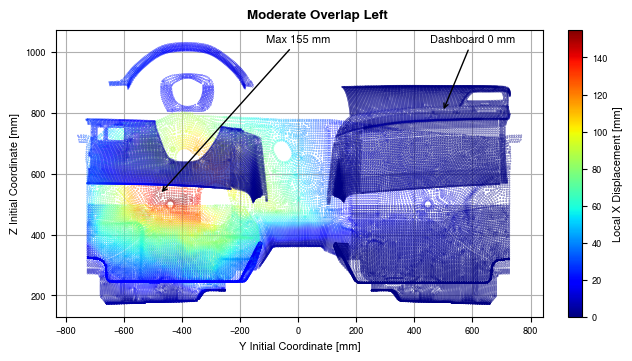

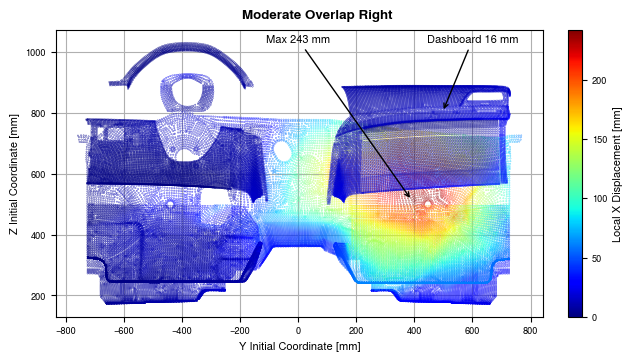

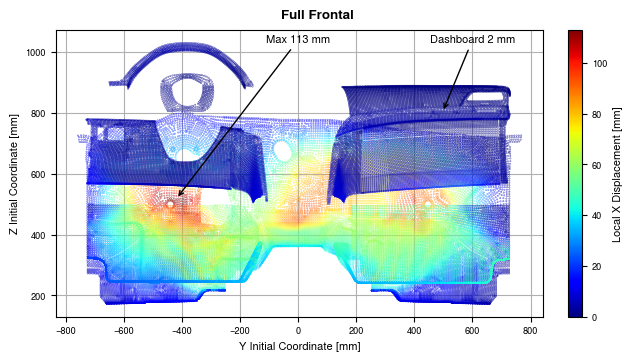

In [11]:
store_dir: Path = Path("reports/figures/validity_chain")
store_dir /= notebook_path.stem
store_dir.mkdir(parents=True, exist_ok=True)

for case in cases:
    f = intru_plot(i_nodes=intru_nodes_sw+intru_nodes, displ=ds_x_displ[case], nodes_ids=ds_data[case][0], coords=ds_data[case][1], case=case)
    for ending in ["png", "pdf"]:
        f_path = store_dir / f"{case}.{ending}"
        LOG.info("Save %s", f_path)
        #f.savefig(f_path)

In [ ]:
def intru_plot_single(i_nodes: List[int], displ: np.ndarray, ds, cs) -> Figure:
    xyzs = []
    for case in cs:
        coords = ds[case][1]
        nodes_ids = ds[case][0]
        # data
        xyz = pd.DataFrame({"X": -1 * np.min(displ[case], axis=1), "Y": coords[:, 0, 1], "Z": coords[:, 0, 2]}, index=nodes_ids).loc[
            i_nodes
        ]
        xyzs.append(xyz)
    xyz = xyzs[0].copy()
    for q in xyzs[1:]:
        xyz = xyz.where(xyz>q, q)


    # plot
    fig_width = 448.13095 / 72
    fig, ax = plt.subplots(
        figsize=(0.6*fig_width, 0.5*fig_width * (xyz["Z"].max() - xyz["Z"].min()) / (800 - -100)),
        layout="constrained",
    )
    sc = ax.scatter(
        xyz["Y"],
        xyz["Z"],
        c=xyz["X"],
        cmap="jet",
        s=0.05,
    )

    # max intrusion
    x_max = xyz["X"].idxmax()
    ax.annotate(
        f"Max {xyz.loc[x_max, 'X']:.0f} mm",
        xy=[xyz.loc[x_max, "Y"], xyz.loc[x_max, "Z"]],
        xytext=[100, xyz["Z"].max()],
        arrowprops={"arrowstyle": "->"},
        ha="center",
    )

    # specific dashboard intrusion 16203992
    ax.annotate(
        f'Dashboard {abs(xyz.loc[16203992, "X"]):.0f} mm',
        xy=[xyz.loc[16203992, "Y"], xyz.loc[16203992, "Z"]],
        xytext=[600, xyz["Z"].max()],
        arrowprops={"arrowstyle": "->"},
        ha="center",
    )

    # colorbar
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label("Local X Displacement [mm]")

    # labels
    ax.set_xlabel("Y Initial Coordinate [mm]")
    ax.set_ylabel("Z Initial Coordinate [mm]")
    ax.set_xlim([-100, 800])
    ax.grid()
    ax.set_axisbelow(True)

    return fig

f = intru_plot_single(i_nodes=intru_nodes_sw+intru_nodes, displ=ds_x_displ, ds=ds_data, cs=cases)
f.savefig(store_dir / "intrusions_passenger_all_cases.png")